# Problem Statement

## Business Objective
An E Commerce company or DTH (you can choose either of these two domains) provider is
facing a lot of competition in the curre t market and it has become a challenge to retain th 
existing customers in the current situation. Hence, the company wants to develop a modl 
through which they can do churn prediction of the accounts and provide segmented offers to the 
potential churners. In this company, account churn is a major thing because 1 account can ave 
multiple customers. hence by losing one account the company might be losing more than one 
cu tomer.
You have been assigned to develop a churn prediction model for this company and rovide 
business recommendations on the  ampaign.
Your campaign suggestion should be unique and be very clear on the campaign offe because 
your recommendation will go through the revenue assurance team. If they find tht you are 
giving a lot of free (or subsidized) stuff thereby making a loss to the company; they ar not going 
to approve your recmmendation. 
Hence be very careful while providing campaign recommendation.

## Data Dictionary


## Variable Description
AccountID - account unique identifier<br>
Churn - account churn flag (Target)<br>
Tenure - Tenure of account<br>
City_Tier - Tier of primary customer's city<br>
CC_Contacted_L12m - How many times all the customers of the account has contacted customer care in last 12months<br>
Payment - Preferred Payment mode of the customers in the account<br>
Gender - Gender of the primary customer of the account<br>
Service_Score - Satisfaction score given by customers of the account on service provided by company<br>
Account_user_count - Number of customers tagged with this account<br>
account_segment - Account segmentation on the basis of spend<br>
CC_Agent_Score - Satisfaction score given by customers of the account on customer care service provided by company<br>
Marital_Status - Marital status of the primary customer of the account<br>
rev_per_month - Monthly average revenue generated by account in last 12 months<br>
Complain_l12m - Any complaints has been raised by account in last 12 months<br>
rev_growth_yoy - revenue growth percentage of the account (last 12 months vs last 24 to 13 month)<br>
coupon_used_l12m - How many times customers have used coupons to do the payment in last 12 months<br>
Day_Since_CC_connect - Number of days since no customers in the account has contacted the customer care<br>
cashback_l12m Monthly average cashback generated by account in last 12 months<br>
Login_device - Preferred login device of the customers in the account<br>

# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report


from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV    # Train test Split and Grid Search
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

import statsmodels.api as SM
from sklearn import metrics

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score
)

# Loading the Data

In [2]:
df=pd.read_excel('/Users/ishashukla/Desktop/Data Science/Capstone Project/CC_EDTH_02_Customer+Churn_02/Customer Churn Data.xlsx',sheet_name=1)

In [3]:
df

AccountID  Churn Tenure  City_Tier  CC_Contacted_LY      Payment  \
0          20000      1      4        3.0              6.0   Debit Card   
1          20001      1      0        1.0              8.0          UPI   
2          20002      1      0        1.0             30.0   Debit Card   
3          20003      1      0        3.0             15.0   Debit Card   
4          20004      1      0        1.0             12.0  Credit Card   
...          ...    ...    ...        ...              ...          ...   
11255      31255      0     10        1.0             34.0  Credit Card   
11256      31256      0     13        1.0             19.0  Credit Card   
11257      31257      0      1        1.0             14.0   Debit Card   
11258      31258      0     23        3.0             11.0  Credit Card   
11259      31259      0      8        1.0             22.0  Credit Card   

       Gender  Service_Score Account_user_count account_segment  \
0      Female            3.0                  3           Super   
1        Male            3.0                  4    Regular Plus   
2        Male            2.0                  4    Regular Plus   
3        Male            2.0                  4           Super   
4        Male            2.0                  3    Regular Plus   
...       ...            ...                ...             ...   
11255    Male            3.0                  2           Super   
11256    Male            3.0                  5             HNI   
11257    Male            3.0                  2           Super   
11258    Male            4.0                  5           Super   
11259    Male            3.0                  2           Super   

       CC_Agent_Score Marital_Status rev_per_month  Complain_ly  \
0                 2.0         Single             9          1.0   
1                 3.0         Single             7          1.0   
2                 3.0         Single             6          1.0   
3                 5.0         Single             8          0.0   
4                 5.0         Single             3          0.0   
...               ...            ...           ...          ...   
11255             1.0        Married             9          0.0   
11256             5.0        Married             7          0.0   
11257             4.0        Married             7          1.0   
11258             4.0        Married             7          0.0   
11259             3.0        Married             5          0.0   

      rev_growth_yoy coupon_used_for_payment Day_Since_CC_connect cashback  \
0                 11                       1                    5   159.93   
1                 15                       0                    0    120.9   
2                 14                       0                    3      NaN   
3                 23                       0                    3   134.07   
4                 11                       1                    3    129.6   
...              ...                     ...                  ...      ...   
11255             19                       1                    4   153.71   
11256             16                       1                    8   226.91   
11257             22                       1                    4   191.42   
11258             16                       2                    9    179.9   
11259             13                       2                    3   175.04   

      Login_device  
0           Mobile  
1           Mobile  
2           Mobile  
3           Mobile  
4           Mobile  
...            ...  
11255     Computer  
11256       Mobile  
11257       Mobile  
11258     Computer  
11259       Mobile  

[11260 rows x 19 columns]

In [4]:
df.head()

AccountID  Churn Tenure  City_Tier  CC_Contacted_LY      Payment  Gender  \
0      20000      1      4        3.0              6.0   Debit Card  Female   
1      20001      1      0        1.0              8.0          UPI    Male   
2      20002      1      0        1.0             30.0   Debit Card    Male   
3      20003      1      0        3.0             15.0   Debit Card    Male   
4      20004      1      0        1.0             12.0  Credit Card    Male   

   Service_Score Account_user_count account_segment  CC_Agent_Score  \
0            3.0                  3           Super             2.0   
1            3.0                  4    Regular Plus             3.0   
2            2.0                  4    Regular Plus             3.0   
3            2.0                  4           Super             5.0   
4            2.0                  3    Regular Plus             5.0   

  Marital_Status rev_per_month  Complain_ly rev_growth_yoy  \
0         Single             9          1.0             11   
1         Single             7          1.0             15   
2         Single             6          1.0             14   
3         Single             8          0.0             23   
4         Single             3          0.0             11   

  coupon_used_for_payment Day_Since_CC_connect cashback Login_device  
0                       1                    5   159.93       Mobile  
1                       0                    0    120.9       Mobile  
2                       0                    3      NaN       Mobile  
3                       0                    3   134.07       Mobile  
4                       1                    3    129.6       Mobile

In [5]:
df.columns

Index(['AccountID', 'Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY',
       'Payment', 'Gender', 'Service_Score', 'Account_user_count',
       'account_segment', 'CC_Agent_Score', 'Marital_Status', 'rev_per_month',
       'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment',
       'Day_Since_CC_connect', 'cashback', 'Login_device'],
      dtype='object')

In [6]:
df.shape

(11260, 19)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [8]:
df['Churn'].value_counts()

Churn
0    9364
1    1896
Name: count, dtype: int64

In [9]:
df.isna().sum()

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [10]:
df.describe(include='all').T

count  unique         top    freq       mean  \
AccountID                11260.0     NaN         NaN     NaN    25629.5   
Churn                    11260.0     NaN         NaN     NaN   0.168384   
Tenure                   11158.0    38.0         1.0  1351.0        NaN   
City_Tier                11148.0     NaN         NaN     NaN   1.653929   
CC_Contacted_LY          11158.0     NaN         NaN     NaN  17.867091   
Payment                    11151       5  Debit Card    4587        NaN   
Gender                     11152       4        Male    6328        NaN   
Service_Score            11162.0     NaN         NaN     NaN   2.902526   
Account_user_count       11148.0     7.0         4.0  4569.0        NaN   
account_segment            11163       7       Super    4062        NaN   
CC_Agent_Score           11144.0     NaN         NaN     NaN   3.066493   
Marital_Status             11048       3     Married    5860        NaN   
rev_per_month            11158.0    59.0         3.0  1746.0        NaN   
Complain_ly              10903.0     NaN         NaN     NaN   0.285334   
rev_growth_yoy           11260.0    20.0        14.0  1524.0        NaN   
coupon_used_for_payment  11260.0    20.0         1.0  4373.0        NaN   
Day_Since_CC_connect     10903.0    24.0         3.0  1816.0        NaN   
cashback                 10789.0  5693.0      155.62    10.0        NaN   
Login_device               11039       3      Mobile    7482        NaN   

                                std      min       25%      50%       75%  \
AccountID                3250.62635  20000.0  22814.75  25629.5  28444.25   
Churn                      0.374223      0.0       0.0      0.0       0.0   
Tenure                          NaN      NaN       NaN      NaN       NaN   
City_Tier                  0.915015      1.0       1.0      1.0       3.0   
CC_Contacted_LY            8.853269      4.0      11.0     16.0      23.0   
Payment                         NaN      NaN       NaN      NaN       NaN   
Gender                          NaN      NaN       NaN      NaN       NaN   
Service_Score              0.725584      0.0       2.0      3.0       3.0   
Account_user_count              NaN      NaN       NaN      NaN       NaN   
account_segment                 NaN      NaN       NaN      NaN       NaN   
CC_Agent_Score             1.379772      1.0       2.0      3.0       4.0   
Marital_Status                  NaN      NaN       NaN      NaN       NaN   
rev_per_month                   NaN      NaN       NaN      NaN       NaN   
Complain_ly                0.451594      0.0       0.0      0.0       1.0   
rev_growth_yoy                  NaN      NaN       NaN      NaN       NaN   
coupon_used_for_payment         NaN      NaN       NaN      NaN       NaN   
Day_Since_CC_connect            NaN      NaN       NaN      NaN       NaN   
cashback                        NaN      NaN       NaN      NaN       NaN   
Login_device                    NaN      NaN       NaN      NaN       NaN   

                             max  
AccountID                31259.0  
Churn                        1.0  
Tenure                       NaN  
City_Tier                    3.0  
CC_Contacted_LY            132.0  
Payment                      NaN  
Gender                       NaN  
Service_Score                5.0  
Account_user_count           NaN  
account_segment              NaN  
CC_Agent_Score               5.0  
Marital_Status               NaN  
rev_per_month                NaN  
Complain_ly                  1.0  
rev_growth_yoy               NaN  
coupon_used_for_payment      NaN  
Day_Since_CC_connect         NaN  
cashback                     NaN  
Login_device                 NaN

In [11]:
df.duplicated().sum()

0

In [12]:
#checking for no. of unique values
df.nunique() ##  check unique entries in the data

AccountID                  11260
Churn                          2
Tenure                        38
City_Tier                      3
CC_Contacted_LY               44
Payment                        5
Gender                         4
Service_Score                  6
Account_user_count             7
account_segment                7
CC_Agent_Score                 5
Marital_Status                 3
rev_per_month                 59
Complain_ly                    2
rev_growth_yoy                20
coupon_used_for_payment       20
Day_Since_CC_connect          24
cashback                    5693
Login_device                   3
dtype: int64

In [13]:
#list of all categorical variables

cat_cols = ["Payment", "Gender", "account_segment", "Marital_Status", "Login_device"]

In [14]:
# Printing the number of unique values in each categorical variable

for i in cat_cols:
    print("\nUnique values in", i, "are :")
    print(df[i].value_counts())
    print("\n")
    print("-" * 40)


Unique values in Payment are :
Payment
Debit Card          4587
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: count, dtype: int64


----------------------------------------

Unique values in Gender are :
Gender
Male      6328
Female    4178
M          376
F          270
Name: count, dtype: int64


----------------------------------------

Unique values in account_segment are :
account_segment
Super           4062
Regular Plus    3862
HNI             1639
Super Plus       771
Regular          520
Regular +        262
Super +           47
Name: count, dtype: int64


----------------------------------------

Unique values in Marital_Status are :
Marital_Status
Married     5860
Single      3520
Divorced    1668
Name: count, dtype: int64


----------------------------------------

Unique values in Login_device are :
Login_device
Mobile      7482
Computer    3018
&&&&         539
Name: count, dtype: int64


------------------------

- **Payment** - There are five different payment methods of which Debit card is the most preferred followed by Credit card. UPI is the least preferred one.
- **Gender** - Consists of data entry error that needs to be fixed.
- **account_segment** - Five different segments namely Regular, Regular Plus, Super, Super Plus, HNI. Consists of data entry error that needs to be fixed as well
- **Marital_Status** - Large number of customers are Married followed by Single and Divorced customers
- **Login_device** - Three unique values of which further inspection needs to made if '&&&&' can be treated as missing value or an unknown category

In [15]:
# Fixing the data entry errors

df["Gender"] = df["Gender"].replace("F", "Female")
df["Gender"] = df["Gender"].replace("M", "Male")
df["account_segment"] = df["account_segment"].replace("Regular +", "Regular Plus")
df["account_segment"] = df["account_segment"].replace("Super +", "Super Plus")

df["Login_device"] = df["Login_device"].replace(
    "&&&&", "Other"
)  # will decide if this is to be treated as a missing value or an 'Unknown' category after EDA

In [16]:
# Printing the number of unique values in each categorical variable

print("Unique values in Gender are :")
print(df["Gender"].value_counts(), "\n")
print("-" * 40)
print("\nUnique values in account_segment are :")
print(df["account_segment"].value_counts())
print("-" * 40)
print("\nUnique values in account_segment are :")
print(df["Login_device"].value_counts())

Unique values in Gender are :
Gender
Male      6704
Female    4448
Name: count, dtype: int64 

----------------------------------------

Unique values in account_segment are :
account_segment
Regular Plus    4124
Super           4062
HNI             1639
Super Plus       818
Regular          520
Name: count, dtype: int64
----------------------------------------

Unique values in account_segment are :
Login_device
Mobile      7482
Computer    3018
Other        539
Name: count, dtype: int64


In [17]:
# list of all numerical variables

num_cols = [
    "Tenure",
    "City_Tier",
    "CC_Contacted_LY",
    "Service_Score",
    "Account_user_count",
    "CC_Agent_Score",
    "rev_per_month",
    "Complain_ly",
    "rev_growth_yoy",
    "coupon_used_for_payment",
    "Day_Since_CC_connect",
    "cashback",
]

In [18]:
# Printing the number of unique values in each numerical variable

for i in num_cols:
    print("\nUnique values in", i, "are :")
    print(df[i].value_counts())
    print("\n")
    print("-" * 40)



Unique values in Tenure are :
Tenure
1     1351
0     1231
8      519
9      496
7      450
10     423
3      410
5      403
4      403
11     388
6      363
12     360
13     359
2      354
14     345
15     311
16     291
19     273
18     253
20     217
17     215
21     170
23     169
22     151
24     147
28     137
30     137
27     131
99     131
26     122
#      116
25     114
29     114
31      96
50       2
60       2
51       2
61       2
Name: count, dtype: int64


----------------------------------------

Unique values in City_Tier are :
City_Tier
1.0    7263
3.0    3405
2.0     480
Name: count, dtype: int64


----------------------------------------

Unique values in CC_Contacted_LY are :
CC_Contacted_LY
14.0     682
16.0     663
9.0      655
13.0     655
15.0     623
12.0     571
8.0      538
17.0     525
11.0     524
10.0     489
7.0      391
18.0     374
19.0     364
20.0     319
6.0      311
21.0     310
22.0     282
23.0     241
24.0     214
25.0     197
32.0     1

- There are one or more values such as '#','@','$','+' and '*' present in columns Tenure, Account_user_count, rev_per_month, 'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect' and cashback.<br> 
- Replace these values with np.nan in order to do the EDA

In [19]:
# Replacing the invalid data with np.nan

df["Tenure"].replace("#", np.nan, inplace=True)
df["Account_user_count"].replace("@", np.nan, inplace=True)
df["rev_per_month"].replace("+", np.nan, inplace=True)
df["rev_growth_yoy"].replace("$", np.nan, inplace=True)
df["coupon_used_for_payment"].replace(["#", "$", "*"], np.nan, inplace=True)
df["Day_Since_CC_connect"].replace("$", np.nan, inplace=True)
df["cashback"].replace("$", np.nan, inplace=True)

In [20]:
# Checking for the perentage of missing values again

round((df.isnull().sum() / df.isnull().count()* 100),2)

AccountID                  0.00
Churn                      0.00
Tenure                     1.94
City_Tier                  0.99
CC_Contacted_LY            0.91
Payment                    0.97
Gender                     0.96
Service_Score              0.87
Account_user_count         3.94
account_segment            0.86
CC_Agent_Score             1.03
Marital_Status             1.88
rev_per_month              7.02
Complain_ly                3.17
rev_growth_yoy             0.03
coupon_used_for_payment    0.03
Day_Since_CC_connect       3.18
cashback                   4.20
Login_device               1.96
dtype: float64

- It is now seen that the percentage of missing values have considerably increased across columns<br>
- rev_per_month has the highest of 7.02% missing values followed by cashback with 4.2% and account_user_count with 3.94% of missing values<br>
- rev_growth_yoy and coupon_used_for_payment have the least percentage of missing values

In [21]:
# summary of the categorical variables

df.describe(include="object").T

count unique           top  freq
Payment          11151      5    Debit Card  4587
Gender           11152      2          Male  6704
account_segment  11163      5  Regular Plus  4124
Marital_Status   11048      3       Married  5860
Login_device     11039      3        Mobile  7482

- Missing values in all object type variables<br>
- Payment - 5 payment methods, where Debit card is the most frequently used mode of payment<br>
- Gender - Male customers are largely primary customer of the account<br>
- account_segment - 5 different account segments on the basis of spend, with Regular Plus being the most frequent<br>
- Marital_Status - ~53% of the customers are Married<br>
- Login_device - 3 different types of login devices with Mobile being used most frequently<br>

In [22]:
# summary of the numerical variables

df.describe().T

count          mean          std      min  \
AccountID                11260.0  25629.500000  3250.626350  20000.0   
Churn                    11260.0      0.168384     0.374223      0.0   
Tenure                   11042.0     11.025086    12.879782      0.0   
City_Tier                11148.0      1.653929     0.915015      1.0   
CC_Contacted_LY          11158.0     17.867091     8.853269      4.0   
Service_Score            11162.0      2.902526     0.725584      0.0   
Account_user_count       10816.0      3.692862     1.022976      1.0   
CC_Agent_Score           11144.0      3.066493     1.379772      1.0   
rev_per_month            10469.0      6.362594    11.909686      1.0   
Complain_ly              10903.0      0.285334     0.451594      0.0   
rev_growth_yoy           11257.0     16.193391     3.757721      4.0   
coupon_used_for_payment  11257.0      1.790619     1.969551      0.0   
Day_Since_CC_connect     10902.0      4.633187     3.697637      0.0   
cashback                 10787.0    196.236370   178.660514      0.0   

                              25%       50%       75%      max  
AccountID                22814.75  25629.50  28444.25  31259.0  
Churn                        0.00      0.00      0.00      1.0  
Tenure                       2.00      9.00     16.00     99.0  
City_Tier                    1.00      1.00      3.00      3.0  
CC_Contacted_LY             11.00     16.00     23.00    132.0  
Service_Score                2.00      3.00      3.00      5.0  
Account_user_count           3.00      4.00      4.00      6.0  
CC_Agent_Score               2.00      3.00      4.00      5.0  
rev_per_month                3.00      5.00      7.00    140.0  
Complain_ly                  0.00      0.00      1.00      1.0  
rev_growth_yoy              13.00     15.00     19.00     28.0  
coupon_used_for_payment      1.00      1.00      2.00     16.0  
Day_Since_CC_connect         2.00      3.00      8.00     47.0  
cashback                   147.21    165.25    200.01   1997.0

# Exploratory Data Analysis

## Univariate Analysis

In [23]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="khaki"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="purple", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [24]:
def perc_on_bar(plot, feature):
    """
    plot
    feature : categorical feature
    the function won't work if a column is passed in hue parameter
    
    """
    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.06  # width of the plot
        y = p.get_y() + p.get_height()  # height of the plot
        ax.annotate(
            percentage,
            (x, y),
            # ha="center",
            # va="center",
            size=12,
            # xytext=(0, 3),
            # textcoords="offset points",
        )  # annotate the percantage
    plt.show()  # show the plot

### 1. Churn

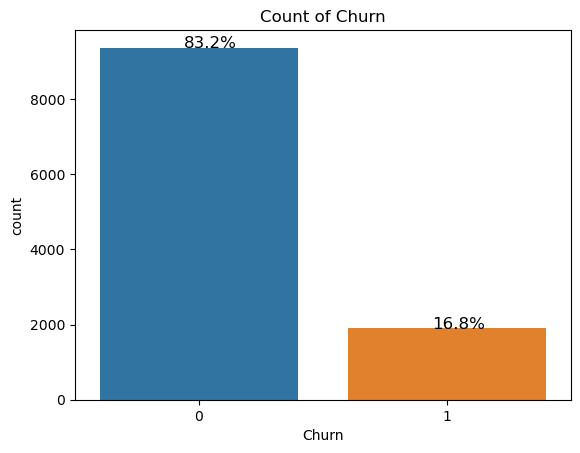

In [25]:
#Plotting a countplot for the target variable
ax=sns.countplot(x = "Churn", data = df)   ## Complete the code to get a countplot of the mentionedd column.
plt.title('Count of Churn')
perc_on_bar(ax, df["Churn"])
plt.show()

- 16.8% of customers have churned whereas 83.2% of them have not i.e., this is an imbalanced classification problem.

### 2. Tenure

<Figure size 1000x1000 with 0 Axes>

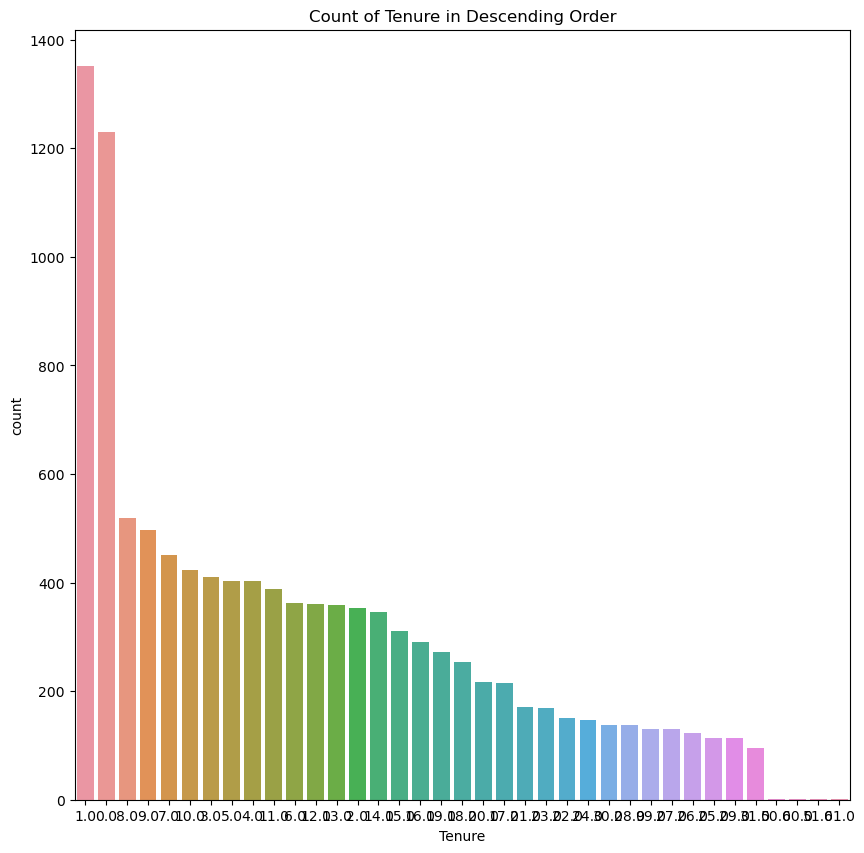

In [26]:
#Plotting a countplot for the target variable
plt.figure(figsize=(10, 10))
tenure_order = df['Tenure'].value_counts().index

plt.figure(figsize=(10, 10))
sns.countplot(x='Tenure', data=df, order=tenure_order)
plt.title('Count of Tenure in Descending Order')
plt.show()

/Users/ishashukla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


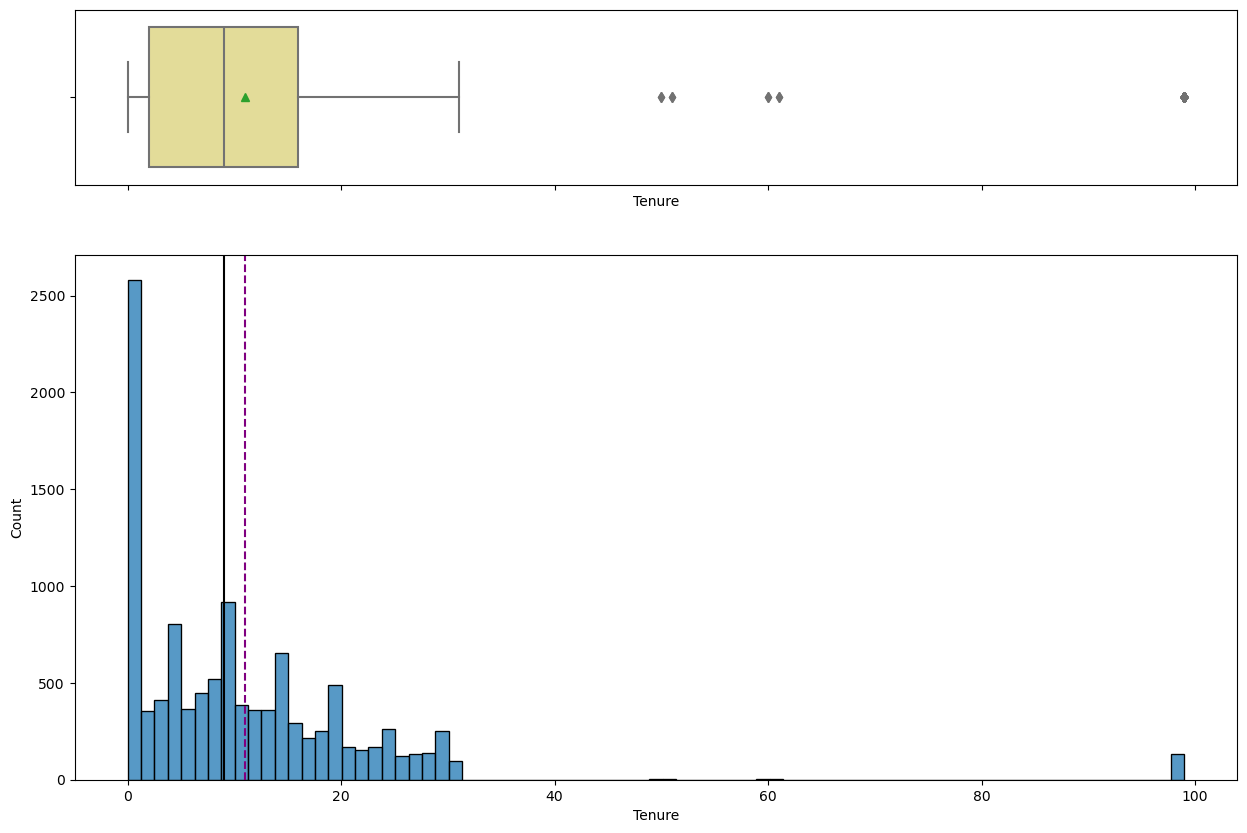

In [27]:
histogram_boxplot(df, "Tenure")

- Highest number of customers with a tenure of less than a month
- Outliers around 50, 65 and about 100 months

### 3. City_tier - Tier of primary customer's city

/Users/ishashukla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


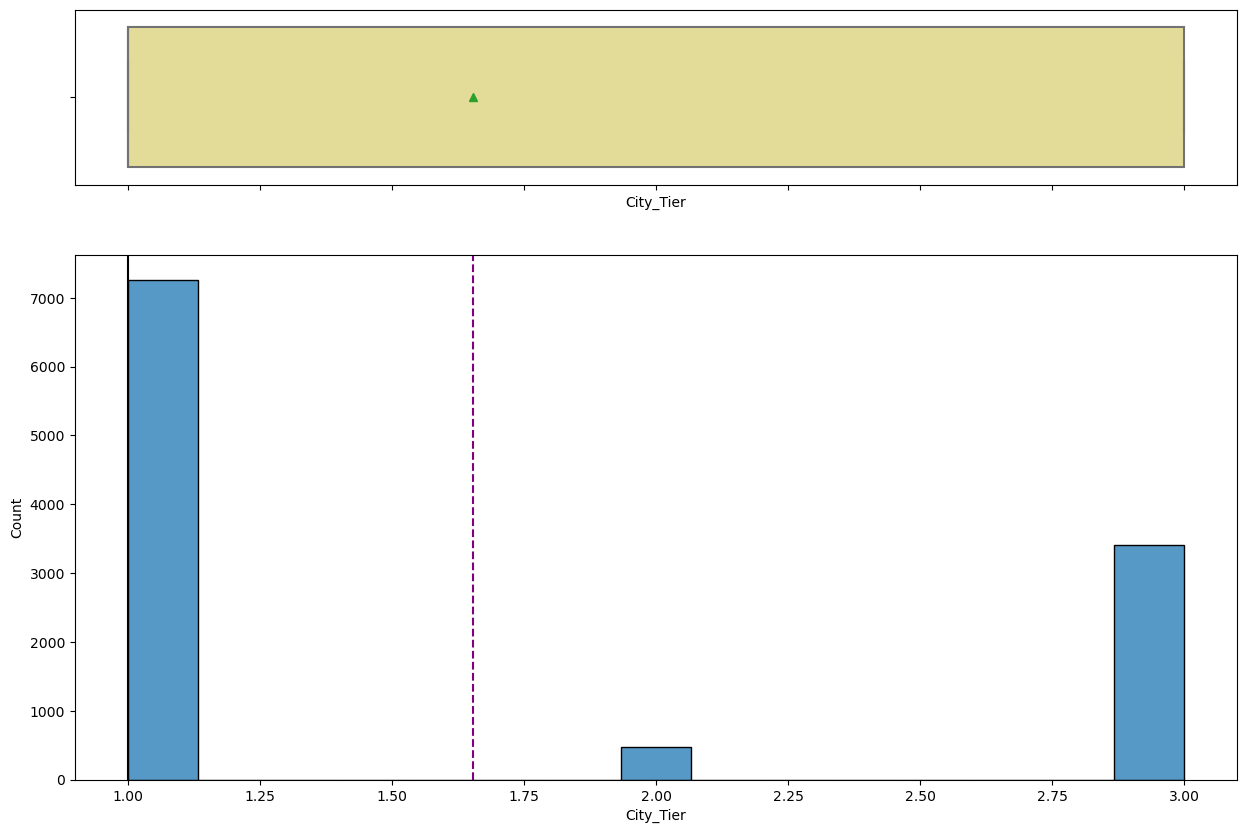

In [28]:
histogram_boxplot(df, "City_Tier")

In [29]:
df['City_Tier'] = df['City_Tier'].astype('object')

In [30]:
print('Customer count tier-wise')
df['City_Tier'].value_counts()

Customer count tier-wise


City_Tier
1.0    7263
3.0    3405
2.0     480
Name: count, dtype: int64

In [31]:
df['City_Tier'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 11260 entries, 0 to 11259
Series name: City_Tier
Non-Null Count  Dtype 
--------------  ----- 
11148 non-null  object
dtypes: object(1)
memory usage: 88.1+ KB


- Most customers are from Tier1 cities followed by Tier3 cities.
- Tier 2 has the least number of customers 480.
- City_Tier can be converted to categorical variable. So, we will convert it into object datatype.

### 4. CC_Contacted_LY - How many times all the customers of the account has contacted customer care in last 12months

/Users/ishashukla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


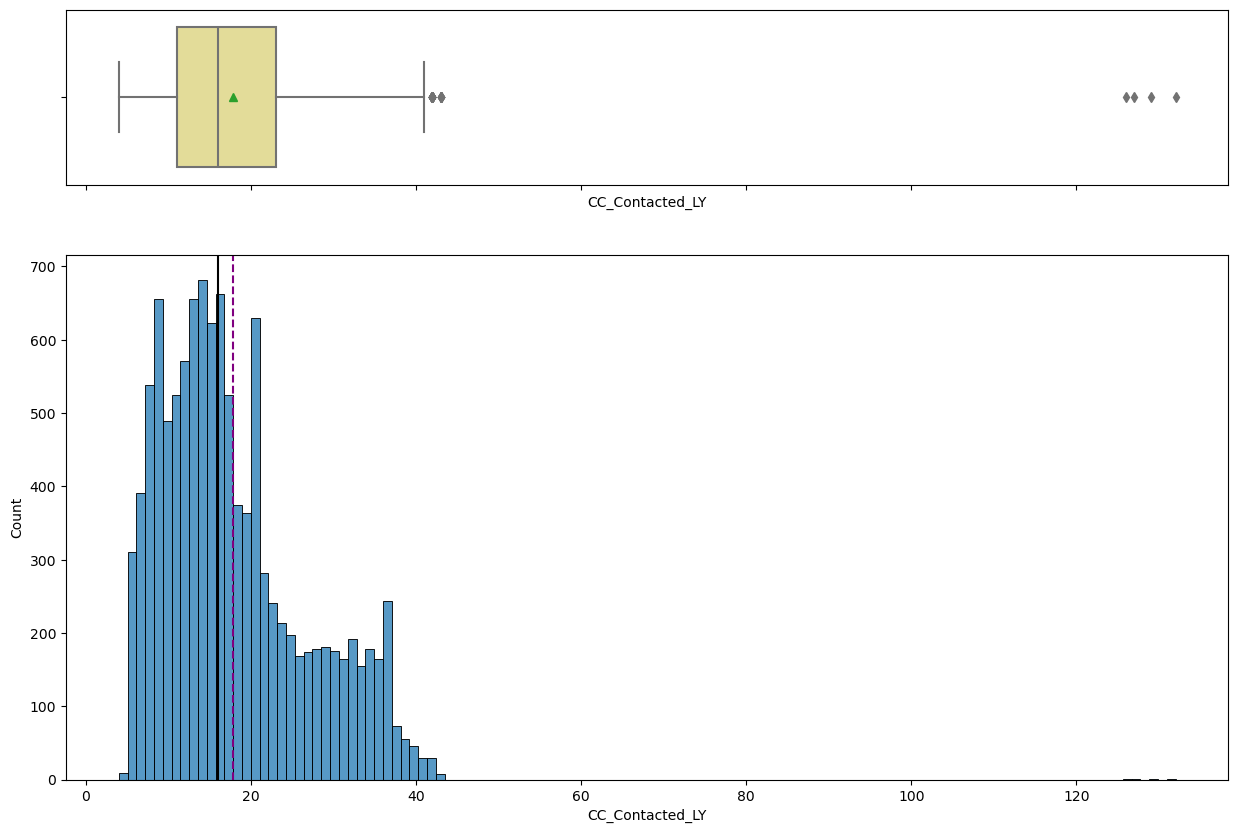

In [32]:
histogram_boxplot(df, "CC_Contacted_LY")

In [33]:
df['CC_Contacted_LY'].mean()

17.867090876501166

In [34]:
df['CC_Contacted_LY'].median()

16.0

- The distribution suggests that the higher number of times the customer care was contacted is between 11 to 23 times
- Outliers around 45 times and way beyond 125 times

### 5. Payment - Preferred Payment mode of the customers in the account

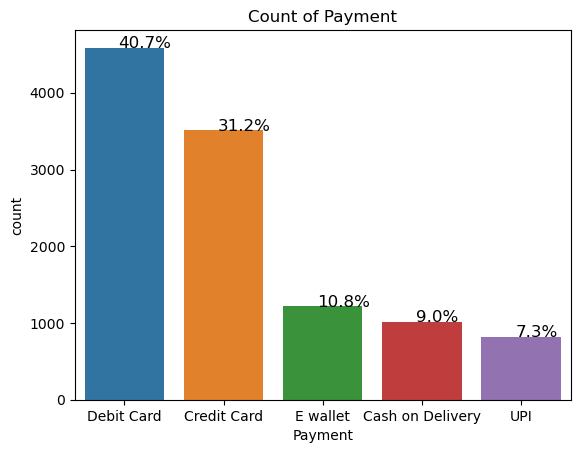

In [35]:
#Plotting a countplot for the Payment variablea
ax=sns.countplot(x="Payment", data=df, order=df['Payment'].value_counts().index) # a countplot of the mentionedd column.
plt.title('Count of Payment')
perc_on_bar(ax, df["Payment"])
plt.show()

- 40.7% of the customers prefer payment with Debit Card(highest) and 31.2% with Credit Card.
- 9% of people prefer Cash on Delievery.
- UPI is the least preferred payment mode.

### 6. Gender

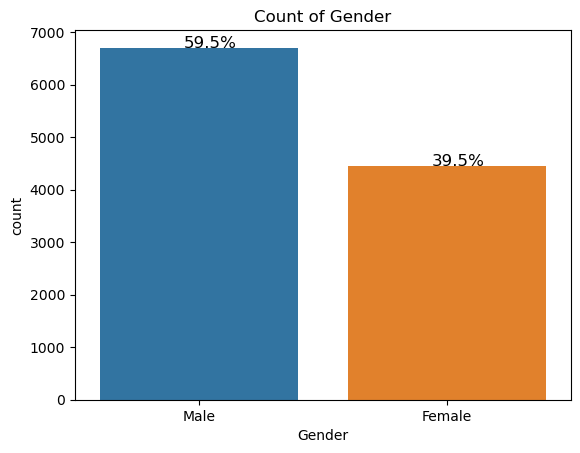

In [36]:
#Plotting a countplot for the Gender variablea
ax=sns.countplot(x="Gender", data=df, order=df['Gender'].value_counts().index) # a countplot of the mentionedd column.
plt.title('Count of Gender')
perc_on_bar(ax, df["Gender"])
plt.show()

- Most of the customers are Male (59.5%)
- 39.5% of customers are females.

### 7. Service_Score

/Users/ishashukla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


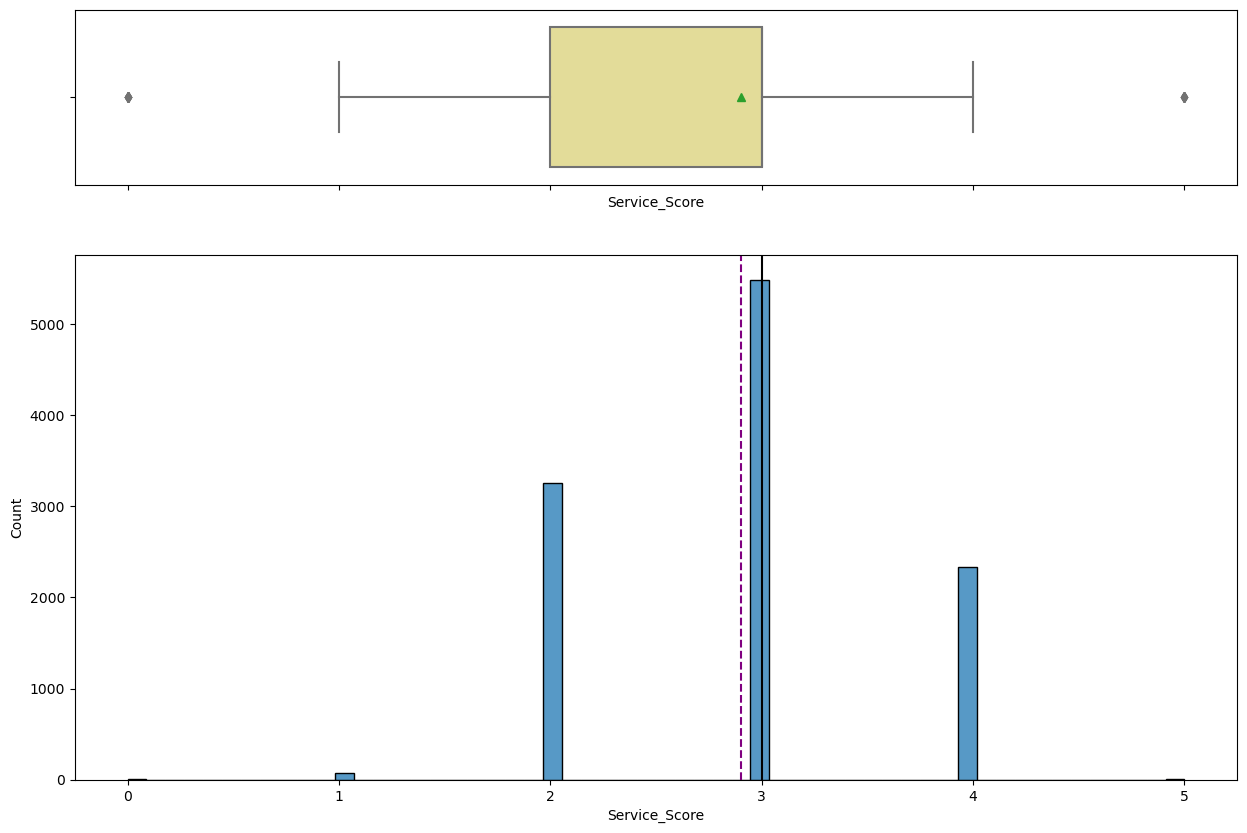

In [37]:
histogram_boxplot(df, "Service_Score")

- Outliers at 0 and 5.
- Highest service score is 3 which means customers are not fully statisfied.
- We will convert this column to categorical.

In [38]:
df['Service_Score'] = df['Service_Score'].astype('object')

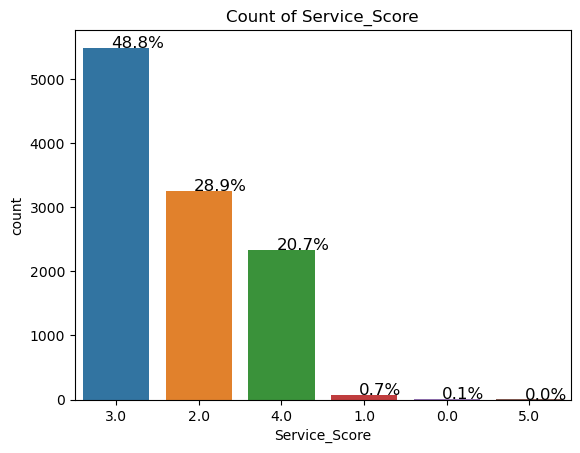

In [39]:
#Plotting a countplot for the Gender variablea
ax=sns.countplot(x="Service_Score", data=df, order=df['Service_Score'].value_counts().index) # a countplot of the mentionedd column.
plt.title('Count of Service_Score')
perc_on_bar(ax, df["Service_Score"])
plt.show()

In [40]:
df['Service_Score'].value_counts()

Service_Score
3.0    5490
2.0    3251
4.0    2331
1.0      77
0.0       8
5.0       5
Name: count, dtype: int64

### 8. Account_user_count - Number of customers tagged with this account

/Users/ishashukla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


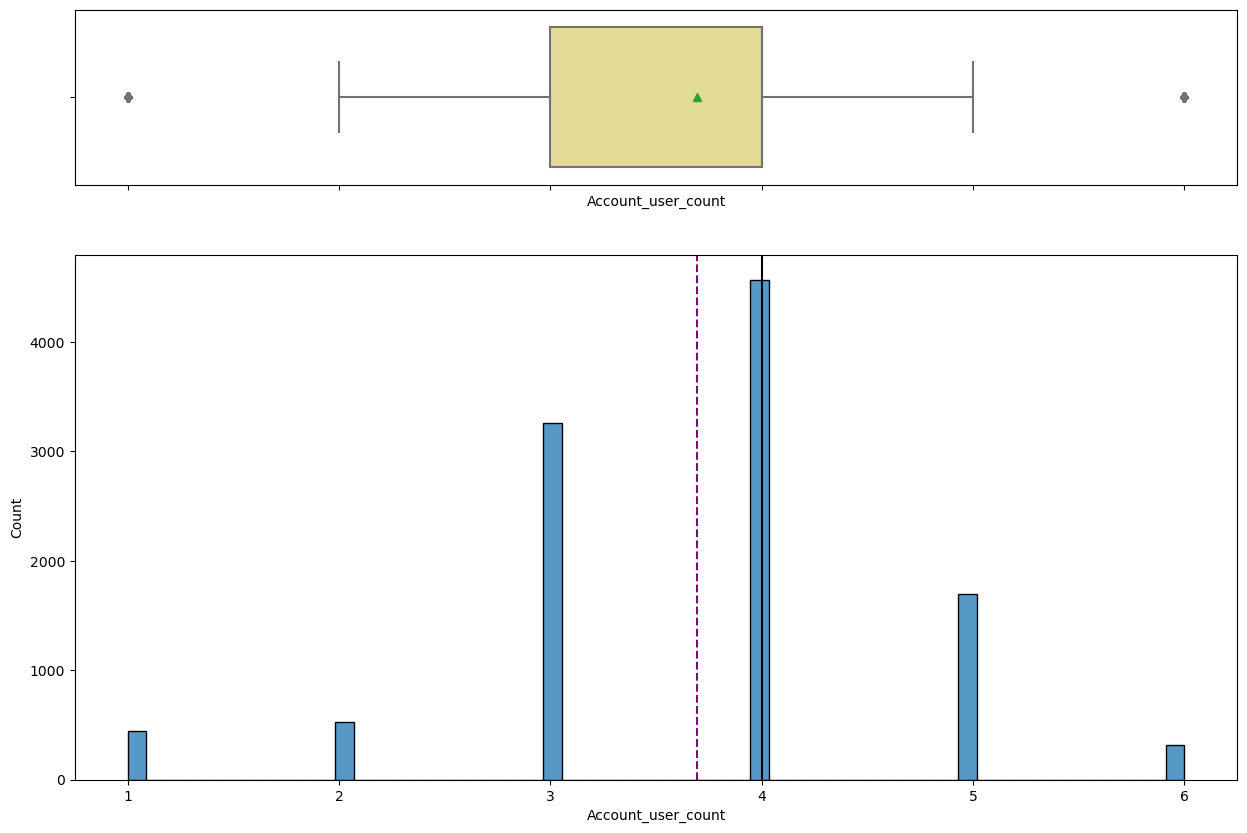

In [41]:
histogram_boxplot(df, "Account_user_count")

- Large number of accounts are tagged with 4, followed by 3 and 5 customers per account
- Outliers at 1 and 6 customers per account
- Account_user_count will be converted to categorical variable

In [42]:
df['Account_user_count'] = df['Account_user_count'].astype('object')

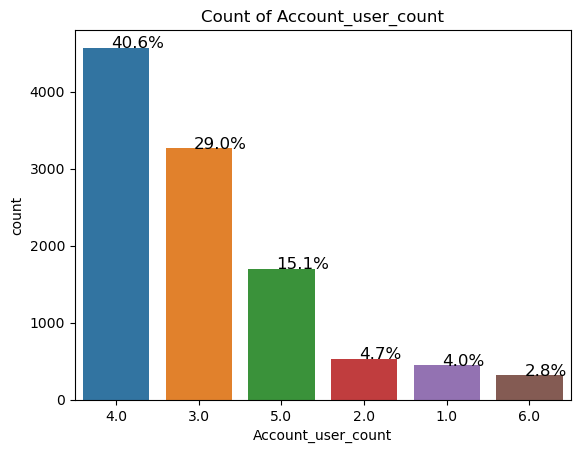

In [43]:
#Plotting a countplot for the Account_user_count variablea
ax=sns.countplot(x="Account_user_count", data=df, order=df['Account_user_count'].value_counts().index) # a countplot of the mentionedd column.
plt.title('Count of Account_user_count')
perc_on_bar(ax, df["Account_user_count"])
plt.show()

In [44]:
df['Account_user_count'].value_counts()

Account_user_count
4.0    4569
3.0    3261
5.0    1699
2.0     526
1.0     446
6.0     315
Name: count, dtype: int64

### 9. account_segment

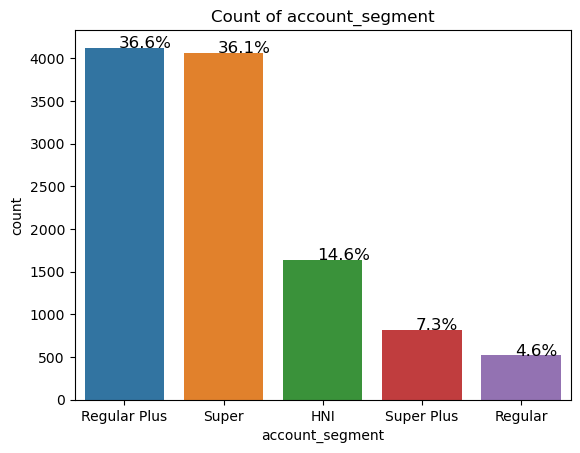

In [45]:
#Plotting a countplot for the Account_user_count variablea
ax=sns.countplot(x="account_segment", data=df, order=df['account_segment'].value_counts().index) # a countplot of the mentionedd column.
plt.title('Count of account_segment')
perc_on_bar(ax, df["account_segment"])
plt.show()

In [46]:
df['account_segment'].value_counts()

account_segment
Regular Plus    4124
Super           4062
HNI             1639
Super Plus       818
Regular          520
Name: count, dtype: int64

- Segments 'Regular Plus' and 'Super' have the maximum of customers above 36%.
- Segment 'Regular' has the least number of customers.
- High Net Income (HNI) segment comprise of 14.6% of customers followed by Super Plus which comprises 7.3% of customers.

### 10. CC_Agent_Score - Satisfaction score given by customers of the account on customer care service provided by company

/Users/ishashukla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


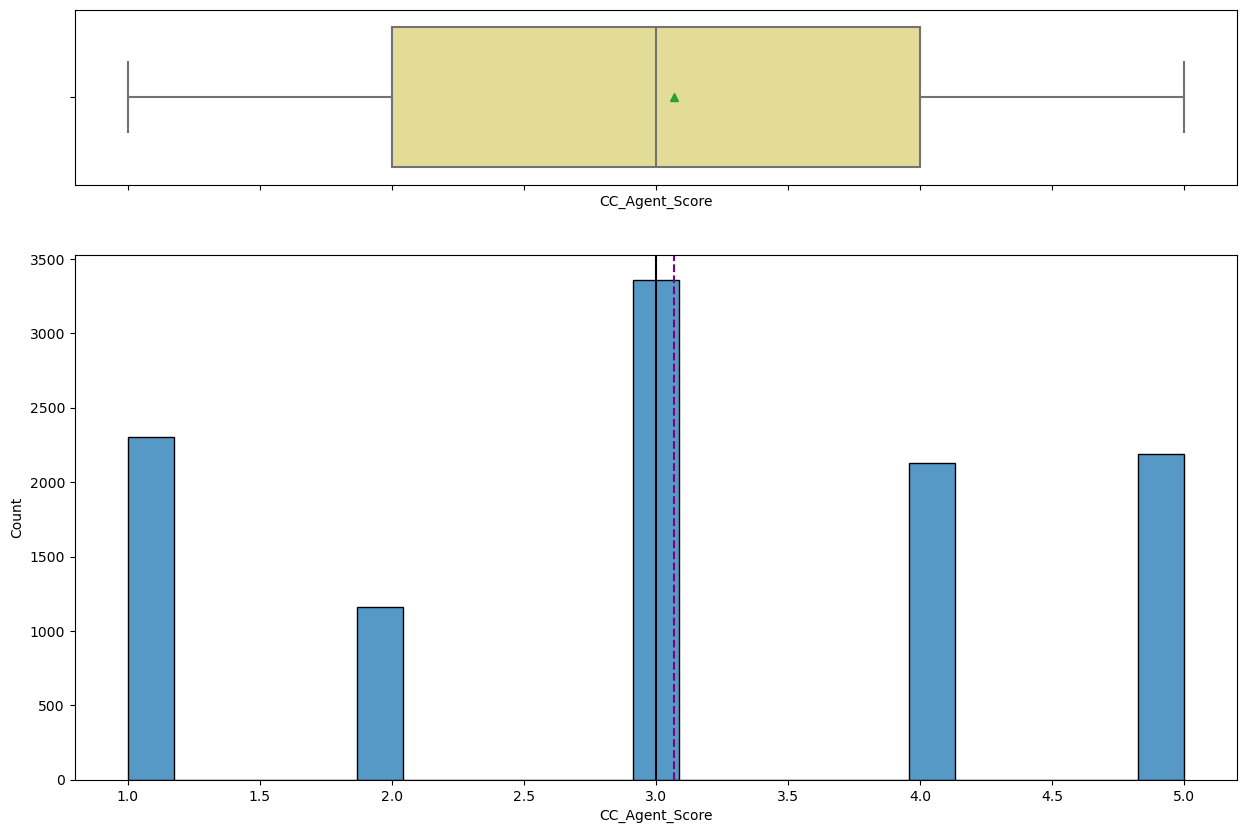

In [47]:
histogram_boxplot(df, "CC_Agent_Score")

In [48]:
df['CC_Agent_Score'] = df['CC_Agent_Score'].astype('object')

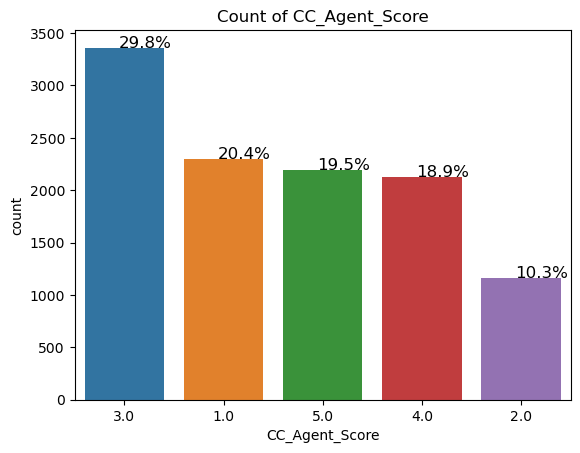

In [49]:
#Plotting a countplot for the CC_Agent_Score variablea
ax=sns.countplot(x="CC_Agent_Score", data=df, order=df['CC_Agent_Score'].value_counts().index) # a countplot of the mentionedd column.
plt.title('Count of CC_Agent_Score')
perc_on_bar(ax, df["CC_Agent_Score"])
plt.show()

- Highest Customer Agent Score is 3.
- It can be seen that almost equal number of customers have given excellent scores 4, 5 and a bad score of 1.
- The distribution suggests that the customer service has almost equal chances to be either a satisfied or unsatisfied.

### 11. Marital_Status - Marital status of the primary customer of the account

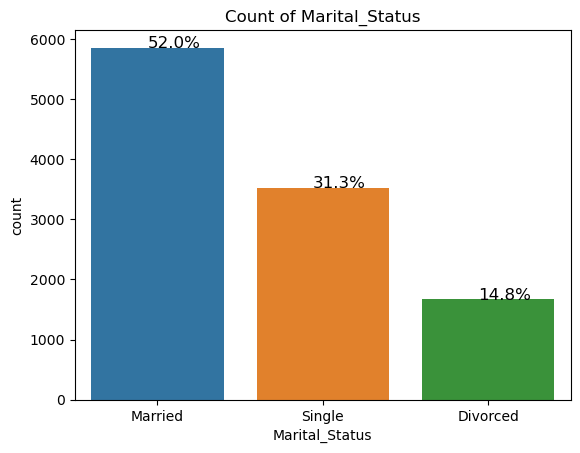

In [50]:
#Plotting a countplot for the Marital_Status variablea
ax=sns.countplot(x="Marital_Status", data=df, order=df['Marital_Status'].value_counts().index) # a countplot of the mentionedd column.
plt.title('Count of Marital_Status')
perc_on_bar(ax, df["Marital_Status"])
plt.show()

- 52% of the primary account holders are married.
- 31.3% of them are Single.
- 14.8% are divorced customers.

### 12. rev_per_month - Monthly average revenue generated by account in last 12 months

/Users/ishashukla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


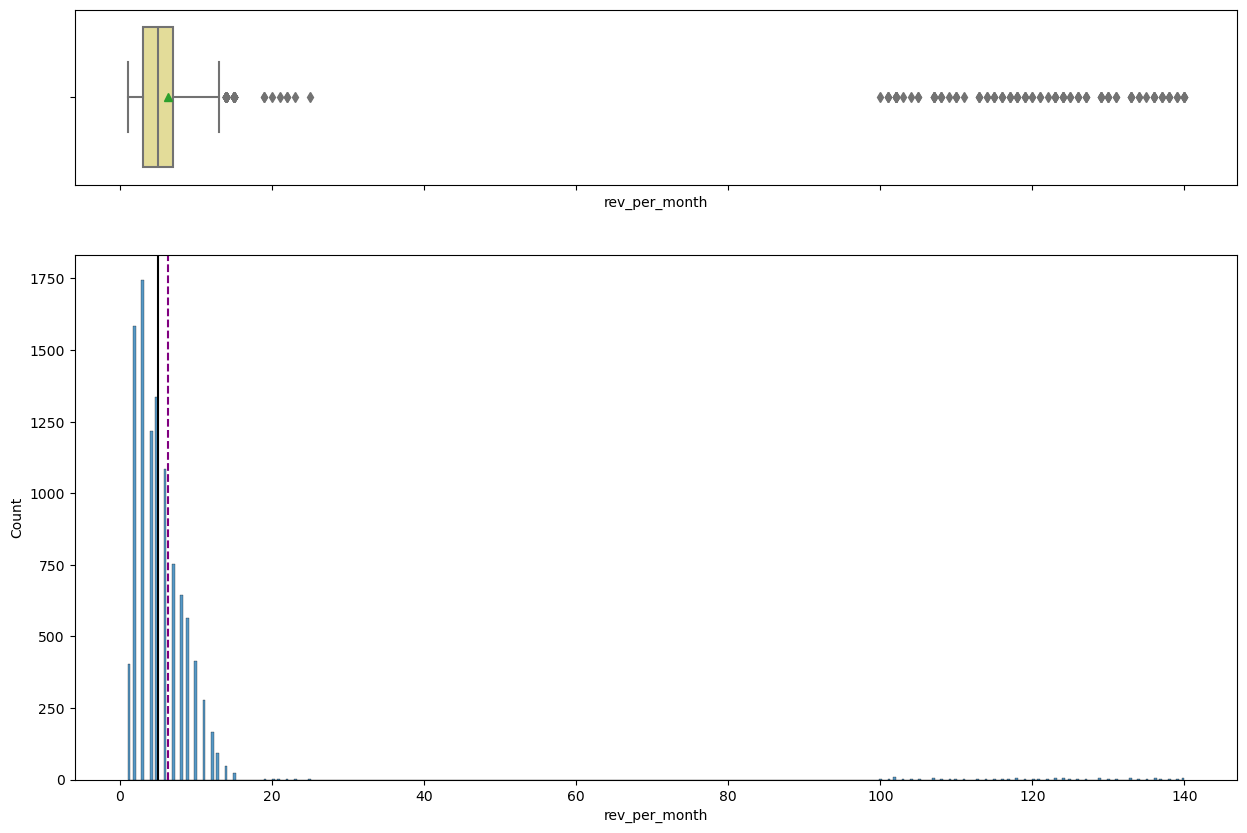

In [51]:
histogram_boxplot(df, "rev_per_month")

In [52]:
df['rev_per_month'].mean()*1000

6362.594326105645

- The currency is in thousands of INR.
- The average revenue generated by account per month is around 6362.
- Highly skewed due to the presence of outiers above 100K.

### 13. Complain_ly - Any complaints has been raised by account in last 12 months

/Users/ishashukla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


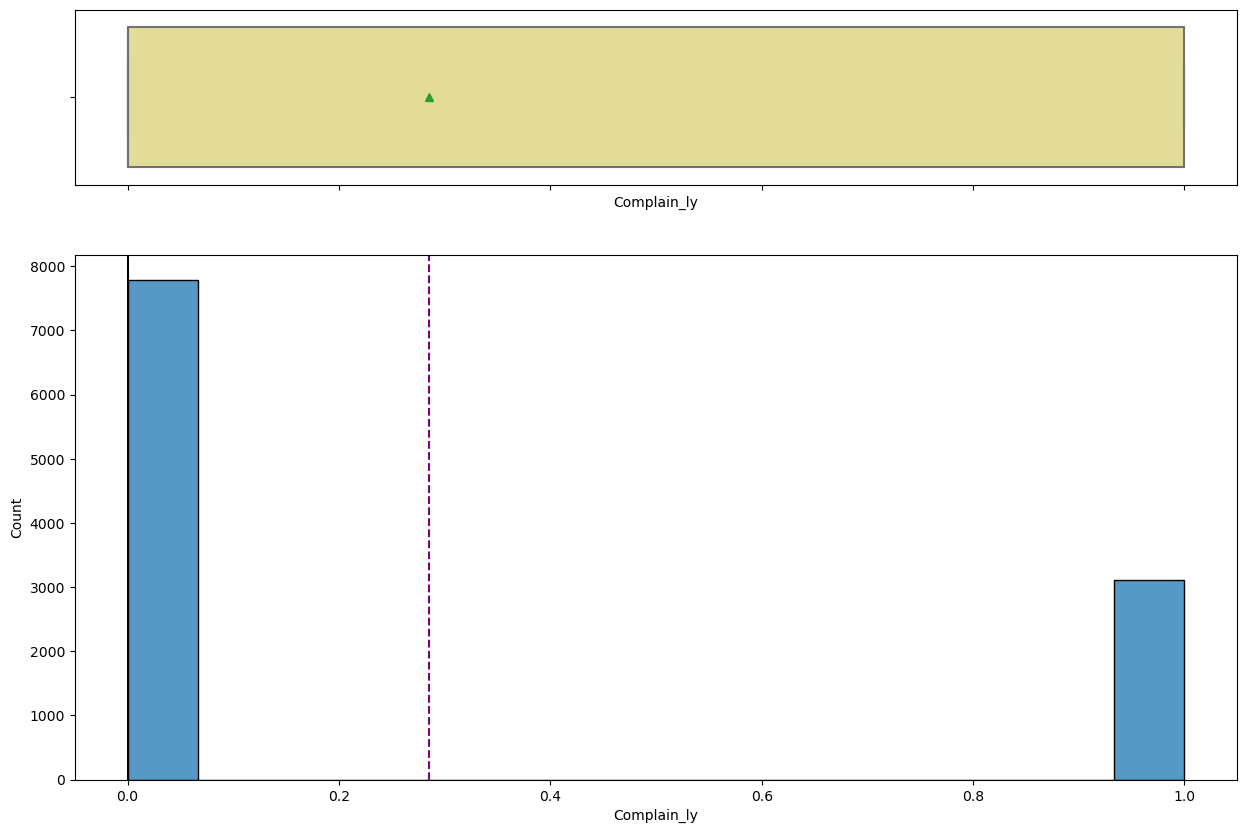

In [53]:
histogram_boxplot(df, "Complain_ly")

- It is a binary data where 0 means a NO and 1 means a YES. So we will convert it into categorical.

In [54]:
df['Complain_ly'] = df['Complain_ly'].astype('object')

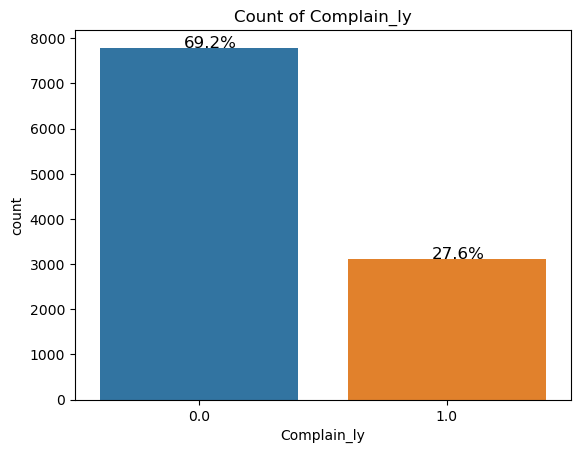

In [55]:
#Plotting a countplot for the Complain_ly variablea
ax=sns.countplot(x="Complain_ly", data=df, order=df['Complain_ly'].value_counts().index) # a countplot of the mentionedd column.
plt.title('Count of Complain_ly')
perc_on_bar(ax, df["Complain_ly"])
plt.show()

- 69.2% - No complain in last 12 months
- 27.6% - Yes for complain in last 12 months.

### 14. rev_growth_yoy - revenue growth percentage of the account (last 12 months vs last 24 to 13 month)

/Users/ishashukla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


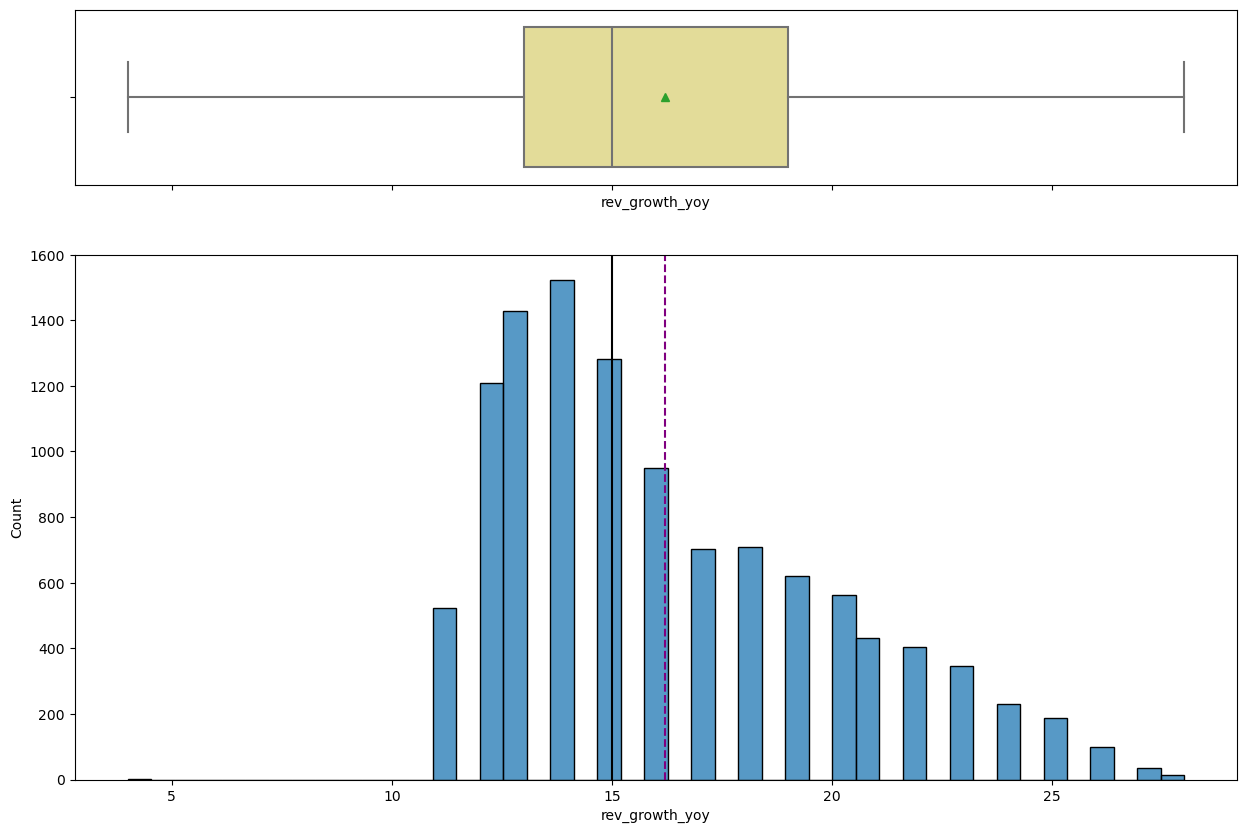

In [56]:
histogram_boxplot(df, "rev_growth_yoy")

In [57]:
df['rev_growth_yoy'].mean()

16.1933907790708

- On an average there is a 16% growth in revenue generated by the account in the past year compared to its previous year. 
- The growth percentage ranges anywhere between 4% to 28%.

### 15. coupon_used_for_payment - How many times customers have used coupons to do the payment in last 12 months

/Users/ishashukla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


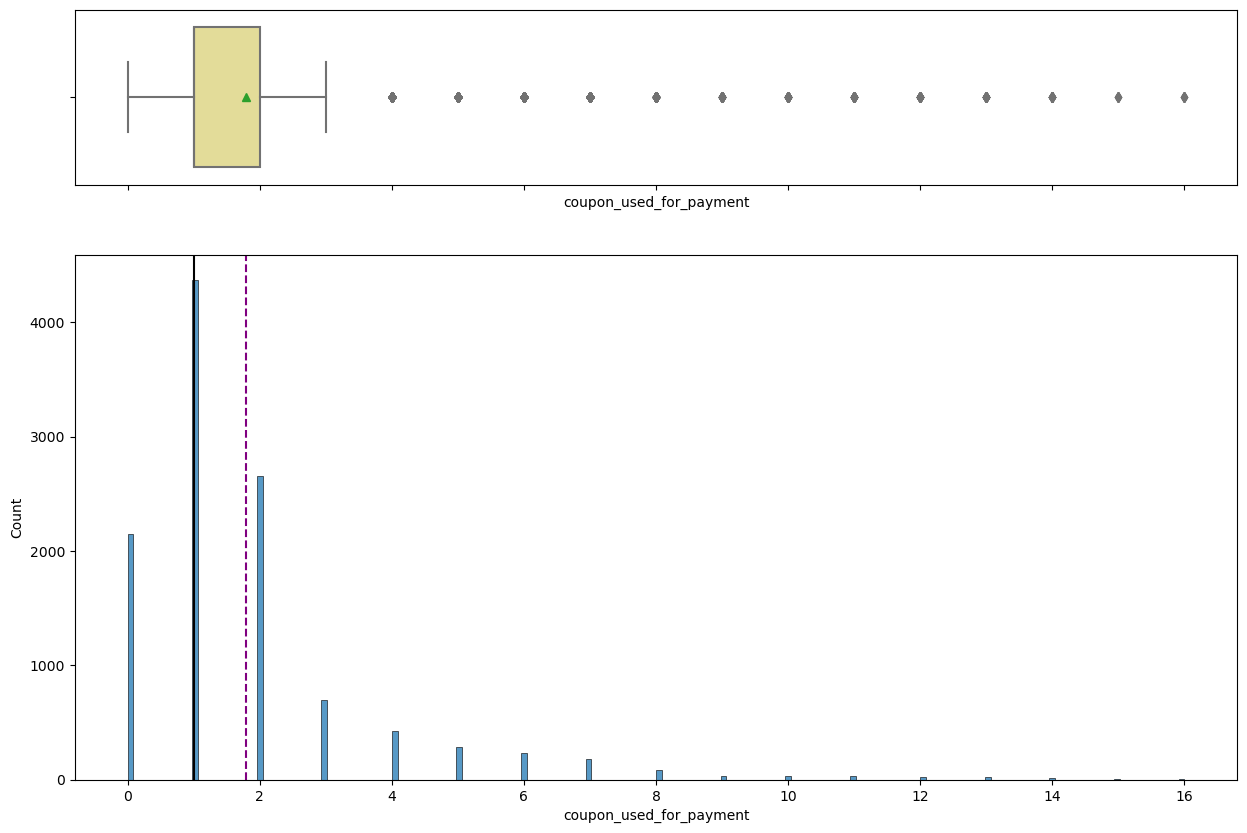

In [58]:
histogram_boxplot(df, "coupon_used_for_payment")

In [59]:
df['coupon_used_for_payment'].mean()

1.7906191702940393

In [60]:
df['coupon_used_for_payment'].value_counts()

coupon_used_for_payment
1.0     4373
2.0     2656
0.0     2150
3.0      698
4.0      424
5.0      284
6.0      234
7.0      184
8.0       88
9.0       34
10.0      34
11.0      30
12.0      26
13.0      22
14.0      12
15.0       4
16.0       4
Name: count, dtype: int64

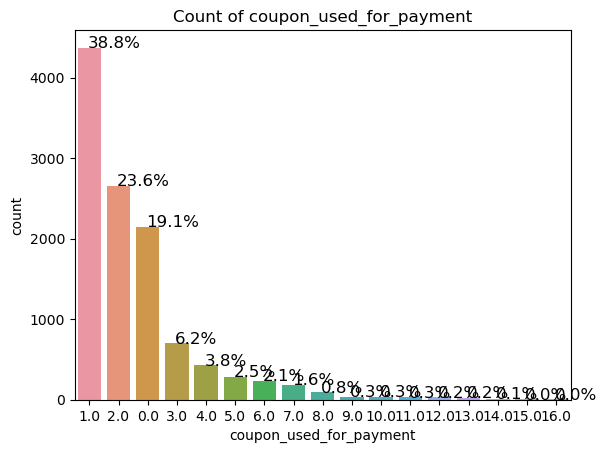

In [61]:
#Plotting a countplot for the Complain_ly variablea
ax=sns.countplot(x="coupon_used_for_payment", data=df, order=df['coupon_used_for_payment'].value_counts().index) # a countplot of the mentionedd column.
plt.title('Count of coupon_used_for_payment')
perc_on_bar(ax, df["coupon_used_for_payment"])
plt.show()

- Average number of times coupon was used is 1.8.
- Outliers ranging from 4 to 16 times.

### 16. Day_Since_CC_connect

/Users/ishashukla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


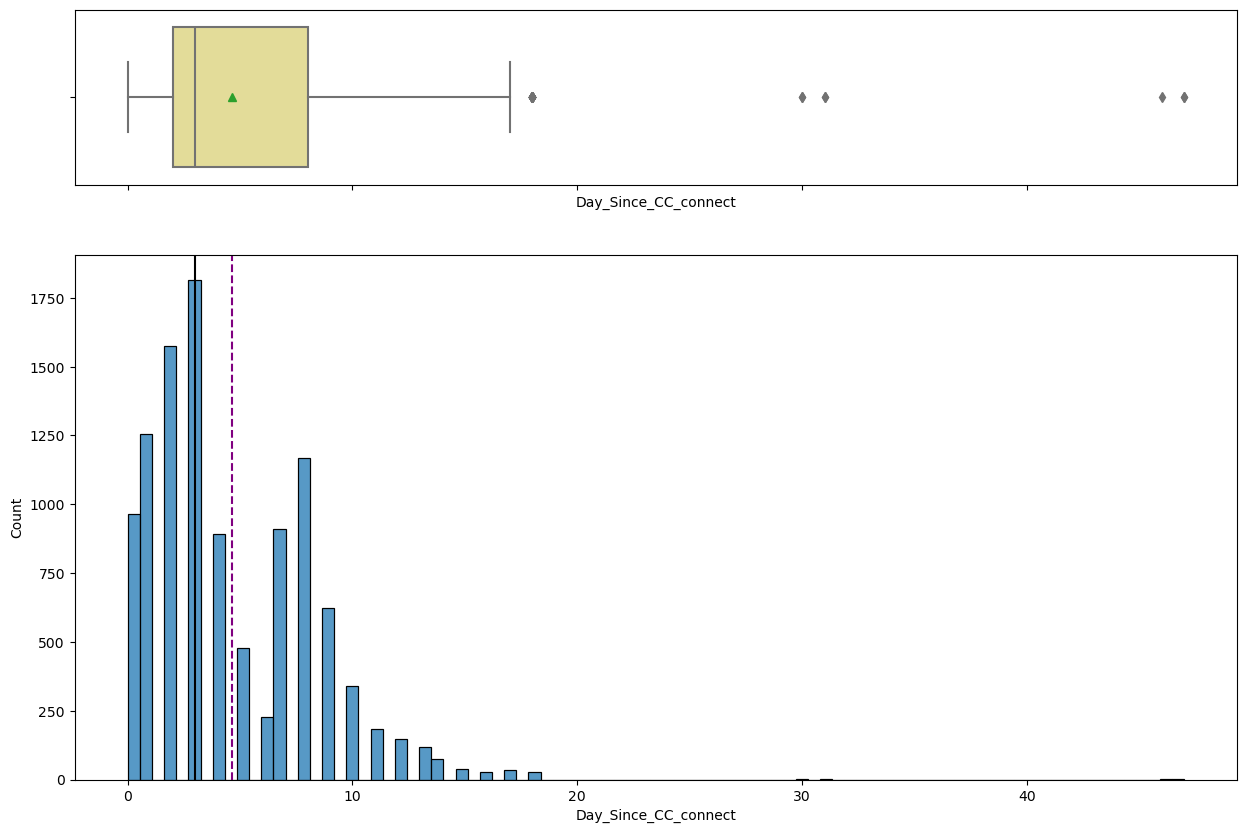

In [62]:
histogram_boxplot(df, "Day_Since_CC_connect")

In [63]:
df['Day_Since_CC_connect'].mean()

4.6331865712713265

- Higest number of customers reconnect within the first three days of reaching out. Customer service can be improved by tracing the recurring reasons and work towards solving it
- Average number of days taken to reconnect is around 5 days.
- The call pattern repeats again around 5 to 6 days
- Three different groups of outliers can be seen around 20, 30 and 50 days

### 17. cashback

/Users/ishashukla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


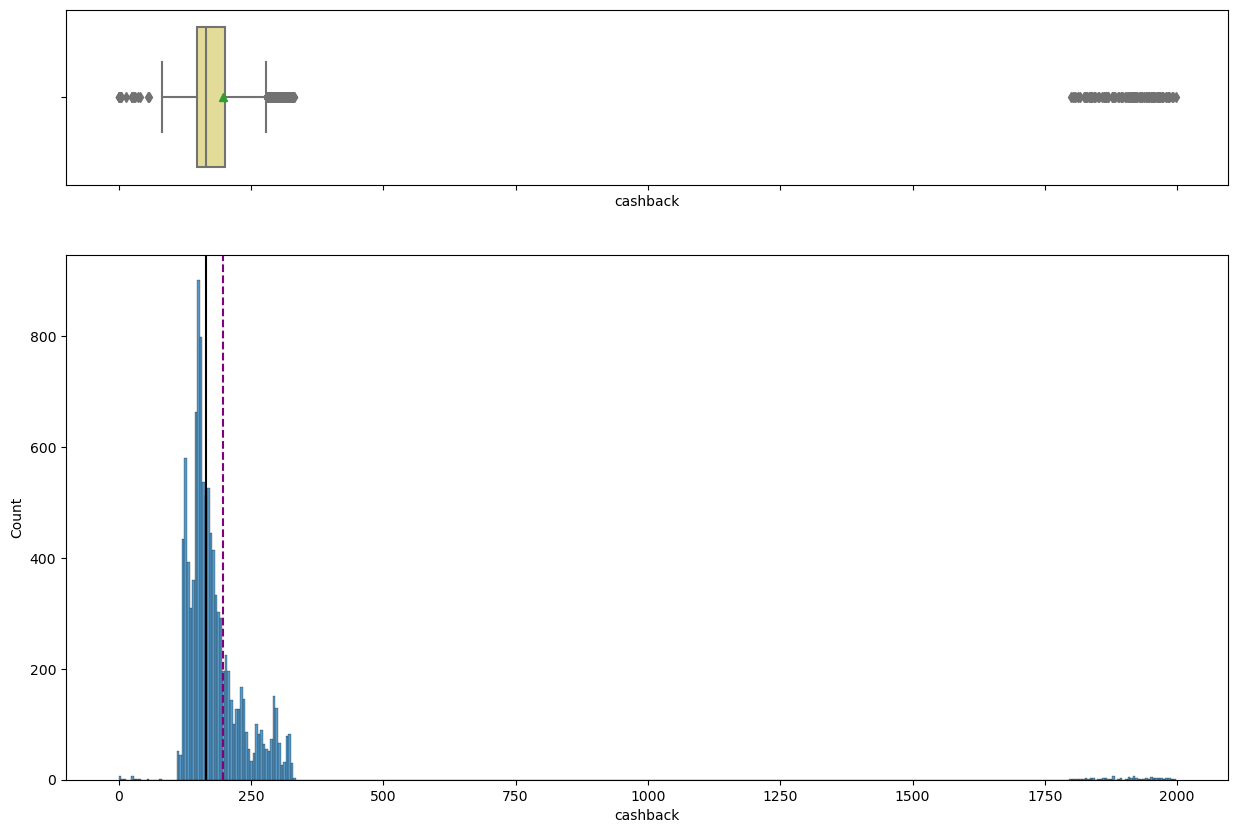

In [64]:
histogram_boxplot(df, "cashback")

In [65]:
df['cashback'].mean()

196.23636970427364

- On an average, the cashback generated by the account in the past year in near about 196 INR
- Outliers present between 1800 and 2000
- Outliers are also present betwwen 0 and 100 and also between 300 to 400.

### 18. Login_device

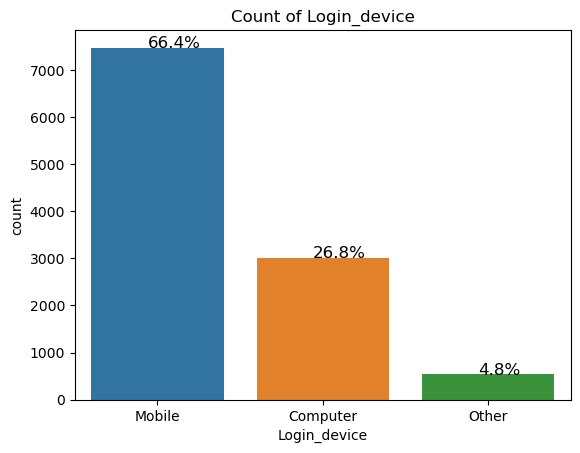

In [66]:
#Plotting a countplot for the Complain_ly variablea
ax=sns.countplot(x="Login_device", data=df, order=df['Login_device'].value_counts().index) # a countplot of the mentionedd column.
plt.title('Count of Login_device')
perc_on_bar(ax, df["Login_device"])
plt.show()

- Customers mostly use Mobile as there login device then followed by computer and Others

In [67]:
import pandas as pd

# Create a sample DataFrame
# df = pd.DataFrame(...)

# Initialize the outliers_count dictionary
outliers_count = {}

# Iterate over each column in the DataFrame
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers_count[column] = {
            'No. of outliers': len(outliers),
            'Percentage of outliers': len(outliers) / len(df) * 100
        }

    elif pd.api.types.is_object_dtype(df[column]):
        value_counts = df[column].value_counts()
        rare_threshold = 0.05 * len(df)  # Define what you consider rare (e.g., less than 5% frequency)
        outliers = df[df[column].isin(value_counts[value_counts <= rare_threshold].index)]
        outliers_count[column] = {
            'No. of outliers': len(outliers),
            'Percentage of outliers': len(outliers) / len(df) * 100
        }

# Print the number of outliers and their percentages in each column
outliers_df = pd.DataFrame([
    {'Column': column, 'No. of outliers': details['No. of outliers'], 'Percentage of outliers': details['Percentage of outliers']}
    for column, details in outliers_count.items()
])

print(outliers_df)

                     Column  No. of outliers  Percentage of outliers
0                 AccountID                0                0.000000
1                     Churn             1896               16.838366
2                    Tenure              139                1.234458
3                 City_Tier              480                4.262877
4           CC_Contacted_LY               42                0.373002
5                   Payment                0                0.000000
6                    Gender                0                0.000000
7             Service_Score               90                0.799290
8        Account_user_count             1287               11.429840
9           account_segment              520                4.618117
10           CC_Agent_Score                0                0.000000
11           Marital_Status                0                0.000000
12            rev_per_month              185                1.642984
13              Complain_ly       

/Users/ishashukla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


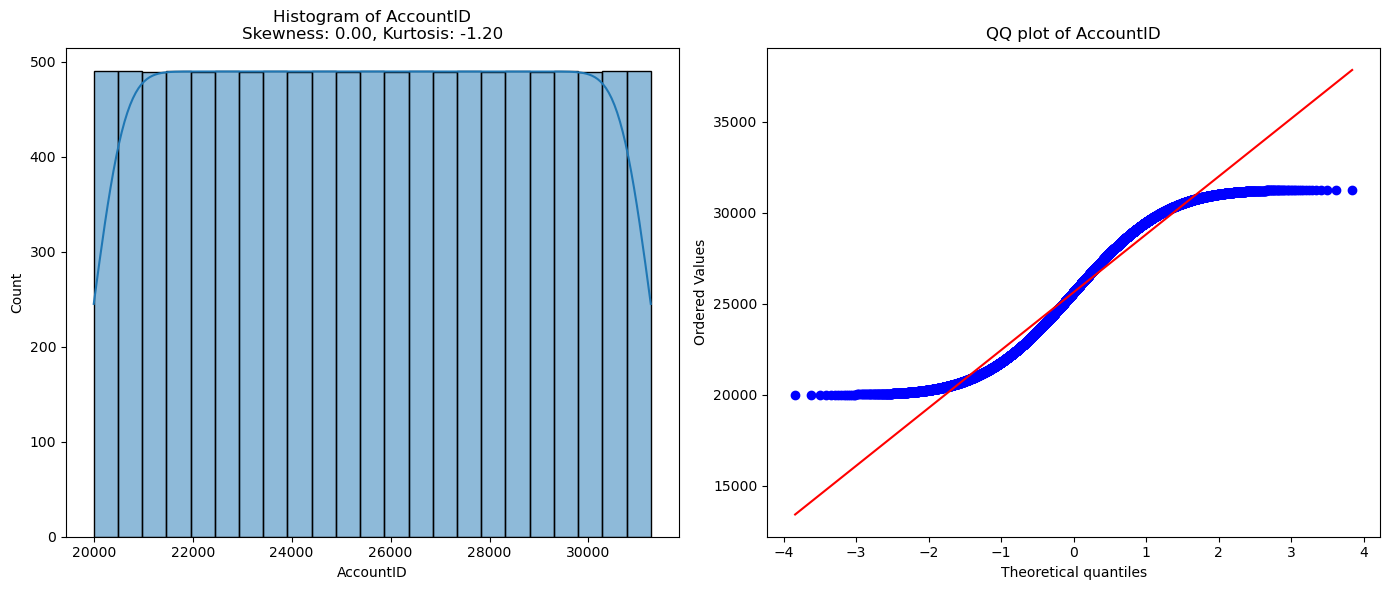

/Users/ishashukla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


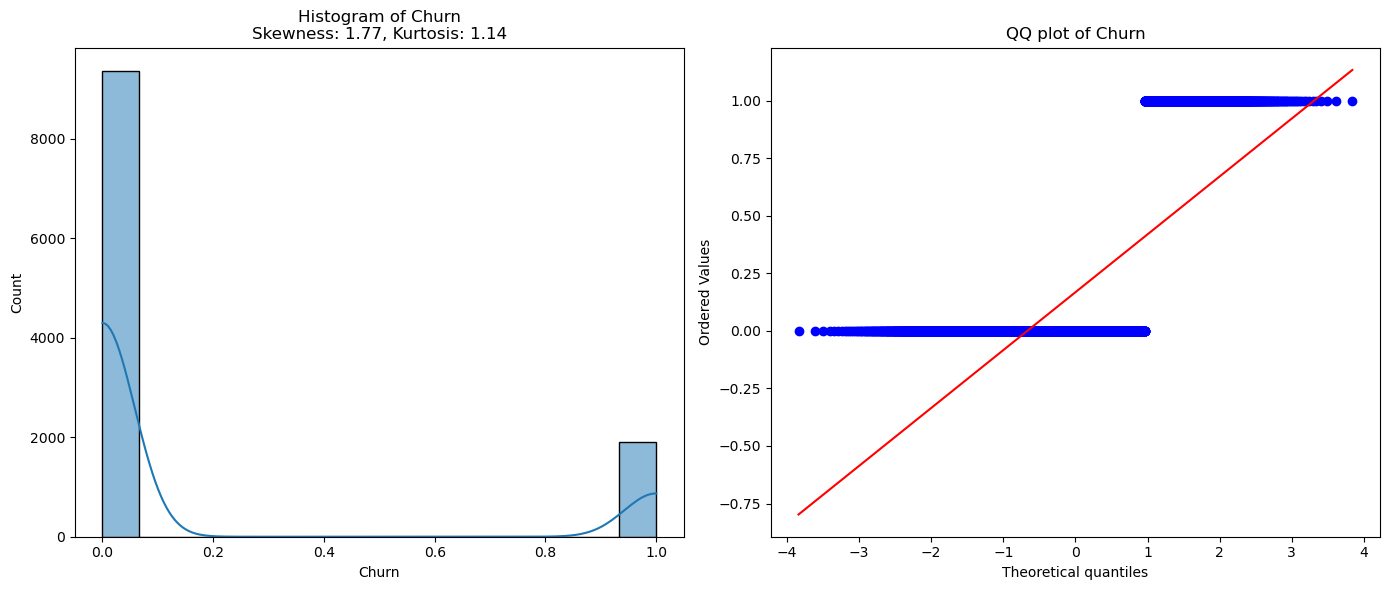

/Users/ishashukla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


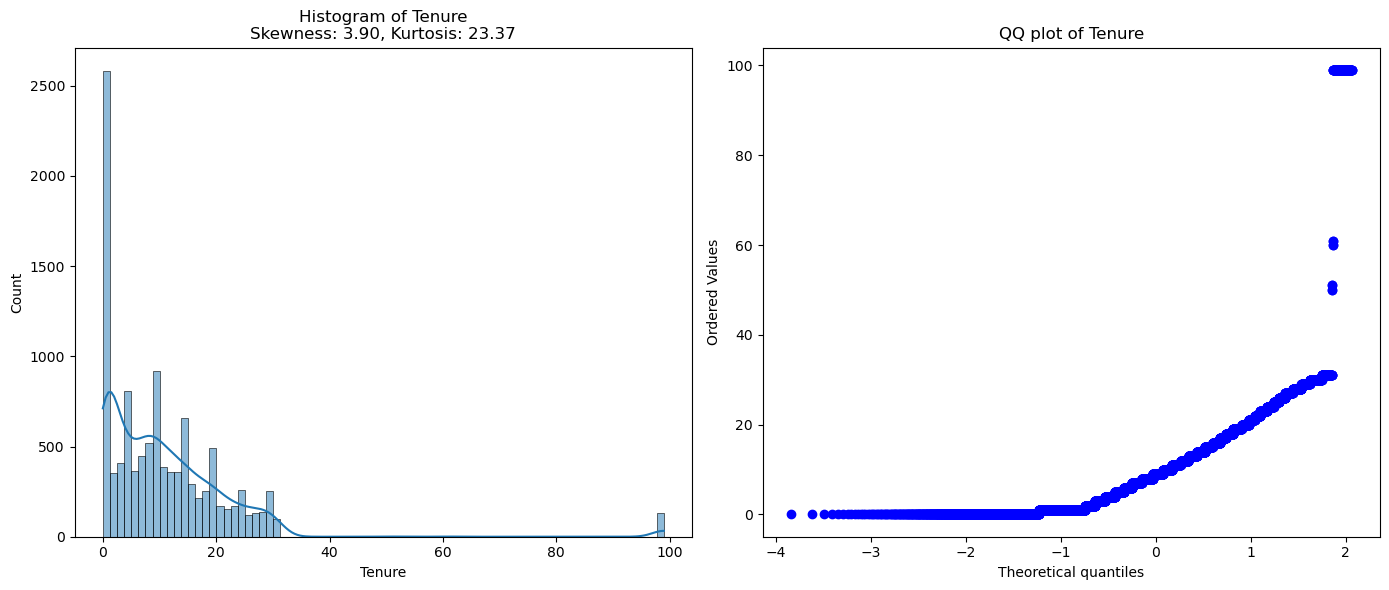

/Users/ishashukla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


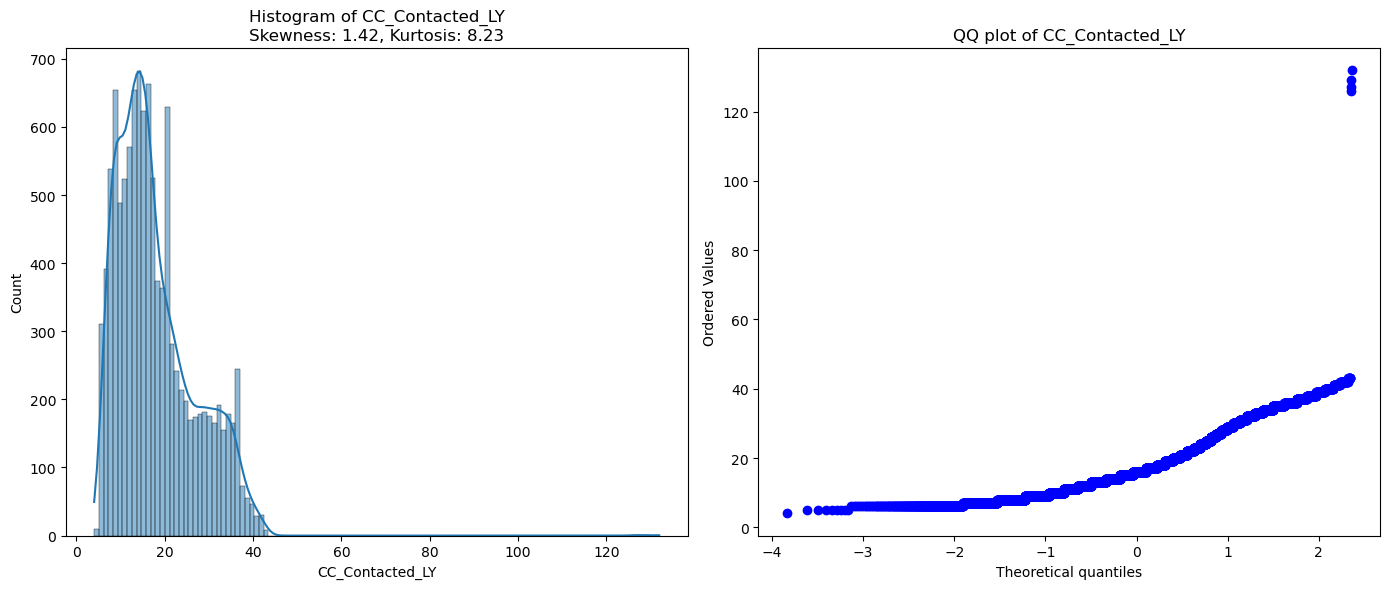

/Users/ishashukla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


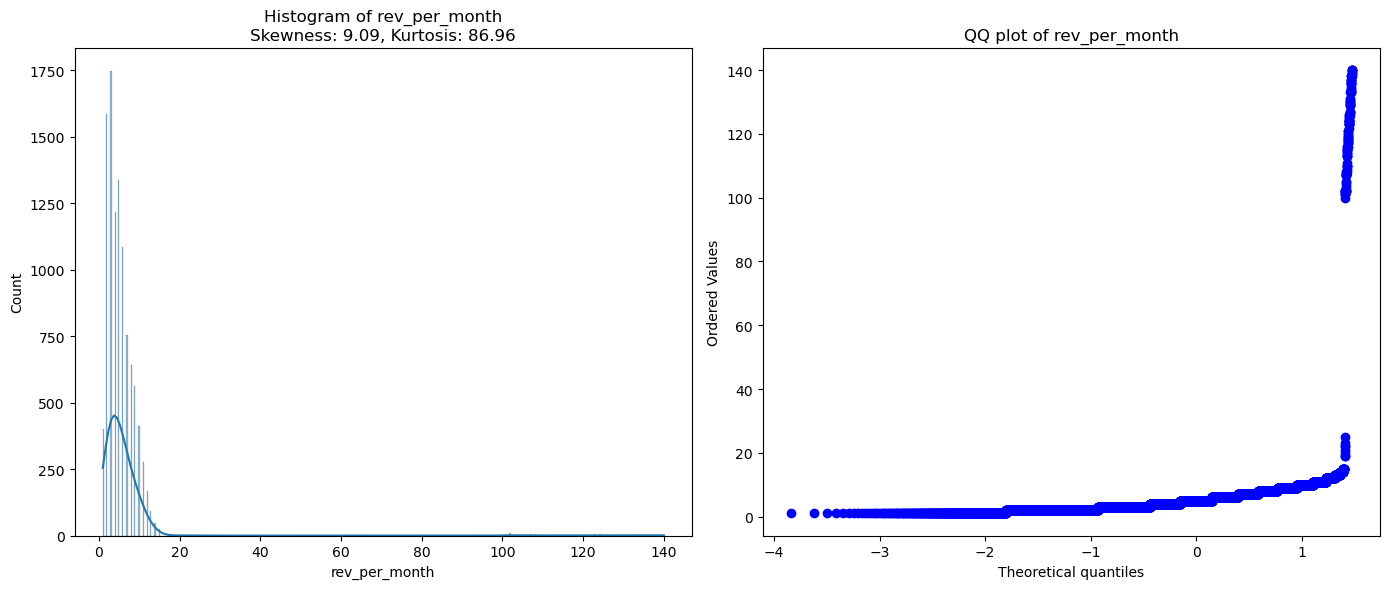

/Users/ishashukla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


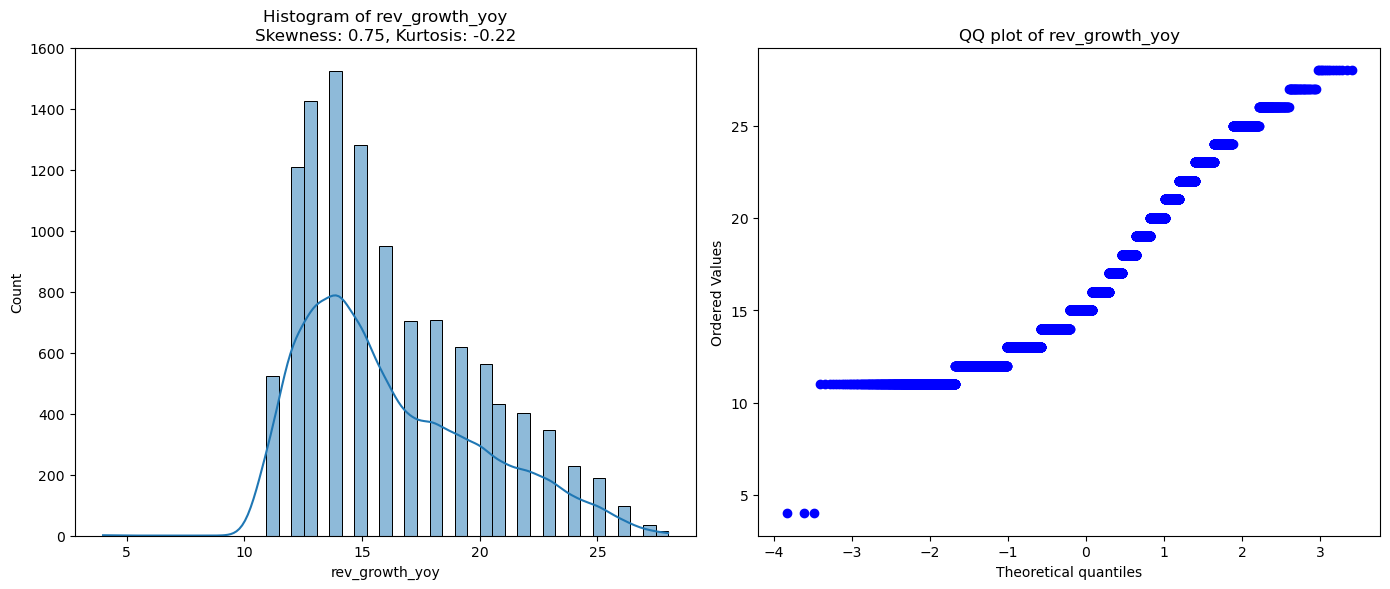

/Users/ishashukla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


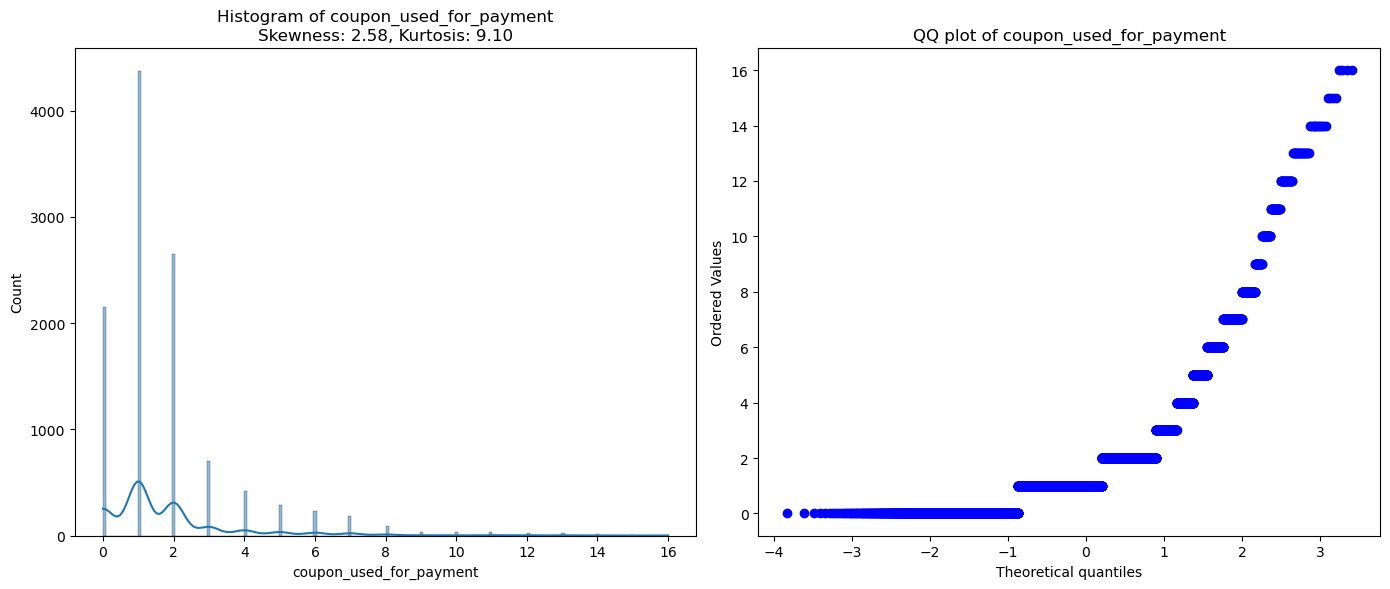

/Users/ishashukla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


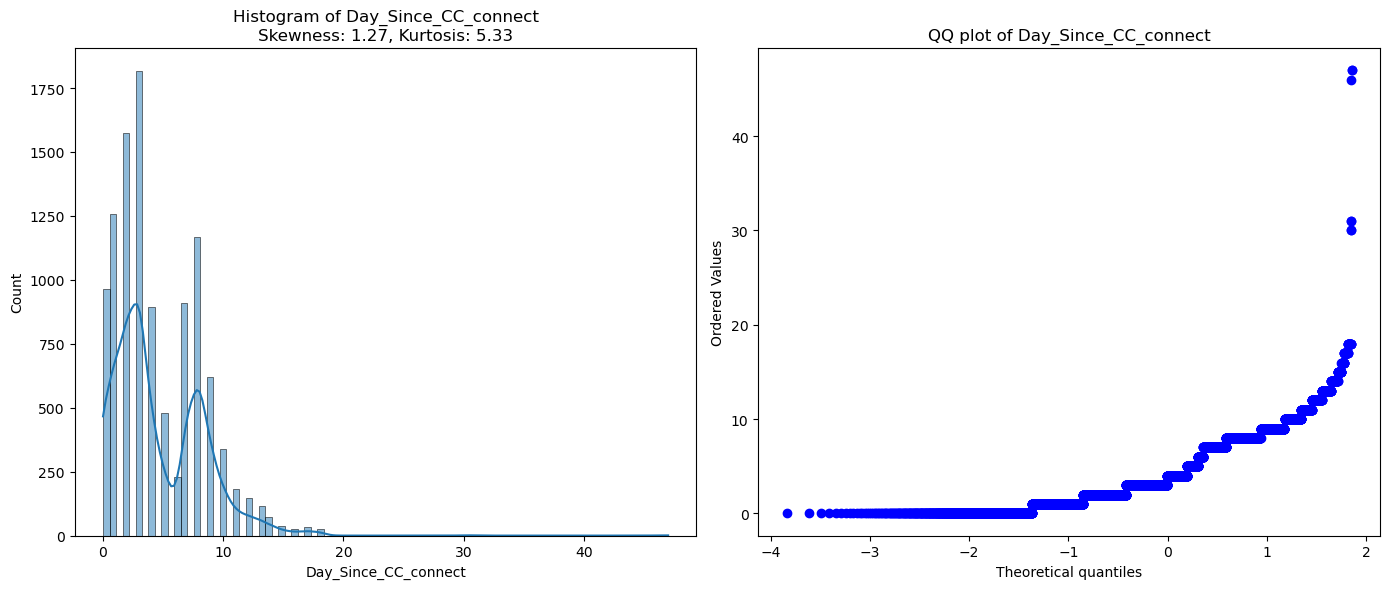

/Users/ishashukla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


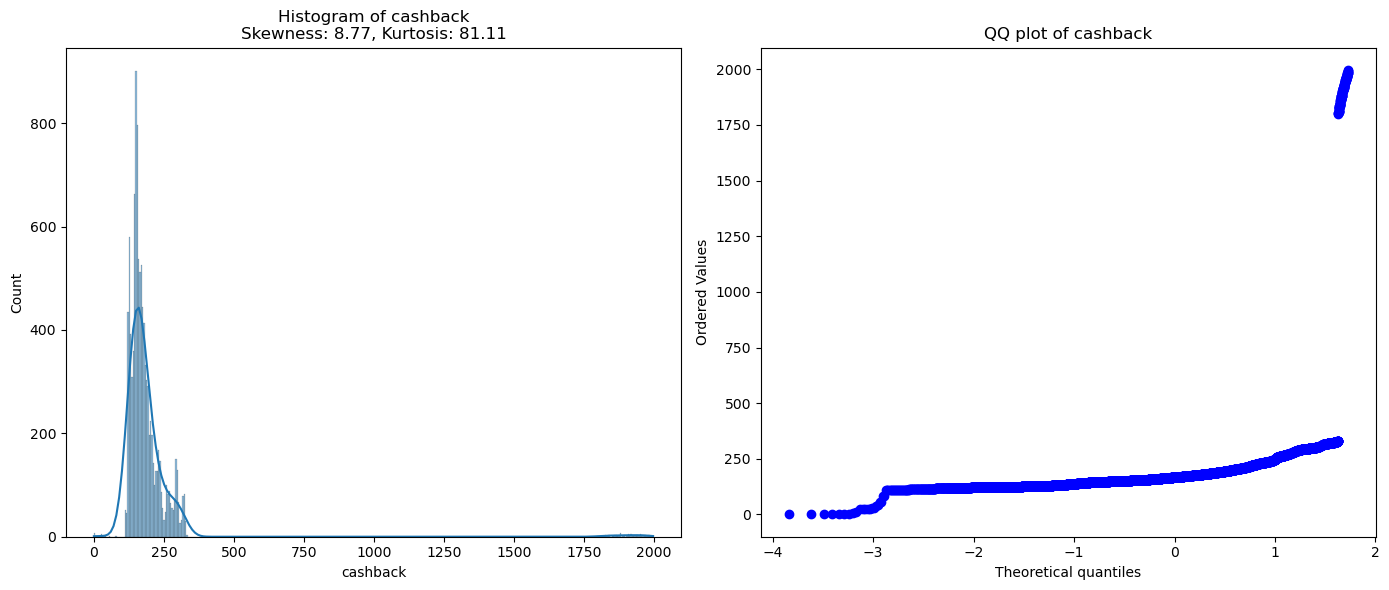

Skewness and Kurtosis of each numerical column:
                    Column  Skewness  Kurtosis
0                AccountID      0.00     -1.20
1                    Churn      1.77      1.14
2                   Tenure      3.90     23.37
3          CC_Contacted_LY      1.42      8.23
4            rev_per_month      9.09     86.96
5           rev_growth_yoy      0.75     -0.22
6  coupon_used_for_payment      2.58      9.10
7     Day_Since_CC_connect      1.27      5.33
8                 cashback      8.77     81.11


In [68]:
# Initialize the skewness and kurtosis dictionaries
skewness_info = {}
kurtosis_info = {}

# Iterate over each column in the DataFrame
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        # Calculate skewness and kurtosis
        skewness = df[column].skew()
        kurtosis = df[column].kurtosis()
        skewness_info[column] = round(skewness, 2)
        kurtosis_info[column] = round(kurtosis, 2)

        # Visualize the distribution
        plt.figure(figsize=(14, 6))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[column], kde=True)
        plt.title(f'Histogram of {column}\nSkewness: {skewness:.2f}, Kurtosis: {kurtosis:.2f}')

        # QQ plot
        plt.subplot(1, 2, 2)
        stats.probplot(df[column], dist="norm", plot=plt)
        plt.title(f'QQ plot of {column}')

        plt.tight_layout()
        plt.show()

# Print the skewness and kurtosis information
skewness_kurtosis_df = pd.DataFrame([
    {'Column': column, 'Skewness': skewness, 'Kurtosis': kurtosis}
    for column, (skewness, kurtosis) in zip(skewness_info.keys(), zip(skewness_info.values(), kurtosis_info.values()))
])

print("Skewness and Kurtosis of each numerical column:")
print(skewness_kurtosis_df)

## Bivariate Analysis

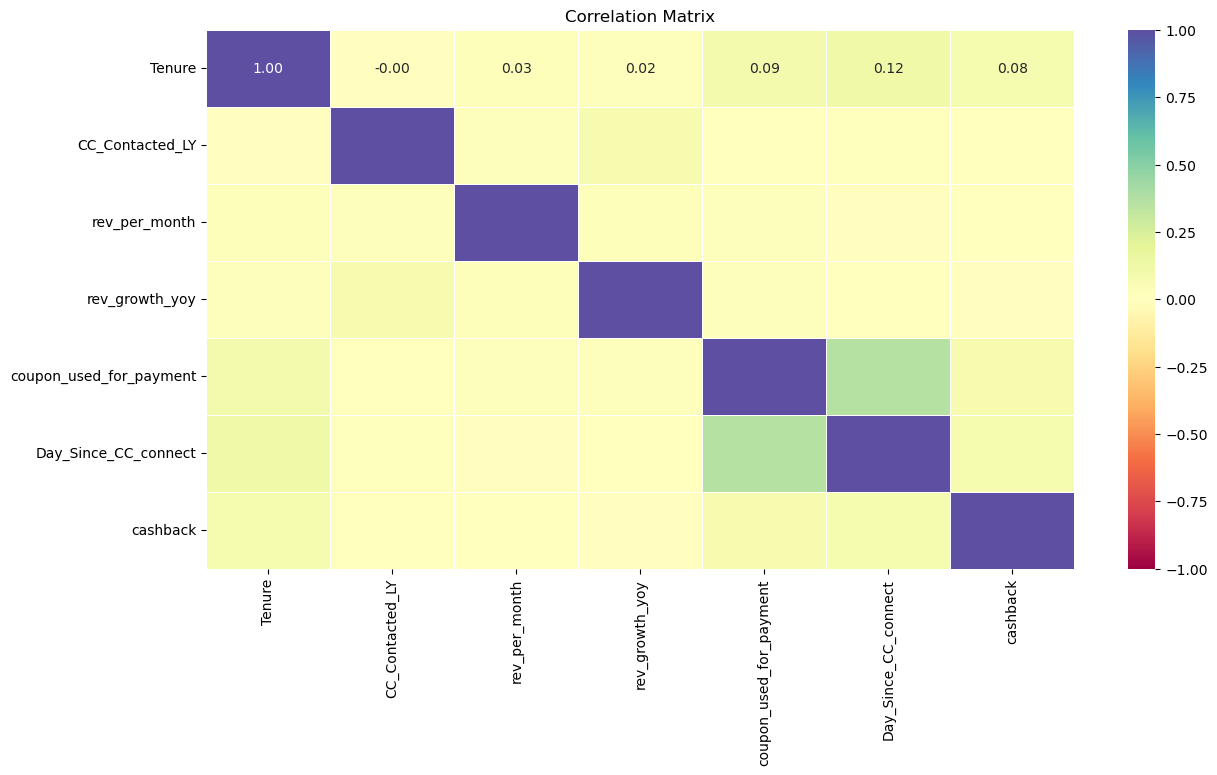

In [69]:
# Select only numeric columns for the correlation calculation
numeric_df = df.drop(columns=["AccountID", "Churn"]).select_dtypes(include=['float64', 'int64'])

# Plot the heatmap for the correlation matrix of numeric columns
plt.figure(figsize=(14, 7))
sns.heatmap(
    numeric_df.corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
    linewidths=0.5  # Optional: adds lines between the cells
)
plt.title('Correlation Matrix')
plt.show()

In [70]:
numeric_df.corr()

Tenure  CC_Contacted_LY  rev_per_month  \
Tenure                   1.000000        -0.004261       0.028431   
CC_Contacted_LY         -0.004261         1.000000       0.015675   
rev_per_month            0.028431         0.015675       1.000000   
rev_growth_yoy           0.018824         0.072913       0.024114   
coupon_used_for_payment  0.089171         0.004969       0.016548   
Day_Since_CC_connect     0.122612         0.012938      -0.000923   
cashback                 0.078416         0.002679       0.002974   

                         rev_growth_yoy  coupon_used_for_payment  \
Tenure                         0.018824                 0.089171   
CC_Contacted_LY                0.072913                 0.004969   
rev_per_month                  0.024114                 0.016548   
rev_growth_yoy                 1.000000                 0.018341   
coupon_used_for_payment        0.018341                 1.000000   
Day_Since_CC_connect           0.002206                 0.361735   
cashback                      -0.001157                 0.072861   

                         Day_Since_CC_connect  cashback  
Tenure                               0.122612  0.078416  
CC_Contacted_LY                      0.012938  0.002679  
rev_per_month                       -0.000923  0.002974  
rev_growth_yoy                       0.002206 -0.001157  
coupon_used_for_payment              0.361735  0.072861  
Day_Since_CC_connect                 1.000000  0.084465  
cashback                             0.084465  1.000000

1.	**Churn**:<br>
	•	`Negative Correlation with Tenure (-0.233):` Indicates that customers with longer tenure are less likely to churn.<br>
	•	`Positive Correlation with Complain_ly (0.251):` Suggests that customers who have lodged complaints in the previous year are more likely to churn.<br>
	•	`Negative Correlation with Day_Since_CC_connect (-0.148):` Indicates that the more recent the customer care connection, the less likely the customer is to churn.<br>
2.	**Tenure**:<br>
	•	`Positive Correlation with Day_Since_CC_connect (0.123):` Longer-tenured customers tend to have more days since their last customer care connection.<br>
	•	`Positive Correlation with coupon_used_for_payment (0.089):` Slight positive correlation indicating that longer-tenured customers might use more coupons.<br>
3.	**City_Tier**:<br>
	•	`Low Correlation with all other variables:` This suggests that the city tier has minimal impact on the other factors, indicating that customers across different city tiers behave similarly in these aspects.<br>
4.	**CC_Contacted_LY (Customer Care Contacted Last Year)**:<br>
	•	`Positive Correlation with Service_Score (0.060):` Suggests that customers who contacted customer care last year had a slightly better service score.<br>
	•	`Slightly Positive Correlation with Rev_growth_yoy (0.073):` Indicates a marginal relationship between contacting customer care and revenue growth year-over-year.<br>
5.	**Service_Score**:<br>
	•	`Strong Positive Correlation with Account_user_count (0.323):` Indicates that higher service scores are associated with accounts that have more users.<br>
	•	`Positive Correlation with coupon_used_for_payment (0.182):` Suggests that customers with higher service scores are more likely to use coupons for payment.<br>
6.	**Account_user_count**:<br>
	•	`Positive Correlation with coupon_used_for_payment (0.146):` Indicates that accounts with more users tend to use more coupons for payment.<br>
	•	`Positive Correlation with Service_Score (0.323):` Aligns with the above point that larger accounts generally receive better service scores.<br>
7.	**CC_Agent_Score**:<br>
	•	`Low correlation with other variables:` This suggests that the score given to the customer care agent by the customer has minimal direct influence on other factors in the dataset.<br>
8.	**Rev_per_month (Revenue per Month)**:<br>
	•	`Low correlation with other variables:` This suggests that monthly revenue is relatively independent of the other variables in this dataset.<br>
9.	**Complain_ly**:<br>
	•	`Positive Correlation with Churn (0.251):` Customers who have complained in the last year are more likely to churn, a significant observation for customer retention strategies.<br>
10.	**Rev_growth_yoy**:<br>
	•	`Positive Correlation with Service_Score (0.103):` Indicates a slight relationship where better service scores might be associated with revenue growth.<br>
11.	**coupon_used_for_payment**:<br>
	•	`Strong Positive Correlation with Day_Since_CC_connect (0.362):` Suggests that customers who have used coupons for payment tend to have a more recent connection with customer care.<br>
12.	**Day_Since_CC_connect**:<br>
	•	`Positive Correlation with coupon_used_for_payment (0.362):` As mentioned above, there’s a strong relationship between the last connection with customer care and coupon usage.<br>
13.	**cashback**:<br>
	•	`Low correlation with most variables:` Indicates that cashback offers are relatively independent in terms of their influence on other factors in the dataset.<br>


/Users/ishashukla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ishashukla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ishashukla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ishashukla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

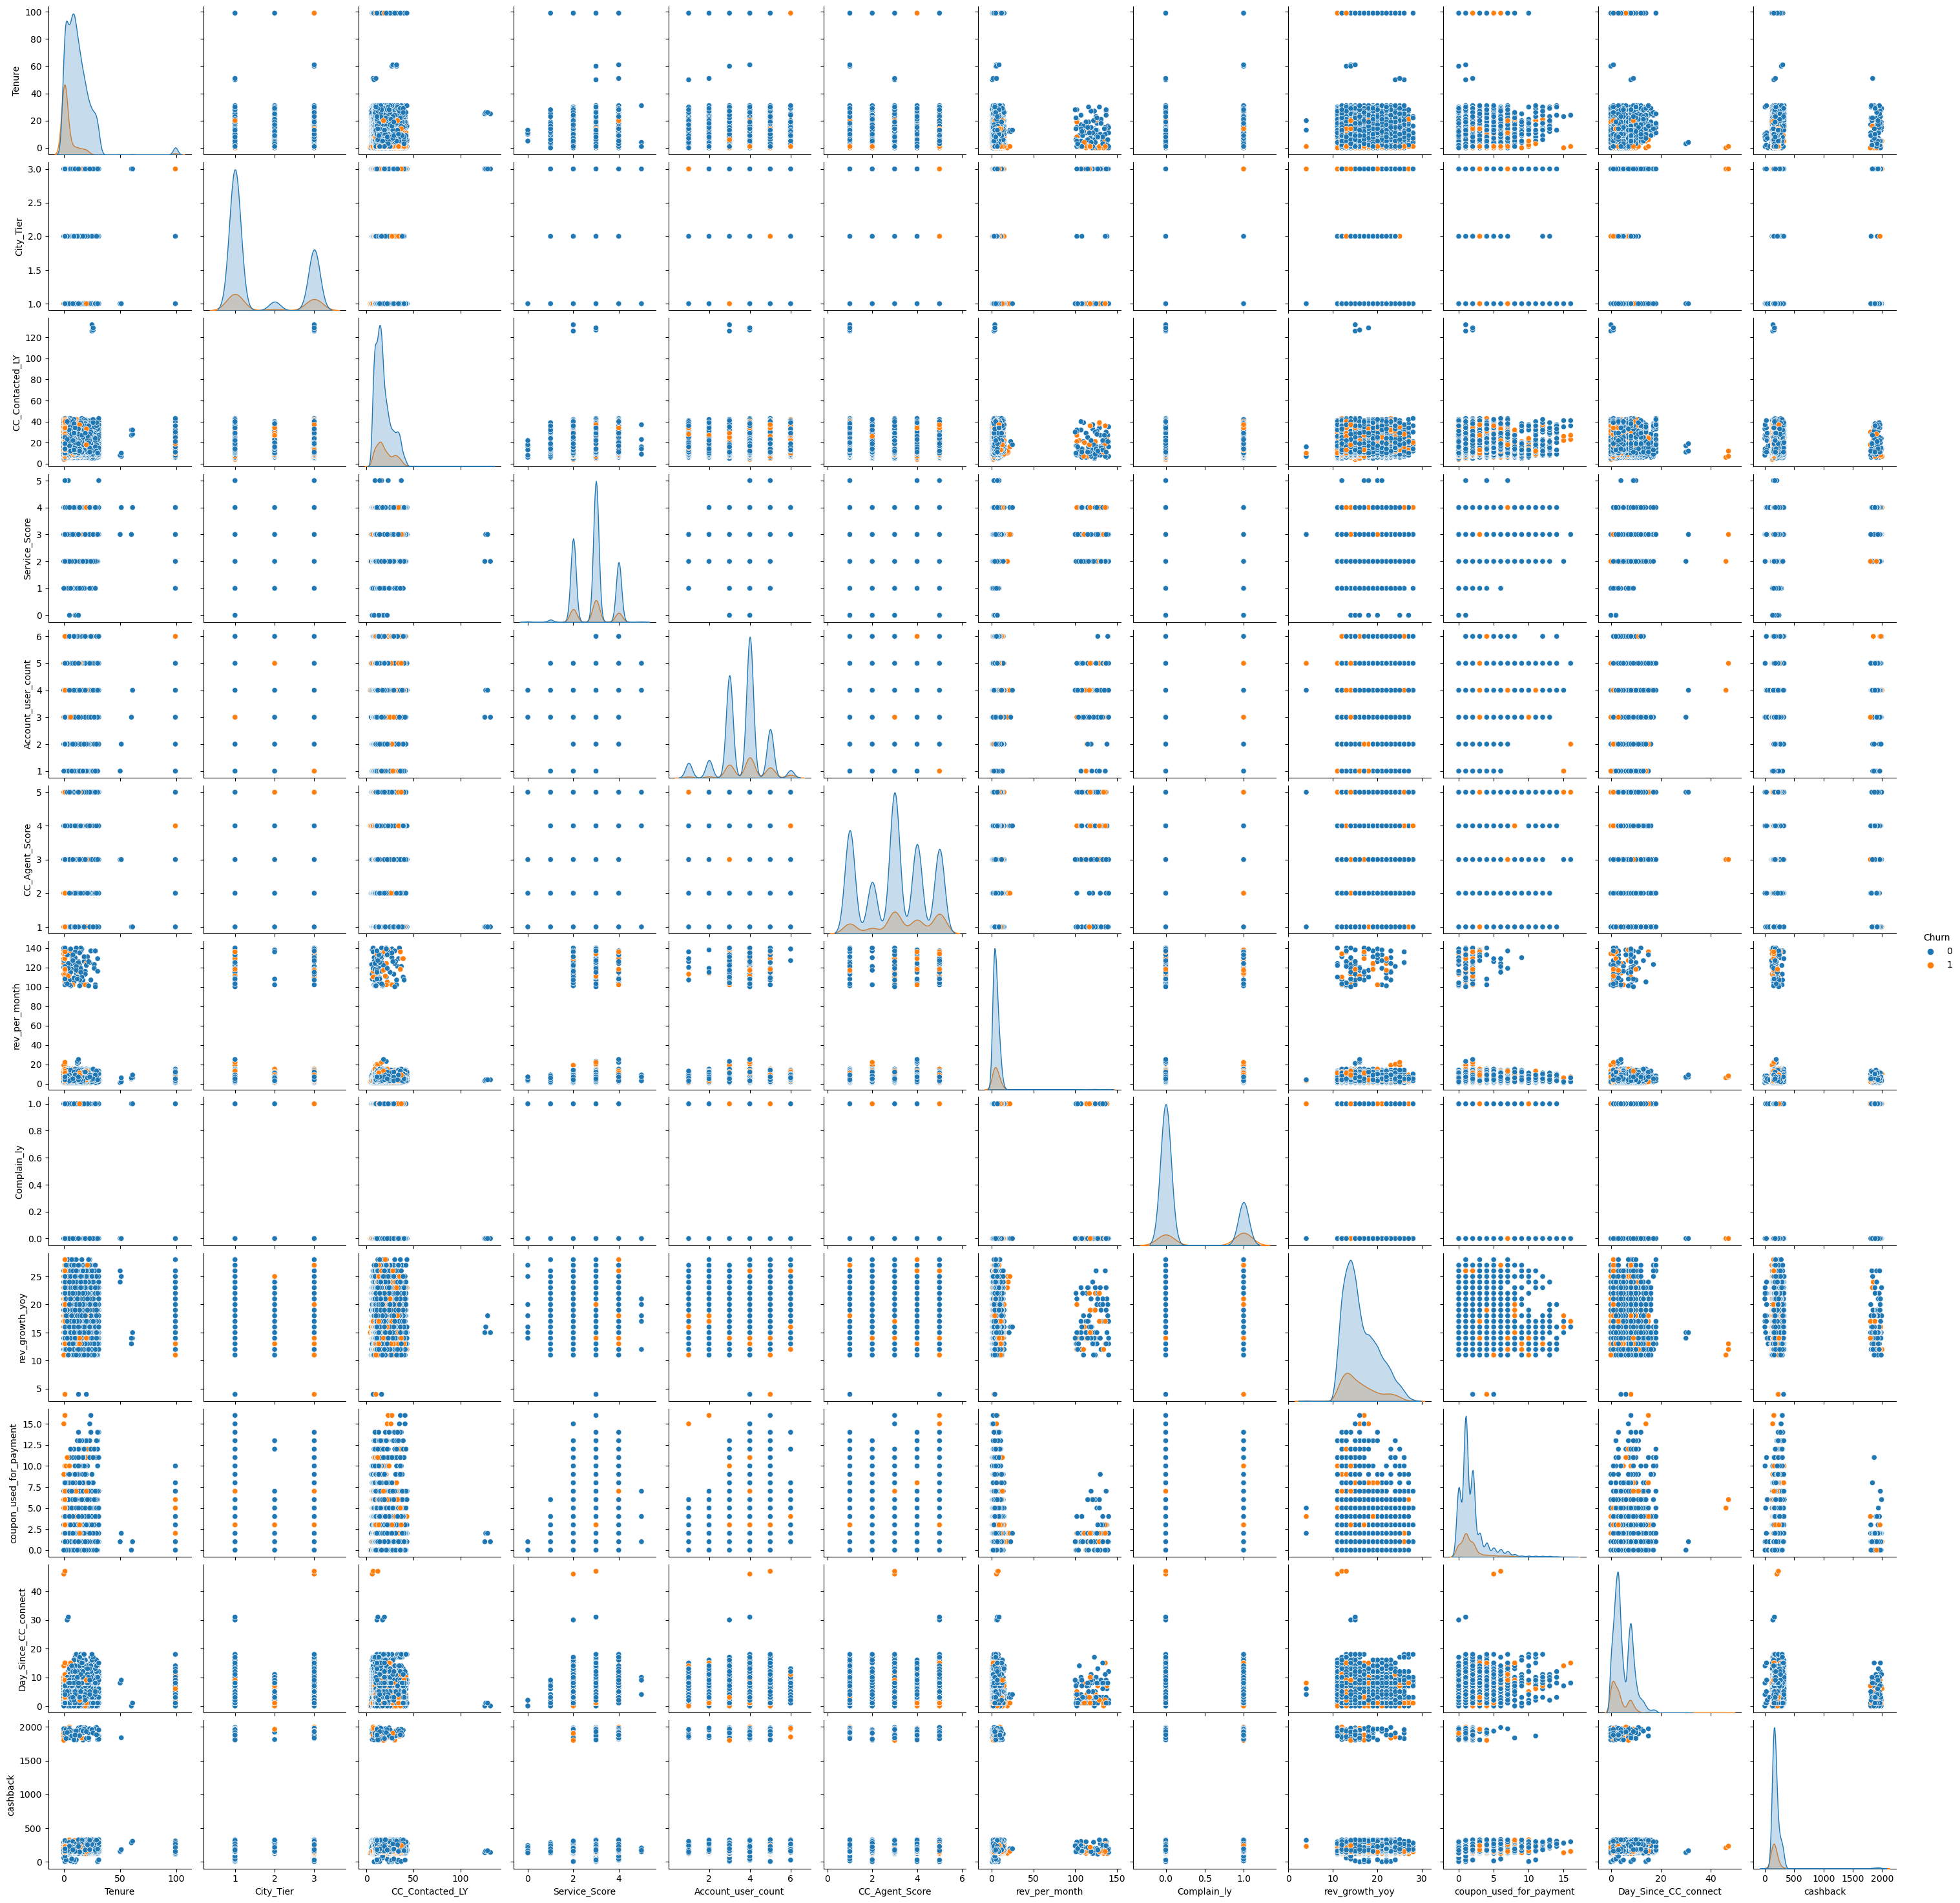

In [71]:
sns.pairplot(df.drop("AccountID", axis=1), hue="Churn")
plt.show()

In [72]:
# Defining a method to plot stacked bar plot


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart
    data : dataframe
    predictor : independent variable
    target : target variable
    
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 3, 5))
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="lower left", bbox_to_anchor=(1, 1))
    plt.xticks(rotation=0)
    plt.show()

### 1. Tenure vs Churn

Churn      0     1    All
Tenure                   
All     9194  1848  11042
1.0      681   670   1351
0.0      562   669   1231
3.0      367    43    410
4.0      360    43    403
7.0      418    32    450
2.0      322    32    354
20.0     187    30    217
5.0      373    30    403
8.0      490    29    519
10.0     396    27    423
14.0     320    25    345
13.0     334    25    359
99.0     107    24    131
19.0     249    24    273
9.0      475    21    496
15.0     291    20    311
21.0     150    20    170
11.0     368    20    388
16.0     272    19    291
6.0      348    15    363
12.0     347    13    360
18.0     242    11    253
17.0     209     6    215
30.0     137     0    137
61.0       2     0      2
60.0       2     0      2
51.0       2     0      2
50.0       2     0      2
31.0      96     0     96
26.0     122     0    122
29.0     114     0    114
28.0     137     0    137
27.0     131     0    131
25.0     114     0    114
24.0     147     0    147
22.0     151

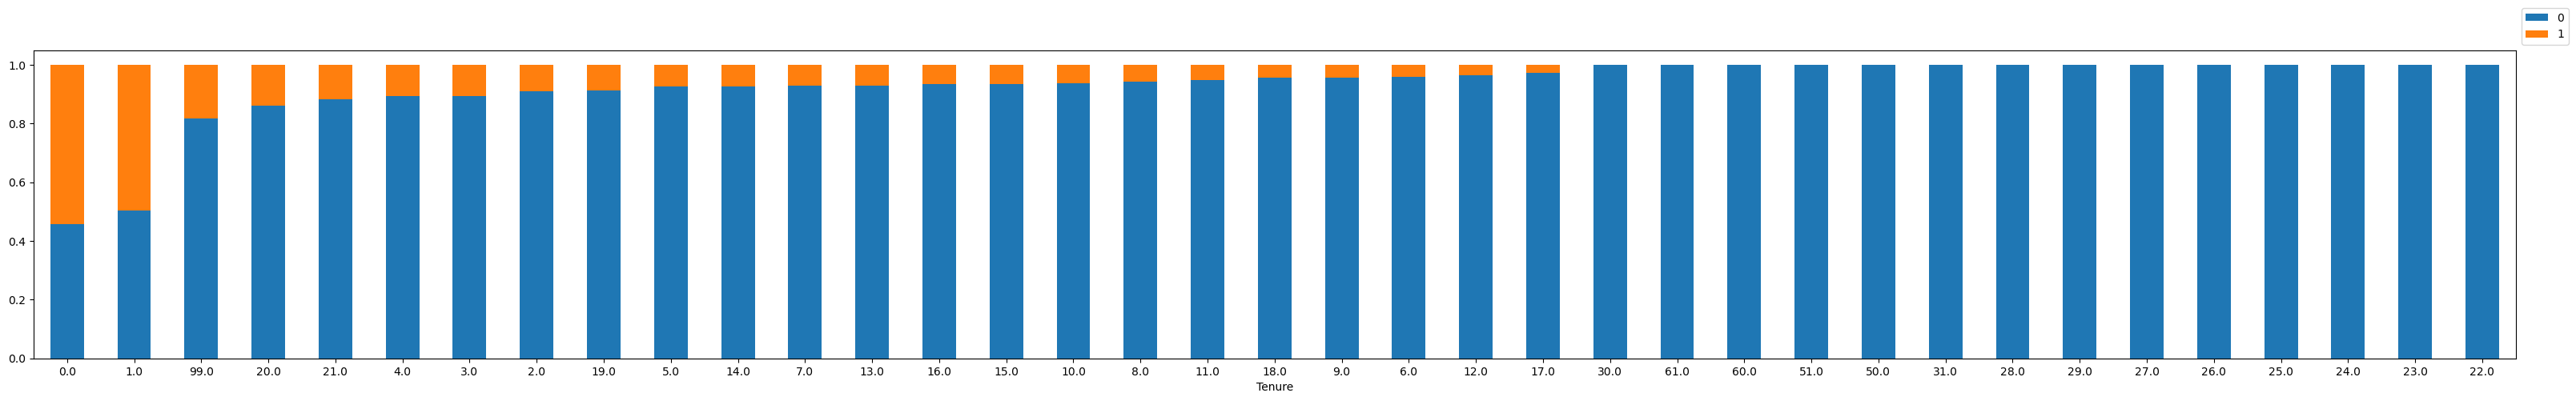

In [73]:
stacked_barplot(df, "Tenure", "Churn")

Customers with very short tenures (e.g., 1.0 to 3.0 months) have notably high churn rates, indicating that new customers are more likely to leave. As tenure increases, the number of churned customers generally decreases, especially for tenures above 7 months, where the churn rate stabilizes and drops significantly. Interestingly, customers with tenures above 20 months show almost no churn, indicating that long-term customers are highly loyal. **This trend suggests that early customer retention efforts could be crucial for reducing overall churn.**

### 2. Churn vs City_Tier

Churn         0     1    All
City_Tier                   
All        9269  1879  11148
1.0        6207  1056   7263
3.0        2678   727   3405
2.0         384    96    480


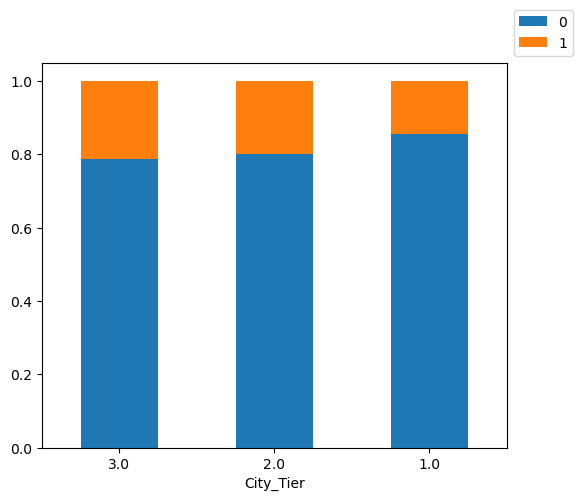

In [74]:
stacked_barplot(df, "City_Tier", "Churn")

Customers from **City Tier 1 show the highest retention**, with a majority (6207 out of 7263) not churning, suggesting a more stable customer base in this tier. In contrast, City Tier 3 has a higher churn rate, with 727 out of 3405 customers leaving, indicating potential challenges in customer retention. City Tier 2 has the smallest customer base, but it also has a noticeable churn rate (96 out of 480), which suggests that customers in this tier may also require targeted retention strategies. **Overall, City Tier 1 has the most loyal customers, while Tier 3 presents the most churn risk.**

### 3. Churn vs CC_Contacted_LY

Churn               0     1    All
CC_Contacted_LY                   
All              9280  1878  11158
16.0              554   109    663
14.0              580   102    682
15.0              528    95    623
13.0              561    94    655
9.0               567    88    655
12.0              483    88    571
17.0              442    83    525
10.0              415    74    489
11.0              452    72    524
8.0               469    69    538
18.0              306    68    374
19.0              299    65    364
21.0              251    59    310
22.0              227    55    282
20.0              265    54    319
7.0               338    53    391
31.0              113    52    165
30.0              128    47    175
23.0              197    44    241
29.0              138    43    181
24.0              172    42    214
6.0               270    41    311
32.0              152    40    192
34.0              139    39    178
28.0              142    36    178
25.0              16

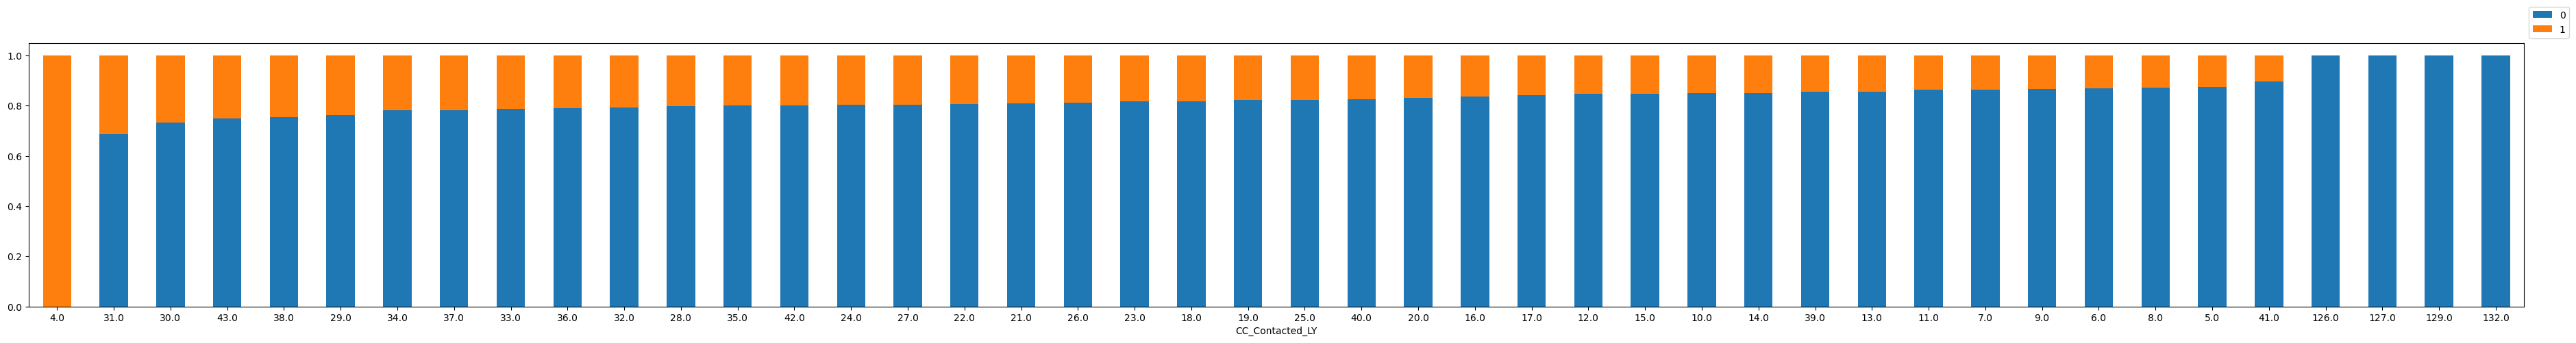

In [75]:
stacked_barplot(df, "CC_Contacted_LY", "Churn")

A pattern in churn rates relative to the number of times a customer contacted customer care in the last year (`CC_Contacted_LY`). Generally, a higher number of customer care contacts is associated with slightly higher churn rates. Customers with 4 or 5 contacts show minimal churn. The data suggests that a certain level of engagement with customer care may indicate dissatisfaction, potentially leading to churn, but extremely frequent or rare contacts might represent either severe issues or very satisfied customers, respectively.

### 4. Churn vs Payment

Churn                0     1    All
Payment                            
All               9277  1874  11151
Debit Card        3885   702   4587
Credit Card       3012   499   3511
E wallet           941   276   1217
Cash on Delivery   760   254   1014
UPI                679   143    822


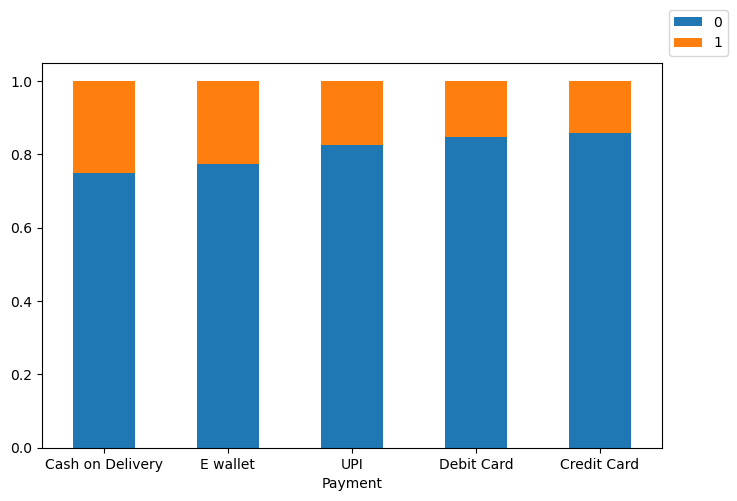

In [76]:
stacked_barplot(df, "Payment", "Churn")

Among the 11,151 customers, those using **Debit Cards** represent the largest group, with a churn rate of approximately 15% (702 out of 4,587). **Credit Card** users follow, with a churn rate of about 14% (499 out of 3,511). **E-wallet** users have a slightly higher churn rate of around 23% (276 out of 1,217), indicating that customers using digital wallets may be more prone to churn. **Cash on Delivery** has an even higher churn rate of 25% (254 out of 1,014). Lastly, **UPI** users exhibit a churn rate of roughly 17% (143 out of 822). These trends suggest that customers using alternative payment methods like E-wallets and Cash on Delivery may be more likely to churn compared to those using more traditional payment methods like Debit or Credit Cards.

### 5. Churn vs Gender

Churn      0     1    All
Gender                   
All     9278  1874  11152
Male    5519  1185   6704
Female  3759   689   4448


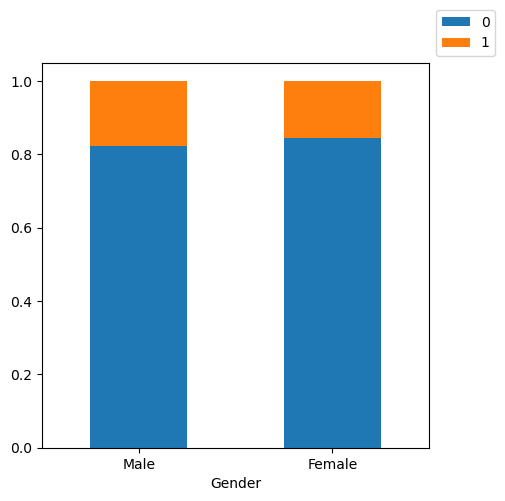

In [77]:
stacked_barplot(df, "Gender", "Churn")

The churn rate for **Male** customers is approximately **18% (1,185 out of 6,704)**, whereas the churn rate for **Female** customers is slightly lower, at about **15% (689 out of 4,448)**. This indicates that, overall, male customers tend to churn at a higher rate compared to female customers. **Despite this difference, the churn rates are relatively close, suggesting that both genders experience a similar propensity to churn, with males being marginally more likely to do so.**

### 6. Churn vs Service_Score

Churn             0     1    All
Service_Score                   
All            9282  1880  11162
3.0            4554   936   5490
2.0            2701   550   3251
4.0            1937   394   2331
0.0               8     0      8
1.0              77     0     77
5.0               5     0      5


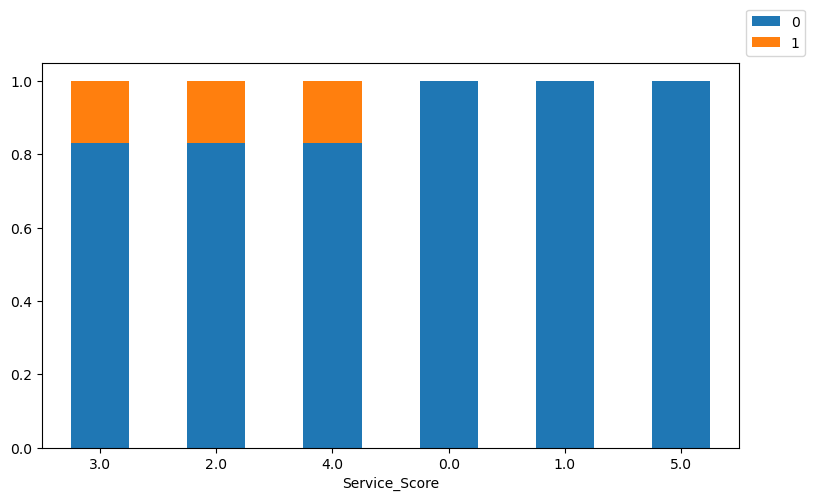

In [78]:
stacked_barplot(df, "Service_Score", "Churn")

The largest group is those with a **Service Score of 3.0**, comprising 5,490 customers, with a churn rate of approximately **17% (936 out of 5,490)**. The next significant group is the **Service Score of 2.0** with 3,251 customers, also exhibiting a churn rate around **17% (550 out of 3,251)**. Customers with a **Service Score of 4.0** total 2,331, with a similar churn rate of about 17% (394 out of 2,331). For **Service Scores of 0.0, 1.0, and 5.0**, there are very few customers and no recorded churn, which might indicate limited data or potential anomalies for these scores. **Overall, churn rates appear consistent across the main Service Score groups, suggesting that churn is relatively uniform within these scores.**

### 7. Churn vs Account_user_count

Churn                  0     1    All
Account_user_count                   
All                 8986  1830  10816
4.0                 3811   758   4569
3.0                 2772   489   3261
5.0                 1317   382   1699
6.0                  206   109    315
2.0                  478    48    526
1.0                  402    44    446


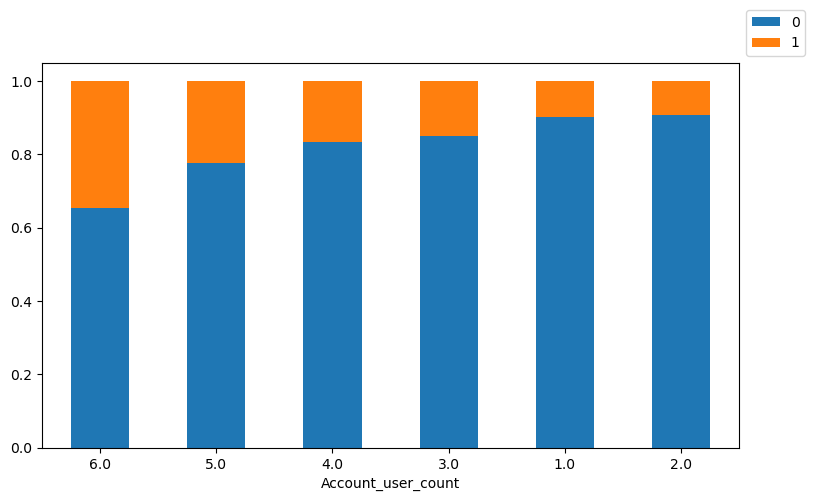

In [79]:
stacked_barplot(df, "Account_user_count", "Churn")

The largest group, with an **Account User Count of 4.0**, includes 4,569 customers, of whom 758 (approximately 17%) churned. The next significant group is those with an **Account User Count of 3.0**, totaling 3,261 customers, with a churn rate of around 15% (489 out of 3,261). Customers with an **Account User Count of 5.0** comprise 1,699 individuals, with a churn rate of about 22% (382 out of 1,699). For **Account User Counts of 6.0, 2.0, and 1.0**, the numbers are smaller, with churn rates varying significantly. Specifically, the churn rate for those with 6.0 accounts is about 35% (109 out of 315), which is notably higher compared to other groups. Customers with 2.0 and 1.0 accounts have relatively low churn rates, 9% (48 out of 526) and 10% (44 out of 446) respectively. **Overall, the churn rate tends to increase with higher account user counts, with the highest churn rate observed among those with 6.0 accounts.**

### 8. Churn vs account_segment

Churn               0     1    All
account_segment                   
All              9285  1878  11163
Regular Plus     2997  1127   4124
Super            3646   416   4062
HNI              1384   255   1639
Regular           480    40    520
Super Plus        778    40    818


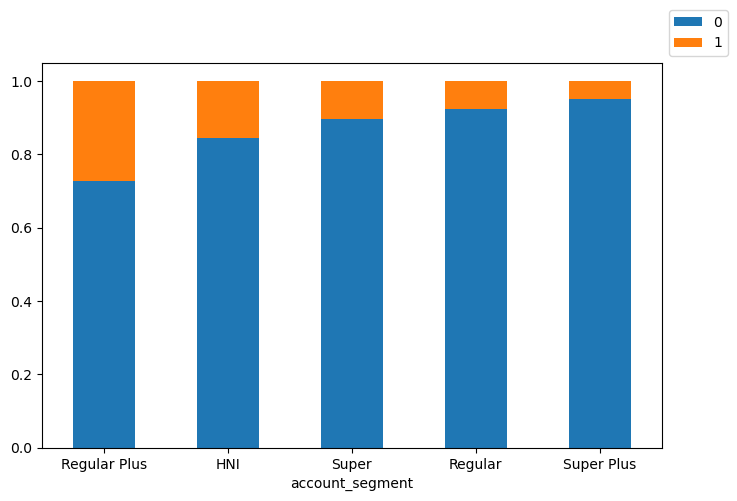

In [80]:
stacked_barplot(df, "account_segment", "Churn")

The data on churn across different account segments shows that the **Regular Plus** segment, with 4,124 customers, has the highest churn count at 1,127, translating to roughly 27% of its customer base. The **Super** segment, with 4,062 customers, experiences a lower churn rate of about 10%, with 416 customers having churned. **HNI** accounts, totaling 1,639 customers, have a churn rate of approximately 16% (255 churns), while the **Regular** segment, with only 520 customers, shows a churn rate of about 8% (40 churns). The **Super Plus** segment has the lowest churn rate, with 40 out of 818 customers (around 5%) having churned. **Overall, the **Regular Plus** segment is the most affected by churn, while the **Super Plus** segment has the lowest churn rate.**

### 9. Churn vs CC_Agent_Score

Churn              0     1    All
CC_Agent_Score                   
All             9270  1874  11144
3.0             2783   577   3360
5.0             1669   522   2191
4.0             1763   364   2127
1.0             2038   264   2302
2.0             1017   147   1164


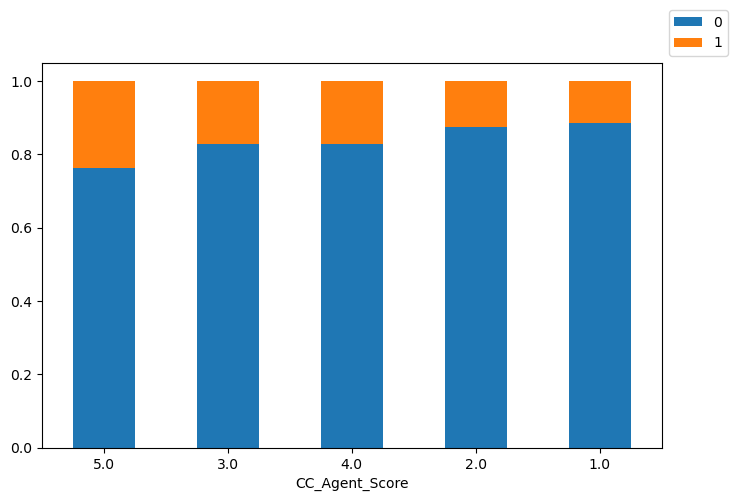

In [81]:
stacked_barplot(df, "CC_Agent_Score", "Churn")

The churn data across different CC_Agent_Score categories reveals varying levels of customer retention. The **3.0** score category has the largest number of customers, totaling 3,360, with a churn count of 577, indicating a churn rate of approximately 17%. The **5.0** score category, with 2,191 customers, shows a churn of 522, resulting in a churn rate of about 24%. Customers in the **4.0** score category, totaling 2,127, have a churn rate of around 17% with 364 churns. The **1.0** score category has a high churn rate of 11%, with 264 out of 2,302 customers churning. Lastly, the **2.0** score category, with 1,164 customers, has the lowest churn rate of around 13%, with 147 churns. **Overall, higher CC_Agent_Score categories tend to correlate with higher churn rates.**

### 10. Churn vs Marital_Status

Churn              0     1    All
Marital_Status                   
All             9184  1864  11048
Single          2573   947   3520
Married         5187   673   5860
Divorced        1424   244   1668


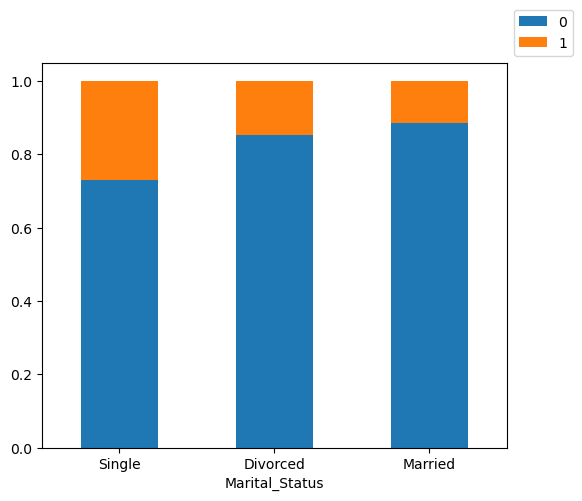

In [82]:
stacked_barplot(df, "Marital_Status", "Churn")

Among single customers, there is a relatively high churn rate, with 947 out of 3,520 customers churning, resulting in approximately 27% churn. Married customers have a significantly lower churn rate, with 673 out of 5,860 customers churning, equating to around 11.5%. Divorced customers fall in between, with 244 out of 1,668 customers churning, leading to a churn rate of about 14.6%. **Overall, single customers exhibit the highest churn rate, while married customers are the most stable group.**

### 11. Churn vs rev_per_month

Churn             0     1    All
rev_per_month                   
All            8694  1775  10469
3.0            1447   299   1746
2.0            1315   270   1585
5.0            1139   198   1337
6.0             899   186   1085
4.0            1048   170   1218
7.0             602   152    754
8.0             523   120    643
9.0             465    99    564
10.0            341    72    413
11.0            215    63    278
1.0             354    48    402
12.0            129    37    166
13.0             76    17     93
15.0             15     9     24
14.0             40     8     48
118.0             1     3      4
102.0             5     3      8
19.0              0     2      2
136.0             2     2      4
134.0             0     2      2
129.0             2     2      4
124.0             3     2      5
138.0             2     1      3
127.0             2     1      3
110.0             2     1      3
117.0             2     1      3
114.0             1     1      2
113.0     

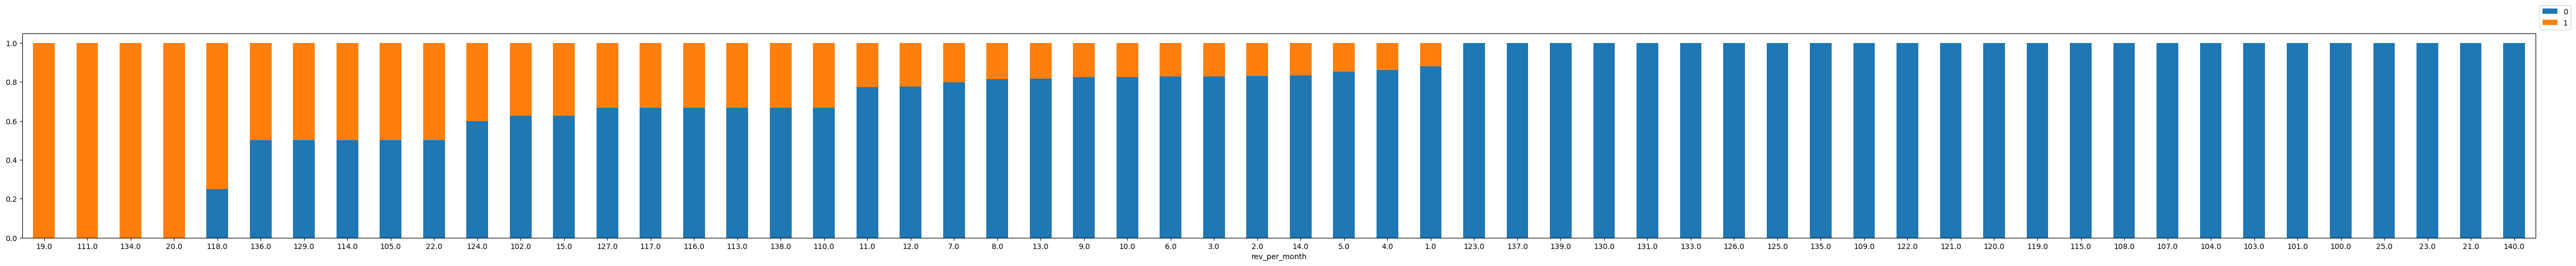

In [83]:
stacked_barplot(df, "rev_per_month", "Churn")

The churn data segmented by revenue per month in INR shows that the majority of customers are concentrated in the lower revenue brackets, specifically between ₹1,000 and ₹10,000 per month. In these segments, the churn rate is moderate, with the highest churn observed in the ₹3,000, ₹2,000, and ₹5,000 per month categories. For example, in the ₹3,000 per month segment, 299 out of 1,746 customers have churned, representing approximately 17.1% churn. Similarly, in the ₹2,000 per month group, 270 out of 1,585 customers have churned, accounting for about 17.0% churn. As the monthly revenue increases beyond ₹10,000, the number of customers drops significantly, and churn becomes less frequent. Outlier revenue values, such as ₹118,000, ₹102,000, ₹140,000, and others, have very few customers, with minimal churn observed. Overall, lower revenue segments exhibit higher churn rates, while higher revenue segments have lower churn and fewer customers.

### 12. Churn vs Complain_ly

Churn           0     1    All
Complain_ly                   
All          9065  1838  10903
1.0          2123   988   3111
0.0          6942   850   7792


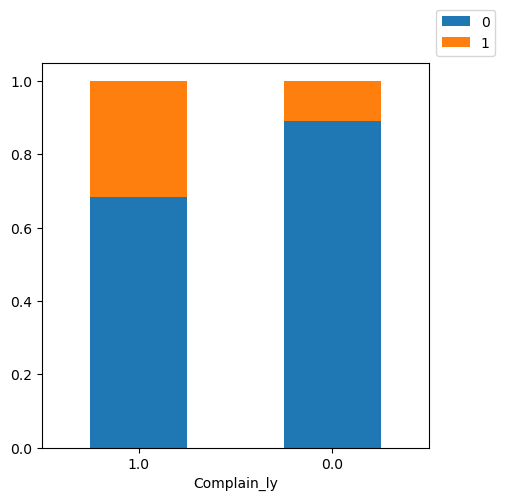

In [84]:
stacked_barplot(df, "Complain_ly", "Churn")

The churn data segmented by the number of complaints lodged last year indicates that customers who lodged at least one complaint have a significantly higher churn rate compared to those who did not. Specifically, among the 3,111 customers who lodged complaints, 988 (approximately 31.8%) have churned. In contrast, only 850 out of 7,792 customers who did not lodge any complaints have churned, representing a much lower churn rate of about 10.9%. **This suggests a strong correlation between customer complaints and churn, with dissatisfied customers being more likely to leave.**

### 13. Churn vs rev_growth_yoy

Churn              0     1    All
rev_growth_yoy                   
All             9361  1896  11257
13.0            1157   270   1427
14.0            1283   241   1524
12.0             985   225   1210
15.0            1105   178   1283
16.0             782   167    949
17.0             574   130    704
18.0             593   115    708
11.0             418   105    523
19.0             533    86    619
20.0             486    76    562
23.0             275    70    345
22.0             337    66    403
21.0             378    55    433
24.0             177    52    229
25.0             145    43    188
26.0              89     9     98
27.0              29     6     35
28.0              13     1     14
4.0                2     1      3


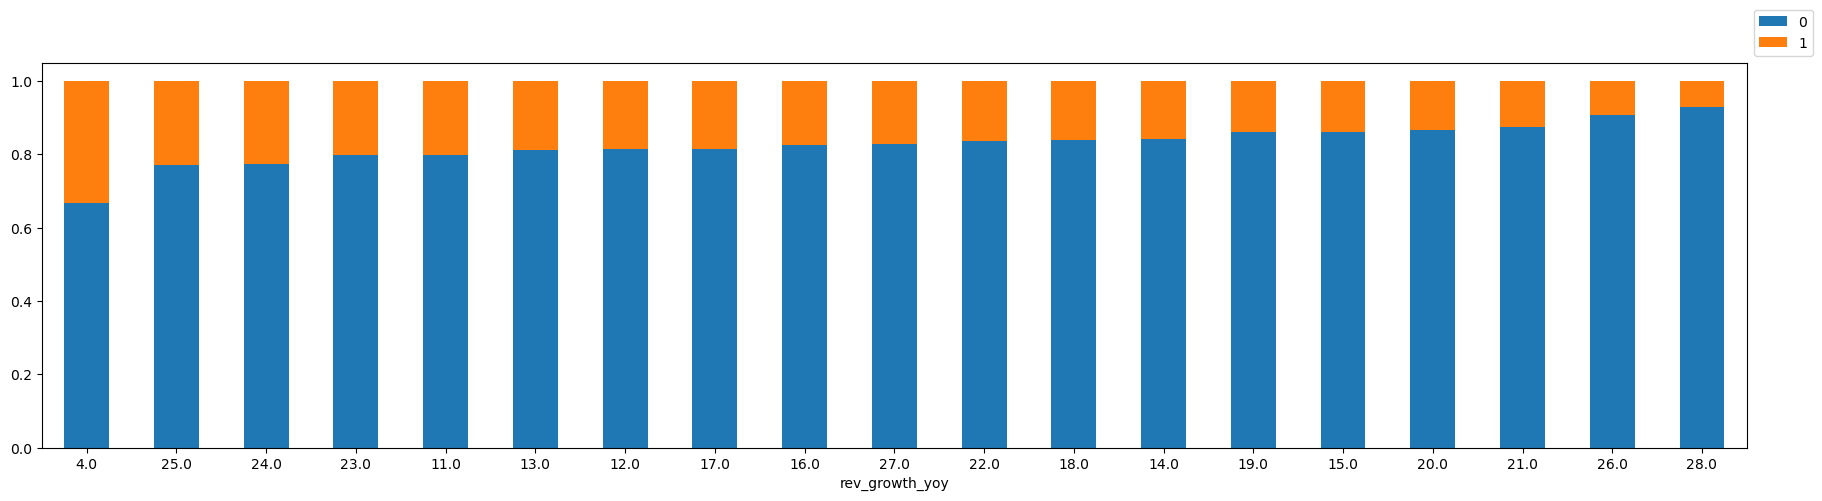

In [85]:
stacked_barplot(df, "rev_growth_yoy", "Churn")

The churn data segmented by year-over-year revenue growth indicates that customers with higher revenue growth percentages tend to have lower churn rates. Specifically, customers in the revenue growth bands of 13% to 15% have higher churn numbers (270, 241, and 225 respectively) but also represent a larger customer base. As the growth percentage increases to 16% and beyond, both the churn and customer base gradually decrease. Interestingly, customers with very low or very high revenue growth percentages, such as 4% or 28%, show negligible churn, possibly due to a smaller customer base in these bands. This suggests that moderate revenue growth is more common and may correlate with higher customer turnover.

### 14. Churn vs coupon_used_for_payment

Churn                       0     1    All
coupon_used_for_payment                   
All                      9361  1896  11257
1.0                      3613   760   4373
2.0                      2210   446   2656
0.0                      1776   374   2150
3.0                       602    96    698
4.0                       362    62    424
5.0                       238    46    284
6.0                       198    36    234
7.0                       148    36    184
8.0                        68    20     88
10.0                       28     6     34
11.0                       26     4     30
9.0                        30     4     34
12.0                       24     2     26
15.0                        2     2      4
16.0                        2     2      4
13.0                       22     0     22
14.0                       12     0     12


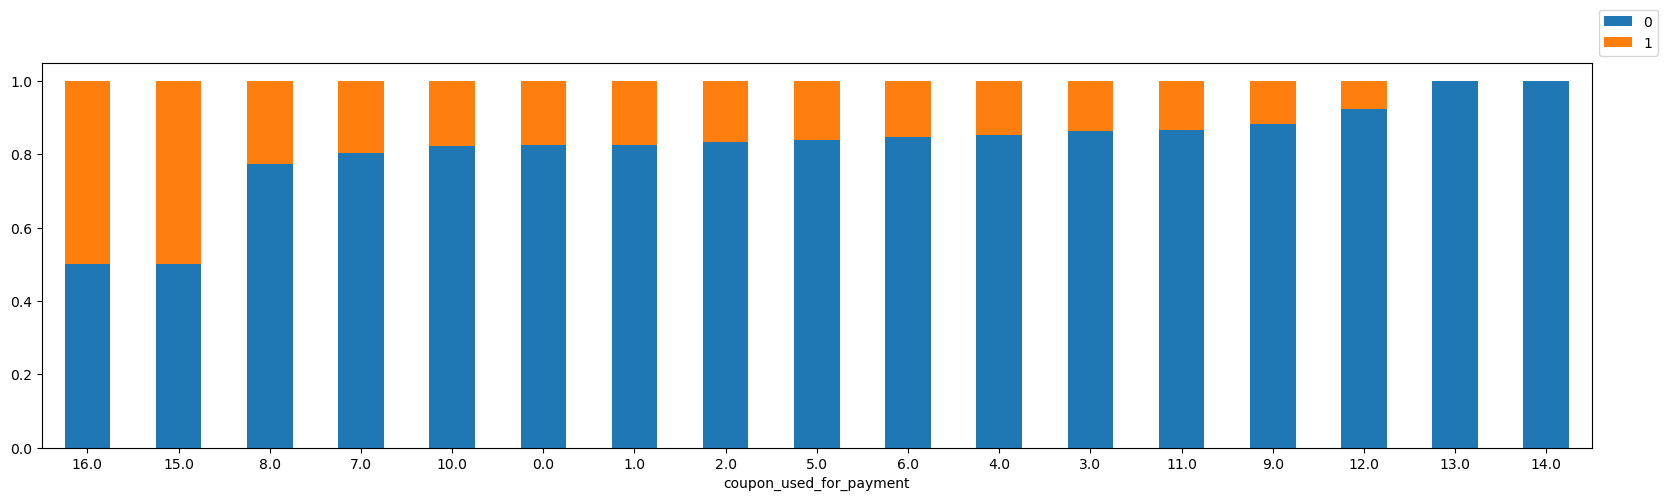

In [86]:
stacked_barplot(df, "coupon_used_for_payment", "Churn")

Customers who used 1 to 2 coupons for payment have the highest representation in both the churned (760 and 446 respectively) and non-churned (3613 and 2210 respectively) categories. As the number of coupons used increases beyond 2, both the customer base and churn rates significantly decrease, with very few customers using more than 8 coupons, and these customers show minimal churn. Only two customers have used coupons the highest number of times (15 or 16) for payment, and both have churned.

### 15. Churn vs Day_Since_CC_connect

Churn                    0     1    All
Day_Since_CC_connect                   
All                   9070  1832  10902
1.0                    880   376   1256
0.0                    638   326    964
3.0                   1551   265   1816
2.0                   1339   235   1574
8.0                   1012   157   1169
7.0                    776   135    911
4.0                    777   116    893
9.0                    558    64    622
5.0                    424    55    479
10.0                   305    34    339
6.0                    197    32    229
11.0                   167    16    183
14.0                    66     8     74
15.0                    30     7     37
12.0                   143     3    146
47.0                     0     2      2
46.0                     0     1      1
16.0                    26     0     26
17.0                    34     0     34
18.0                    26     0     26
30.0                     2     0      2
31.0                     2     0      2


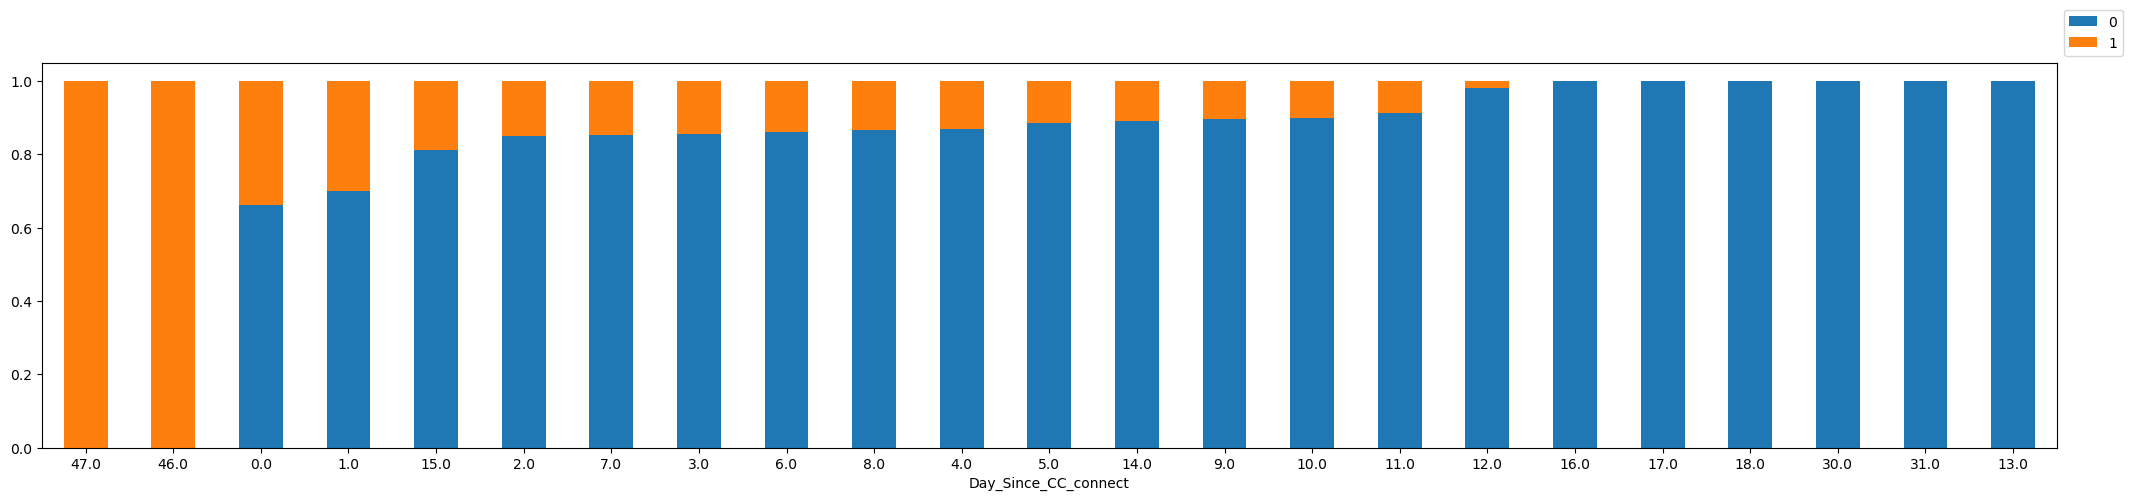

In [87]:
stacked_barplot(df, "Day_Since_CC_connect", "Churn")

As the days since the last call center contact increase, churn rates generally decrease. Interestingly, there are rare instances of churn even among customers who have not contacted the call center for extended periods (e.g., 47 or 46 days). This suggests that while recent interaction with the call center may be associated with higher churn, prolonged periods without contact do not necessarily guarantee retention.

### 16. Churn vs cashback

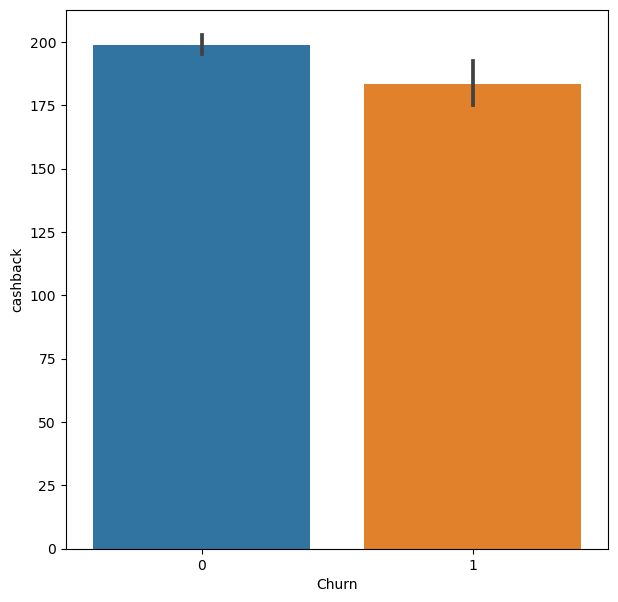

In [88]:
plt.figure(figsize=(7, 7))
sns.barplot(y="cashback", x="Churn", data=df)
plt.show()

There is higher chance of receiving cashback.

### 17. Churn vs Login_device

Churn            0     1    All
Login_device                   
All           9185  1854  11039
Mobile        6310  1172   7482
Computer      2421   597   3018
Other          454    85    539


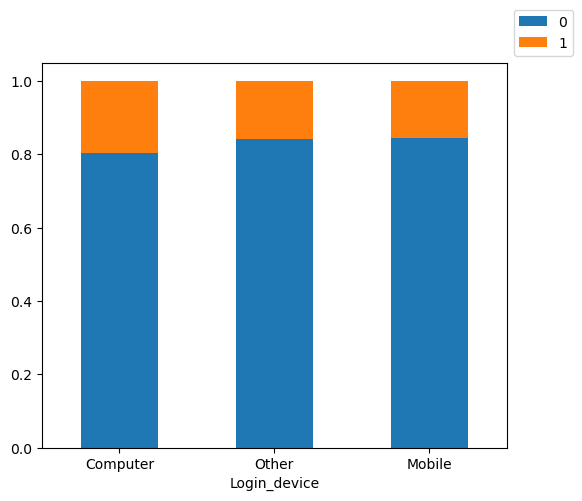

In [89]:
stacked_barplot(df, "Login_device", "Churn")

The data indicates that a majority of customers who churned were primarily using mobile devices for login, with 1,172 out of 1,854 churned users accessing services via mobile. In contrast, users logging in via **computers also show a highest significant churn rate**, with 597 out of 3,018 users. The "Other" category, which includes less common devices, has the lowest churn numbers. This suggests that while mobile users make up the largest segment of the customer base, they also represent a substantial portion of those who leave, pointing to a potential area for targeted retention efforts.

In [90]:
# statistical summary of customers who have churned

df[df["Churn"] == 1].describe().T

count          mean          std       min  \
AccountID                1896.0  25560.575949  3257.048972  20000.00   
Churn                    1896.0      1.000000     0.000000      1.00   
Tenure                   1848.0      4.327381    12.071994      0.00   
CC_Contacted_LY          1878.0     19.285410     8.906039      4.00   
rev_per_month            1775.0      6.956620    13.369809      1.00   
rev_growth_yoy           1896.0     16.077532     3.862519      4.00   
coupon_used_for_payment  1896.0      1.725738     1.908374      0.00   
Day_Since_CC_connect     1832.0      3.415939     3.620369      0.00   
cashback                 1811.0    183.356924   193.446343    110.09   

                              25%       50%       75%      max  
AccountID                22812.75  25625.50  28438.25  31251.0  
Churn                        1.00      1.00      1.00      1.0  
Tenure                       0.00      1.00      3.00     99.0  
CC_Contacted_LY             12.00     17.00     26.00     43.0  
rev_per_month                3.00      5.00      8.00    138.0  
rev_growth_yoy              13.00     15.00     18.00     28.0  
coupon_used_for_payment      1.00      1.00      2.00     16.0  
Day_Since_CC_connect         1.00      2.00      6.00     47.0  
cashback                   134.79    152.72    178.79   1997.0

In [91]:
# statistical summary of customers who have churned

df[df["Churn"] == 0].describe().T

count          mean          std      min  \
AccountID                9364.0  25643.455575  3249.320574  20026.0   
Churn                    9364.0      0.000000     0.000000      0.0   
Tenure                   9194.0     12.371329    12.614520      0.0   
CC_Contacted_LY          9280.0     17.580065     8.815312      5.0   
rev_per_month            8694.0      6.241316    11.586096      1.0   
rev_growth_yoy           9361.0     16.216857     3.735911      4.0   
coupon_used_for_payment  9361.0      1.803760     1.981552      0.0   
Day_Since_CC_connect     9070.0      4.879052     3.664481      0.0   
cashback                 8976.0    198.834930   175.423298      0.0   

                               25%       50%       75%      max  
AccountID                22834.250  25642.50  28450.75  31259.0  
Churn                        0.000      0.00      0.00      0.0  
Tenure                       5.000     10.00     17.00     99.0  
CC_Contacted_LY             11.000     15.00     22.00    132.0  
rev_per_month                3.000      5.00      7.00    140.0  
rev_growth_yoy              13.000     15.00     19.00     28.0  
coupon_used_for_payment      1.000      1.00      2.00     16.0  
Day_Since_CC_connect         2.000      4.00      8.00     31.0  
cashback                   148.735    168.29    204.69   1992.0

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11042 non-null  float64
 3   City_Tier                11148 non-null  object 
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  object 
 8   Account_user_count       10816 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  object 
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            10469 non-null  float64
 13  Complain_ly              10903 non-null  object 
 14  rev_growth_yoy        

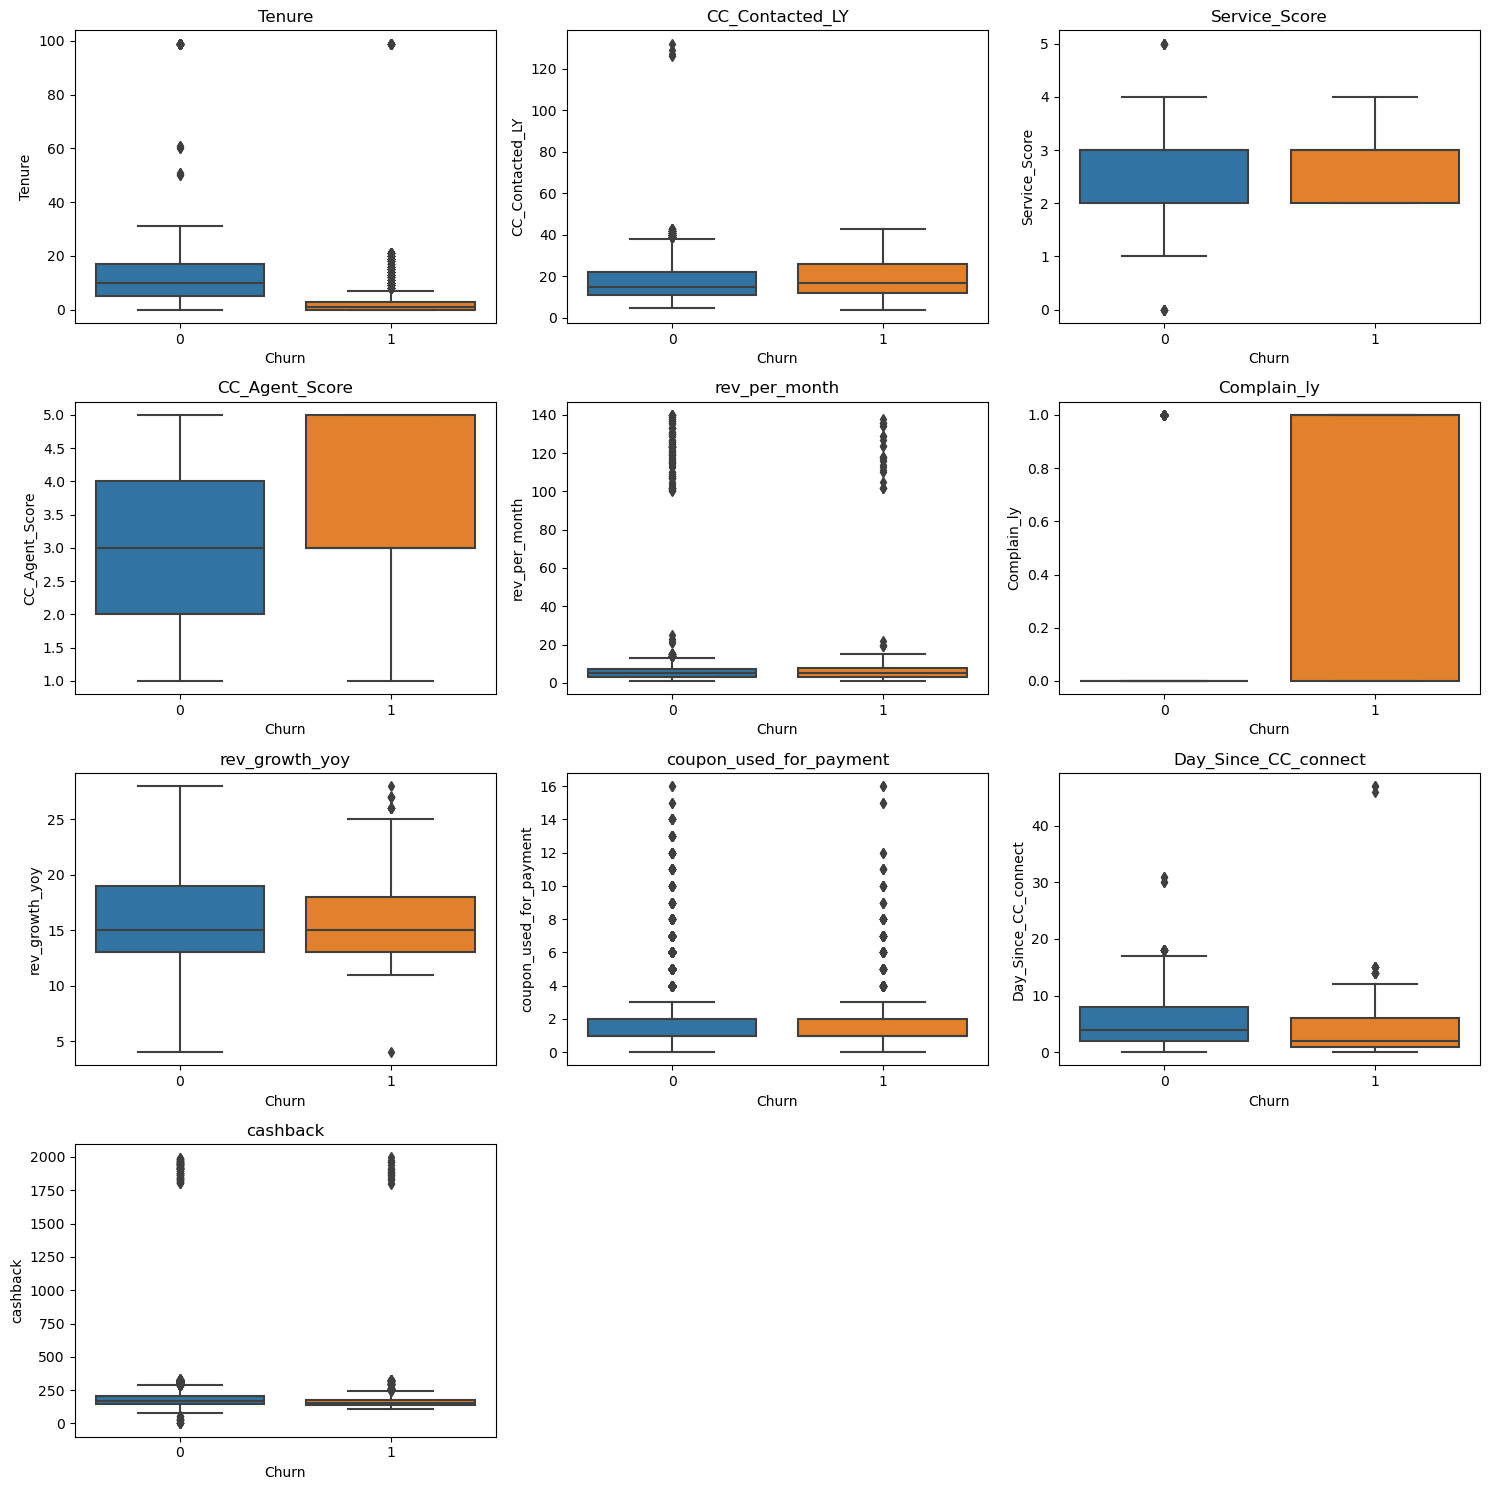

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the list of continuous variables
cont_col = [
    "Tenure",
    "CC_Contacted_LY",
    "Service_Score",
    "CC_Agent_Score",
    "rev_per_month",
    "Complain_ly",
    "rev_growth_yoy",
    "coupon_used_for_payment",
    "Day_Since_CC_connect",
    "cashback"
]

plt.figure(figsize=(15, 15))

for i, variable in enumerate(cont_col):
    plt.subplot(4, 3, i + 1)  
    sns.boxplot(x='Churn', y=variable, data=df)
    plt.title(variable)

plt.tight_layout()
plt.show()

1. **Tenure**:
   - Customers who have churned generally have a lower tenure compared to those who have not churned. This suggests that newer customers might be more likely to churn.

2. **City_Tier**:
   -  Higher churn rates are observed in customers from City Tiers 1 and 3. Tier 2 cities have a much lower churn rate, indicating possible differences in service experience or customer expectations across tiers.

3. **CC_Contacted_LY**:
   -  Customers who churned have more frequent contacts with customer care over the last year. This could indicate that frequent issues or complaints are associated with higher churn rates.

4. **Payment**:
   -  Customers who used payment methods like E-wallets and Cash on Delivery show higher churn rates compared to those using Debit or Credit Cards. This may reflect differences in payment preferences or issues related to payment methods.

5. **Gender**:
   - Males have a higher churn rate compared to females. This suggests gender-based differences in retention.

6. **Service_Score**:
   -  Lower service scores are associated with churned customers, indicating that dissatisfaction with service quality is a significant factor in customer attrition.

7. **Account_user_count**:
   -  Customers with fewer accounts (e.g., 1 or 2) show higher churn rates. This could imply that customers with more accounts are more engaged and less likely to churn.

8. **Account_segment**:
   - Higher churn rates are observed in the 'Regular' and 'Super' account segments. Premium segments like 'HNI' and 'Super Plus' exhibit lower churn, suggesting that more valuable or engaged customers are retained better.

9. **CC_Agent_Score**:
   -  Customers with lower scores from customer care agents have a higher churn rate, highlighting the impact of agent performance on customer retention.

10. **Marital_Status**:
    - Single customers have a higher churn rate compared to married or divorced customers. This may reflect differing levels of engagement or satisfaction based on marital status.

11. **rev_per_month**:
    -  Customers with varying revenue per month show higher churn rates. Extremely high or low revenue values might be associated with churn, indicating that consistent spending could be related to retention.

12. **Complain_ly**:
    -  Higher numbers of complaints are linked with higher churn rates, reinforcing the idea that more frequent complaints are a predictor of churn.

13. **rev_growth_yoy**:
    -  Lower year-over-year revenue growth is associated with churn. Customers experiencing stagnating or declining revenue growth are more likely to churn.

14. **coupon_used_for_payment**:
    - Customers who use coupons for payment more frequently have higher churn rates. This may suggest a correlation between reliance on discounts and lower customer loyalty.

15. **Day_Since_CC_connect**:
    -  A higher number of days since the last connection with customer care is seen in churned customers, indicating possible disengagement or unresolved issues.

16. **Cashback**:
    - Greater variability in cashback amounts is observed for churned customers. This variability might reflect differing levels of satisfaction or perceived value.

17. **Login_device**:
    - Customers using mobile devices for login have a higher churn rate compared to those using computers. This may reflect differences in user experience or engagement between devices.

### Removal of unwanted variables

In [94]:
# Making a copy of the dataset before removing any variable

data = df.copy()

# Dropping AccountID column as it an all unique feature

df.drop("AccountID", axis=1, inplace=True)

In [95]:
df.columns

Index(['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Payment', 'Gender',
       'Service_Score', 'Account_user_count', 'account_segment',
       'CC_Agent_Score', 'Marital_Status', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback', 'Login_device'],
      dtype='object')

Removing the `AccountID` column from the dataset is appropriate since it contains unique values for each record and does not contribute to meaningful analysis or prediction. Unique identifiers like `AccountID` are primarily used to distinguish individual records but do not provide insights into patterns or relationships within the data. By excluding this column, we can streamline the dataset, reduce computational complexity, and focus on variables that have actual predictive value or informative content.

In [96]:
df.shape

(11260, 18)

In [97]:
# Defining a method to plot distributions with respect to the target variable


def distribution_plot_wrt_target(data, predictor, target):
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target, for target = " + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]], x=predictor, kde=True, ax=axs[0, 0]
    )

    axs[0, 1].set_title("Distribution of target, for target = " + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]], x=predictor, kde=True, ax=axs[0, 1]
    )

    axs[1, 0].set_title("Boxplot (with outliers) w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0])

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 1], showfliers=False)

    plt.tight_layout()
    plt.show()

### 1. Churn vs Tenure

/Users/ishashukla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ishashukla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


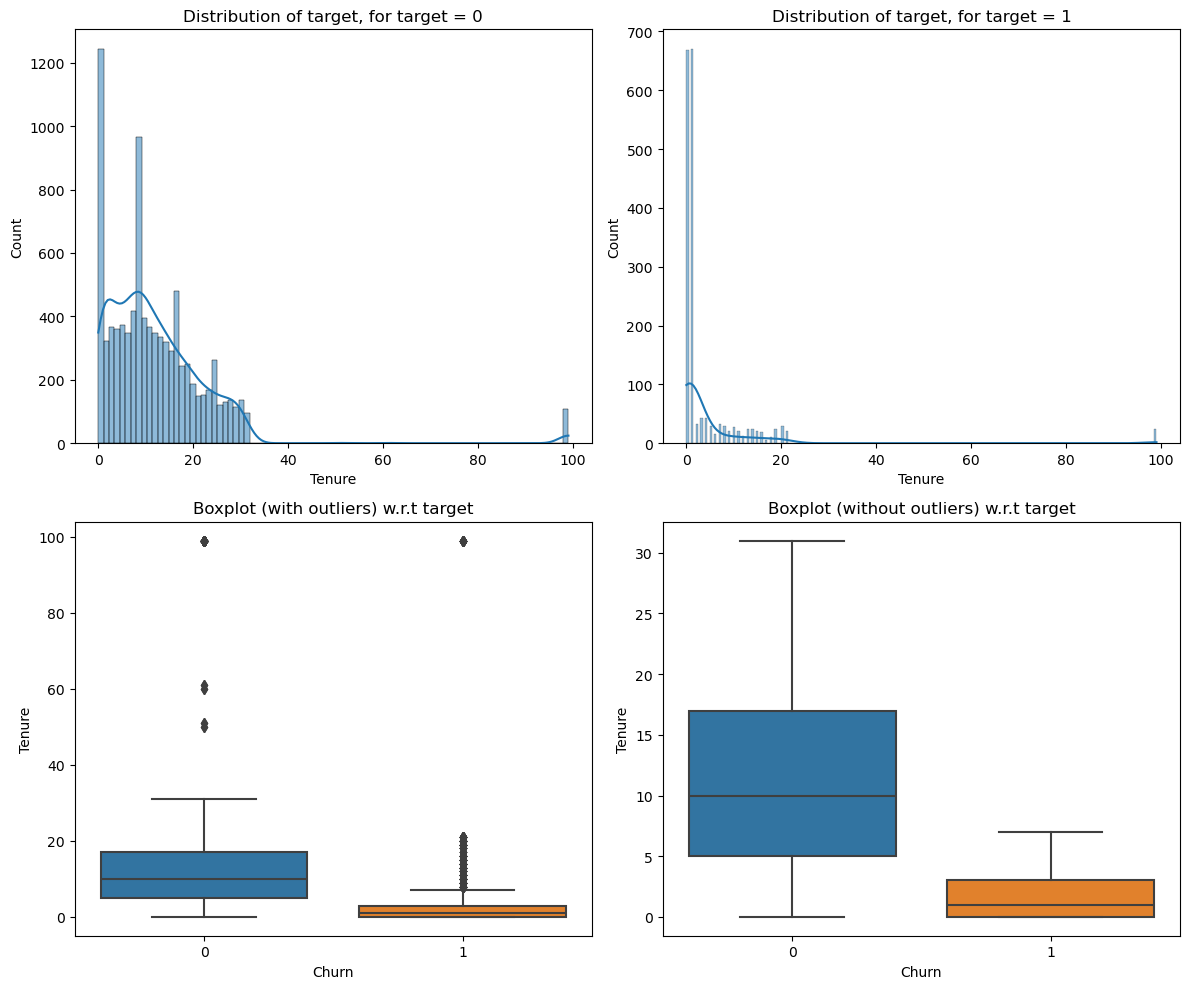

In [98]:
distribution_plot_wrt_target(df, "Tenure", "Churn")

### 2. Churn vs City_Tier

/Users/ishashukla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ishashukla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


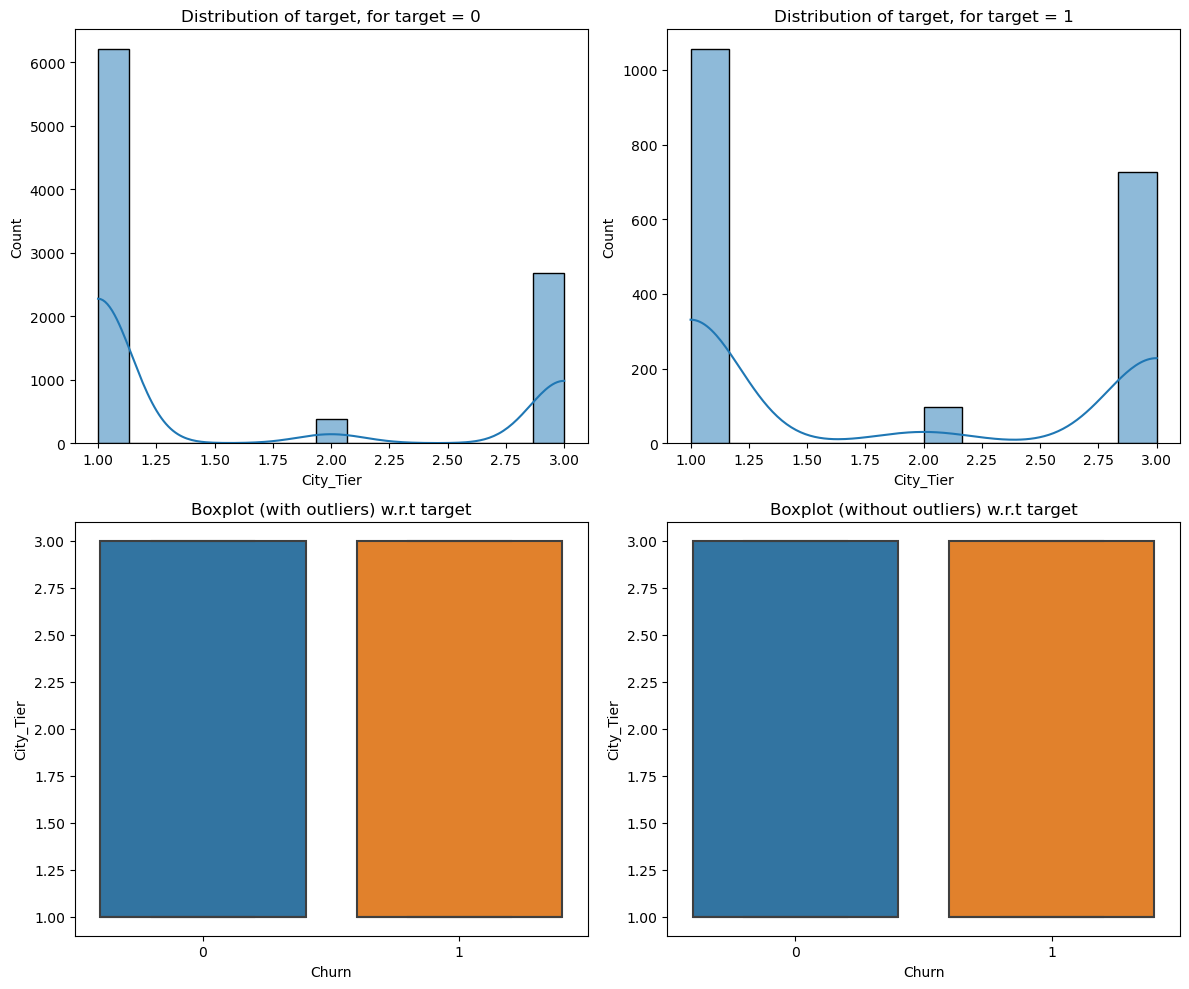

In [99]:
distribution_plot_wrt_target(df, "City_Tier", "Churn")

### 3. Churn vs CC_Contacted_LY

/Users/ishashukla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ishashukla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


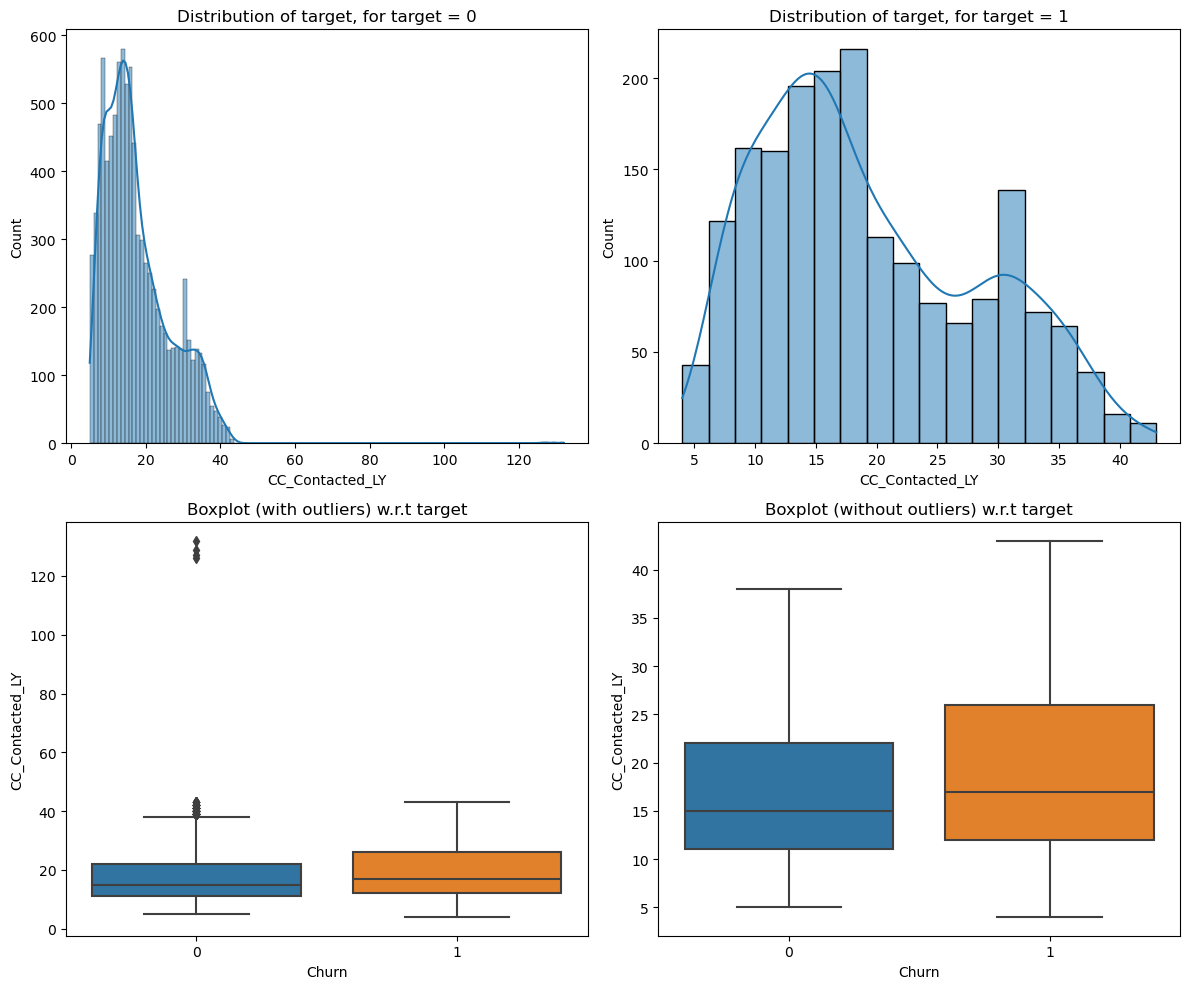

In [100]:
distribution_plot_wrt_target(df, "CC_Contacted_LY", "Churn")

### 4. Churn vs CC_Contacted_LY

/Users/ishashukla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ishashukla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


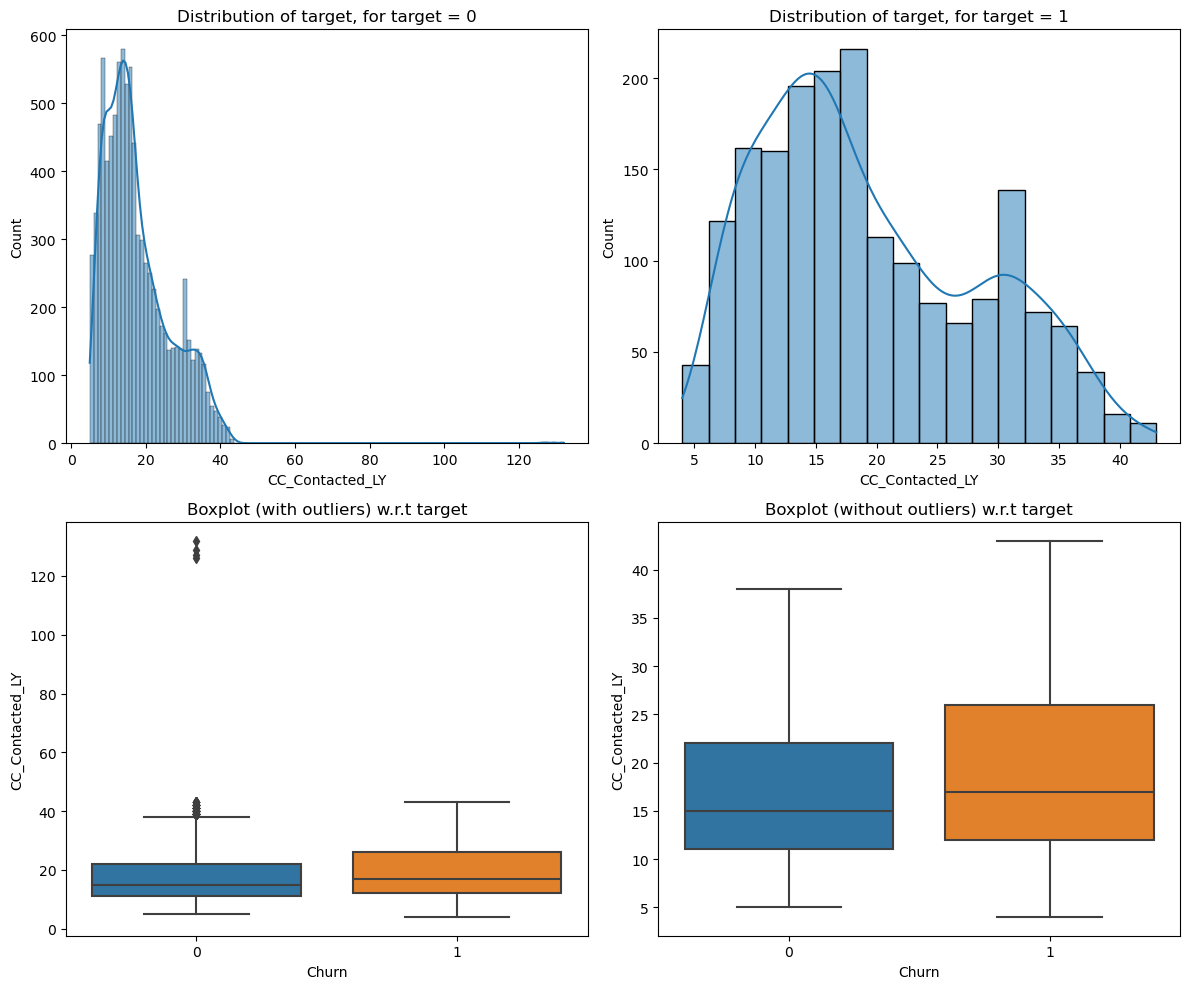

In [101]:
distribution_plot_wrt_target(df, "CC_Contacted_LY", "Churn")

### 5. Churn vs Service_Score

/Users/ishashukla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ishashukla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


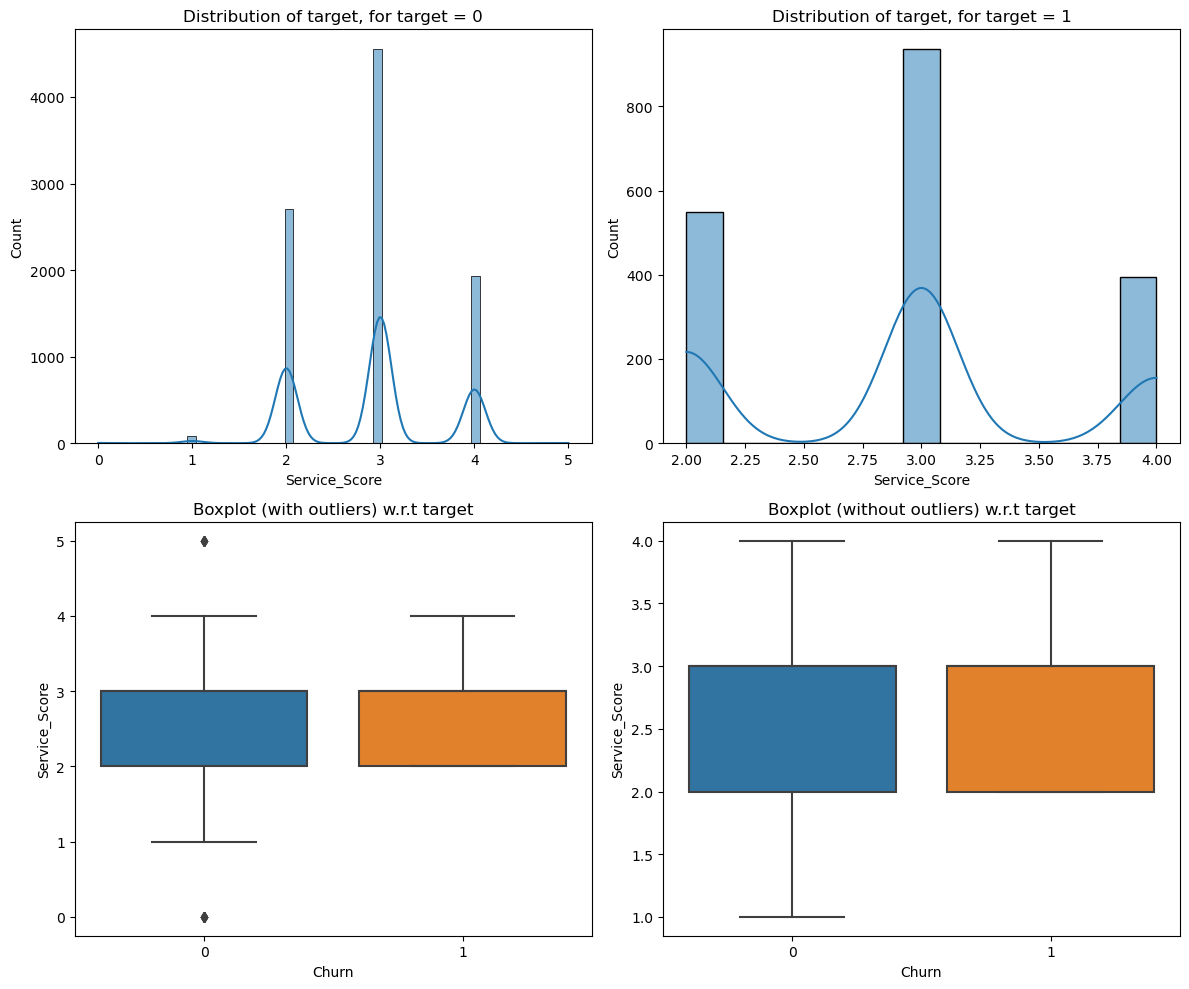

In [102]:
distribution_plot_wrt_target(df, "Service_Score", "Churn")

### 6. Churn vs Account_user_count

/Users/ishashukla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ishashukla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


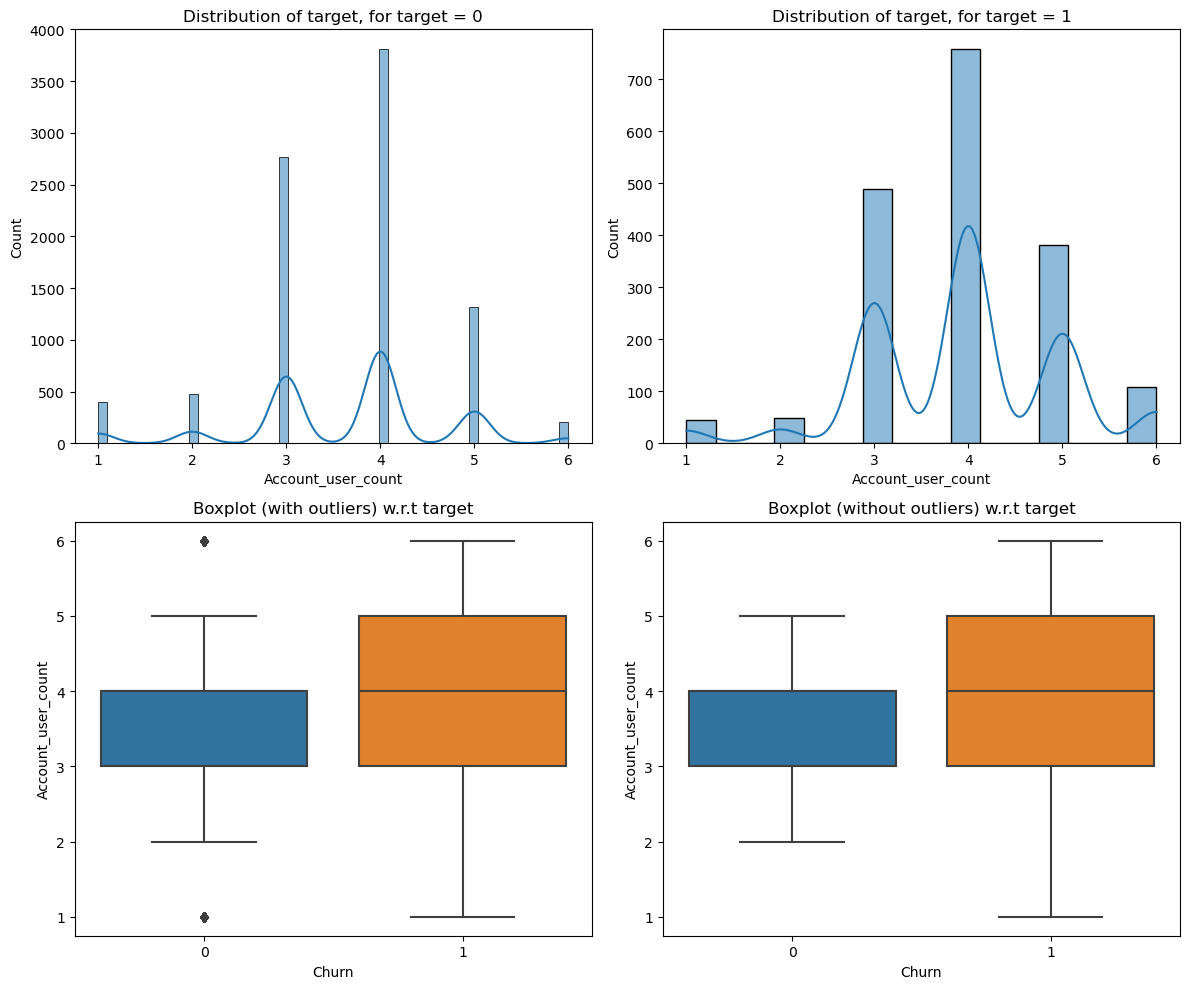

In [103]:
distribution_plot_wrt_target(df, "Account_user_count", "Churn")

### 7. Churn vs CC_Agent_Score

/Users/ishashukla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ishashukla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


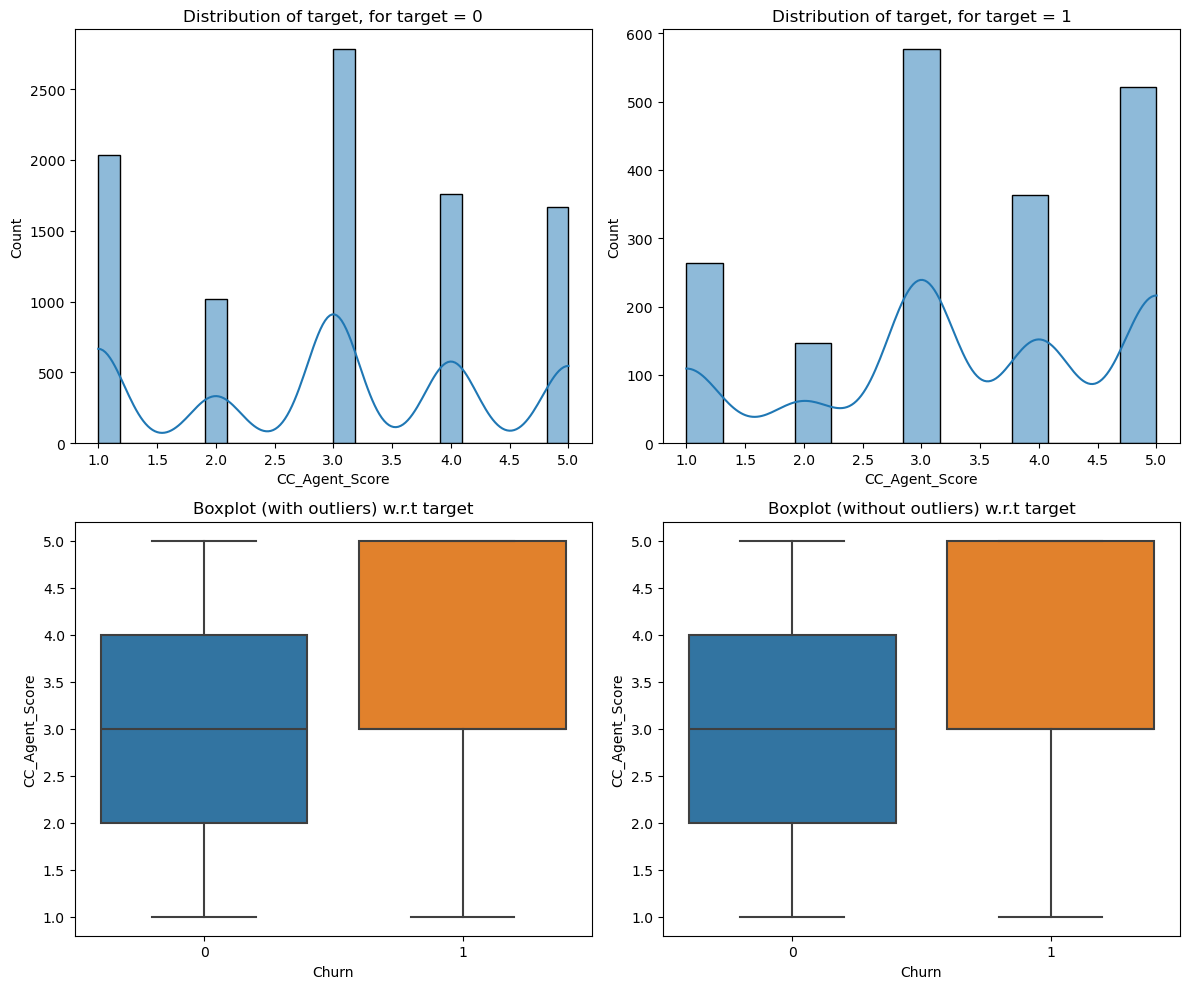

In [104]:
distribution_plot_wrt_target(df, "CC_Agent_Score", "Churn")

### 8. Churn vs rev_per_month

/Users/ishashukla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ishashukla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


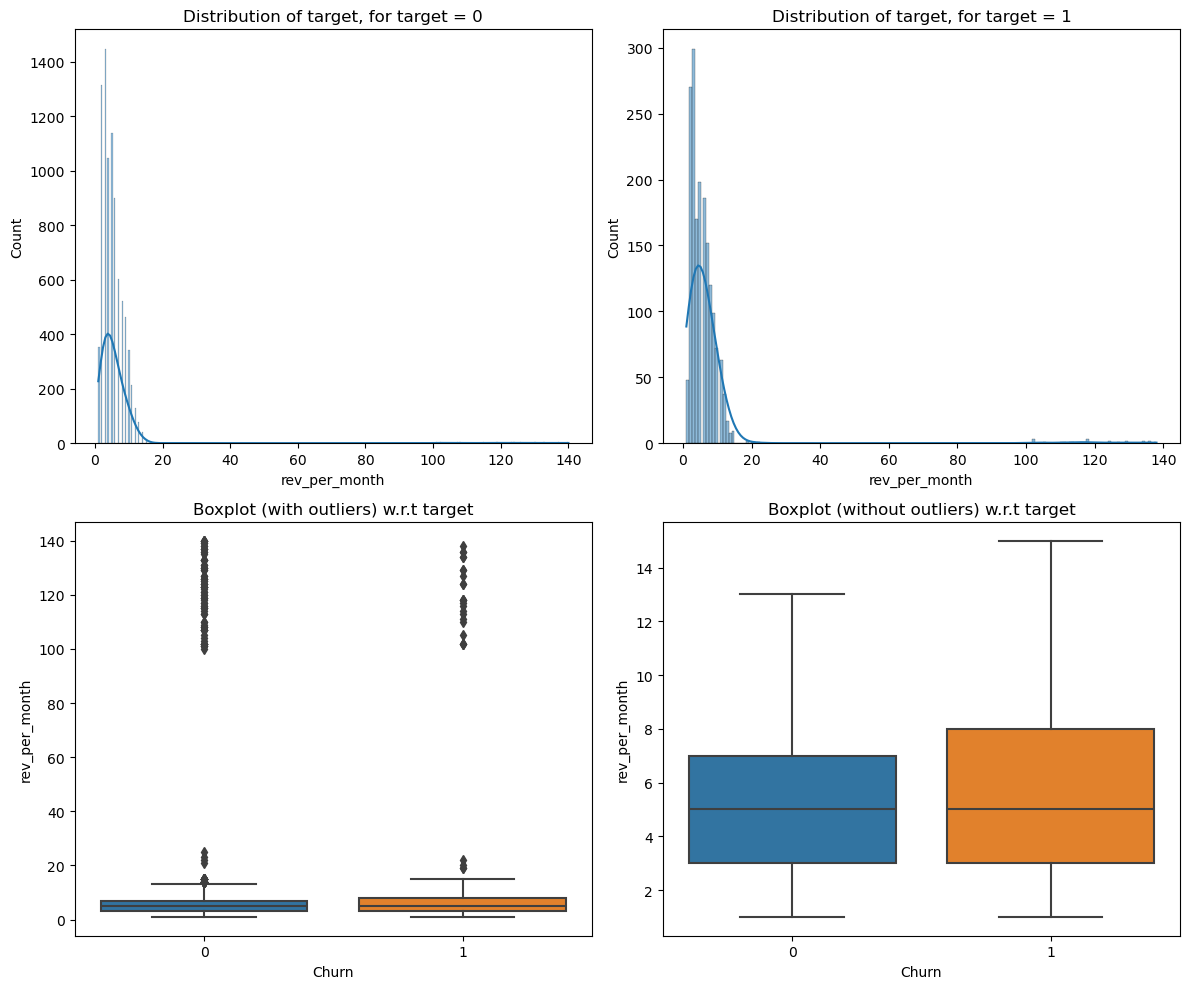

In [105]:
distribution_plot_wrt_target(df, "rev_per_month", "Churn")

### 9. Churn vs Complain_ly

/Users/ishashukla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ishashukla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


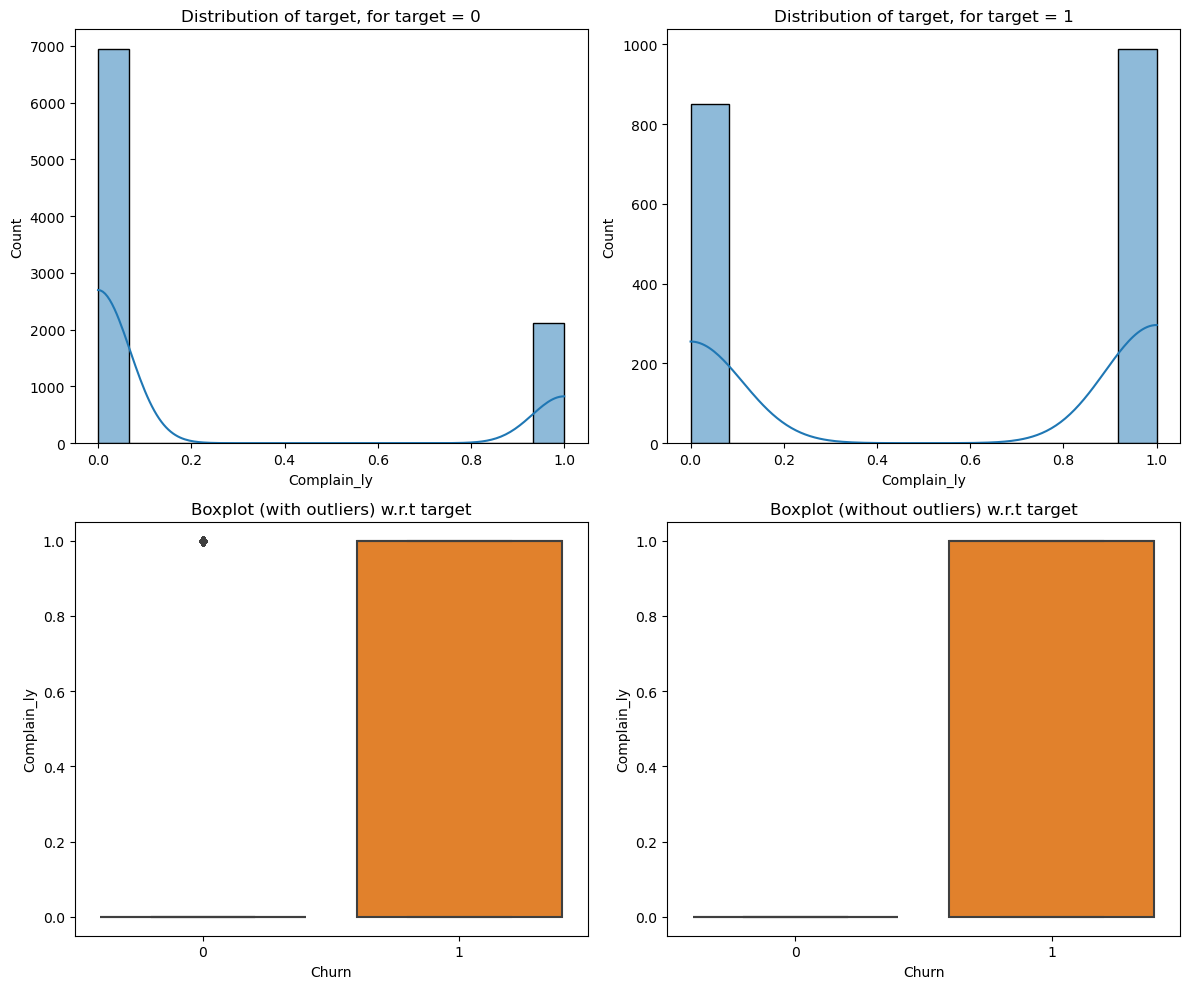

In [106]:
distribution_plot_wrt_target(df, "Complain_ly", "Churn")

### 10. Churn vs rev_growth_yoy

/Users/ishashukla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ishashukla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


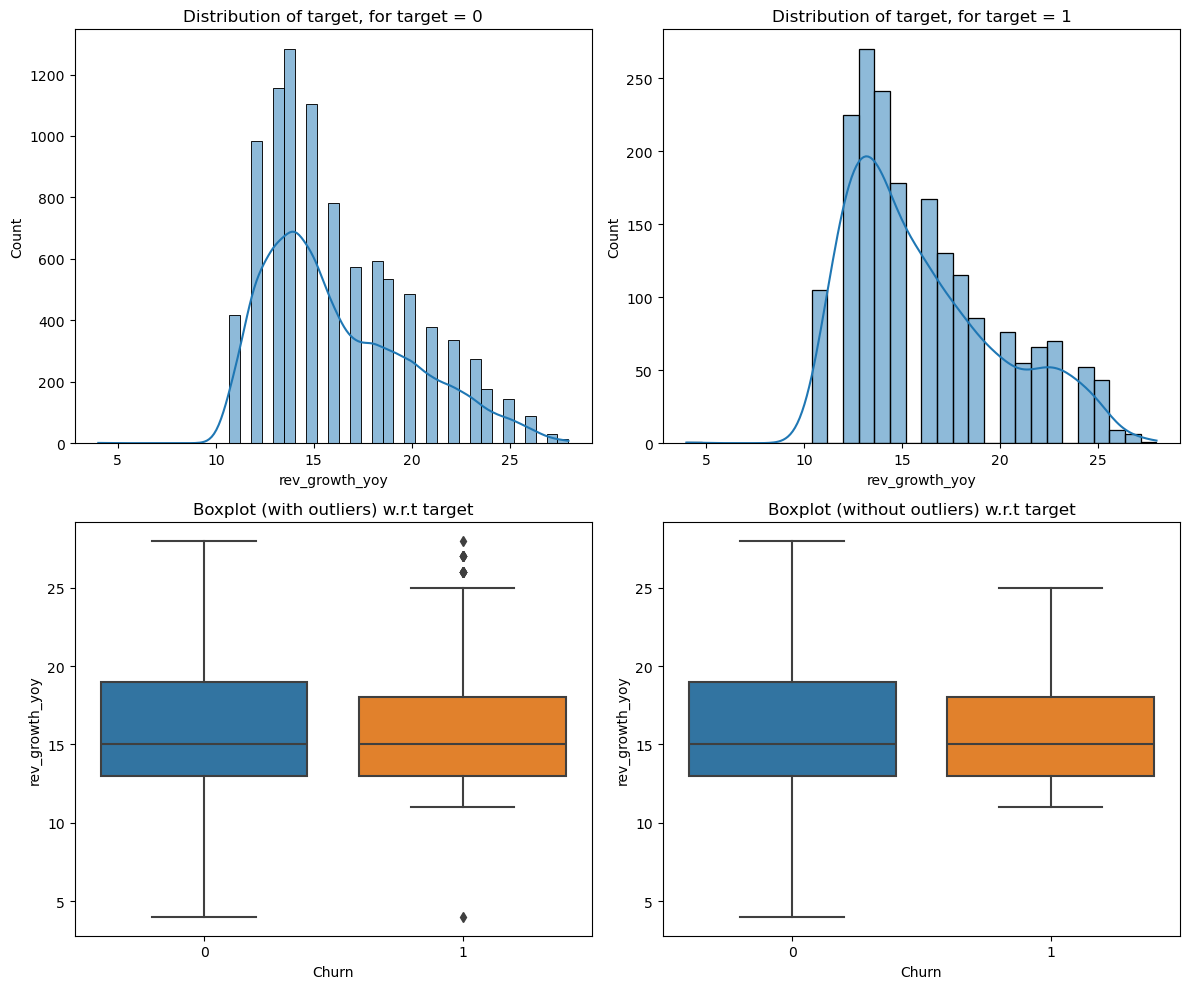

In [107]:
distribution_plot_wrt_target(df, "rev_growth_yoy", "Churn")

### 11. Churn vs coupon_used_for_payment

/Users/ishashukla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ishashukla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


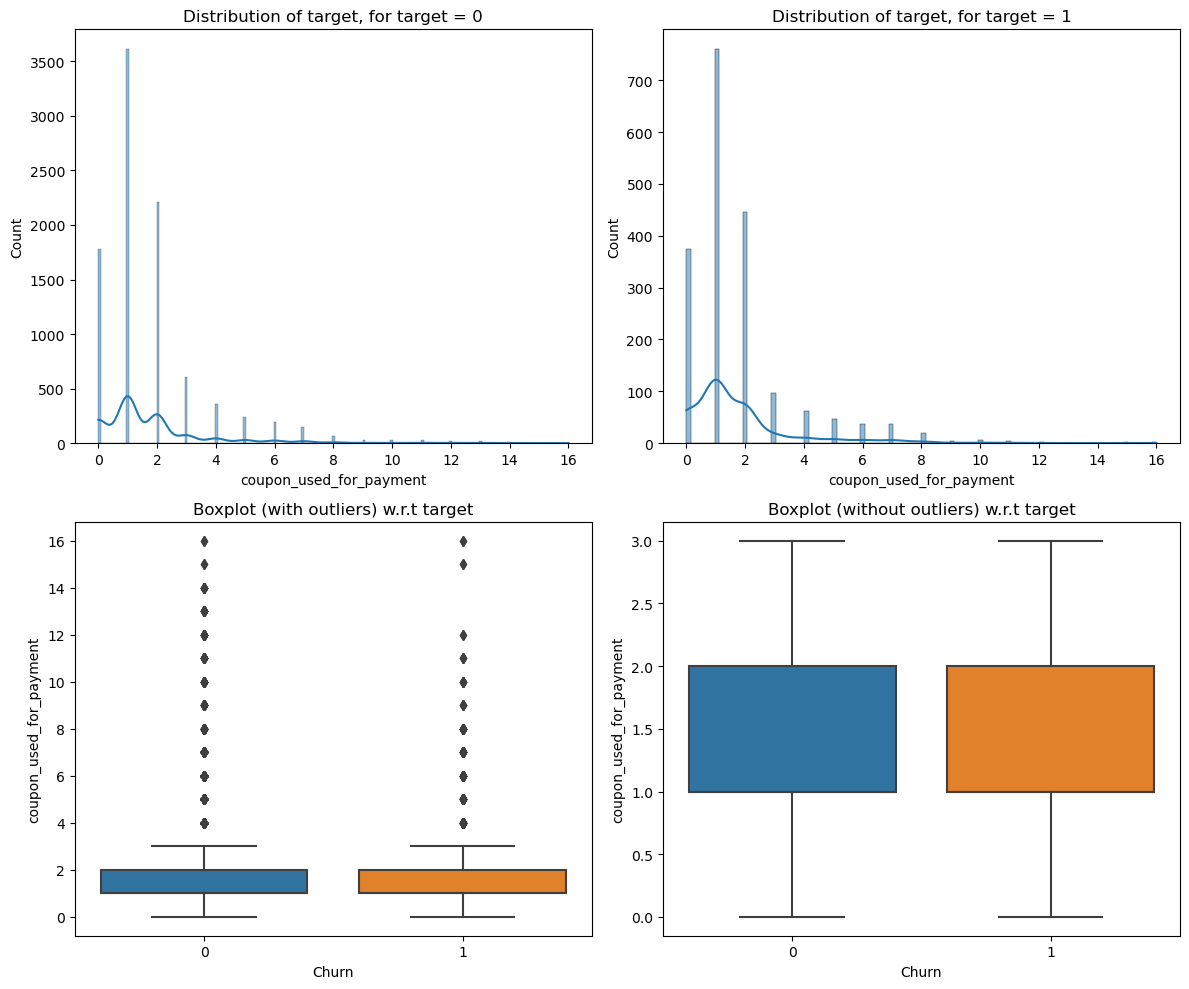

In [108]:
distribution_plot_wrt_target(df, "coupon_used_for_payment", "Churn")

### 12. Churn vs Day_Since_CC_connect

/Users/ishashukla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ishashukla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


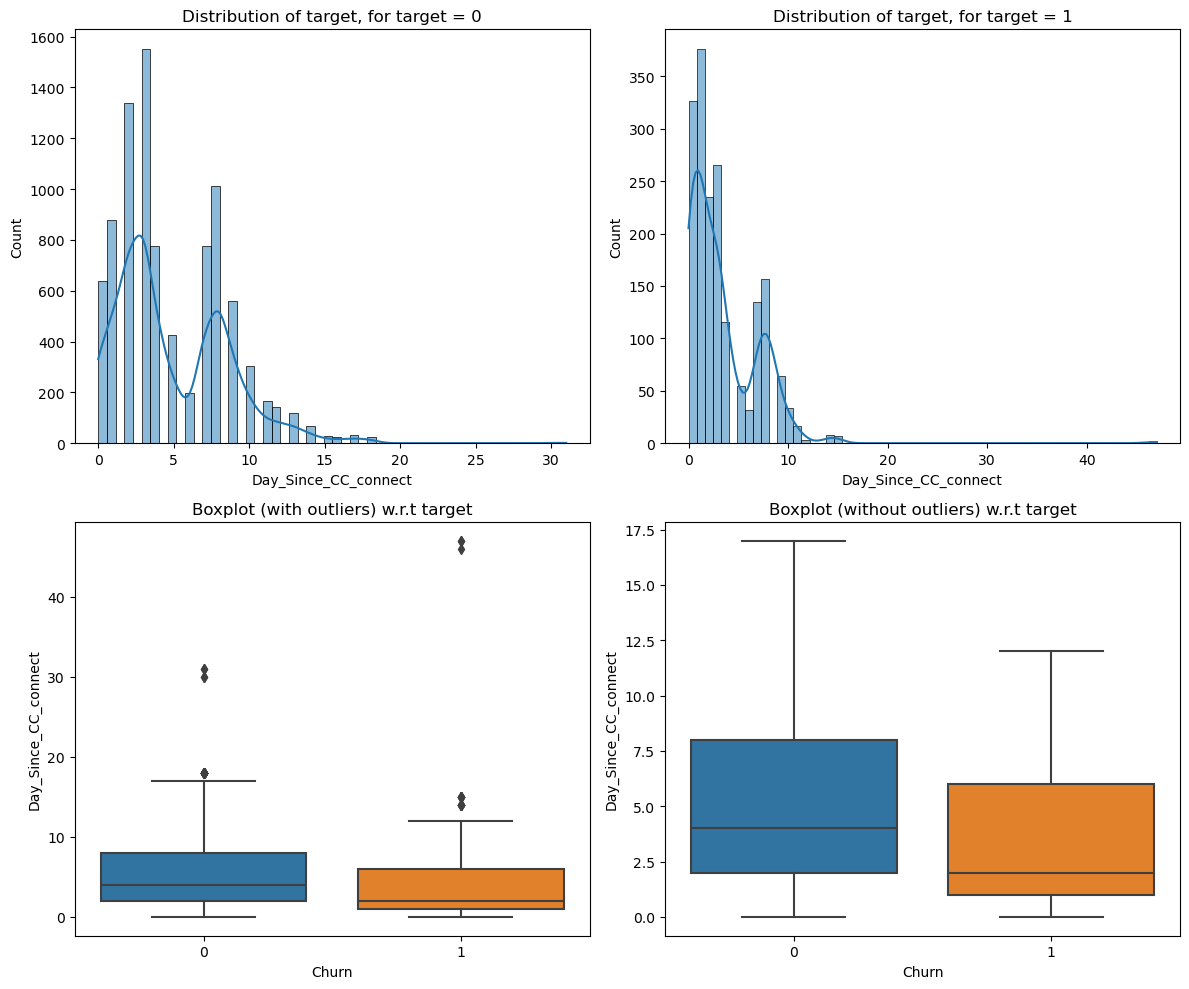

In [109]:
distribution_plot_wrt_target(df, "Day_Since_CC_connect", "Churn")

### 13. Churn vs cashback

/Users/ishashukla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ishashukla/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


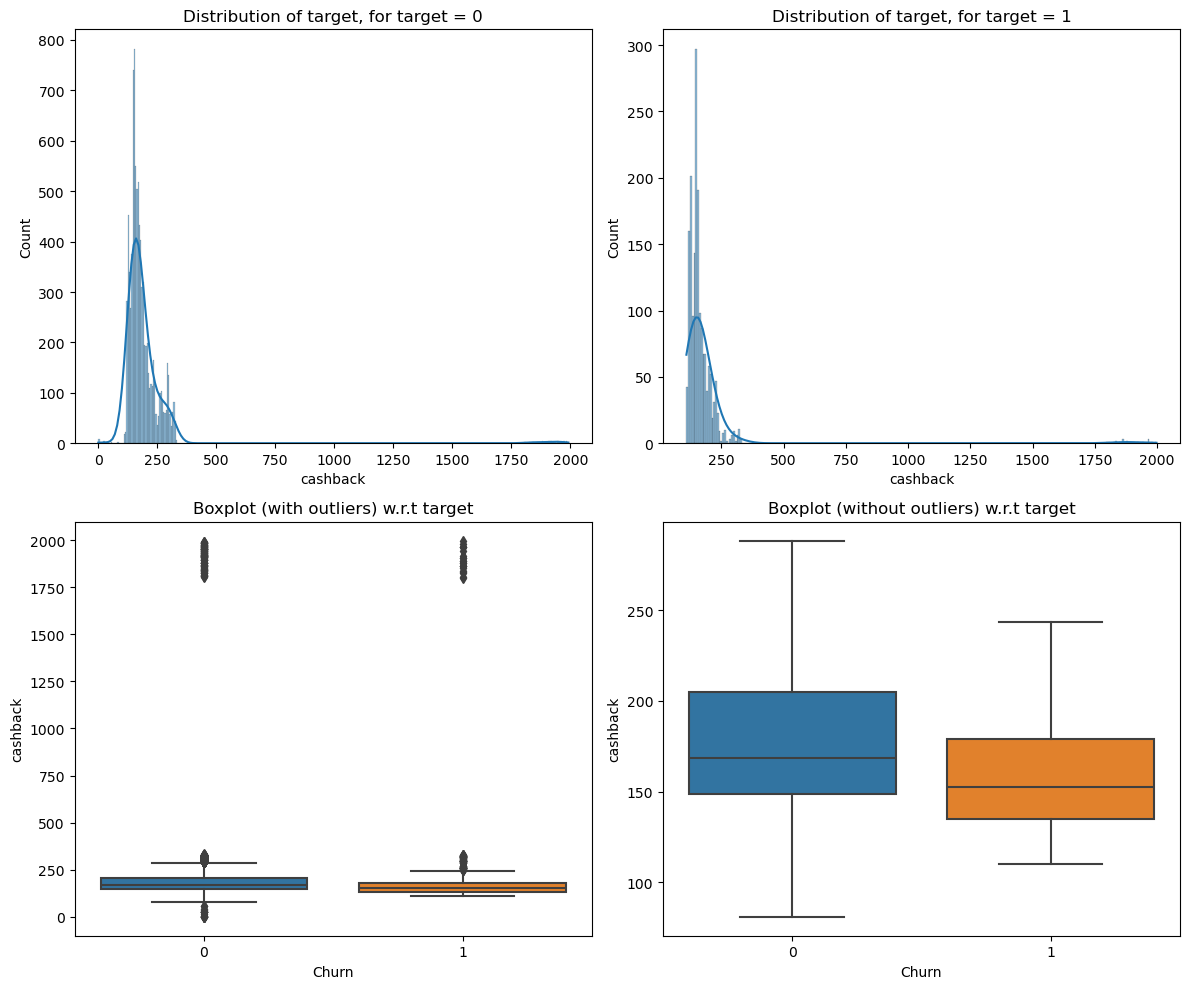

In [110]:
distribution_plot_wrt_target(df, "cashback", "Churn")

<Figure size 500x300 with 0 Axes>

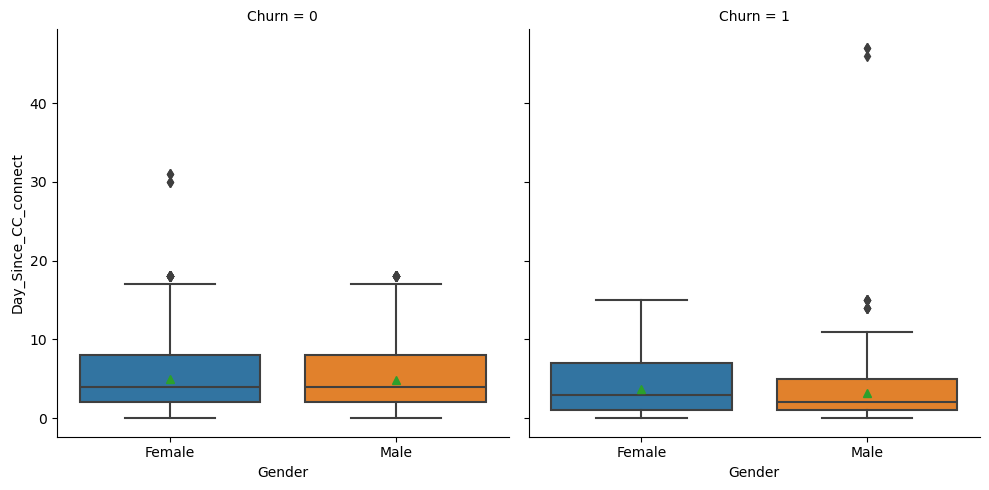

In [111]:
plt.figure(figsize=(5, 3))
sns.catplot(
    x="Gender",
    y="Day_Since_CC_connect",
    col="Churn",
    data=df,
    kind="box",
    showmeans=True,
)
plt.show()

<Figure size 500x300 with 0 Axes>

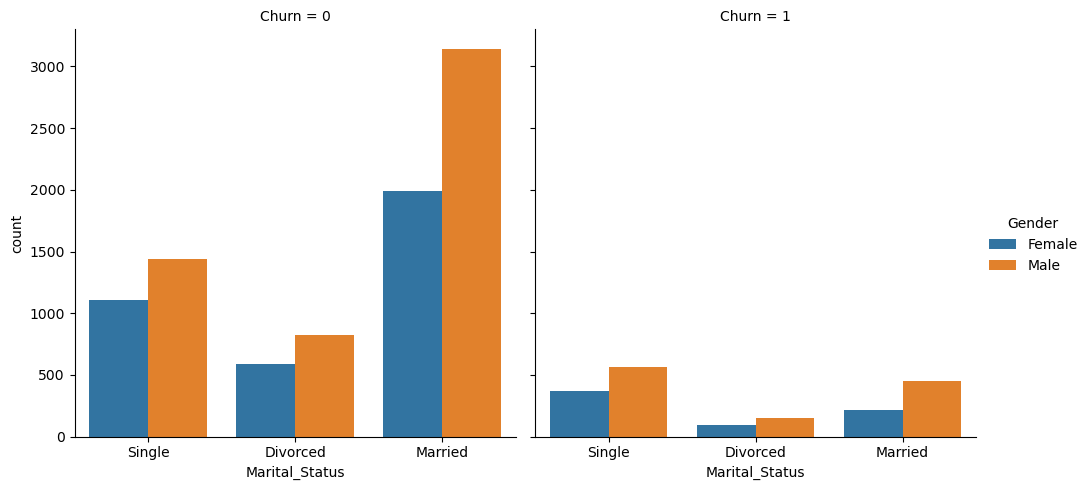

In [112]:
plt.figure(figsize=(5, 3))
sns.catplot(data=df, x="Marital_Status", hue="Gender", kind="count", col="Churn")
plt.show()

<Figure size 1500x800 with 0 Axes>

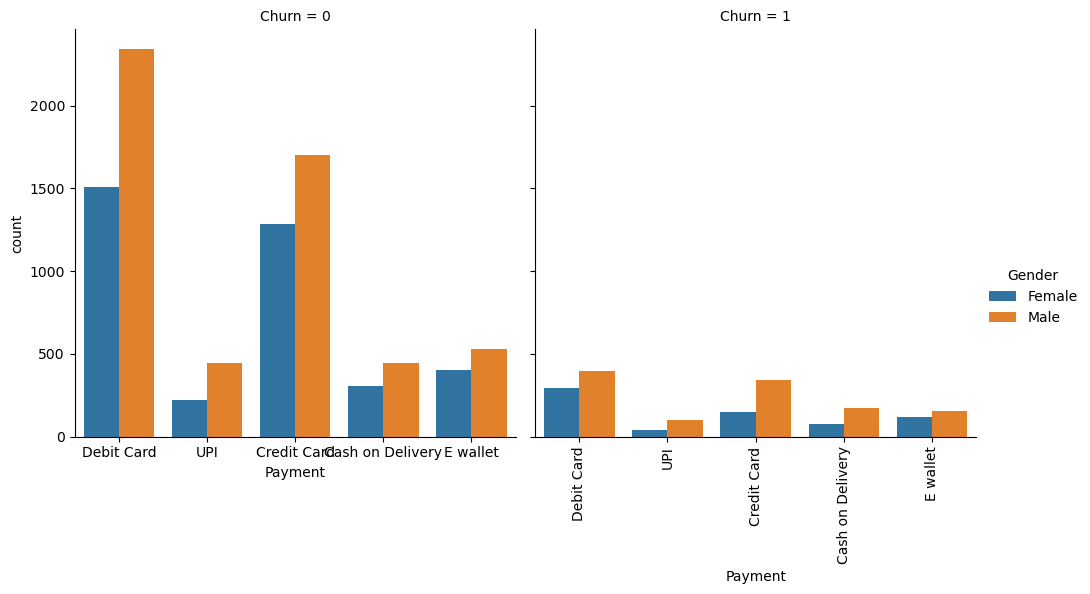

In [113]:
plt.figure(figsize=(15, 8))
sns.catplot(data=df, x="Payment", hue="Gender", kind="count", col="Churn")
plt.xticks(rotation=90)
plt.show()

<Figure size 500x300 with 0 Axes>

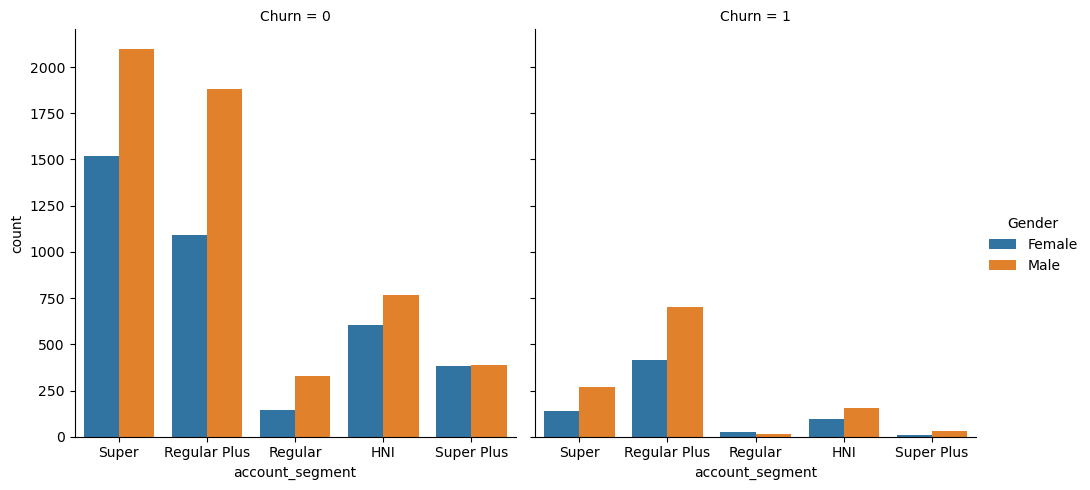

In [114]:
plt.figure(figsize=(5, 3))
sns.catplot(data=data, x="account_segment", hue="Gender", kind="count", col="Churn")
plt.show()

<Figure size 500x300 with 0 Axes>

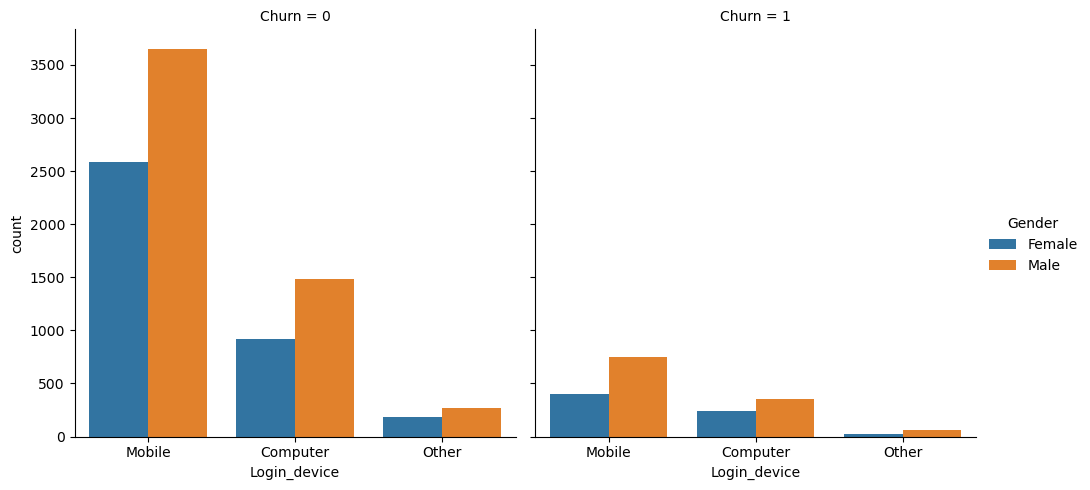

In [115]:
plt.figure(figsize=(5, 3))
sns.catplot(data=data, x="Login_device", hue="Gender", kind="count", col="Churn")
plt.show()

- Male customers experience higher churn rates compared to female customers, regardless of their preferred login device.

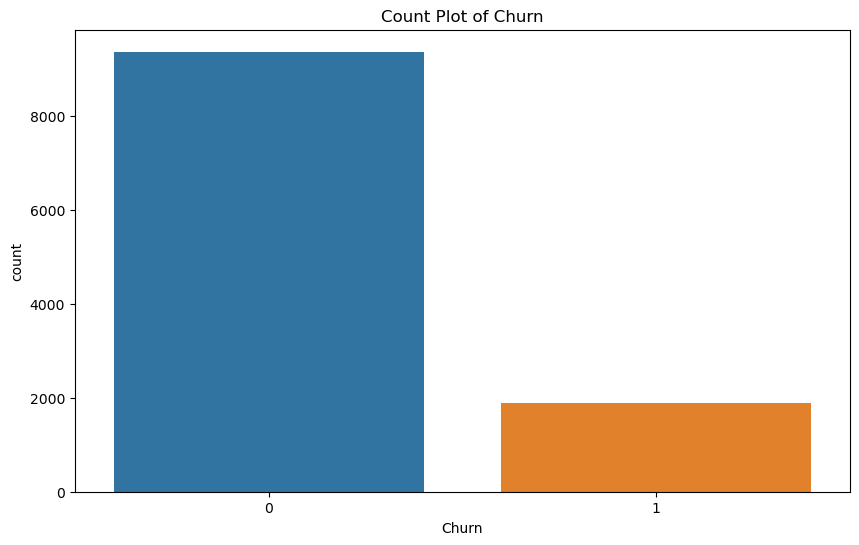

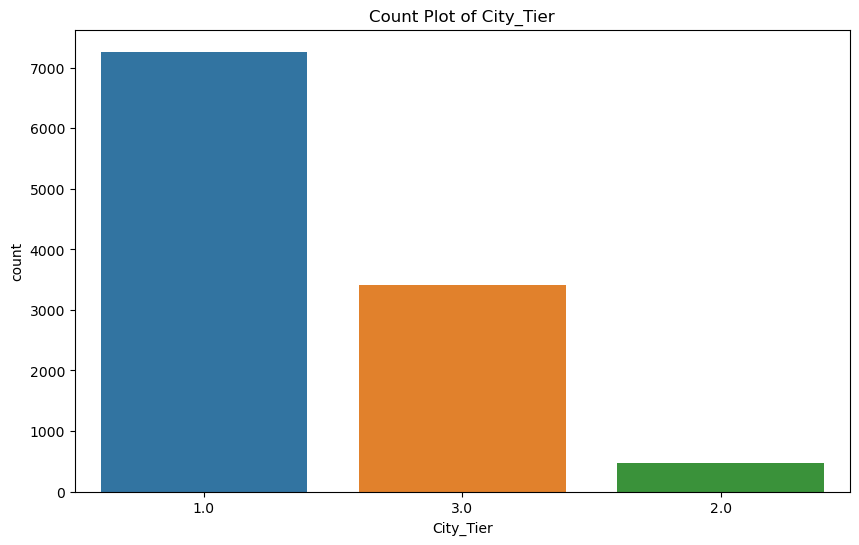

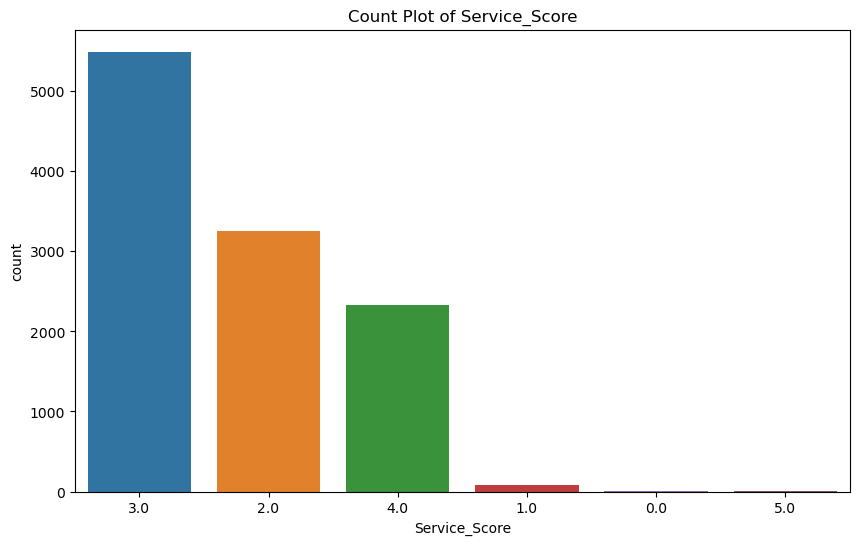

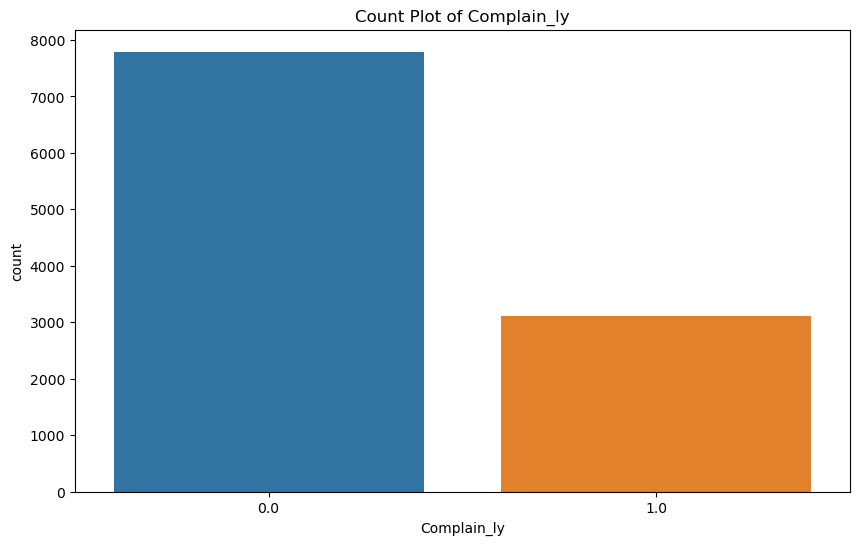

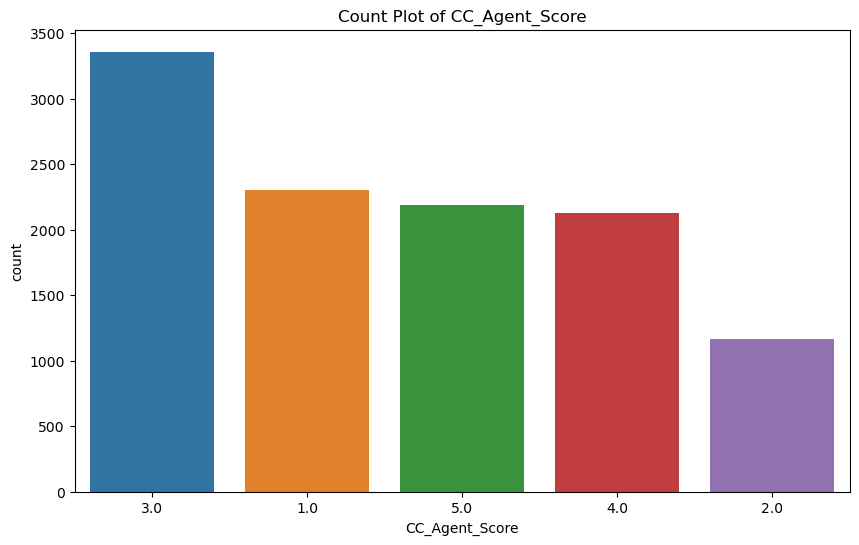

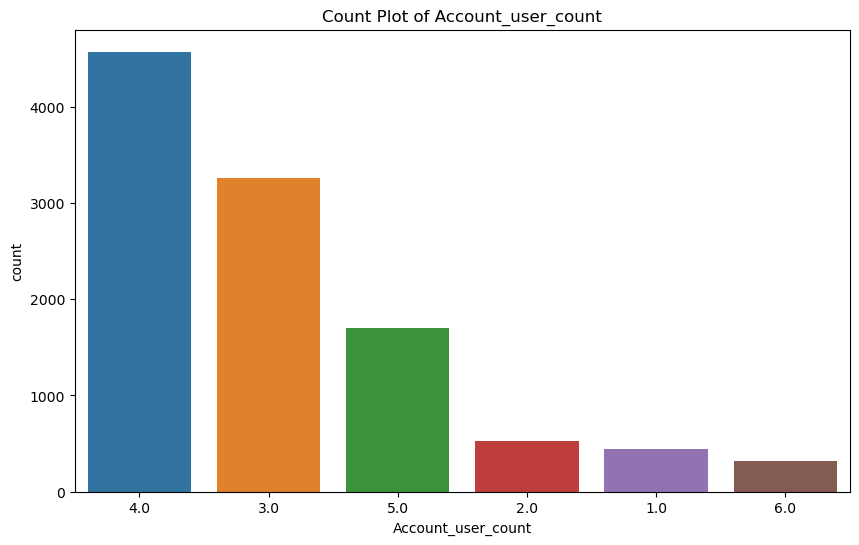

In [116]:
# List of categorical or discrete numerical columns
categorical_columns = ['Churn', 'City_Tier', 'Service_Score', 'Complain_ly', 'CC_Agent_Score','Account_user_count']

for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[column], order=df[column].value_counts().index)
    plt.title(f'Count Plot of {column}')
    plt.show()

### Outlier Identification

In [117]:
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns

Q1 = numeric_df.quantile(0.25)  # To find the 25th percentile
Q3 = numeric_df.quantile(0.75)  # To find the 75th percentile

IQR = Q3 - Q1  # Inter Quantile Range

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR  

In [118]:
def calculate_outlier_percentage(df, exclude_column):
    outlier_percentage = {}

    # Iterate over each numerical column
    for column in df.select_dtypes(include=["number"]).columns:
        if column != exclude_column:  # Exclude the specified column
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1

            # Define lower and upper bounds for outliers
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Calculate the percentage of outliers
            outliers = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
            outlier_percentage[column] = (outliers / len(df)) * 100

    return pd.DataFrame(outlier_percentage.items(), columns=['Column', 'Outlier Percentage'])

# Example usage
outlier_percentage_df = calculate_outlier_percentage(df, exclude_column='Churn')
print(outlier_percentage_df)

                    Column  Outlier Percentage
0                   Tenure            1.234458
1          CC_Contacted_LY            0.373002
2            rev_per_month            1.642984
3           rev_growth_yoy            0.000000
4  coupon_used_for_payment           12.255773
5     Day_Since_CC_connect            0.293073
6                 cashback            7.806394


<Axes: xlabel='Tenure'>

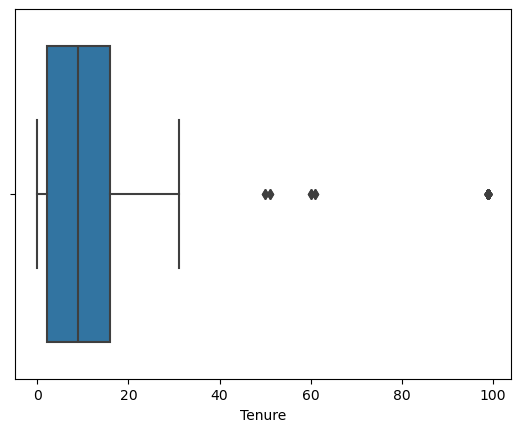

In [119]:
sns.boxplot(x="Tenure", data = df)

<Axes: xlabel='CC_Contacted_LY'>

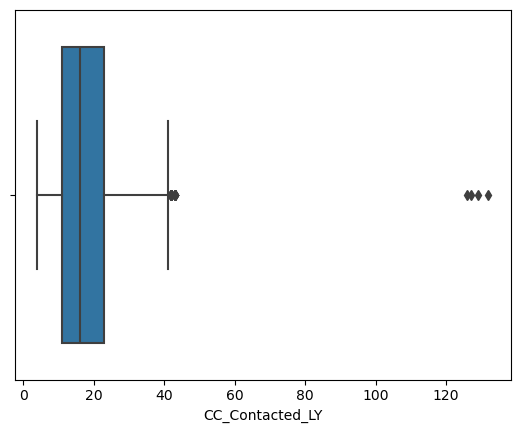

In [120]:
sns.boxplot(x="CC_Contacted_LY", data = df)

<Axes: xlabel='Account_user_count'>

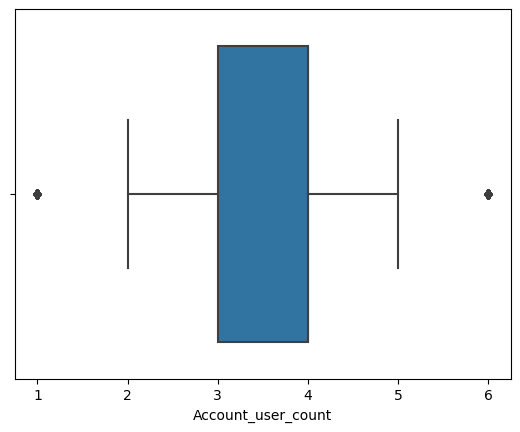

In [121]:
sns.boxplot(x="Account_user_count", data = df)

<Axes: xlabel='cashback'>

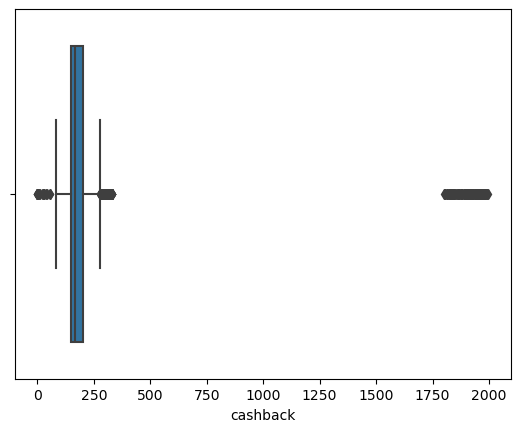

In [122]:
sns.boxplot(x="cashback", data = df)

<Axes: xlabel='rev_per_month'>

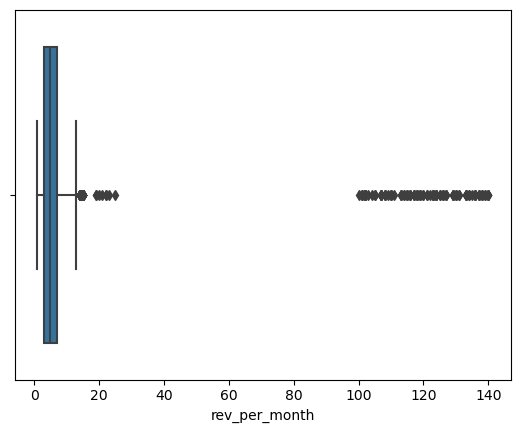

In [123]:
sns.boxplot(x="rev_per_month", data = df)

<Axes: xlabel='Day_Since_CC_connect'>

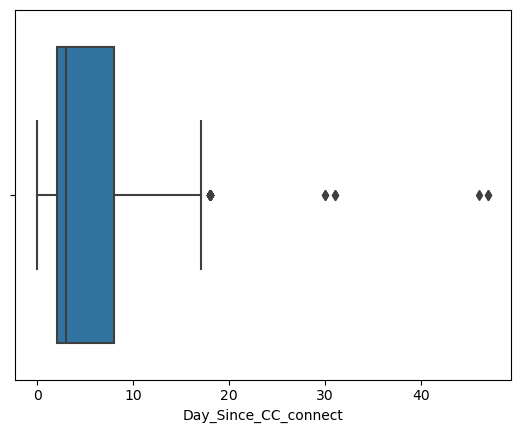

In [124]:
sns.boxplot(x="Day_Since_CC_connect", data = df)

<Axes: xlabel='coupon_used_for_payment'>

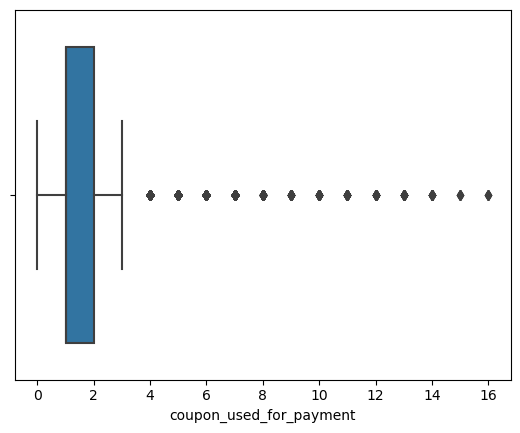

In [125]:
sns.boxplot(x="coupon_used_for_payment", data = df)

<Axes: xlabel='rev_growth_yoy'>

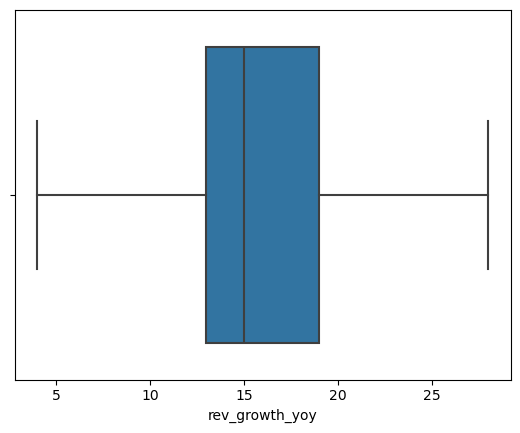

In [126]:
sns.boxplot(x="rev_growth_yoy", data = df)

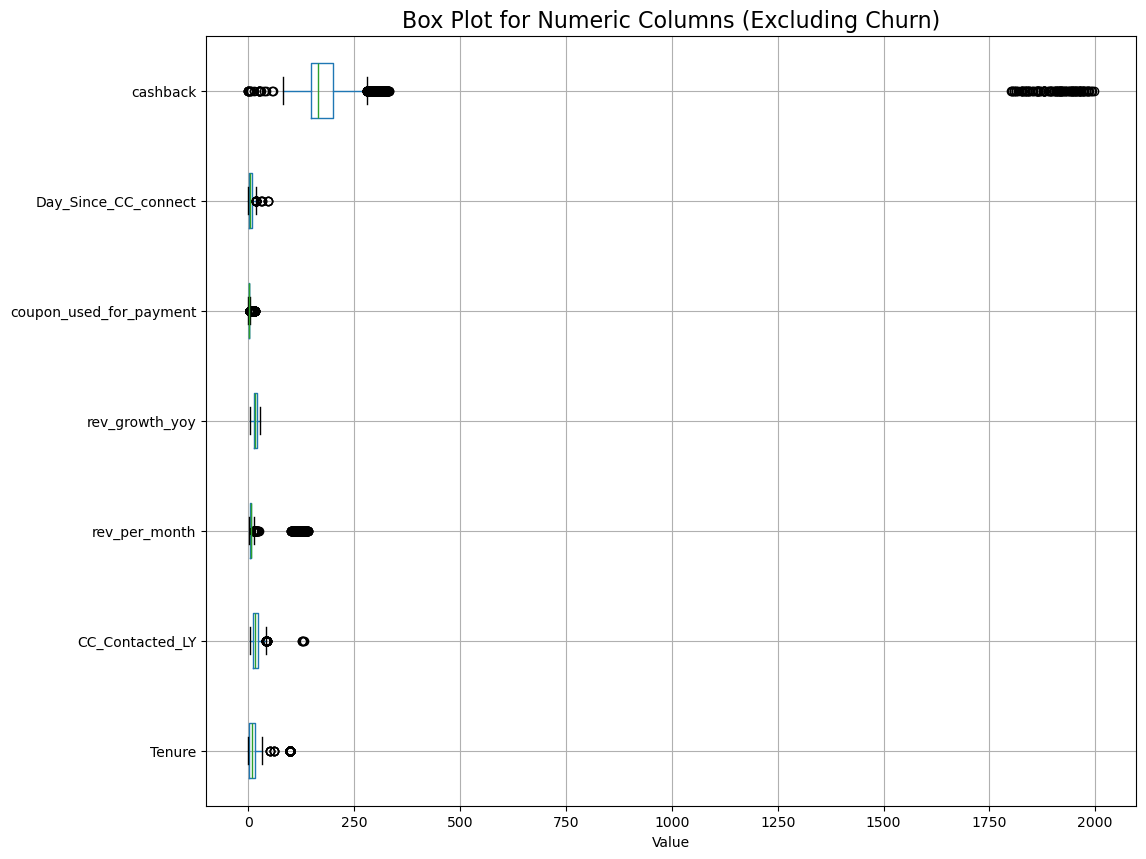

In [127]:
# Filter numeric columns (excluding 'uint8' and 'bool') and also excluding 'Churn'
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = numeric_cols.drop('Churn')  # Exclude the 'Churn' column

# Construct box plot for numeric columns
plt.figure(figsize=(12, 10))
df[numeric_cols].boxplot(vert=0)
plt.title('Box Plot for Numeric Columns (Excluding Churn)', fontsize=16)
plt.xlabel('Value')
plt.show()

In [128]:
import numpy as np

# Define the remove_outlier function if not already defined
def remove_outlier(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lw = Q1 - 1.5 * IQR
    up = Q3 + 1.5 * IQR
    return lw, up

# Replace 
columns = ['Tenure', 'CC_Contacted_LY', 'Account_user_count', 'cashback', 
           'rev_per_month', 'Day_Since_CC_connect', 'coupon_used_for_payment', 
           'rev_growth_yoy']

for col in columns:
    lw, up = remove_outlier(df[col])
    df[col] = np.where(df[col] > up, up, df[col])
    df[col] = np.where(df[col] < lw, lw, df[col])

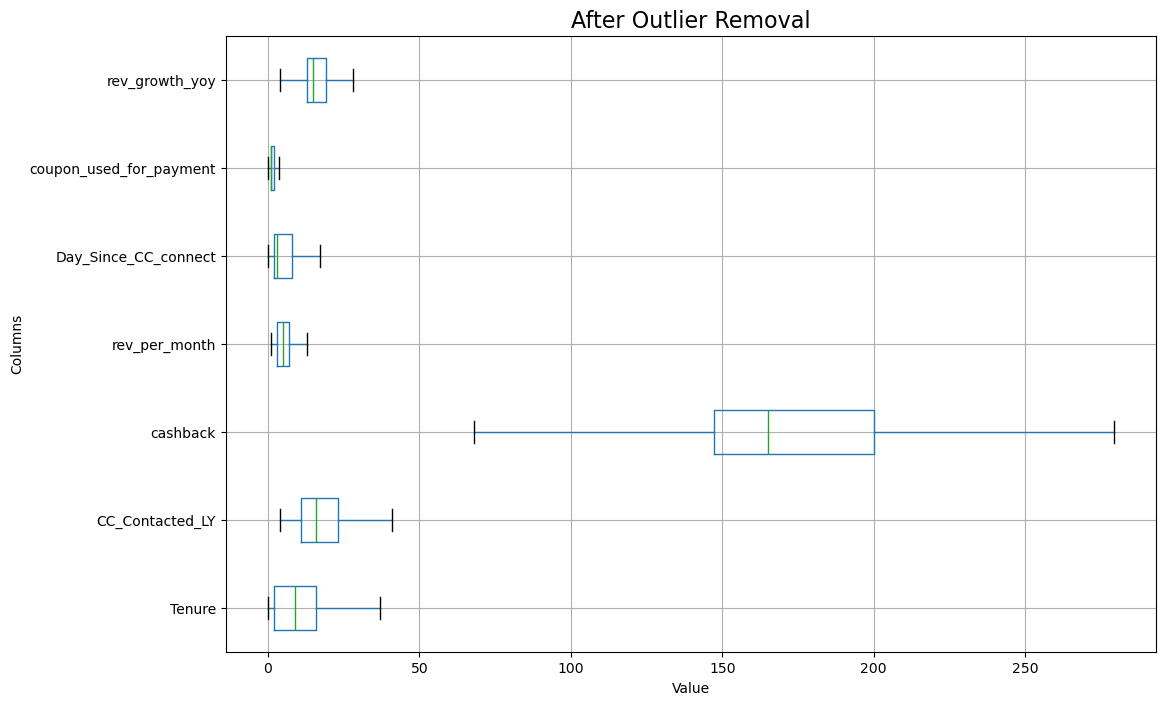

In [129]:
# Create a copy of the DataFrame and remove outliers
df_cleaned = df.copy()
for col in columns:
    lw, up = remove_outlier(df[col])
    df_cleaned[col] = np.where(df[col] > up, up, df[col])
    df_cleaned[col] = np.where(df[col] < lw, lw, df[col])

# Plotting
plt.figure(figsize=(12, 8))
df_cleaned[columns].boxplot(vert=0)
plt.title('After Outlier Removal', fontsize=16)
plt.xlabel('Value')
plt.ylabel('Columns')
plt.show()

<Axes: xlabel='Tenure'>

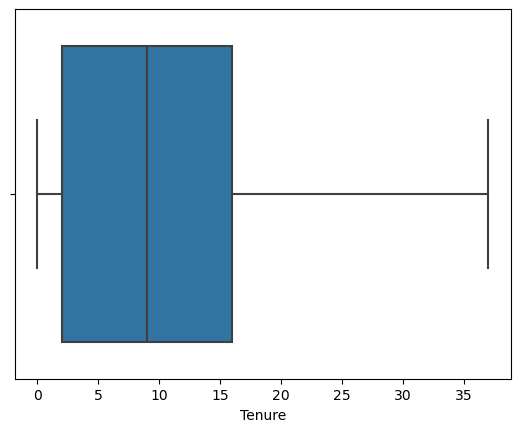

In [130]:
sns.boxplot(x="Tenure", data = df)

<Axes: xlabel='CC_Contacted_LY'>

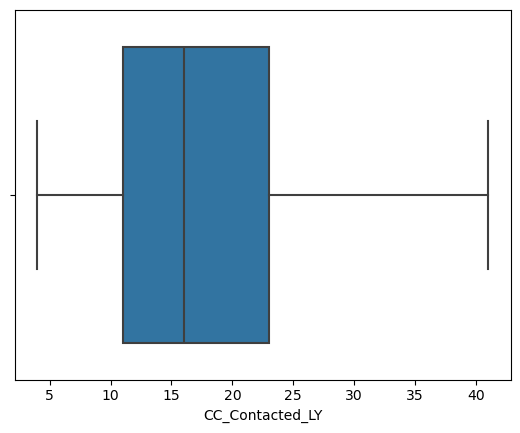

In [131]:
sns.boxplot(x="CC_Contacted_LY", data = df)

<Axes: xlabel='Account_user_count'>

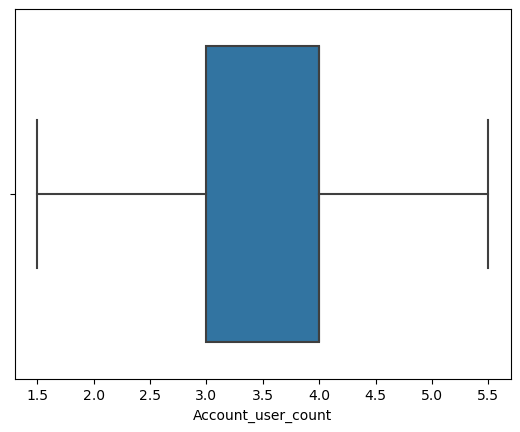

In [132]:
sns.boxplot(x="Account_user_count", data = df)

<Axes: xlabel='cashback'>

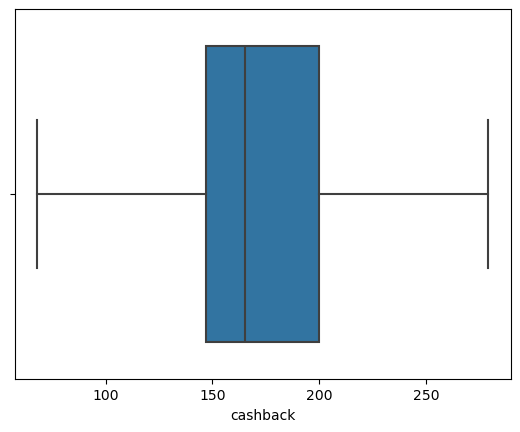

In [133]:
sns.boxplot(x="cashback", data = df)

<Axes: xlabel='rev_per_month'>

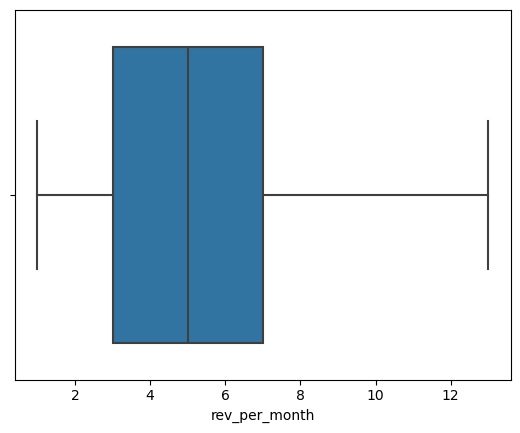

In [134]:
sns.boxplot(x="rev_per_month", data = df)

<Axes: xlabel='Day_Since_CC_connect'>

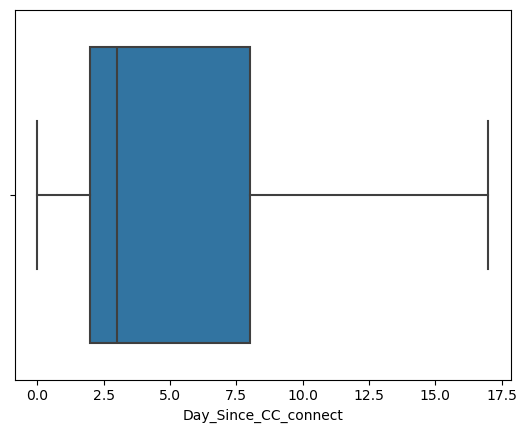

In [135]:
sns.boxplot(x="Day_Since_CC_connect", data = df)

<Axes: xlabel='coupon_used_for_payment'>

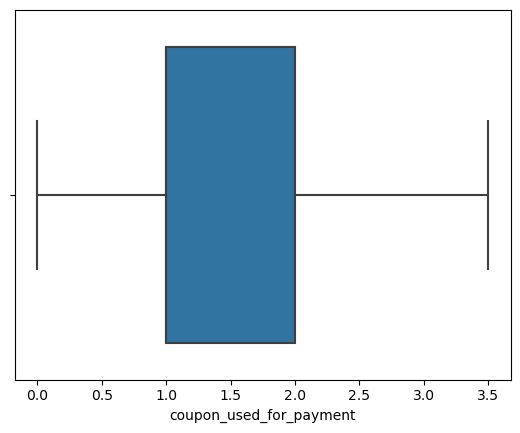

In [136]:
sns.boxplot(x="coupon_used_for_payment", data = df)

<Axes: xlabel='rev_growth_yoy'>

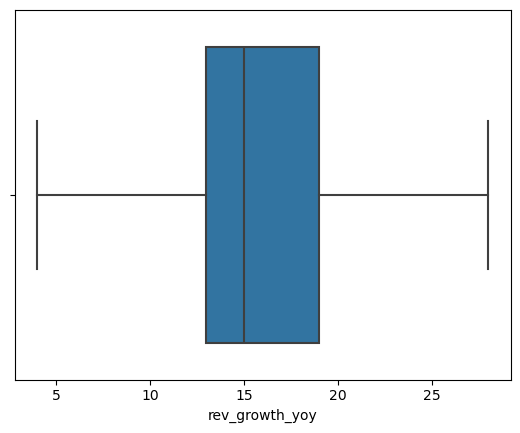

In [137]:
sns.boxplot(x="rev_growth_yoy", data = df)

### Missing Value treatment

In [138]:
# Listing for the percentage of missing values 

round((data.isnull().sum() / data.isnull().count()) * 100,2)

AccountID                  0.00
Churn                      0.00
Tenure                     1.94
City_Tier                  0.99
CC_Contacted_LY            0.91
Payment                    0.97
Gender                     0.96
Service_Score              0.87
Account_user_count         3.94
account_segment            0.86
CC_Agent_Score             1.03
Marital_Status             1.88
rev_per_month              7.02
Complain_ly                3.17
rev_growth_yoy             0.03
coupon_used_for_payment    0.03
Day_Since_CC_connect       3.18
cashback                   4.20
Login_device               1.96
dtype: float64

In [139]:
# Creating a list of columns to impute missing values

cols_to_impute = [
    "Tenure",
    "City_Tier",
    "CC_Contacted_LY",
    "Payment",
    "Gender",
    "Service_Score",
    "Account_user_count",
    "account_segment",
    "CC_Agent_Score",
    "Marital_Status",
    "rev_per_month",
    "Complain_ly",
    "rev_growth_yoy",
    "coupon_used_for_payment",
    "Day_Since_CC_connect",
    "cashback",
    "Login_device",
]

In [140]:
# Defining the value for 'n' neighbors

imputer = KNNImputer(n_neighbors=5)

In [141]:
# Encoding categorical variables into numerical values to perform KNN imputation

payment = {
    "Debit Card": 0,
    "UPI": 1,
    "Credit Card": 2,
    "Cash on Delivery": 3,
    "E wallet": 4,
}
df["Payment"] = df["Payment"].map(payment)

gender = {"Female": 0, "Male": 1}
df["Gender"] = data["Gender"].map(gender)

account_segment = {
    "Super": 0,
    "Regular Plus": 1,
    "Regular": 2,
    "HNI": 3,
    "Super Plus": 4,
}
df["account_segment"] = df["account_segment"].map(account_segment)

marital_status = {"Single": 0, "Divorced": 1, "Married": 2}
df["Marital_Status"] = df["Marital_Status"].map(marital_status)

login_device = {"Mobile": 0, "Computer": 1, "Other": 2}
df["Login_device"] = df["Login_device"].map(login_device)

In [142]:
print("Encoded Dataset:")
df.head()

Encoded Dataset:


Churn  Tenure City_Tier  CC_Contacted_LY  Payment  Gender Service_Score  \
0      1     4.0       3.0              6.0      0.0     0.0           3.0   
1      1     0.0       1.0              8.0      1.0     1.0           3.0   
2      1     0.0       1.0             30.0      0.0     1.0           2.0   
3      1     0.0       3.0             15.0      0.0     1.0           2.0   
4      1     0.0       1.0             12.0      2.0     1.0           2.0   

  Account_user_count  account_segment CC_Agent_Score  Marital_Status  \
0                3.0              0.0            2.0             0.0   
1                4.0              1.0            3.0             0.0   
2                4.0              1.0            3.0             0.0   
3                4.0              0.0            5.0             0.0   
4                3.0              1.0            5.0             0.0   

   rev_per_month Complain_ly  rev_growth_yoy  coupon_used_for_payment  \
0            9.0         1.0            11.0                      1.0   
1            7.0         1.0            15.0                      0.0   
2            6.0         1.0            14.0                      0.0   
3            8.0         0.0            23.0                      0.0   
4            3.0         0.0            11.0                      1.0   

   Day_Since_CC_connect  cashback  Login_device  
0                   5.0    159.93           0.0  
1                   0.0    120.90           0.0  
2                   3.0       NaN           0.0  
3                   3.0    134.07           0.0  
4                   3.0    129.60           0.0

## Data Preparation for Modeling

In [143]:
# Seperating target variable from the rest of the data
df_X = df.drop(['Churn'], axis = 1)
df_y = df['Churn']

In [144]:
#Splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.30, random_state=42, stratify = df_y)  ## Complete the code to split the data into train and test in the ratio 70:30

In [145]:
# Check missing values
X_train.isnull().sum()  ## Complete the code to get the number of null or NaN values in each column

Tenure                     153
City_Tier                   87
CC_Contacted_LY             77
Payment                     79
Gender                      72
Service_Score               71
Account_user_count         312
account_segment             64
CC_Agent_Score              75
Marital_Status             147
rev_per_month              566
Complain_ly                260
rev_growth_yoy               2
coupon_used_for_payment      2
Day_Since_CC_connect       249
cashback                   334
Login_device               153
dtype: int64

In [146]:
# Check missing values
X_test.isna().sum()

Tenure                      65
City_Tier                   25
CC_Contacted_LY             25
Payment                     30
Gender                      36
Service_Score               27
Account_user_count         132
account_segment             33
CC_Agent_Score              41
Marital_Status              65
rev_per_month              225
Complain_ly                 97
rev_growth_yoy               1
coupon_used_for_payment      1
Day_Since_CC_connect       109
cashback                   139
Login_device                68
dtype: int64

### Splitting data into train and test data set

In [147]:
#Replace the missing values in the data using KNN Imputer
KNNimputerModel = KNNImputer(n_neighbors = 5)  ## Complete the code to select 5 neighbors for KNN Imputer

X_train = pd.DataFrame(KNNimputerModel.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(KNNimputerModel.fit_transform(X_test), columns = X_test.columns)  ## Complete the code to replace missing values in X_test

In [148]:
print("Shape of Training set : ", X_train.shape)
print("Shape of Testing set : ", X_test.shape)



print("\nPercentage of classes in training set : ")
print(y_train.value_counts(normalize=True))

print("\nPercentage of classes in test set : ")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (7882, 17)
Shape of Testing set :  (3378, 17)

Percentage of classes in training set : 
Churn
0    0.831642
1    0.168358
Name: proportion, dtype: float64

Percentage of classes in test set : 
Churn
0    0.831557
1    0.168443
Name: proportion, dtype: float64


## Missing Values Detection and Treatment

In [149]:
# Check missing values
X_train.isnull().sum()  ## Complete the code to get the number of null or NaN values in each column

Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [150]:
# Check missing values
X_test.isna().sum()

Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [151]:
print(X_train.isnull().sum().sum())
print(X_test.isnull().sum().sum())

0
0


In [152]:
# Checking the number of missing values in train, validation and test sets

print(X_train.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64
------------------------------
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0

### Scaling the Data

In [153]:
#Scaling of features is done to bring all the features to the same scale.
sc = StandardScaler()

X_train_scaled = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(sc.fit_transform(X_test), columns=X_test.columns)  ## Complete the code to scale X_test to the same scale as X_train

In [154]:
X_train_scaled.head()

Tenure  City_Tier  CC_Contacted_LY   Payment    Gender  Service_Score  \
0  1.655479  -0.710298        -0.675959  1.159619  0.814633       0.138824   
1 -0.587916   1.491349         1.654231  1.889521  0.814633       0.138824   
2 -1.148765  -0.710298         0.838664  0.429718  0.814633       0.138824   
3 -0.363577   1.491349        -0.442940  0.429718  0.814633       0.138824   
4 -0.812256   1.491349         0.256117 -0.300184  0.814633       0.138824   

   Account_user_count  account_segment  CC_Agent_Score  Marital_Status  \
0           -0.757453        -0.941219        1.407679        0.881704   
1           -0.757453        -0.941219       -1.494425        0.881704   
2           -0.757453        -0.152668       -0.768899       -0.240827   
3           -1.837728        -0.941219        1.407679        0.881704   
4           -0.757453         1.424434       -0.043373        0.881704   

   rev_per_month  Complain_ly  rev_growth_yoy  coupon_used_for_payment  \
0      -0.434582     1.617011       -1.115197                 0.477844   
1      -1.469375    -0.634010        0.472083                 0.477844   
2      -0.434582    -0.634010       -1.379744                -0.430064   
3       0.600212    -0.634010        1.794816                -0.430064   
4       1.290074    -0.634010       -1.115197                 1.839704   

   Day_Since_CC_connect  cashback  Login_device  
0              1.237776 -0.489545     -0.649479  
1             -0.737702 -0.734472      1.093166  
2             -0.737702 -0.909797     -0.649479  
3              1.237776 -0.145943     -0.649479  
4              0.673354 -0.007842     -0.649479

In [155]:
X_test_scaled.head()

Tenure  City_Tier  CC_Contacted_LY   Payment    Gender  Service_Score  \
0 -0.256648  -0.731887        -1.155195 -1.025694  0.817898      -1.237325   
1  1.427329  -0.731887         1.886236 -1.025694 -1.230789      -1.237325   
2 -0.032118  -0.731887        -0.336348  1.140614 -1.230789       0.121303   
3 -0.481178   1.443489         0.833433 -1.025694 -1.230789      -1.237325   
4  0.416943   1.443489        -0.804261  1.862717  0.817898       1.479931   

   Account_user_count  account_segment  CC_Agent_Score  Marital_Status  \
0            0.332842         1.416354        0.672668        0.896525   
1           -0.740720         2.203451        1.405234       -0.228126   
2            0.332842         1.416354       -0.059898       -0.228126   
3           -0.740720        -0.944935       -1.525029        0.896525   
4            1.406404         1.416354       -1.525029        0.896525   

   rev_per_month  Complain_ly  rev_growth_yoy  coupon_used_for_payment  \
0      -0.783123    -0.656028        0.502132                 0.471023   
1      -0.102654     1.559591       -1.388420                -1.340048   
2      -0.783123    -0.656028       -0.578183                 1.829327   
3      -0.442889     1.559591        2.932842                -1.340048   
4       1.258283    -0.656028       -1.118341                 0.471023   

   Day_Since_CC_connect  cashback  Login_device  
0             -0.160351  0.515172     -0.649128  
1             -0.713803  1.961340     -0.649128  
2              1.223281  1.023498     -0.649128  
3             -0.713803 -0.536945      1.122078  
4              2.053460  1.189656     -0.649128

In [156]:
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7882 entries, 0 to 7881
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Tenure                   7882 non-null   float64
 1   City_Tier                7882 non-null   float64
 2   CC_Contacted_LY          7882 non-null   float64
 3   Payment                  7882 non-null   float64
 4   Gender                   7882 non-null   float64
 5   Service_Score            7882 non-null   float64
 6   Account_user_count       7882 non-null   float64
 7   account_segment          7882 non-null   float64
 8   CC_Agent_Score           7882 non-null   float64
 9   Marital_Status           7882 non-null   float64
 10  rev_per_month            7882 non-null   float64
 11  Complain_ly              7882 non-null   float64
 12  rev_growth_yoy           7882 non-null   float64
 13  coupon_used_for_payment  7882 non-null   float64
 14  Day_Since_CC_connect    

In [157]:
X_test_scaled.std()

Tenure                     1.000148
City_Tier                  1.000148
CC_Contacted_LY            1.000148
Payment                    1.000148
Gender                     1.000148
Service_Score              1.000148
Account_user_count         1.000148
account_segment            1.000148
CC_Agent_Score             1.000148
Marital_Status             1.000148
rev_per_month              1.000148
Complain_ly                1.000148
rev_growth_yoy             1.000148
coupon_used_for_payment    1.000148
Day_Since_CC_connect       1.000148
cashback                   1.000148
Login_device               1.000148
dtype: float64

In [158]:
#checking the dimentsions of training and test data
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (7882, 17)
X_test (3378, 17)
y_train (7882,)
y_test (3378,)


In [159]:
from collections import Counter
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.975], flip_y=0, random_state=1)
counter=Counter(y)
counter

Counter({0: 975, 1: 25})

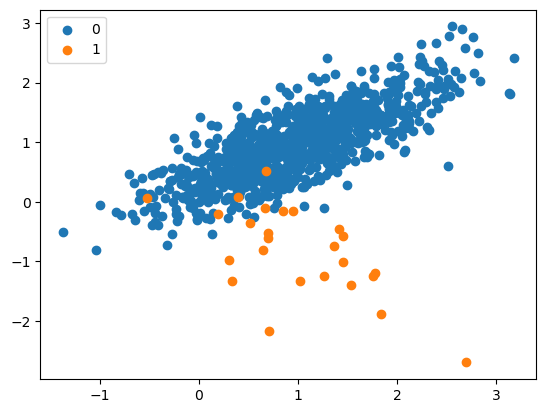

In [160]:
from numpy import where
from collections import Counter
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [161]:
from imblearn.over_sampling import SMOTE 
from collections import Counter
from sklearn.cluster import KMeans

In [162]:
# applying smote to train dataset and resampling
sm = SMOTE(random_state=1)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [163]:
#checking the dimentsions of training and test data
print('X_train_res',X_train_res.shape)
#print('X_test',X_test.shape)
print('y_train_res',y_train_res.shape)
#print('y_test',y_test.shape)

X_train_res (13110, 17)
y_train_res (13110,)


In [164]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [165]:
counter=Counter(y)
counter

Counter({0: 975, 1: 975})

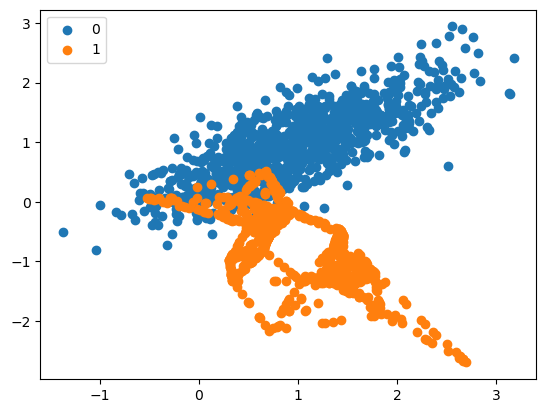

In [166]:
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [167]:
wss =[] 
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(X_train_scaled)
    KM.fit(X_test_scaled)
    wss.append(KM.inertia_)


/Users/ishashukla/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ishashukla/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ishashukla/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/ishashukla/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init

In [168]:
KM.inertia_

40860.86489846211

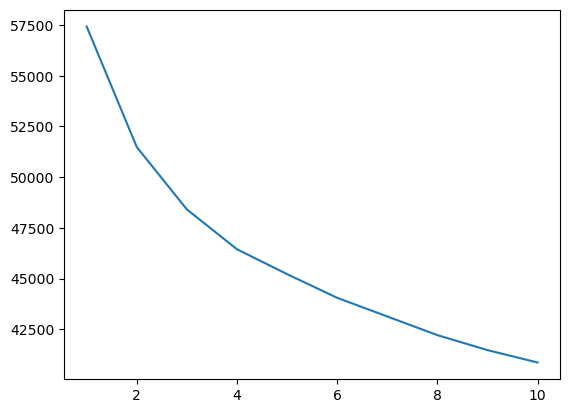

In [169]:
plt.plot(range(1,11), wss)

In [170]:
k_means = KMeans(n_clusters = 3)
k_means.fit(X_train_scaled)
labels = k_means.labels_ 

/Users/ishashukla/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [171]:
X_train_scaled["Clus_kmeans"] = labels
X_train_scaled.head(5)

Tenure  City_Tier  CC_Contacted_LY   Payment    Gender  Service_Score  \
0  1.655479  -0.710298        -0.675959  1.159619  0.814633       0.138824   
1 -0.587916   1.491349         1.654231  1.889521  0.814633       0.138824   
2 -1.148765  -0.710298         0.838664  0.429718  0.814633       0.138824   
3 -0.363577   1.491349        -0.442940  0.429718  0.814633       0.138824   
4 -0.812256   1.491349         0.256117 -0.300184  0.814633       0.138824   

   Account_user_count  account_segment  CC_Agent_Score  Marital_Status  \
0           -0.757453        -0.941219        1.407679        0.881704   
1           -0.757453        -0.941219       -1.494425        0.881704   
2           -0.757453        -0.152668       -0.768899       -0.240827   
3           -1.837728        -0.941219        1.407679        0.881704   
4           -0.757453         1.424434       -0.043373        0.881704   

   rev_per_month  Complain_ly  rev_growth_yoy  coupon_used_for_payment  \
0      -0.434582     1.617011       -1.115197                 0.477844   
1      -1.469375    -0.634010        0.472083                 0.477844   
2      -0.434582    -0.634010       -1.379744                -0.430064   
3       0.600212    -0.634010        1.794816                -0.430064   
4       1.290074    -0.634010       -1.115197                 1.839704   

   Day_Since_CC_connect  cashback  Login_device  Clus_kmeans  
0              1.237776 -0.489545     -0.649479            0  
1             -0.737702 -0.734472      1.093166            1  
2             -0.737702 -0.909797     -0.649479            1  
3              1.237776 -0.145943     -0.649479            1  
4              0.673354 -0.007842     -0.649479            2

In [172]:
X_train_scaled.groupby(["Clus_kmeans"]).count()

Tenure  City_Tier  CC_Contacted_LY  Payment  Gender  \
Clus_kmeans                                                        
0              3022       3022             3022     3022    3022   
1              2943       2943             2943     2943    2943   
2              1917       1917             1917     1917    1917   

             Service_Score  Account_user_count  account_segment  \
Clus_kmeans                                                       
0                     3022                3022             3022   
1                     2943                2943             2943   
2                     1917                1917             1917   

             CC_Agent_Score  Marital_Status  rev_per_month  Complain_ly  \
Clus_kmeans                                                               
0                      3022            3022           3022         3022   
1                      2943            2943           2943         2943   
2                      1917            1917           1917         1917   

             rev_growth_yoy  coupon_used_for_payment  Day_Since_CC_connect  \
Clus_kmeans                                                                  
0                      3022                     3022                  3022   
1                      2943                     2943                  2943   
2                      1917                     1917                  1917   

             cashback  Login_device  
Clus_kmeans                          
0                3022          3022  
1                2943          2943  
2                1917          1917

In [173]:
k_means = KMeans(n_clusters = 3)
k_means.fit(X_test_scaled)
labels = k_means.labels_ 
X_test_scaled["Clus_kmeans"] = labels
X_test_scaled.head(5)

/Users/ishashukla/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Tenure  City_Tier  CC_Contacted_LY   Payment    Gender  Service_Score  \
0 -0.256648  -0.731887        -1.155195 -1.025694  0.817898      -1.237325   
1  1.427329  -0.731887         1.886236 -1.025694 -1.230789      -1.237325   
2 -0.032118  -0.731887        -0.336348  1.140614 -1.230789       0.121303   
3 -0.481178   1.443489         0.833433 -1.025694 -1.230789      -1.237325   
4  0.416943   1.443489        -0.804261  1.862717  0.817898       1.479931   

   Account_user_count  account_segment  CC_Agent_Score  Marital_Status  \
0            0.332842         1.416354        0.672668        0.896525   
1           -0.740720         2.203451        1.405234       -0.228126   
2            0.332842         1.416354       -0.059898       -0.228126   
3           -0.740720        -0.944935       -1.525029        0.896525   
4            1.406404         1.416354       -1.525029        0.896525   

   rev_per_month  Complain_ly  rev_growth_yoy  coupon_used_for_payment  \
0      -0.783123    -0.656028        0.502132                 0.471023   
1      -0.102654     1.559591       -1.388420                -1.340048   
2      -0.783123    -0.656028       -0.578183                 1.829327   
3      -0.442889     1.559591        2.932842                -1.340048   
4       1.258283    -0.656028       -1.118341                 0.471023   

   Day_Since_CC_connect  cashback  Login_device  Clus_kmeans  
0             -0.160351  0.515172     -0.649128            0  
1             -0.713803  1.961340     -0.649128            0  
2              1.223281  1.023498     -0.649128            0  
3             -0.713803 -0.536945      1.122078            1  
4              2.053460  1.189656     -0.649128            0

In [174]:
X_test_scaled.groupby(["Clus_kmeans"]).count()

Tenure  City_Tier  CC_Contacted_LY  Payment  Gender  \
Clus_kmeans                                                        
0               849        849              849      849     849   
1              1277       1277             1277     1277    1277   
2              1252       1252             1252     1252    1252   

             Service_Score  Account_user_count  account_segment  \
Clus_kmeans                                                       
0                      849                 849              849   
1                     1277                1277             1277   
2                     1252                1252             1252   

             CC_Agent_Score  Marital_Status  rev_per_month  Complain_ly  \
Clus_kmeans                                                               
0                       849             849            849          849   
1                      1277            1277           1277         1277   
2                      1252            1252           1252         1252   

             rev_growth_yoy  coupon_used_for_payment  Day_Since_CC_connect  \
Clus_kmeans                                                                  
0                       849                      849                   849   
1                      1277                     1277                  1277   
2                      1252                     1252                  1252   

             cashback  Login_device  
Clus_kmeans                          
0                 849           849  
1                1277          1277  
2                1252          1252

In [175]:
churn_rate = df['Churn'].mean() * 100  # Calculate churn rate as a percentage

In [176]:
churn_rate

16.838365896980463

In [177]:
import pandas as pd

# Assuming 'Churn' column has binary values (1 for churn, 0 for non-churn)
churn_rate = df['Churn'].mean() * 100  # Calculate churn rate as a percentage

# Industry standard churn rate
industry_churn_rate = 9.62

# Calculate the difference in churn rate
churn_difference = churn_rate - industry_churn_rate

# Calculate the potential revenue increase
# Assuming a 10% revenue loss for every 10% churn rate
revenue_increase_percentage = churn_difference / 10  # Revenue increase percentage

print(f"Churn Rate in Data: {churn_rate:.2f}%")
print(f"Industry Standard Churn Rate: {industry_churn_rate}%")
print(f"Churn Rate Difference: {churn_difference:.2f}%")
print(f"Potential Revenue Increase if Churn is Reduced to Industry Standard: {revenue_increase_percentage:.2f}%")

# If you have clustered the data, here’s how to create profiles for each cluster
# Assuming you have a 'Cluster' column in your dataframe after clustering

if 'Clus_kmeans' in df.columns:
    cluster_profiles = df.groupby('Clus_kmeans').mean()  # Calculate mean of features for each cluster

    # Calculate the mean churn rate for each cluster
    cluster_churn_rates = df.groupby('Clus_kmeans')['Churn'].mean() * 100

    # Add churn rates to the cluster profiles
    cluster_profiles['Churn Rate'] = cluster_churn_rates

    # Determine features that contribute to higher/lower churn in each cluster
    # Compare each feature's mean to the overall mean
    overall_means = df.mean()
    for feature in cluster_profiles.columns:
        if feature != 'Churn Rate':
            cluster_profiles[f'{feature} vs Overall Mean'] = cluster_profiles[feature] - overall_means[feature]

    print("\nCluster Profiles with Features Contributing to Churn:")
    print(cluster_profiles)
else:
    print("\nClustering has not been performed on the dataset.")

Churn Rate in Data: 16.84%
Industry Standard Churn Rate: 9.62%
Churn Rate Difference: 7.22%
Potential Revenue Increase if Churn is Reduced to Industry Standard: 0.72%

Clustering has not been performed on the dataset.


### Notes - II

In [178]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7882 entries, 0 to 7881
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Tenure                   7882 non-null   float64
 1   City_Tier                7882 non-null   float64
 2   CC_Contacted_LY          7882 non-null   float64
 3   Payment                  7882 non-null   float64
 4   Gender                   7882 non-null   float64
 5   Service_Score            7882 non-null   float64
 6   Account_user_count       7882 non-null   float64
 7   account_segment          7882 non-null   float64
 8   CC_Agent_Score           7882 non-null   float64
 9   Marital_Status           7882 non-null   float64
 10  rev_per_month            7882 non-null   float64
 11  Complain_ly              7882 non-null   float64
 12  rev_growth_yoy           7882 non-null   float64
 13  coupon_used_for_payment  7882 non-null   float64
 14  Day_Since_CC_connect    

In [179]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3378 entries, 0 to 3377
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Tenure                   3378 non-null   float64
 1   City_Tier                3378 non-null   float64
 2   CC_Contacted_LY          3378 non-null   float64
 3   Payment                  3378 non-null   float64
 4   Gender                   3378 non-null   float64
 5   Service_Score            3378 non-null   float64
 6   Account_user_count       3378 non-null   float64
 7   account_segment          3378 non-null   float64
 8   CC_Agent_Score           3378 non-null   float64
 9   Marital_Status           3378 non-null   float64
 10  rev_per_month            3378 non-null   float64
 11  Complain_ly              3378 non-null   float64
 12  rev_growth_yoy           3378 non-null   float64
 13  coupon_used_for_payment  3378 non-null   float64
 14  Day_Since_CC_connect    

In [180]:
X_train_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13110 entries, 0 to 13109
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Tenure                   13110 non-null  float64
 1   City_Tier                13110 non-null  float64
 2   CC_Contacted_LY          13110 non-null  float64
 3   Payment                  13110 non-null  float64
 4   Gender                   13110 non-null  float64
 5   Service_Score            13110 non-null  float64
 6   Account_user_count       13110 non-null  float64
 7   account_segment          13110 non-null  float64
 8   CC_Agent_Score           13110 non-null  float64
 9   Marital_Status           13110 non-null  float64
 10  rev_per_month            13110 non-null  float64
 11  Complain_ly              13110 non-null  float64
 12  rev_growth_yoy           13110 non-null  float64
 13  coupon_used_for_payment  13110 non-null  float64
 14  Day_Since_CC_connect  

## Model Building

## Model Evaluation Criterion

*Metric of Choice*
-


In [181]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification(model, predictors, target, threshold = 0.5):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    y_pred = model.predict(predictors)

    if len(list(set(y_pred))) != 2:
        y_prob_pred = model.predict(predictors)

        y_pred=[]
        for i in range(0,len(y_prob_pred)):
            if np.array(y_prob_pred)[i] > threshold:
                a=1
            else:
                a=0
            y_pred.append(a)
    else:
        pass

    acc = accuracy_score(target, y_pred)  # to compute Accuracy
    recall = recall_score(target, y_pred)  # to compute Recall
    precision = precision_score(target, y_pred)  # to compute Precision
    f1 = f1_score(target, y_pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [182]:
def model_confusion_matrix(model, predictors, target, threshold = 0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    if len(list(set(y_pred))) != 2:
        y_prob_pred = model.predict(predictors)

        y_pred=[]
        for i in range(0,len(y_prob_pred)):
            if np.array(y_prob_pred)[i] > threshold:
                a=1
            else:
                a=0
            y_pred.append(a)
    else:
        pass

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Logistic Regression

In [183]:
# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)

### Logistic Regression Model - Training Performance

In [184]:
# Fit the model on the training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [185]:
# Predict on the training data
y_train_pred = model.predict(X_train)

In [186]:
# Evaluate the model on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_cm = confusion_matrix(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])

In [187]:
print("Accuracy of training set:",train_accuracy)
print("Confusion matrix of training set:",train_cm)
print("Training ROC-AUC Score:", train_roc_auc)

Accuracy of training set: 0.8869576249682821
Confusion matrix of training set: [[6363  192]
 [ 699  628]]
Training ROC-AUC Score: 0.8757512371407206


In [188]:
# getting classification report for train data set
print("Classification report for train dataset")
print(classification_report(y_train, y_train_pred))

Classification report for train dataset
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      6555
           1       0.77      0.47      0.59      1327

    accuracy                           0.89      7882
   macro avg       0.83      0.72      0.76      7882
weighted avg       0.88      0.89      0.88      7882



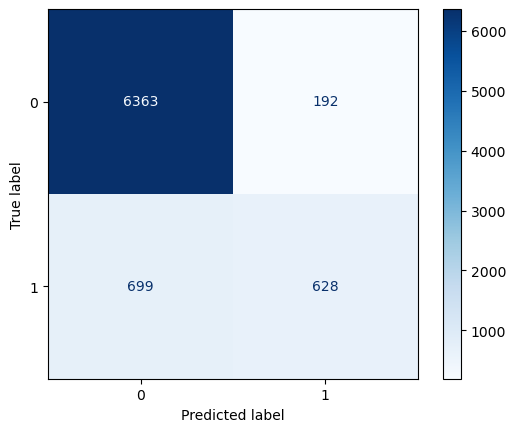

In [189]:
train_cm = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=train_cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

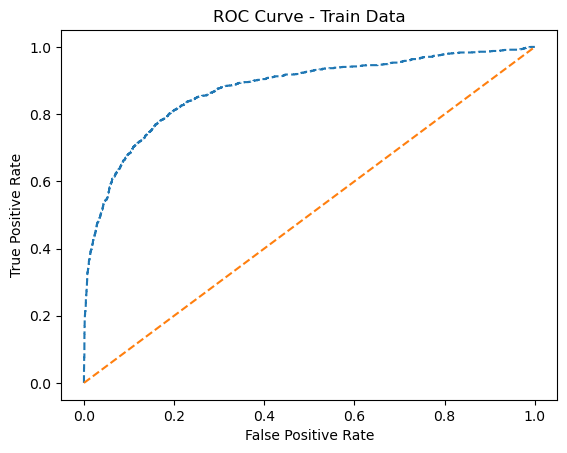

In [190]:
# Plot ROC Curve for Test Data
fpr, tpr, _ = roc_curve(y_train, model.predict_proba(X_train)[:, 1])
plt.plot(fpr, tpr, [0, 1], [0, 1],linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Train Data')
plt.show()

### Logistic Regression Model - Test Performance

In [191]:
# Predict on the test data
y_test_pred = model.predict(X_test)

In [192]:
# Evaluate the model on the test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_cm = confusion_matrix(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

In [193]:
print("Test Accuracy:", test_accuracy)
print("Test Confusion Matrix:\n", test_cm)
print("Test ROC-AUC Score:", test_roc_auc)

Test Accuracy: 0.8931320307874482
Test Confusion Matrix:
 [[2732   77]
 [ 284  285]]
Test ROC-AUC Score: 0.8717666851652454


In [194]:
# getting classification report for train data set
print("Classification report for test dataset")
print(classification_report(y_test, y_test_pred))

Classification report for test dataset
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2809
           1       0.79      0.50      0.61       569

    accuracy                           0.89      3378
   macro avg       0.85      0.74      0.78      3378
weighted avg       0.89      0.89      0.88      3378



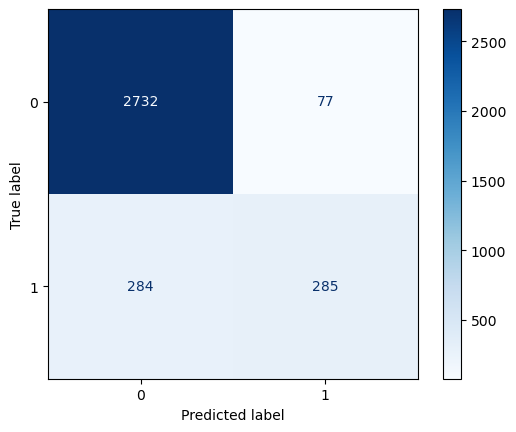

In [195]:
test_cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=test_cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

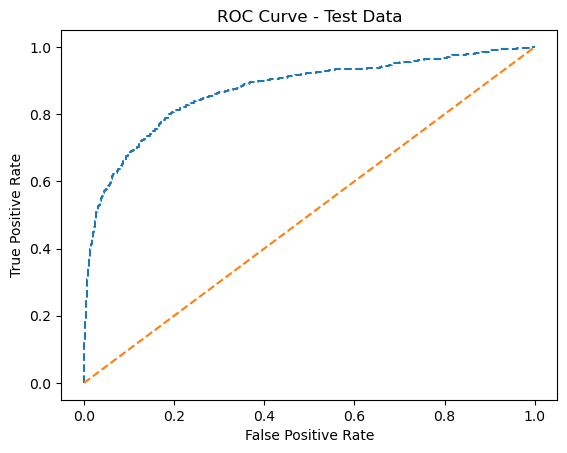

In [196]:
# Plot ROC Curve for Test Data
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr,[0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test Data')
plt.show()

In [197]:
from sklearn.model_selection import cross_val_score
# Perform 5-fold cross-validation on the training data
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

# Print the average cross-validation score on the training set
print("Cross-Validation Score (Training Set):", cv_scores)

Cross-Validation Score (Training Set): [0.88142042 0.88395688 0.88705584 0.88642132 0.89403553]


In [198]:
# Perform 5-fold cross-validation on the testing data
cv_scores = cross_val_score(model, X_test, y_test, cv=5)

# Print the average cross-validation score on the training set
print("Cross-Validation Score (Testing Set):", cv_scores)


Cross-Validation Score (Testing Set): [0.8816568  0.87721893 0.88905325 0.88148148 0.89481481]


### Hyperparameter Tunning

- Hyperparameter tuning refers to the process of optimizing the hyperparameters of a machine learning model to improve its - performance. Hyperparameters are parameters that are set before the learning process begins and are not learned from the data, unlike model parameters. Examples of hyperparameters include the learning rate in neural networks, the number of trees in a random forest, or the C parameter in support vector machines.

**Why Hyperparameter Tuning is Important?**

Hyperparameters can significantly influence the performance of a machine learning model. Tuning them properly can lead to a more accurate and generalized model, which performs better on unseen data.

In [199]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the model
logistic = LogisticRegression()

# Define the hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],  # Note that not all solvers support all penalties
    'solver': ['liblinear', 'saga', 'lbfgs'],  # Adjust based on penalty choice
    'max_iter': [100, 200, 300]
}

# Initialize the grid search with cross-validation
grid_search = GridSearchCV(logistic, param_grid, cv=5, scoring='accuracy', verbose=1)

In [200]:
# Fit the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


/Users/ishashukla/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ishashukla/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ishashukla/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ishashukla/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ishashukla/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ishashukla/anaconda3/lib/python3.

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga', 'lbfgs']},
             scoring='accuracy', verbose=1)

In [201]:
# Best parameters
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [202]:
# Best model
best_logistic = grid_search.best_estimator_

### Logistic Regression Grid Search CV - Training Set

In [203]:
# Predicting the classes on the training data
y_train_pred = best_logistic.predict(X_train)

# If you want to get the probability estimates
y_train_pred_prob = best_logistic.predict_proba(X_train)[:, 1]  # Probabilities for the positive class

In [204]:
best_logistic.fit(X_train, y_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [205]:
# Predict on training data
y_train_pred = best_logistic.predict(X_train)
y_train_pred_prob = best_logistic.predict_proba(X_train)[:, 1]

In [206]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import pandas as pd

# Define the function to evaluate model performance
def model_performance_classification(model, predictors, target, threshold=0.5):
    y_pred_prob = model.predict_proba(predictors)[:, 1]  # Get probability of positive class
    y_pred = (y_pred_prob >= threshold).astype(int)  # Binarize predictions based on the threshold

    acc = accuracy_score(target, y_pred)  # Compute Accuracy
    recall = recall_score(target, y_pred)  # Compute Recall
    precision = precision_score(target, y_pred)  # Compute Precision
    f1 = f1_score(target, y_pred)  # Compute F1-score

    # Create a DataFrame of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": [acc], "Recall": [recall], "Precision": [precision], "F1": [f1]},
    )

    return df_perf

# Assume `best_logistic` is your trained logistic regression model
best_logistic.fit(X_train, y_train)

# Evaluate performance on training data
train_performance = model_performance_classification(best_logistic, X_train, y_train)
print(train_performance)

   Accuracy    Recall  Precision        F1
0  0.887338  0.471741   0.769988  0.585047


In [207]:
# Now, get the classification report for the training dataset
print("Classification report for the training dataset")
print(classification_report(y_train, y_train_pred))

Classification report for the training dataset
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      6555
           1       0.77      0.47      0.58      1327

    accuracy                           0.89      7882
   macro avg       0.84      0.72      0.76      7882
weighted avg       0.88      0.89      0.88      7882



In [208]:
# confusion matrix of train dataset
print("confusion matrix for train dataset")
cm=confusion_matrix(y_train, y_train_pred)
confusion_matrix(y_train, y_train_pred)

confusion matrix for train dataset


array([[6369,  186],
       [ 704,  623]])

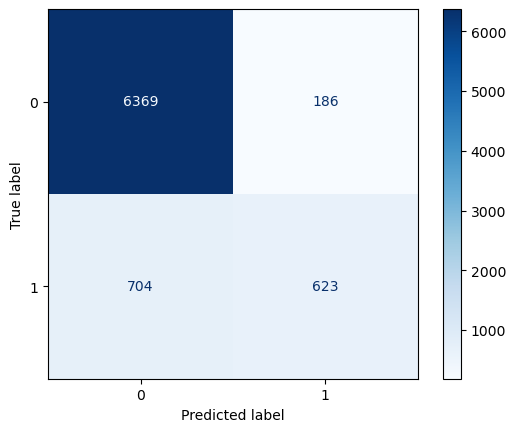

In [209]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [210]:
# Perform 5-fold cross-validation on the training data
cv_scores = cross_val_score(best_logistic, X_train, y_train, cv=5)

# Print the average cross-validation score on the training set
print("Cross-Validation Score (Training Set):", cv_scores)


Cross-Validation Score (Training Set): [0.88585923 0.884591   0.88959391 0.88642132 0.8927665 ]


### Logistic Regression Grid Search CV - Testing Set

In [211]:
# Predicting the classes on the testing data
y_test_pred = best_logistic.predict(X_test)

# If you want to get the probability estimates
y_test_pred_prob = best_logistic.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

In [212]:
# Predict on testing data
y_test_pred = best_logistic.predict(X_test)
y_test_pred_prob = best_logistic.predict_proba(X_test)[:, 1]

In [213]:
# Evaluate performance on testing data
test_performance = model_performance_classification(best_logistic, X_test, y_test)
print("Testing Performance:")
print(test_performance)

Testing Performance:
   Accuracy    Recall  Precision        F1
0  0.890468  0.492091   0.775623  0.602151


In [214]:
# getting classification report for train data set
print("Classification report for test dataset")
print(classification_report(y_test,y_test_pred))

Classification report for test dataset
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      2809
           1       0.78      0.49      0.60       569

    accuracy                           0.89      3378
   macro avg       0.84      0.73      0.77      3378
weighted avg       0.88      0.89      0.88      3378



In [215]:
# confusion matrix of train dataset
print("confusion matrix for test dataset")
confusion_matrix(y_test, y_test_pred)

confusion matrix for test dataset


array([[2728,   81],
       [ 289,  280]])

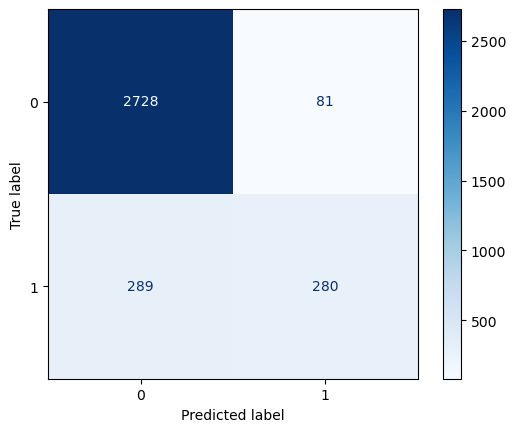

In [216]:
cm_test=confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp.plot(cmap=plt.cm.Blues)
plt.show()

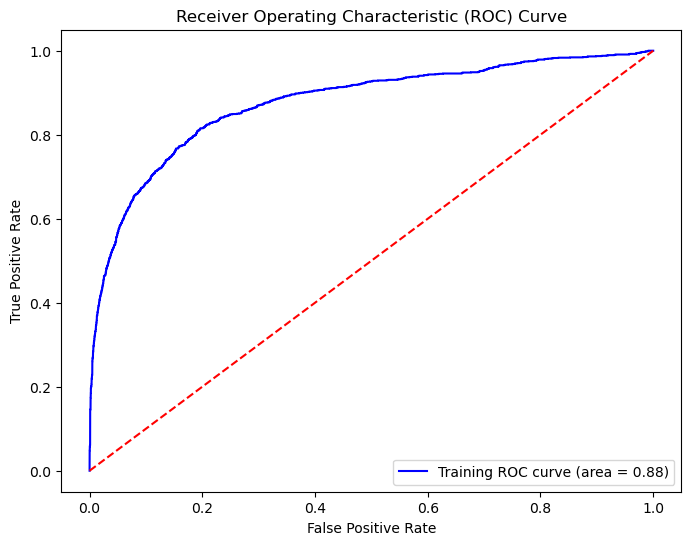

In [217]:


from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt



#  Calculate ROC curve and AUC for training data
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_prob)
roc_auc_train = roc_auc_score(y_train, y_train_pred_prob)



# Step 4: Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', label=f'Training ROC curve (area = {roc_auc_train:.2f})')

# Plotting the diagonal line (reference line for no-skill classifier)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

# Add axis labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Show the legend
plt.legend(loc="lower right")

# Show the plot
plt.show()

In [218]:
# Calculate ROC curve and AUC for testing data
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)
roc_auc_test = roc_auc_score(y_test, y_test_pred_prob)

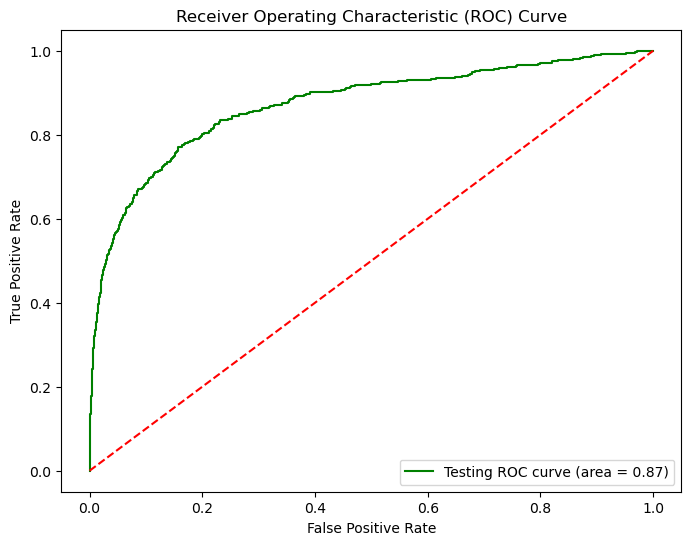

In [219]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, color='green', label=f'Testing ROC curve (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [220]:
from sklearn.model_selection import cross_val_score

print("cross validation score for training dataset")
scores_lgcv_train = cross_val_score(best_logistic, X_train, y_train, cv=5)
print(scores_lgcv_train)

cross validation score for training dataset
[0.88649334 0.884591   0.88959391 0.88642132 0.8927665 ]


In [221]:
from sklearn.model_selection import cross_val_score

print("cross validation score for testing dataset")
scores_lgcv_test = cross_val_score(best_logistic, X_test, y_test, cv=5)
print(scores_lgcv_test)

cross validation score for testing dataset
[0.87721893 0.88017751 0.8816568  0.86962963 0.89777778]


### Building Logistic regression model using SMOTE

In [222]:
# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)

In [223]:
# Fit the model on the resampled training data
model.fit(X_train_res, y_train_res)

LogisticRegression(max_iter=1000, random_state=42)

In [224]:
# Predict on the resampled training data
y_train_pred_res = model.predict(X_train_res)

In [225]:
# Predict on the test data
y_test_pred = model.predict(X_test)

### Logistic Regression - Training

In [226]:
# Evaluate the model on the resampled training data
train_accuracy_res = accuracy_score(y_train_res, y_train_pred_res)
train_cm_res = confusion_matrix(y_train_res, y_train_pred_res)
train_roc_auc_res = roc_auc_score(y_train_res, model.predict_proba(X_train_res)[:, 1])

In [227]:
# Display results for the resampled training data
print("Resampled Training Accuracy:", train_accuracy_res)
print("Resampled Training Confusion Matrix:\n", train_cm_res)
print("Resampled Training ROC-AUC Score:", train_roc_auc_res)

Resampled Training Accuracy: 0.8109839816933638
Resampled Training Confusion Matrix:
 [[5182 1373]
 [1105 5450]]
Resampled Training ROC-AUC Score: 0.8815377015815832


In [228]:
print("Training set classification report:")
print(classification_report(y_train_res, y_train_pred_res))

Training set classification report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      6555
           1       0.80      0.83      0.81      6555

    accuracy                           0.81     13110
   macro avg       0.81      0.81      0.81     13110
weighted avg       0.81      0.81      0.81     13110



In [229]:
print("Training set confusion matrix:")
print(confusion_matrix(y_train_res, y_train_pred_res))

Training set confusion matrix:
[[5182 1373]
 [1105 5450]]


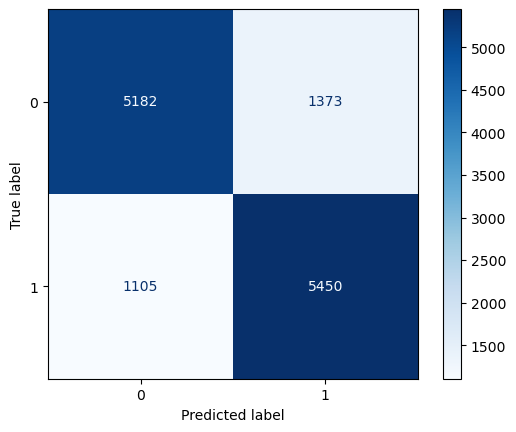

In [230]:
cm_train=confusion_matrix(y_train_res, y_train_pred_res)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp.plot(cmap=plt.cm.Blues)
plt.show()

AUC score and ROC curve for training dataset
AUC: 0.882


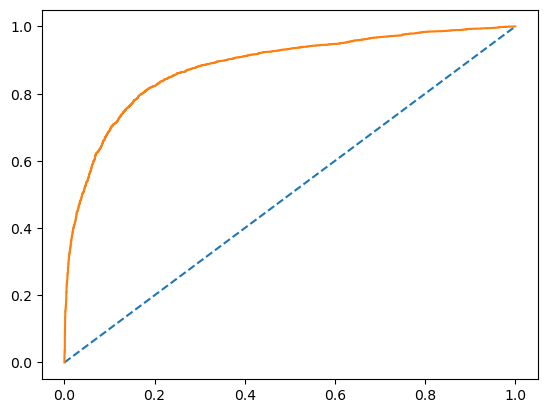

In [231]:

# predict probabilities
probs = model.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### Logistic Regression - Testing

In [232]:
# Evaluate the model on the original test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_cm = confusion_matrix(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

In [233]:
print("Testing set classification report using SMOTE:")
print(classification_report(y_test, y_test_pred))

Testing set classification report using SMOTE:
              precision    recall  f1-score   support

           0       0.95      0.78      0.86      2809
           1       0.43      0.82      0.56       569

    accuracy                           0.79      3378
   macro avg       0.69      0.80      0.71      3378
weighted avg       0.87      0.79      0.81      3378



In [234]:
# Display results for the original test data
print("Test Accuracy:", test_accuracy)
print("Test Confusion Matrix:\n", test_cm)
print("Test ROC-AUC Score:", test_roc_auc)

Test Accuracy: 0.7850799289520426
Test Confusion Matrix:
 [[2188  621]
 [ 105  464]]
Test ROC-AUC Score: 0.8697176599694304


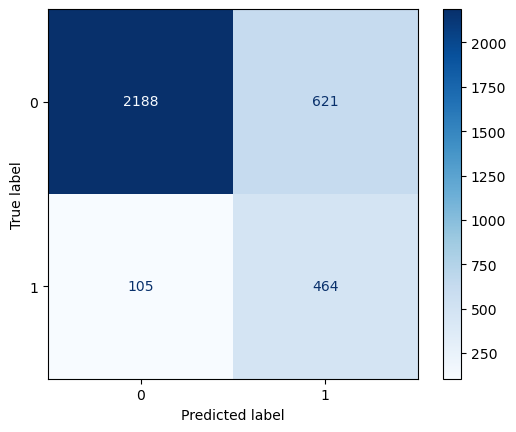

In [235]:
disp = ConfusionMatrixDisplay(confusion_matrix=test_cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

AUC score and ROC curve for testing dataset
AUC: 0.870


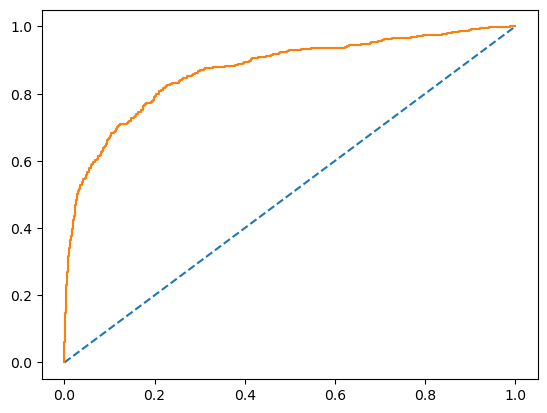

In [236]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [237]:
print("cross validation score for balanced training dataset")
scores_lgsm_train = cross_val_score(model, X_train_res, y_train_res, cv=5)
scores_lgsm_train

cross validation score for balanced training dataset


array([0.79595728, 0.81617086, 0.81083143, 0.80968726, 0.81884058])

In [238]:
print("cross validation score for testing dataset")
scores_lgsm_test = cross_val_score(model, X_test, y_test, cv=5)
scores_lgsm_test

cross validation score for testing dataset


array([0.8816568 , 0.87721893, 0.88905325, 0.88148148, 0.89481481])

### Building Linear Discriminant Analysis Model (LDA)

In [239]:
#building Linear Discriminant Analysis (LDA)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [240]:
# fitting LDA model into training dataset
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)
lda

LinearDiscriminantAnalysis()

In [241]:
# Training Data Class Prediction
ytrain_predict_lda = lda.predict(X_train)

# Test Data Class Prediction
ytest_predict_lda = lda.predict(X_test)

In [242]:
#Accuracy - Training dataset
print("Accuracy score of training dataset:",lda.score(X_train, y_train))

Accuracy score of training dataset: 0.8808678000507485


In [243]:
# Accuracy - Test Data
print("Accuracy score of testing dataset:",lda.score(X_test, y_test))

Accuracy score of testing dataset: 0.8854351687388987


In [244]:
print("Confusion matrix of training dataset")
confusion_matrix(y_train, ytrain_predict_lda)

Confusion matrix of training dataset


array([[6385,  170],
       [ 769,  558]])

In [245]:
print("Confusion matrix of testing dataset")
confusion_matrix(y_test, ytest_predict_lda)

Confusion matrix of testing dataset


array([[2742,   67],
       [ 320,  249]])

In [246]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict_lda),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict_lda),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.89      0.97      0.93      6555
           1       0.77      0.42      0.54      1327

    accuracy                           0.88      7882
   macro avg       0.83      0.70      0.74      7882
weighted avg       0.87      0.88      0.87      7882
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.90      0.98      0.93      2809
           1       0.79      0.44      0.56       569

    accuracy                           0.89      3378
   macro avg       0.84      0.71      0.75      3378
weighted avg       0.88      0.89      0.87      3378
 



AUC score and ROC curve for training dataset
AUC: 0.868


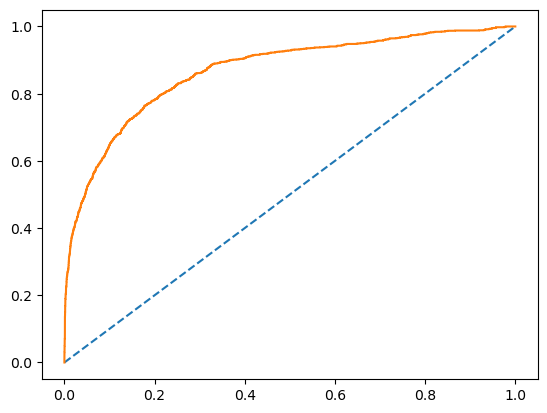

In [247]:
#creating ROC curve and getting AUC score for train data set
#predict probabilities
from sklearn.metrics import roc_auc_score

probs1 = lda.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs1 = probs1[:, 1]
# calculate AUC
train_auc1 = roc_auc_score(y_train, probs1)
print("AUC score and ROC curve for training dataset")
print('AUC: %.3f' % train_auc1)

# Calculate ROC curve
train_fpr1, train_tpr1, train_thresholds1 = roc_curve(y_train, probs1)

plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr1, train_tpr1);

AUC score and ROC curve for testing dataset
AUC: 0.867


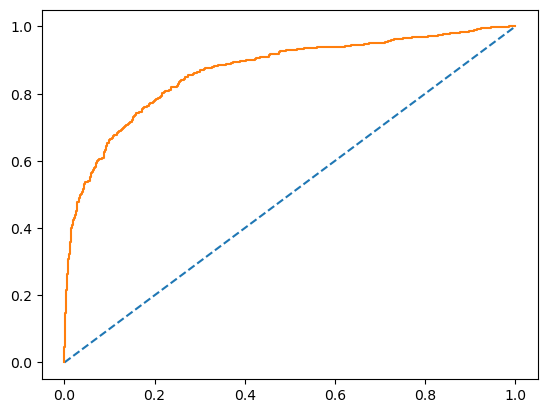

In [248]:
# creating ROC curve and getting AUC score for train data set
# predict probabilities
probs2 = lda.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs2 = probs2[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
test_auc = roc_auc_score(y_test, probs2)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr2, test_tpr2, test_thresholds2 = roc_curve(y_test, probs2)
plt.plot([0, 1], [0, 1], linestyle='--')
#plot the roc curve for the model
plt.plot(test_fpr2, test_tpr2);

In [249]:
print("cross validation score for training dataset")
scores_lda_train = cross_val_score(lda, X_train, y_train, cv=10)
scores_lda_train

cross validation score for training dataset


array([0.88212928, 0.8643853 , 0.88324873, 0.87690355, 0.8819797 ,
       0.87817259, 0.87690355, 0.88959391, 0.89467005, 0.87817259])

In [250]:
print("cross validation score for testing dataset")
scores_lda_test = cross_val_score(lda, X_test, y_test, cv=10)
scores_lda_test

cross validation score for testing dataset


array([0.88757396, 0.87278107, 0.88757396, 0.86982249, 0.86094675,
       0.89940828, 0.90532544, 0.86094675, 0.884273  , 0.89614243])

### Building LDA model using GridSearchCV

In [251]:
# Define the LDA model
lda = LinearDiscriminantAnalysis()

# Define the hyperparameter space to search
param_grid = {
    'n_components': [1, 2, 3, 4, 5],
    'shrinkage': ['auto', None],
    'solver': ['lsqr', 'eigen']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator = lda, param_grid = param_grid, cv = 5, n_jobs=-1,scoring='accuracy')

In [252]:
# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

/Users/ishashukla/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
80 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/ishashukla/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ishashukla/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/ishashukla/anaconda3/lib/python3.11/site-packages/sklearn/dis

GridSearchCV(cv=5, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'n_components': [1, 2, 3, 4, 5],
                         'shrinkage': ['auto', None],
                         'solver': ['lsqr', 'eigen']},
             scoring='accuracy')

In [253]:

# Get the best-performing model and its hyperparameters
best_lda = grid_search.best_estimator_
best_params = grid_search.best_params_

In [254]:
print("Best LDA model:", best_lda)
print("Best hyperparameters:", best_params)

Best LDA model: LinearDiscriminantAnalysis(n_components=1, shrinkage='auto', solver='lsqr')
Best hyperparameters: {'n_components': 1, 'shrinkage': 'auto', 'solver': 'lsqr'}


In [255]:
# Evaluate the best-performing model on the test set
y_pred = best_lda.predict(X_test)
print("Test set accuracy:", accuracy_score(y_test, y_pred))

Test set accuracy: 0.8854351687388987


In [256]:
# Evaluate the best-performing model on the test set
y_train_pred = best_lda.predict(X_train)
print("Train set accuracy:", accuracy_score(y_train, y_train_pred))

Train set accuracy: 0.8809946714031972


In [257]:
# getting classification report for train data set
print("Classification report for train dataset")
print(classification_report(y_train, y_train_pred))

Classification report for train dataset
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6555
           1       0.77      0.42      0.54      1327

    accuracy                           0.88      7882
   macro avg       0.83      0.70      0.74      7882
weighted avg       0.87      0.88      0.87      7882



In [258]:
# getting classification report for train data set
print("Classification report for test dataset")
print(classification_report(y_test, y_pred))

Classification report for test dataset
              precision    recall  f1-score   support

           0       0.90      0.98      0.93      2809
           1       0.79      0.44      0.56       569

    accuracy                           0.89      3378
   macro avg       0.84      0.71      0.75      3378
weighted avg       0.88      0.89      0.87      3378



In [259]:
# confusion matrix for training data set
print("confusuon matrix for training dataset")
confusion_matrix(y_train, y_train_pred)

confusuon matrix for training dataset


array([[6387,  168],
       [ 770,  557]])

In [260]:
# confusion matrix for testing data set
print("confusuon matrix for testing dataset")
confusion_matrix(y_test, y_pred)

confusuon matrix for testing dataset


array([[2743,   66],
       [ 321,  248]])

AUC score and ROC curve for training dataset
AUC: 0.868


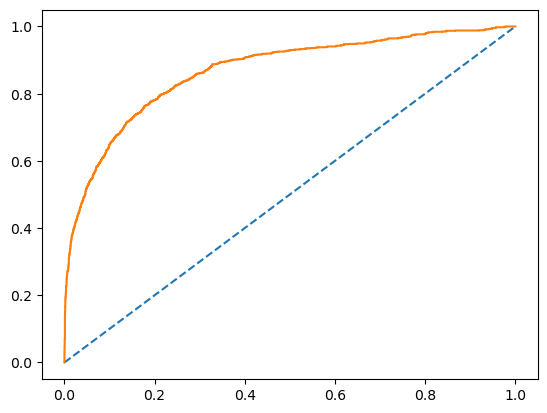

In [261]:
# predict probabilities
probs = best_lda.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);


AUC score and ROC curve for testing dataset
AUC: 0.867


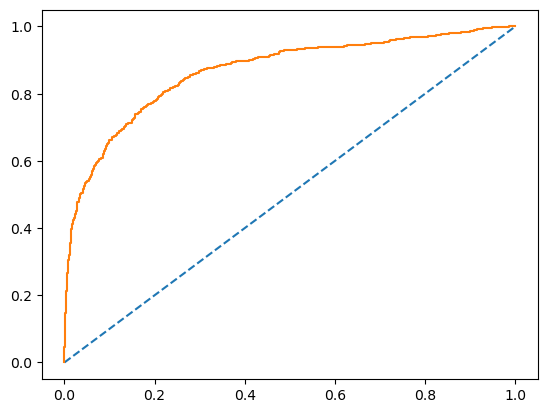

In [262]:
# predict probabilities
probs = best_lda.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [263]:
print("cross validation scores for training dataset")
scores_ldacv_train = cross_val_score(best_lda, X_train, y_train, cv=5)
scores_ldacv_train

cross validation scores for training dataset


array([0.87317692, 0.88142042, 0.88071066, 0.88324873, 0.88705584])

In [264]:
print("cross validation scores for testing dataset")
scores_ldacv_test = cross_val_score(best_lda, X_test, y_test, cv=5)
scores_ldacv_test

cross validation scores for testing dataset


array([0.87573964, 0.87573964, 0.8816568 , 0.88      , 0.88444444])

### Building LDA model using SMOTE

In [265]:
#fitting model into training dataset
lda.fit(X_train_res, y_train_res)

LinearDiscriminantAnalysis()

In [266]:
# predict on train and test data set with balanced dataset
ytrain_predict_ldasm = lda.predict(X_train_res) # can compare with y_train
ytest_predict_ldasm = lda.predict(X_test) # can compare with y_test

In [267]:
#Accuracy - Training Data with balanced dataset
print("Accuracy of training dataset:",lda.score(X_train_res, y_train_res))

Accuracy of training dataset: 0.8068649885583524


In [268]:
#Accuracy - testing Data
print("Accuracy of testing dataset:",lda.score(X_test, y_test))

Accuracy of testing dataset: 0.7693901716992303


In [269]:
print("Classification report for train dataset")
print(classification_report(y_train_res, ytrain_predict_ldasm))

Classification report for train dataset
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      6555
           1       0.79      0.84      0.81      6555

    accuracy                           0.81     13110
   macro avg       0.81      0.81      0.81     13110
weighted avg       0.81      0.81      0.81     13110



In [270]:
# print("Classification report for test dataset")
print(classification_report(y_test, ytest_predict_ldasm))

              precision    recall  f1-score   support

           0       0.96      0.76      0.85      2809
           1       0.41      0.83      0.55       569

    accuracy                           0.77      3378
   macro avg       0.68      0.79      0.70      3378
weighted avg       0.86      0.77      0.80      3378



In [271]:
print("confusion matrix for training dataset")
confusion_matrix(y_train_res, ytrain_predict_ldasm)

confusion matrix for training dataset


array([[5045, 1510],
       [1022, 5533]])

In [272]:
print("confusion matrix for testing dataset")
confusion_matrix(y_test, ytest_predict_ldasm)

confusion matrix for testing dataset


array([[2128,  681],
       [  98,  471]])

AUC score and ROC curve for training dataset
AUC: 0.88


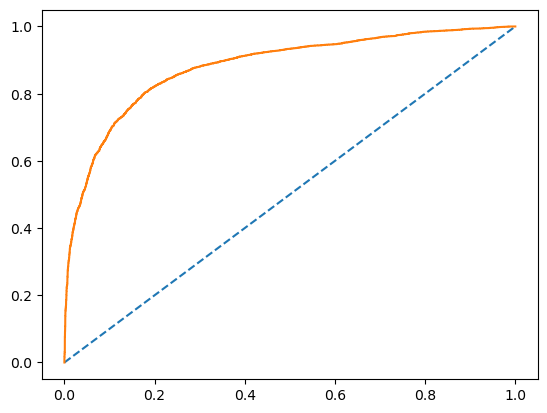

In [273]:
# predict probabilities
probs = lda.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.2f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.87


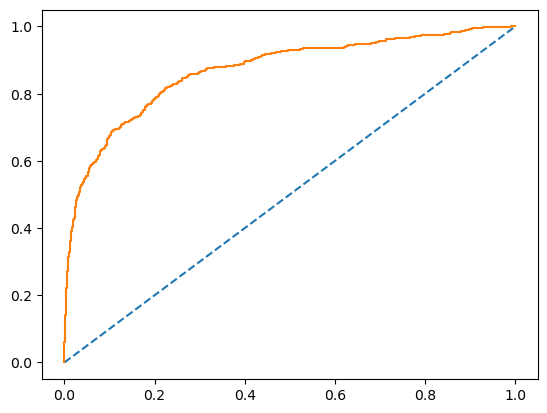

In [274]:
# predict probabilities
probs = lda.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [275]:
print("cross validation scores for training dataset")
scores_ldasm_train = cross_val_score(lda, X_train_res, y_train_res, cv=10)
scores_ldasm_train

cross validation scores for training dataset


array([0.79176201, 0.79328757, 0.80396644, 0.81464531, 0.82684973,
       0.79710145, 0.80320366, 0.80396644, 0.81769641, 0.80549199])

In [276]:
print("cross validation scores for testing dataset")
scores_ldasm_test = cross_val_score(lda, X_test, y_test, cv=10)
scores_ldasm_test

cross validation scores for testing dataset


array([0.88757396, 0.87278107, 0.88757396, 0.86982249, 0.86094675,
       0.89940828, 0.90532544, 0.86094675, 0.884273  , 0.89614243])

### K-Nearest Neighbors (KNN) Model

In [277]:
# Create a KNN model
knn = KNeighborsClassifier(n_neighbors=5)

In [278]:
# Fit the model to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [279]:
import numpy as np

# Convert to a NumPy array if not already
X_train = np.array(X_train)

# Ensure the array is contiguous in memory
X_train = np.ascontiguousarray(X_train)

# Now try predicting
y_pred_train = knn.predict(X_train)

/Users/ishashukla/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [280]:
import numpy as np

# Convert to a NumPy array if not already
X_test = np.array(X_test)

# Ensure the array is contiguous in memory
X_test = np.ascontiguousarray(X_test)
# Predict on the testing data
y_test_pred = knn.predict(X_test)

/Users/ishashukla/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [281]:
# Calculate the accuracy of the training set
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training set accuracy:", train_accuracy)

Training set accuracy: 0.9269221009895966


In [282]:
# Calculate the accuracy of the testing set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing set accuracy:", test_accuracy)

Testing set accuracy: 0.8809946714031972


In [283]:
# Evaluate the model on the training set
print("Classification Report for Training Set:")
print(classification_report(y_train, y_pred_train))
print("Confusion Matrix for Training Set:")
print(confusion_matrix(y_train, y_pred_train))

Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      6555
           1       0.86      0.68      0.76      1327

    accuracy                           0.93      7882
   macro avg       0.90      0.83      0.86      7882
weighted avg       0.92      0.93      0.92      7882

Confusion Matrix for Training Set:
[[6403  152]
 [ 424  903]]


In [284]:
cm_train=confusion_matrix(y_train, y_pred_train)

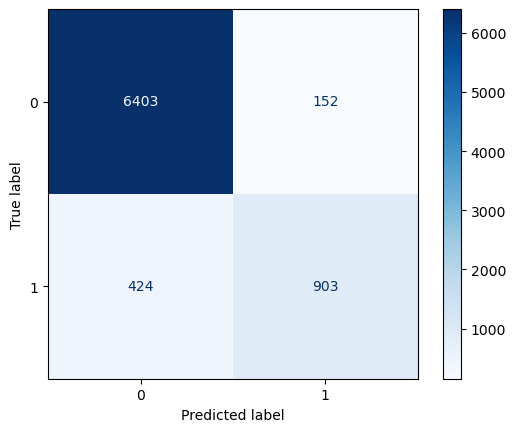

In [285]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [286]:
# Evaluate the model on the testing set
print("Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      2809
           1       0.70      0.51      0.59       569

    accuracy                           0.88      3378
   macro avg       0.80      0.73      0.76      3378
weighted avg       0.87      0.88      0.87      3378

Confusion Matrix:
[[2684  125]
 [ 277  292]]


In [287]:
cm_test=confusion_matrix(y_test, y_test_pred)

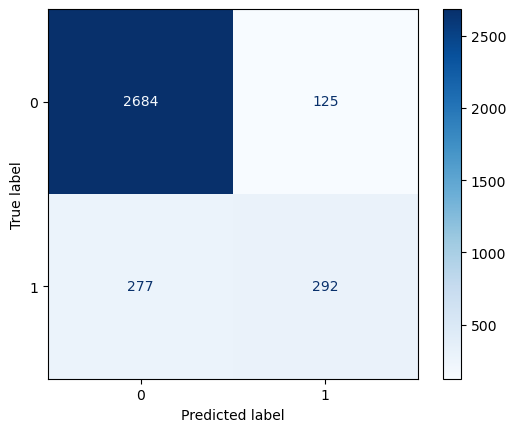

In [288]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp.plot(cmap=plt.cm.Blues)
plt.show()

Training AUC: 0.829


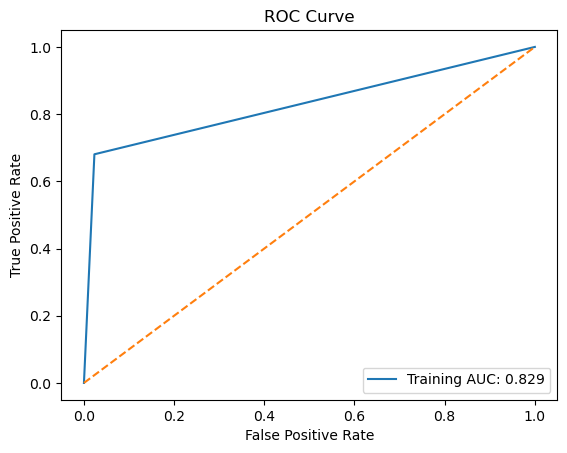

In [289]:
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate ROC AUC score and curve for training set
train_auc = roc_auc_score(y_train, y_pred_train)
print('Training AUC: %.3f' % train_auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_pred_train)
plt.plot(train_fpr, train_tpr, label='Training AUC: %.3f' % train_auc)


plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Testing AUC: 0.734


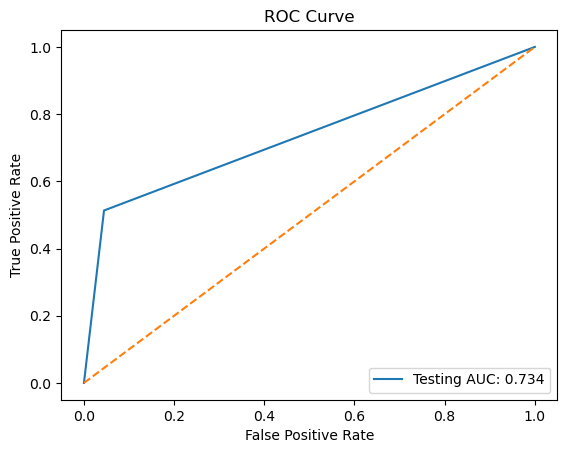

In [290]:
# Calculate ROC AUC score and curve for testing set
test_auc = roc_auc_score(y_test, y_test_pred)
print('Testing AUC: %.3f' % test_auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(test_fpr, test_tpr, label='Testing AUC: %.3f' % test_auc)

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [291]:
scores_train = cross_val_score(knn, X_train, y_train, cv=5)
print("Training set cross-validation scores:", scores_train)
print("Training set cross-validation accuracy:", scores_train.mean())

Training set cross-validation scores: [0.87127457 0.86746988 0.86865482 0.87309645 0.87246193]
Training set cross-validation accuracy: 0.8705915298919429


In [292]:
# Perform cross-validation for testing set
scores_test = cross_val_score(knn, X_test, y_test, cv=5)
print("Testing set cross-validation scores:", scores_test)
print("Testing set cross-validation accuracy:", scores_test.mean())

Testing set cross-validation scores: [0.86390533 0.86686391 0.86390533 0.85333333 0.83407407]
Testing set cross-validation accuracy: 0.856416392724085


In [293]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to MSE
MCE = [1 - x for x in ac_scores]

MCE

[0.0885139135583185,
 0.11456483126110129,
 0.1190053285968028,
 0.12492599171107166,
 0.1308466548253404,
 0.1329188869153345,
 0.13351095322676143,
 0.1382474837181764,
 0.13943161634103018,
 0.14624037892243935]

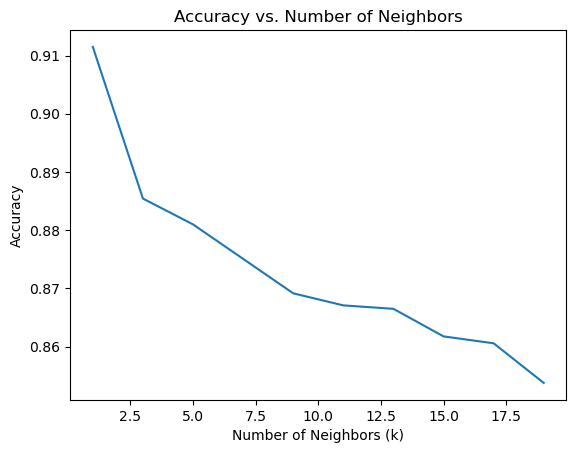

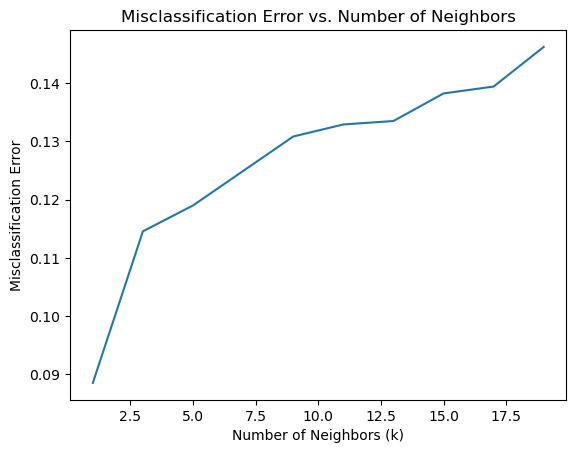

In [294]:
# plot the results
plt.plot(range(1,20,2), ac_scores)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors')
plt.show()

plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs. Number of Neighbors')
plt.show()

To find the ideal value of k, by look for the value that corresponds to the lowest MCE. In this case, the lowest MCE is approximately 0.1596, which corresponds to k=3.

So, the ideal value of k is 3.

In [295]:
#from sklearn.neighbors import KNeighborsClassifier

knn3=KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [296]:
# Performance Matrix on train data set
ytrain_predict_knn3 = knn3.predict(X_train)
print("accuracy for training dataset:",knn3.score(X_train, y_train))

print("confusion matrix for training dataset")
print(confusion_matrix(y_train, ytrain_predict_knn3))

print("classification report for training dataset")
print(classification_report(y_train, ytrain_predict_knn3))

accuracy for training dataset: 0.9529307282415631
confusion matrix for training dataset
[[6414  141]
 [ 230 1097]]
classification report for training dataset
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      6555
           1       0.89      0.83      0.86      1327

    accuracy                           0.95      7882
   macro avg       0.93      0.90      0.91      7882
weighted avg       0.95      0.95      0.95      7882



In [297]:
# Performance Matrix on test data set
ytest_predict_knn3 = knn3.predict(X_test)
print("accuracy score for testing dataset:",knn3.score(X_test, y_test))

print("confusion matrix for testing dataset")
print(confusion_matrix(y_test, ytest_predict_knn3))

print("classification report for testing dataset")
print(classification_report(y_test, ytest_predict_knn3))

accuracy score for testing dataset: 0.8854351687388987
confusion matrix for testing dataset
[[2643  166]
 [ 221  348]]
classification report for testing dataset
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      2809
           1       0.68      0.61      0.64       569

    accuracy                           0.89      3378
   macro avg       0.80      0.78      0.79      3378
weighted avg       0.88      0.89      0.88      3378



In [298]:
0.9529307282415631 - 0.8854351687388987

0.06749555950266439

AUC score and ROC curve for training dataset
AUC: 0.983


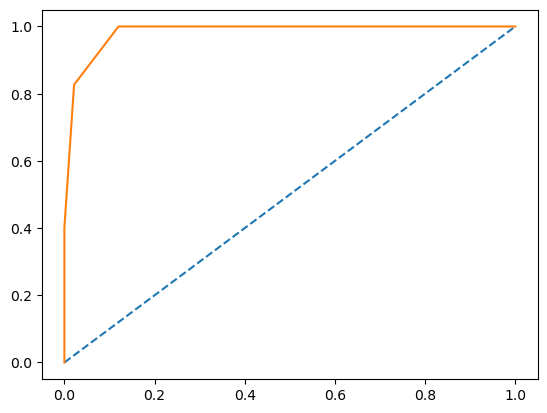

In [299]:
# predict probabilities
probs = knn3.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.875


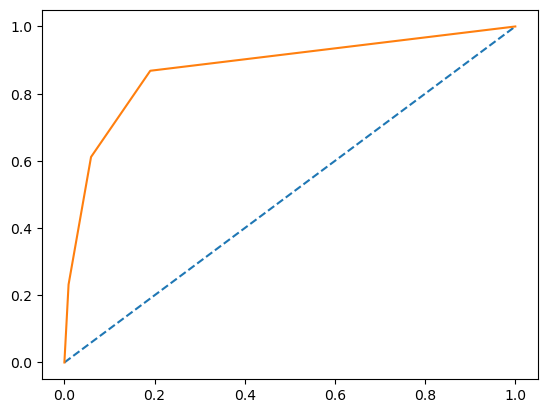

In [300]:
# predict probabilities
probs = knn3.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [301]:
print("cross validation scores for training dataset")
scores_knn3_train = cross_val_score(knn3, X_train, y_train, cv=5)
scores_knn3_train

cross validation scores for training dataset


array([0.87571338, 0.86810399, 0.87436548, 0.87944162, 0.86294416])

In [302]:
print("cross validation scores for testing dataset")
scores_knn3_test = cross_val_score(knn3, X_test, y_test, cv=5)
scores_knn3_test

cross validation scores for testing dataset


array([0.87721893, 0.87573964, 0.87130178, 0.85777778, 0.84740741])

### Building KNN model using GridSearchCV

In [303]:
# Define the hyperparameter space for KNN
param_grid = {
    'n_neighbors': [5,7,9],
    'weights' : ['uniform','distance'],
    'metric' : ['euclidean', 'manhattan'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
    
}

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

In [304]:
# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=19),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [305]:
# Get the best-performing model and its hyperparameters
best_knn = grid_search.best_estimator_
best_params = grid_search.best_params_

In [306]:
print("Best-performing model:", best_knn)
print("Best hyperparameters:", best_params)

Best-performing model: KNeighborsClassifier(metric='manhattan', weights='distance')
Best hyperparameters: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


In [307]:
# Evaluate the best-performing model on the training set
y_pred_train = best_knn.predict(X_train)
print("Training set accuracy:", accuracy_score(y_train, y_pred_train))

Training set accuracy: 1.0


In [308]:
# Evaluate the best-performing model on the testing set
y_pred_test = best_knn.predict(X_test)
print("Testing set accuracy:", accuracy_score(y_test, y_pred_test))

Testing set accuracy: 0.9440497335701599


In [309]:
# getting classification report for train data set
print("Classification report for train dataset")
print(classification_report(y_train, y_pred_train))

Classification report for train dataset
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



In [310]:
# getting classification report for test data set
print("Classification report for test dataset")
print(classification_report(y_test, y_pred_test))

Classification report for test dataset
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2809
           1       0.88      0.78      0.82       569

    accuracy                           0.94      3378
   macro avg       0.92      0.88      0.90      3378
weighted avg       0.94      0.94      0.94      3378



In [311]:
# confusion matrix for training data set
print("confusuon matrix for training dataset")
confusion_matrix(y_train, y_pred_train)

confusuon matrix for training dataset


array([[6555,    0],
       [   0, 1327]])

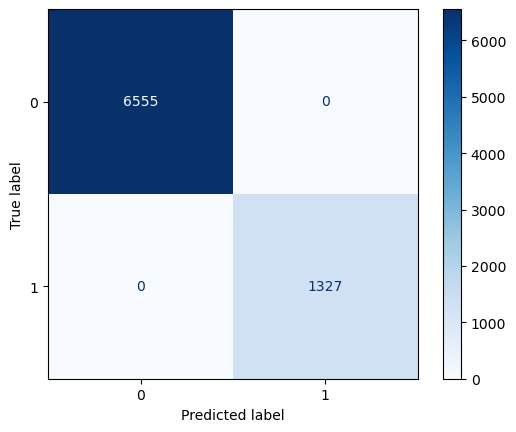

In [312]:
cm_train=confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [313]:
# confusion matrix for testing data set
print("confusuon matrix for testing dataset")
confusion_matrix(y_test, y_pred_test)

confusuon matrix for testing dataset


array([[2747,   62],
       [ 127,  442]])

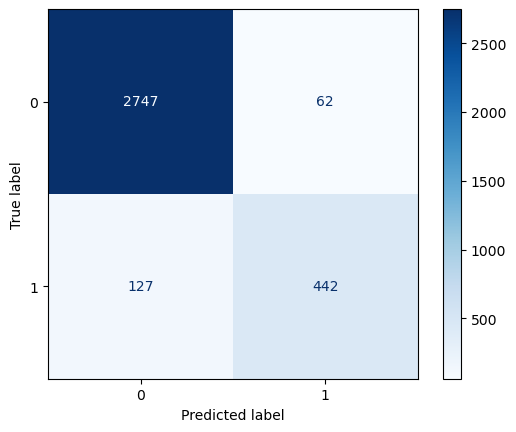

In [314]:
cm_test=confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp.plot(cmap=plt.cm.Blues)
plt.show()

AUC score and ROC curve for training dataset
AUC: 1.000


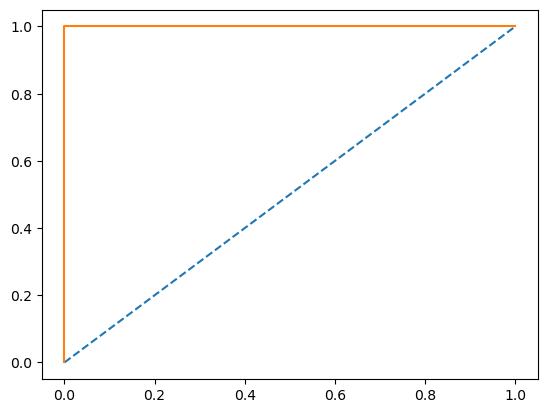

In [315]:
# predict probabilities
probs = best_knn.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC score and ROC curve for testing dataset
AUC: 0.966


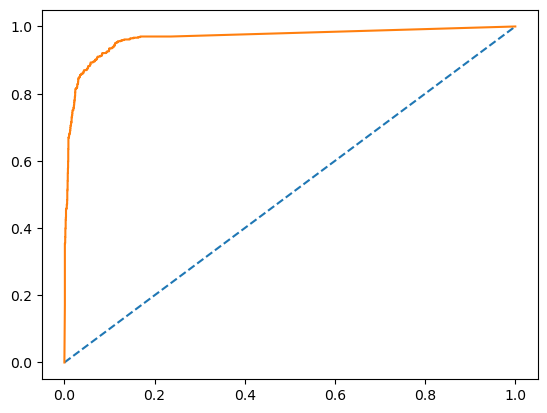

In [316]:
# predict probabilities
probs = best_knn.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [317]:
print("Cross validation scores for train dataset")
scores_knncv_train = cross_val_score(best_knn, X_train, y_train, cv=5)
scores_knncv_train

Cross validation scores for train dataset


array([0.92771084, 0.9220038 , 0.92766497, 0.92639594, 0.92005076])

In [318]:
print("Cross validation scores for test dataset")
scores_knncv_test = cross_val_score(best_knn, X_test, y_test, cv=5)
scores_knncv_test

Cross validation scores for test dataset


array([0.89349112, 0.8964497 , 0.90532544, 0.88148148, 0.89481481])

### Building KNN model over balanced dataset using SMOTE

In [319]:
# Create a KNN model
knn = KNeighborsClassifier(n_neighbors=5)

In [320]:
# Fit the model to the balanced training data
knn.fit(X_train_res, y_train_res)

KNeighborsClassifier()

In [321]:
import numpy as np

# Convert to a NumPy array if not already
X_train_res = np.array(X_train_res)

# Ensure the array is contiguous in memory
X_train_res = np.ascontiguousarray(X_train_res)

# Try predicting again
y_pred_train = knn.predict(X_train_res)

/Users/ishashukla/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [322]:
# Evaluate the model on the training set
print("Training set accuracy:", accuracy_score(y_train_res, y_pred_train))

Training set accuracy: 0.9376811594202898


In [323]:
print("Training set classification report:")
print(classification_report(y_train_res, y_pred_train))
print("Training set confusion matrix:")
print(confusion_matrix(y_train_res, y_pred_train))

Training set classification report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93      6555
           1       0.89      1.00      0.94      6555

    accuracy                           0.94     13110
   macro avg       0.94      0.94      0.94     13110
weighted avg       0.94      0.94      0.94     13110

Training set confusion matrix:
[[5756  799]
 [  18 6537]]


In [324]:
# Predict on the testing data
y_pred_test = knn.predict(X_test)

/Users/ishashukla/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [325]:
# Evaluate the model on the testing set
print("Testing set accuracy:", accuracy_score(y_test, y_pred_test))
print("Testing set classification report:")
print(classification_report(y_test, y_pred_test))
print("Testing set confusion matrix:")
print(confusion_matrix(y_test, y_pred_test))

Testing set accuracy: 0.820307874481942
Testing set classification report:
              precision    recall  f1-score   support

           0       0.97      0.81      0.88      2809
           1       0.48      0.86      0.62       569

    accuracy                           0.82      3378
   macro avg       0.72      0.84      0.75      3378
weighted avg       0.89      0.82      0.84      3378

Testing set confusion matrix:
[[2280  529]
 [  78  491]]


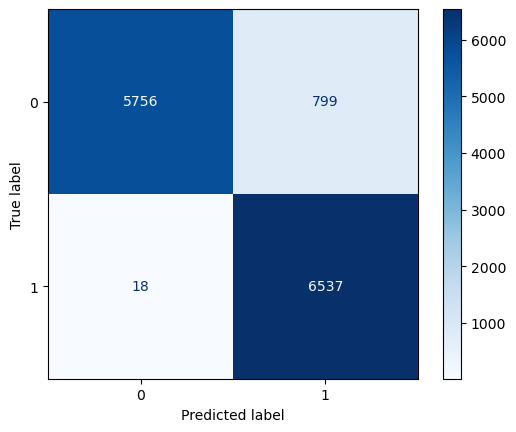

In [326]:
cm_train=confusion_matrix(y_train_res, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp.plot(cmap=plt.cm.Blues)
plt.show()

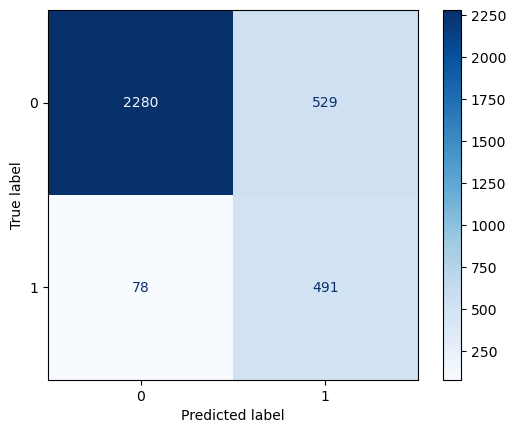

In [327]:
cm_test=confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp.plot(cmap=plt.cm.Blues)
plt.show()

/Users/ishashukla/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Training set AUC-ROC score: 0.9982134505833117


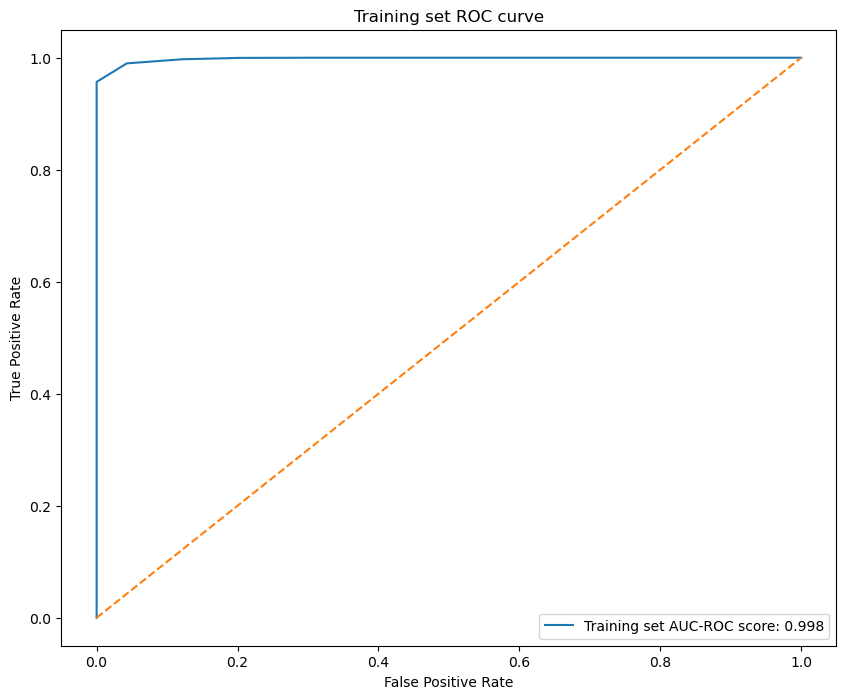

In [328]:
# Calculate the AUC-ROC score for the training set
y_pred_train_proba = knn.predict_proba(X_train_res)[:, 1]
auc_train = roc_auc_score(y_train_res, y_pred_train_proba)
print("Training set AUC-ROC score:", auc_train)
# Plot the ROC curve for the training set
fpr_train, tpr_train, _ = roc_curve(y_train_res, y_pred_train_proba)
plt.figure(figsize=(10, 8))
plt.plot(fpr_train, tpr_train, label='Training set AUC-ROC score: %.3f' % auc_train)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Training set ROC curve')
plt.legend(loc="lower right")
plt.show()

/Users/ishashukla/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Testing set AUC-ROC score: 0.9091737517056961


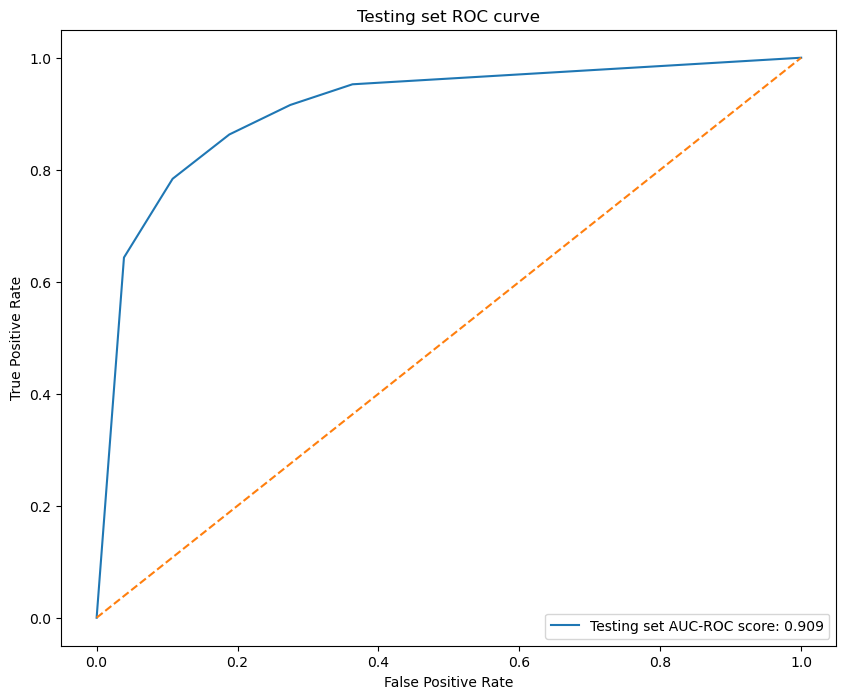

In [329]:
# Calculate the AUC-ROC score for the testing set
y_pred_test_proba = knn.predict_proba(X_test)[:, 1]
auc_test = roc_auc_score(y_test, y_pred_test_proba)
print("Testing set AUC-ROC score:", auc_test)

# Plot the ROC curve for the testing set
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test_proba)
plt.figure(figsize=(10, 8))
plt.plot(fpr_test, tpr_test, label='Testing set AUC-ROC score: %.3f' % auc_test)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Testing set ROC curve')
plt.legend(loc="lower right")
plt.show()

In [330]:
# Perform cross-validation for the training set
scores_train = cross_val_score(knn, X_train_res, y_train_res, cv=5)
print("Training set cross-validation scores:", scores_train)

Training set cross-validation scores: [0.89206712 0.90389016 0.89435545 0.90198322 0.89893211]


In [331]:
# Perform cross-validation for the testing set
scores_test = cross_val_score(knn, X_test, y_test, cv=5)
print("Testing set cross-validation scores:", scores_test)

Testing set cross-validation scores: [0.86390533 0.86686391 0.86390533 0.85333333 0.83407407]


The KNN model using SMOTE is performing well on both the training and testing sets, with high cross-validation scores ranging from 0.892 to 0.904 on the training data and from 0.834 to 0.867 on the testing data, indicating a high degree of accuracy and generalizability, although with a slight decrease in performance on the testing set.

### Gaussian Naive Bayes

- The Gaussian Naive Bayes model is a simple and effective classifier that assumes independence between features and uses Bayesian inference to predict the target variable. It is particularly useful for datasets with continuous features and can provide good performance with minimal tuning.

In [332]:
# Create a Gaussian Naive Bayes model
gnb = GaussianNB()

In [333]:
# Fit the model to the training data
gnb.fit(X_train, y_train)

GaussianNB()

In [334]:
# Predict on the training data
y_pred_train = gnb.predict(X_train)

In [335]:
# Evaluate the model on the training set
print("Training set accuracy:", accuracy_score(y_train, y_pred_train))

Training set accuracy: 0.8605683836589698


In [336]:
# Predict on the testing data
y_pred_test = gnb.predict(X_test)

In [337]:
# Evaluate the model on the testing set
print("Testing set accuracy:", accuracy_score(y_test, y_pred_test))

Testing set accuracy: 0.8502072232089994


In [338]:
print("Training set classification report:")
print(classification_report(y_train, y_pred_train))
print("Training set confusion matrix:")
print(confusion_matrix(y_train, y_pred_train))

Training set classification report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      6555
           1       0.58      0.59      0.59      1327

    accuracy                           0.86      7882
   macro avg       0.75      0.75      0.75      7882
weighted avg       0.86      0.86      0.86      7882

Training set confusion matrix:
[[5994  561]
 [ 538  789]]


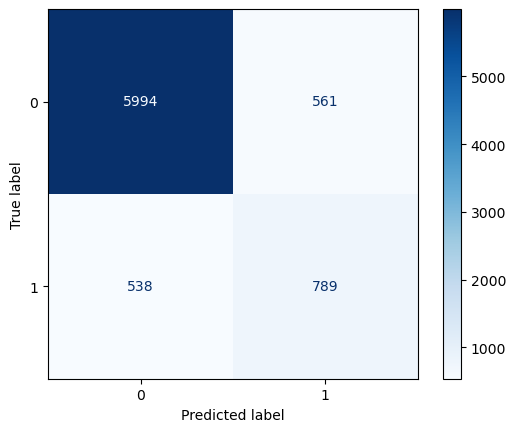

In [339]:
cm_train=confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp.plot(cmap=plt.cm.Blues)
plt.show()

Training set AUC-ROC score: 0.8223655038779742


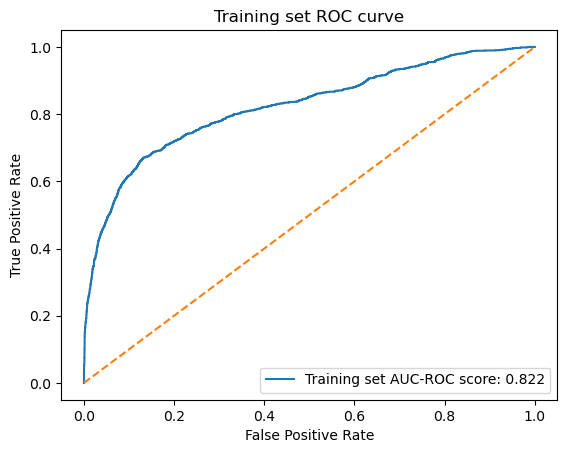

In [340]:
# Calculate the AUC-ROC score for the training set
y_pred_train_proba = gnb.predict_proba(X_train)[:, 1]
auc_train = roc_auc_score(y_train, y_pred_train_proba)
print("Training set AUC-ROC score:", auc_train)

# Plot the ROC curve for the training set
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train_proba)
plt.plot(fpr_train, tpr_train, label='Training set AUC-ROC score: %.3f' % auc_train)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Training set ROC curve')
plt.legend(loc="lower right")
plt.show()

In [341]:
print("Testing set classification report:")
print(classification_report(y_test, y_pred_test))
print("Testing set confusion matrix:")
print(confusion_matrix(y_test, y_pred_test))

Testing set classification report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      2809
           1       0.55      0.60      0.58       569

    accuracy                           0.85      3378
   macro avg       0.73      0.75      0.74      3378
weighted avg       0.86      0.85      0.85      3378

Testing set confusion matrix:
[[2528  281]
 [ 225  344]]


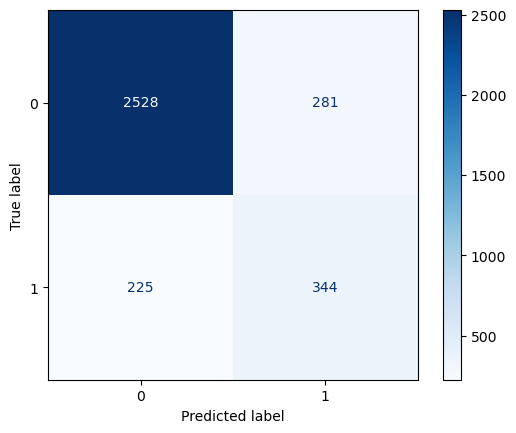

In [342]:
cm_test=confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp.plot(cmap=plt.cm.Blues)
plt.show()

Testing set AUC-ROC score: 0.8131501744643286


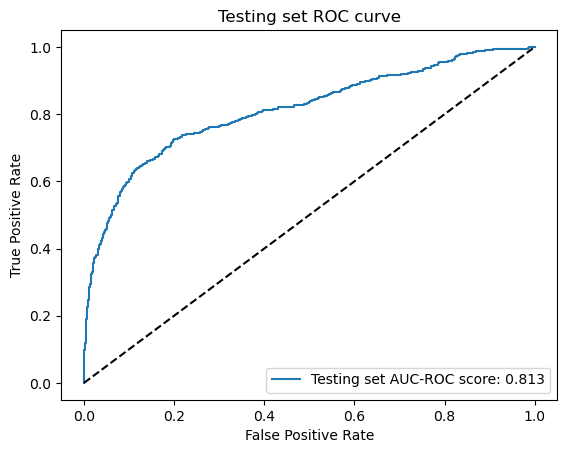

In [343]:
# Calculate the AUC-ROC score for the testing set
y_pred_test_proba = gnb.predict_proba(X_test)[:, 1]
auc_test = roc_auc_score(y_test, y_pred_test_proba)
print("Testing set AUC-ROC score:", auc_test)

# Plot the ROC curve for the testing set
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test_proba)
plt.plot(fpr_test, tpr_test, label='Testing set AUC-ROC score: %.3f' % auc_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Testing set ROC curve')
plt.legend(loc="lower right")
plt.show()

In [344]:
# Perform cross-validation
scores = cross_val_score(gnb, X_train, y_train, cv=5)
print("Cross-validation scores:", scores)

Cross-validation scores: [0.86493342 0.84717819 0.86548223 0.85786802 0.86104061]


In [345]:
# Perform cross-validation
scores = cross_val_score(gnb, X_test, y_test, cv=5)
print("Cross-validation scores:", scores)

Cross-validation scores: [0.84319527 0.85946746 0.87426036 0.84296296 0.86666667]


## Gaussian Naive Bayes over balanced data using SMOTE

In [346]:
# Create a Gaussian Naive Bayes model
gnb = GaussianNB()

# Fit the model to the balanced training data
gnb.fit(X_train_res, y_train_res)

GaussianNB()

### Training Performance

In [347]:
# Predict on the training data
y_pred_train = gnb.predict(X_train_res)

In [348]:
# Evaluate the model on the training set
print("Training set accuracy:", accuracy_score(y_train_res, y_pred_train))

Training set accuracy: 0.7403508771929824


In [349]:
# Print the classification report for the training set
print(classification_report(y_train_res, y_pred_train))

              precision    recall  f1-score   support

           0       0.77      0.68      0.72      6555
           1       0.71      0.80      0.76      6555

    accuracy                           0.74     13110
   macro avg       0.74      0.74      0.74     13110
weighted avg       0.74      0.74      0.74     13110



In [350]:
# Print the confusion matrix for the training set
print(confusion_matrix(y_train_res, y_pred_train))

[[4454 2101]
 [1303 5252]]


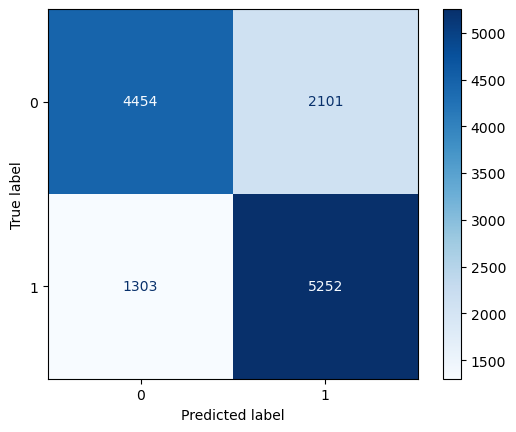

In [351]:
cm_train=confusion_matrix(y_train_res, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp.plot(cmap=plt.cm.Blues)
plt.show()

AUC score and ROC curve for training dataset
AUC: 0.834


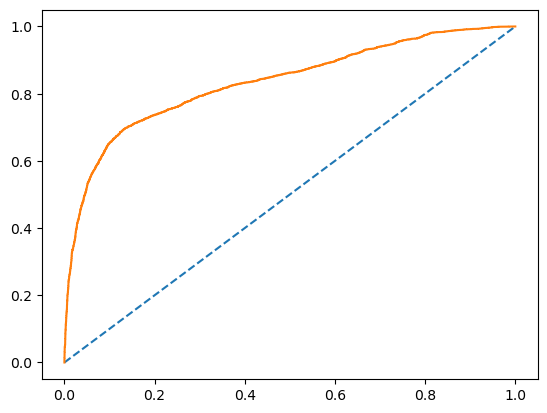

In [352]:
# predict probabilities
probs = gnb.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for training dataset")
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [353]:
print("cross validation scores for train dataset")
scores_gnbsm_train = cross_val_score(gnb, X_train_res, y_train_res, cv=5)
scores_gnbsm_train

cross validation scores for train dataset


array([0.73417239, 0.74485126, 0.74752098, 0.72807018, 0.73913043])

### Testing Performance

In [354]:
# Make predictions on the test set
y_pred = gnb.predict(X_test)

In [355]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6894612196566016


In [356]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.67      0.78      2809
           1       0.32      0.78      0.46       569

    accuracy                           0.69      3378
   macro avg       0.63      0.72      0.62      3378
weighted avg       0.83      0.69      0.73      3378



In [357]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[1888  921]
 [ 128  441]]


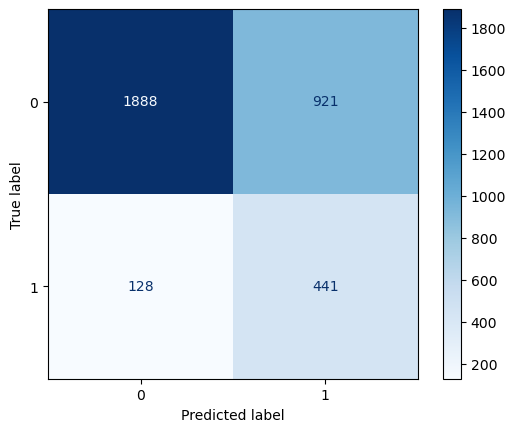

In [358]:
cm_test=confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp.plot(cmap=plt.cm.Blues)
plt.show()

AUC score and ROC curve for testing dataset
AUC: 0.806


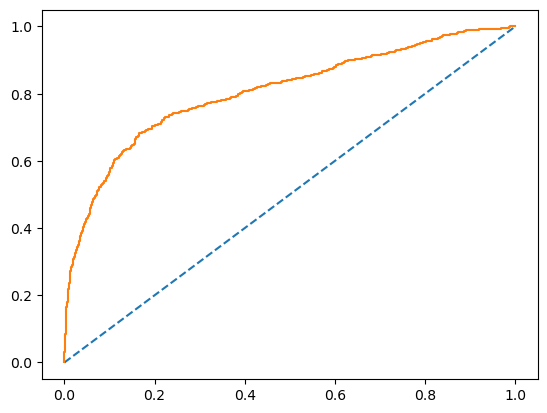

In [359]:
# predict probabilities
probs = gnb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [360]:
print("cross validation scores for test dataset")
scores_nbsm_test = cross_val_score(gnb, X_test, y_test, cv=5)
scores_nbsm_test

cross validation scores for test dataset


array([0.84319527, 0.85946746, 0.87426036, 0.84296296, 0.86666667])

Here are the observations:

**Training Dataset:**
The cross-validation scores for the training dataset range from 0.728 to 0.748, with an average score of approximately 0.738. This suggests that the Naive Bayes model over SMOTE is performing reasonably well on the training data.

**Testing Dataset:**
The cross-validation scores for the testing dataset range from 0.843 to 0.874, with an average score of approximately 0.858. This indicates that the Naive Bayes model over SMOTE is generalizing well to new, unseen data, with a higher level of performance compared to the training data.

**Observation:**
The Naive Bayes model over SMOTE is performing better on the testing dataset compared to the training dataset, with an average cross-validation score of approximately 0.858. This suggests that the model is able to capture the underlying patterns in the data and make accurate predictions, and that the use of SMOTE has helped to improve the model's performance.

## Random Forest

In [361]:
# Train a Random Forest classifier 
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [362]:
# Fit the model to the training data
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [363]:
# Predict on the test data
y_pred = rf.predict(X_test)

In [364]:
# Make predictions on the training set
y_train_pred = rf.predict(X_train)

# Evaluate the model on the training set
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))
print("Training Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))

Training Accuracy: 1.0
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882

Training Confusion Matrix:
[[6555    0]
 [   0 1327]]


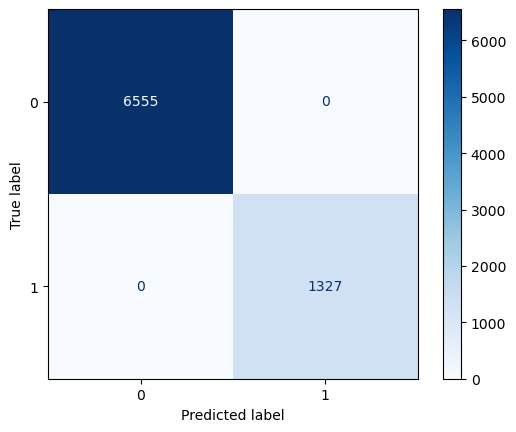

In [365]:
cm_train=confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp.plot(cmap=plt.cm.Blues)
plt.show()

Training AUC-ROC Score: 1.0


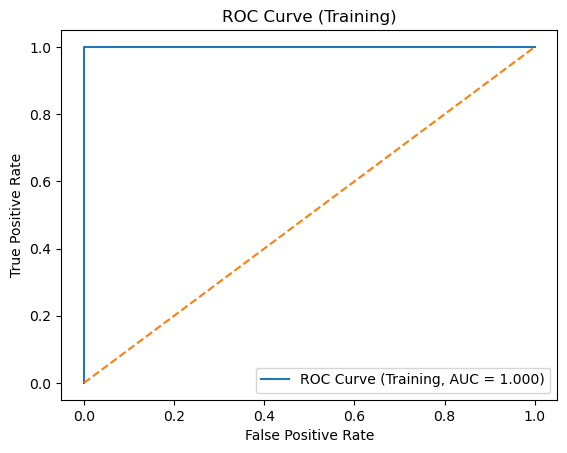

In [366]:
# Calculate the AUC-ROC score for the training set
y_train_pred_proba = rf.predict_proba(X_train)[:, 1]
auc_roc_train = roc_auc_score(y_train, y_train_pred_proba)
print("Training AUC-ROC Score:", auc_roc_train)

# Plot the ROC curve for the training set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred_proba)
plt.plot(fpr_train, tpr_train, label='ROC Curve (Training, AUC = {:.3f})'.format(auc_roc_train))
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Training)')
plt.legend()
plt.show()


In [367]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9641799881586738
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2809
           1       0.95      0.83      0.89       569

    accuracy                           0.96      3378
   macro avg       0.96      0.91      0.93      3378
weighted avg       0.96      0.96      0.96      3378

Confusion Matrix:
[[2786   23]
 [  98  471]]


In [368]:
# Feature importance
importances = rf.feature_importances_
print("Feature importances:", importances)

Feature importances: [0.26357994 0.0238121  0.06774486 0.04347381 0.01814799 0.01961073
 0.03851687 0.03584793 0.05345808 0.03924144 0.05890045 0.06540896
 0.05924044 0.02819884 0.07097841 0.08987128 0.02396786]


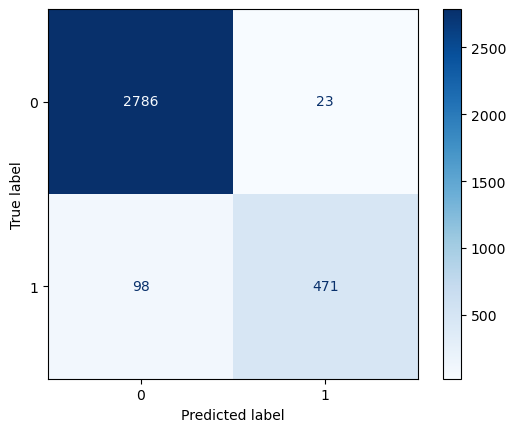

In [369]:
# Calculate the confusion matrix
cm_test = confusion_matrix(y_test, y_pred)

# Create a display object and plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.show()

AUC-ROC Score: 0.9921179788040074


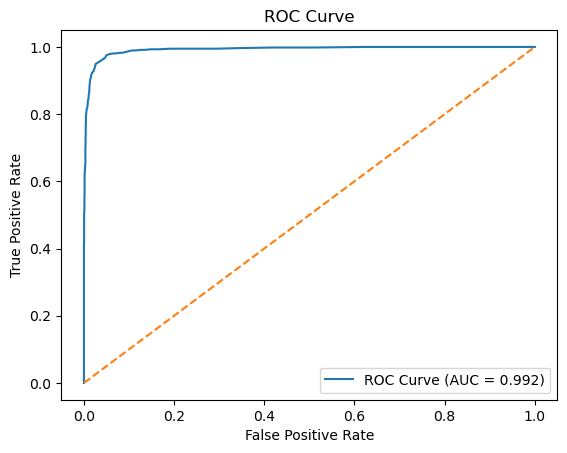

In [370]:
# Calculate the AUC-ROC score
y_pred_proba = rf.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_pred_proba)
print("AUC-ROC Score:", auc_roc)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.3f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Random forest model over SMOTE

In [371]:
# Train a Random Forest classifier on the balanced data
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

In [372]:
# Make predictions on the test set
y_pred = rf.predict(X_test)

In [373]:
# Make predictions on the training set
y_train_pred = rf.predict(X_train_res)

In [374]:
# Evaluate the model on the training set
print("Training Accuracy:", accuracy_score(y_train_res, y_train_pred))
print("Training Classification Report:")
print(classification_report(y_train_res, y_train_pred))
print("Training Confusion Matrix:")
print(confusion_matrix(y_train_res, y_train_pred))

Training Accuracy: 1.0
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      6555

    accuracy                           1.00     13110
   macro avg       1.00      1.00      1.00     13110
weighted avg       1.00      1.00      1.00     13110

Training Confusion Matrix:
[[6555    0]
 [   0 6555]]


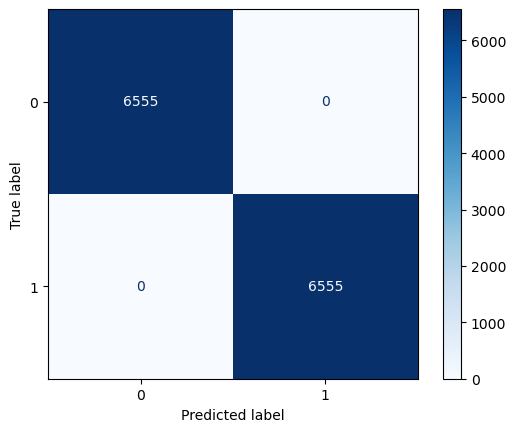

In [375]:
# Calculate the confusion matrix
cm_train = confusion_matrix(y_train_res, y_train_pred)

# Create a display object and plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.show()

Training AUC-ROC Score: 1.0


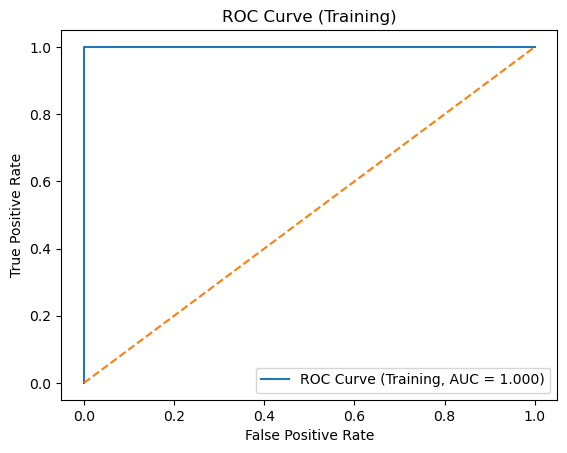

In [376]:
# Calculate the AUC-ROC score for the training set
y_train_pred_proba = rf.predict_proba(X_train_res)[:, 1]
auc_roc_train = roc_auc_score(y_train_res, y_train_pred_proba)
print("Training AUC-ROC Score:", auc_roc_train)

# Plot the ROC curve for the training set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_res, y_train_pred_proba)
plt.plot(fpr_train, tpr_train, label='ROC Curve (Training, AUC = {:.3f})'.format(auc_roc_train))
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Training)')
plt.legend()
plt.show()

### Testing Performance

In [377]:
# Evaluate the model on the test set
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test Classification Report:")
print(classification_report(y_test, y_pred))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Test Accuracy: 0.9706927175843695
Test Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2809
           1       0.94      0.89      0.91       569

    accuracy                           0.97      3378
   macro avg       0.96      0.94      0.95      3378
weighted avg       0.97      0.97      0.97      3378

Test Confusion Matrix:
[[2775   34]
 [  65  504]]


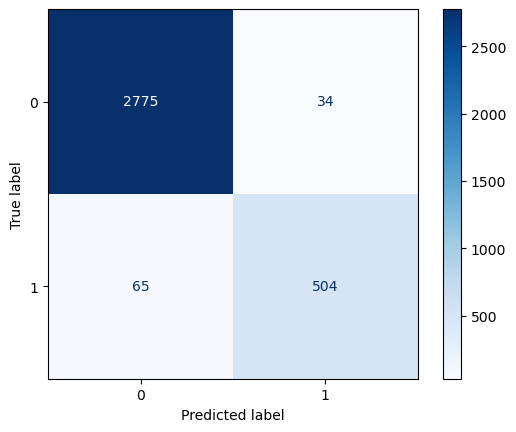

In [378]:
# Calculate the confusion matrix
cm_test = confusion_matrix(y_test, y_pred)

# Create a display object and plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.show()

Test AUC-ROC Score: 0.9909752171184637


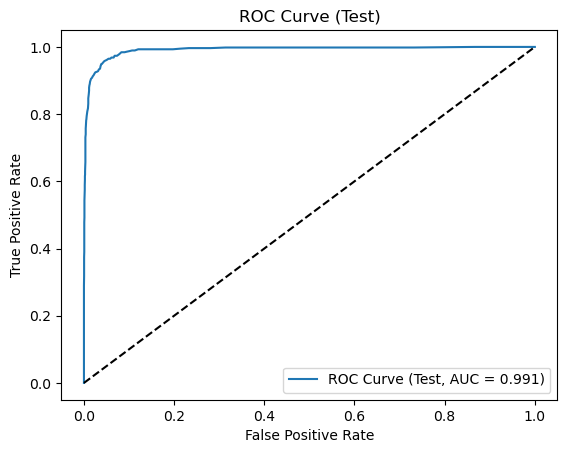

In [379]:
# Calculate the AUC-ROC score for the test set
y_pred_proba = rf.predict_proba(X_test)[:, 1]
auc_roc_test = roc_auc_score(y_test, y_pred_proba)
print("Test AUC-ROC Score:", auc_roc_test)

# Plot the ROC curve for the test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_proba)
plt.plot(fpr_test, tpr_test, label='ROC Curve (Test, AUC = {:.3f})'.format(auc_roc_test))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test)')
plt.legend()
plt.show()

### Bagging Classifier with Random Forest

In [380]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Create a bagging classifier with 10 random forests
bag = BaggingClassifier(estimator=rf, n_estimators=10, random_state=42)

In [381]:
# Train the bagging classifier on the training data
bag.fit(X_train, y_train)

BaggingClassifier(estimator=RandomForestClassifier(random_state=42),
                  random_state=42)

### Bagging Classifier with Random Forest - Training set

In [382]:
# Make predictions on the training data
y_train_pred = bag.predict(X_train)

In [383]:
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))

Training Accuracy: 0.9934026896726719


In [384]:
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))

Training Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6555
           1       1.00      0.96      0.98      1327

    accuracy                           0.99      7882
   macro avg       1.00      0.98      0.99      7882
weighted avg       0.99      0.99      0.99      7882



In [385]:
print("Training Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))

Training Confusion Matrix:
[[6552    3]
 [  49 1278]]


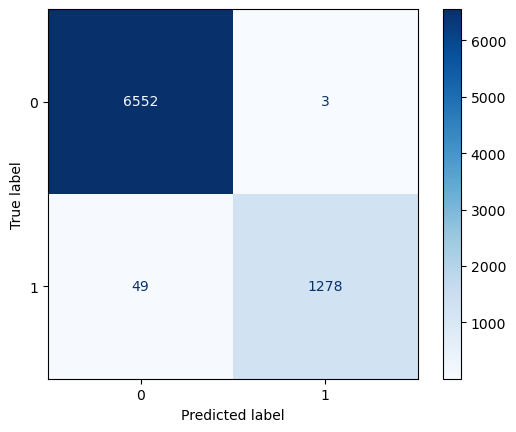

In [386]:
cm_train=confusion_matrix(y_train, y_train_pred)

# Create a display object and plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.show()

Training AUC-ROC Score: 0.999909122105746


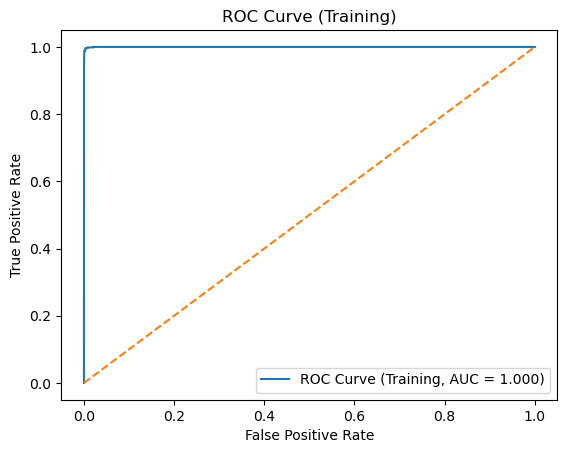

In [387]:
# Calculate the AUC-ROC score for the training data
y_train_pred_proba = bag.predict_proba(X_train)[:, 1]
auc_roc_train = roc_auc_score(y_train, y_train_pred_proba)
print("Training AUC-ROC Score:", auc_roc_train)

# Plot the ROC curve for the training data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred_proba)
plt.plot(fpr_train, tpr_train, label='ROC Curve (Training, AUC = {:.3f})'.format(auc_roc_train))
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Training)')
plt.legend()
plt.show()

### Bagging Classifier with Random Forest - Testing set

In [388]:
# Make predictions on the test data
y_pred = bag.predict(X_test)

In [389]:
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

Test Accuracy: 0.8809946714031972


In [390]:
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

Test Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      2809
           1       0.70      0.51      0.59       569

    accuracy                           0.88      3378
   macro avg       0.80      0.73      0.76      3378
weighted avg       0.87      0.88      0.87      3378



In [391]:
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Test Confusion Matrix:
[[2684  125]
 [ 277  292]]


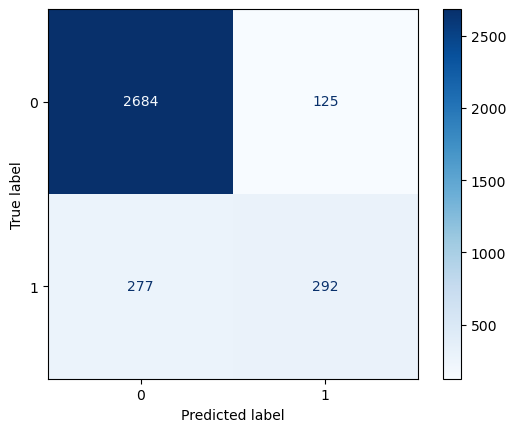

In [392]:
cm_test=confusion_matrix(y_test, y_test_pred)

# Create a display object and plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.show()

Test AUC-ROC Score: 0.987016688137114


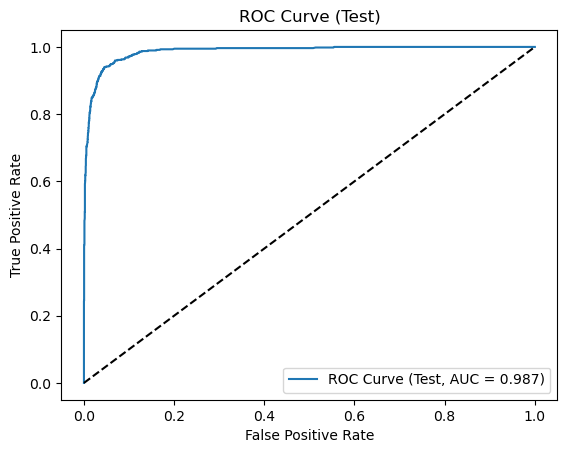

In [393]:
# Calculate the AUC-ROC score for the test data
y_test_pred_proba = bag.predict_proba(X_test)[:, 1]
auc_roc_test = roc_auc_score(y_test, y_test_pred_proba)
print("Test AUC-ROC Score:", auc_roc_test)

# Plot the ROC curve for the test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred_proba)
plt.plot(fpr_test, tpr_test, label='ROC Curve (Test, AUC = {:.3f})'.format(auc_roc_test))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test)')
plt.legend()
plt.show()

### Bagging on SMOTE(balanced) dataset

In [394]:
# Create a bagging classifier with 10 decision trees
bag = BaggingClassifier(estimator=rf, n_estimators=10, random_state=42)

In [395]:
# Train the bagging classifier on the balanced data
bag.fit(X_train_res, y_train_res)

BaggingClassifier(estimator=RandomForestClassifier(random_state=42),
                  random_state=42)

### Bagging on SMOTE(balanced) dataset - Training set

In [396]:
# Make predictions on the training data
y_train_pred = bag.predict(X_train_res)

In [397]:
# Evaluate the model on the training data
print("Training Accuracy:", accuracy_score(y_train_res, y_train_pred))

Training Accuracy: 0.9977116704805492


In [398]:
print("Training Classification Report:")
print(classification_report(y_train_res, y_train_pred))

Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      6555

    accuracy                           1.00     13110
   macro avg       1.00      1.00      1.00     13110
weighted avg       1.00      1.00      1.00     13110



In [399]:
print("Training Confusion Matrix:")
print(confusion_matrix(y_train_res, y_train_pred))

Training Confusion Matrix:
[[6543   12]
 [  18 6537]]


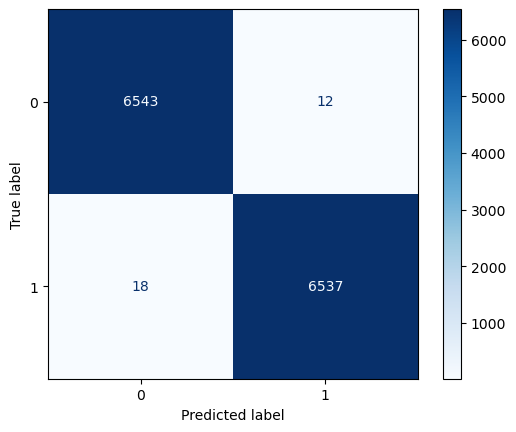

In [400]:
cm_train=confusion_matrix(y_train_res, y_train_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.show()

Training AUC-ROC Score: 0.999982870983714


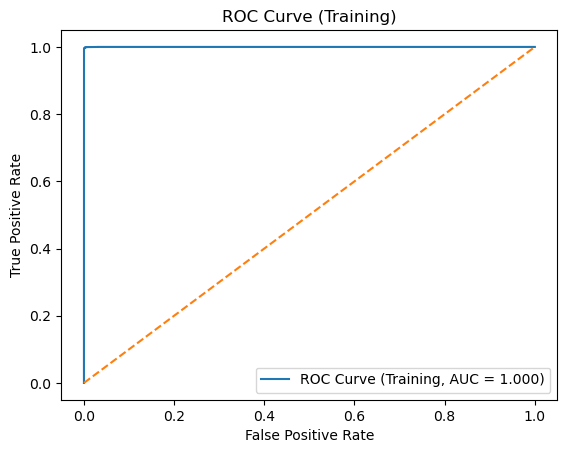

In [401]:
# Calculate the AUC-ROC score for the training data
y_train_pred_proba = bag.predict_proba(X_train_res)[:, 1]
auc_roc_train = roc_auc_score(y_train_res, y_train_pred_proba)
print("Training AUC-ROC Score:", auc_roc_train)

# Plot the ROC curve for the training data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_res, y_train_pred_proba)
plt.plot(fpr_train, tpr_train, label='ROC Curve (Training, AUC = {:.3f})'.format(auc_roc_train))
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Training)')
plt.legend()
plt.show()

In [402]:
# Perform cross-validation on the training data
scores_train = cross_val_score(bag, X_train_res, y_train_res, cv=5, scoring='accuracy')
print("Training Cross-Validation Scores:", scores_train)

Training Cross-Validation Scores: [0.90694127 0.98321892 0.9870328  0.97787948 0.98283753]


### Bagging on SMOTE(balanced) dataset - Testing set

In [403]:
# Make predictions on the test data
y_test_pred = bag.predict(X_test)

In [404]:
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

Test Accuracy: 0.9550029603315572


In [405]:
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

Test Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2809
           1       0.88      0.85      0.86       569

    accuracy                           0.96      3378
   macro avg       0.92      0.91      0.92      3378
weighted avg       0.95      0.96      0.95      3378



In [406]:
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Test Confusion Matrix:
[[2742   67]
 [  85  484]]


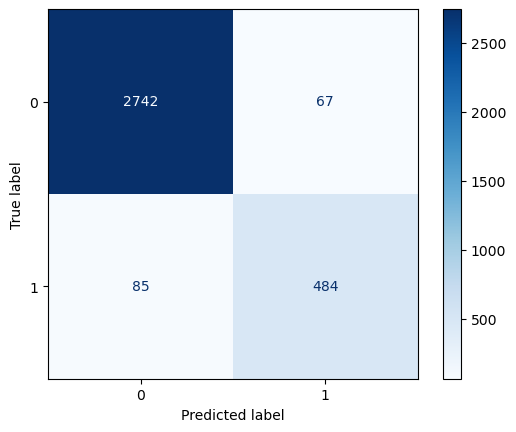

In [407]:
cm_test=confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.show()

Test AUC-ROC Score: 0.9851062458667563


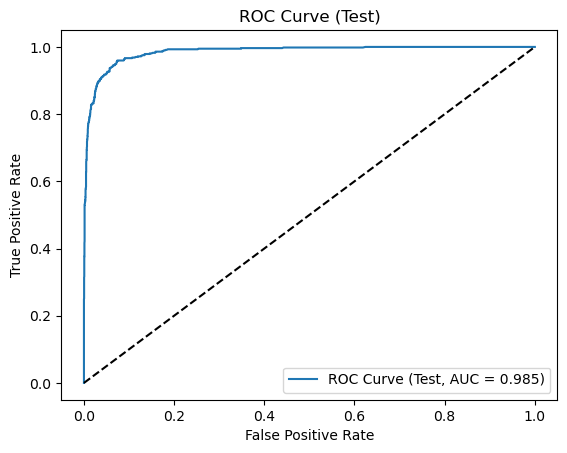

In [408]:
# Calculate the AUC-ROC score for the test data
y_test_pred_proba = bag.predict_proba(X_test)[:, 1]
auc_roc_test = roc_auc_score(y_test, y_test_pred_proba)
print("Test AUC-ROC Score:", auc_roc_test)

# Plot the ROC curve for the test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred_proba)
plt.plot(fpr_test, tpr_test, label='ROC Curve (Test, AUC = {:.3f})'.format(auc_roc_test))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test)')
plt.legend()
plt.show()

In [409]:
# Perform cross-validation on the testing data
scores_test = cross_val_score(bag, X_test, y_test, cv=5, scoring='accuracy')
print("Testing Cross-Validation Scores:", scores_test)

Testing Cross-Validation Scores: [0.90828402 0.91863905 0.94674556 0.90814815 0.92296296]


## Gradient Boosting 

In [410]:
# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

### Gradient Boosting - Training Set

In [411]:
y_train_pred_gb = gb.predict(X_train)

In [412]:
print("Gradient Boosting Train Accuracy:", accuracy_score(y_train, y_train_pred_gb))
print("Gradient Boosting Train Classification Report:")
print(classification_report(y_train, y_train_pred_gb))
print("Gradient Boosting Train Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred_gb))

Gradient Boosting Train Accuracy: 0.9204516620147171
Gradient Boosting Train Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      6555
           1       0.85      0.64      0.73      1327

    accuracy                           0.92      7882
   macro avg       0.89      0.81      0.84      7882
weighted avg       0.92      0.92      0.92      7882

Gradient Boosting Train Confusion Matrix:
[[6403  152]
 [ 475  852]]


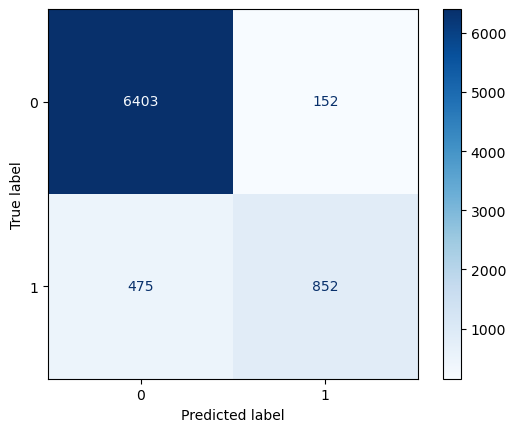

In [413]:
cm_train=confusion_matrix(y_train, y_train_pred_gb)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.show()

In [414]:
# Perform cross-validation on the training data
scores_train = cross_val_score(gb, X_train, y_train, cv=5, scoring='accuracy')
print("Training Cross-Validation Scores:", scores_train)

Training Cross-Validation Scores: [0.91312619 0.90741915 0.91370558 0.90862944 0.91180203]


### Gradient Boosting - Test Set

In [415]:
y_test_pred_gb = gb.predict(X_test)

In [416]:
print("Gradient Boosting Test Accuracy:", accuracy_score(y_test, y_test_pred_gb))
print("Gradient Boosting Test Classification Report:")
print(classification_report(y_test, y_test_pred_gb))
print("Gradient Boosting Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_gb))

Gradient Boosting Test Accuracy: 0.9061574896388396
Gradient Boosting Test Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      2809
           1       0.81      0.58      0.68       569

    accuracy                           0.91      3378
   macro avg       0.86      0.78      0.81      3378
weighted avg       0.90      0.91      0.90      3378

Gradient Boosting Test Confusion Matrix:
[[2731   78]
 [ 239  330]]


Gradient Boosting Train AUC-ROC Score: 0.9526846341633055


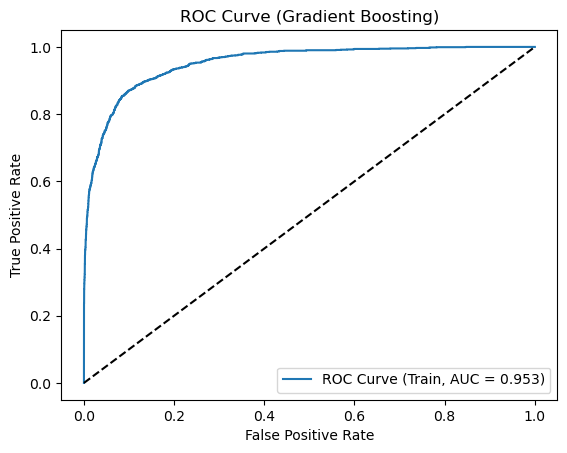

In [417]:
y_train_pred_proba_gb = gb.predict_proba(X_train)[:, 1]

auc_roc_train_gb = roc_auc_score(y_train, y_train_pred_proba_gb)

print("Gradient Boosting Train AUC-ROC Score:", auc_roc_train_gb)

fpr_train_gb, tpr_train_gb, thresholds_train_gb = roc_curve(y_train, y_train_pred_proba_gb)
plt.plot(fpr_train_gb, tpr_train_gb, label='ROC Curve (Train, AUC = {:.3f})'.format(auc_roc_train_gb))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Gradient Boosting)')
plt.legend()
plt.show()

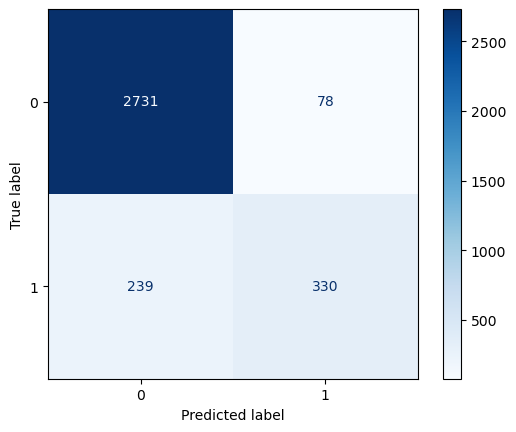

In [418]:
cm_test=confusion_matrix(y_test, y_test_pred_gb)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.show()

Gradient Boosting Test AUC-ROC Score: 0.9384760633189453


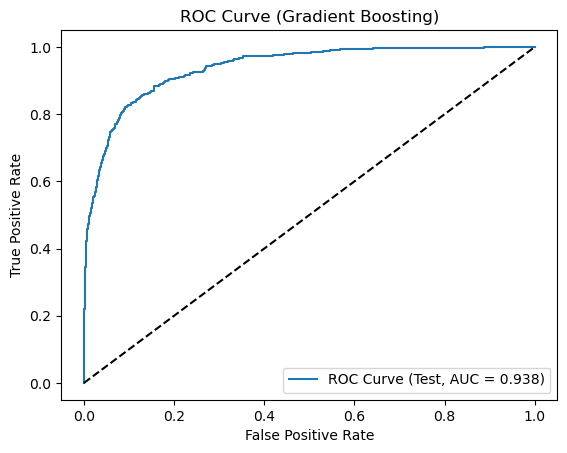

In [419]:
y_test_pred_proba_gb = gb.predict_proba(X_test)[:, 1]

auc_roc_test_gb = roc_auc_score(y_test, y_test_pred_proba_gb)

print("Gradient Boosting Test AUC-ROC Score:", auc_roc_test_gb)

fpr_test_gb, tpr_test_gb, thresholds_test_gb = roc_curve(y_test, y_test_pred_proba_gb)


plt.plot(fpr_test_gb, tpr_test_gb, label='ROC Curve (Test, AUC = {:.3f})'.format(auc_roc_test_gb))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Gradient Boosting)')
plt.legend()
plt.show()

In [420]:
# Perform cross-validation on the testing data
scores_test = cross_val_score(gb, X_test, y_test, cv=5, scoring='accuracy')
print("Testing Cross-Validation Scores:", scores_test)

Testing Cross-Validation Scores: [0.89053254 0.90680473 0.91863905 0.8962963  0.89925926]


### Gradient Boosting on SMOTE(balanced) dataset

In [421]:
gb.fit(X_train_res, y_train_res)

GradientBoostingClassifier(random_state=42)

### Gradient Boosting on SMOTE(balanced) dataset - Training set

In [422]:
y_train_pred_gb = gb.predict(X_train_res)

In [423]:
print("Gradient Boosting Train Accuracy:", accuracy_score(y_train_res, y_train_pred_gb))
print("Gradient Boosting Train Classification Report:")
print(classification_report(y_train_res, y_train_pred_gb))
print("Gradient Boosting Train Confusion Matrix:")
print(confusion_matrix(y_train_res, y_train_pred_gb))

Gradient Boosting Train Accuracy: 0.9308924485125858
Gradient Boosting Train Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      6555
           1       0.94      0.92      0.93      6555

    accuracy                           0.93     13110
   macro avg       0.93      0.93      0.93     13110
weighted avg       0.93      0.93      0.93     13110

Gradient Boosting Train Confusion Matrix:
[[6163  392]
 [ 514 6041]]


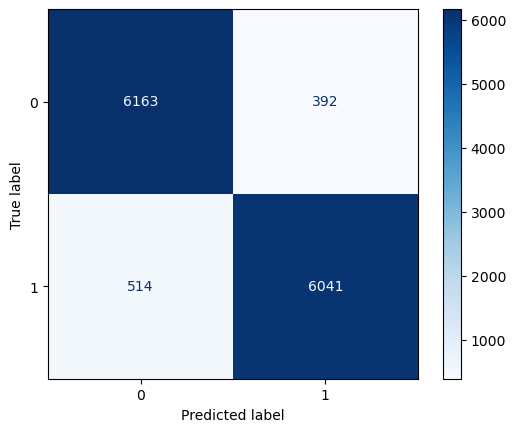

In [424]:
cm_train=confusion_matrix(y_train_res, y_train_pred_gb)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.show()

Gradient Boosting Train AUC-ROC Score: 0.9811651571139237


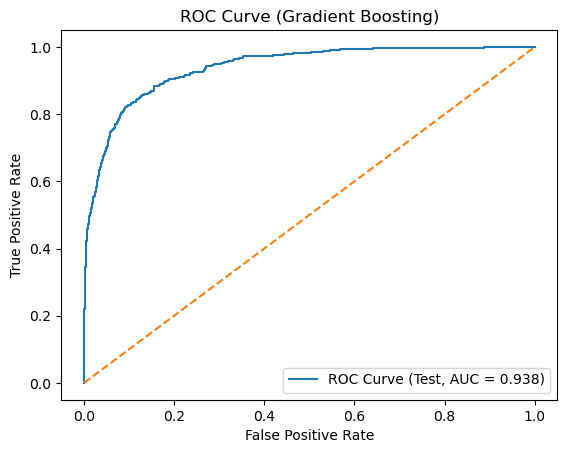

In [425]:
y_train_pred_proba_gb = gb.predict_proba(X_train_res)[:, 1]
auc_roc_train_gb = roc_auc_score(y_train_res, y_train_pred_proba_gb)
print("Gradient Boosting Train AUC-ROC Score:", auc_roc_train_gb)



fpr_test_gb, tpr_test_gb, thresholds_test_gb = roc_curve(y_test, y_test_pred_proba_gb)
plt.plot(fpr_test_gb, tpr_test_gb, label='ROC Curve (Test, AUC = {:.3f})'.format(auc_roc_test_gb))
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Gradient Boosting)')
plt.legend()
plt.show()

In [426]:
print("cross validation scores for train dataset")
scores_gb_sm_train = cross_val_score(gb, X_train_res, y_train_res, cv=5)
scores_gb_sm_train

cross validation scores for train dataset


array([0.7597254 , 0.94698703, 0.94965675, 0.94355454, 0.94660564])

### Gradient Boosting on SMOTE(balanced) dataset - Test set

In [427]:
y_test_pred_gb = gb.predict(X_test)

In [428]:
print("Gradient Boosting Test Accuracy:", accuracy_score(y_test, y_test_pred_gb))
print("Gradient Boosting Test Classification Report:")
print(classification_report(y_test, y_test_pred_gb))
print("Gradient Boosting Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_gb))

Gradient Boosting Test Accuracy: 0.9023090586145648
Gradient Boosting Test Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2809
           1       0.70      0.73      0.71       569

    accuracy                           0.90      3378
   macro avg       0.82      0.83      0.83      3378
weighted avg       0.90      0.90      0.90      3378

Gradient Boosting Test Confusion Matrix:
[[2635  174]
 [ 156  413]]


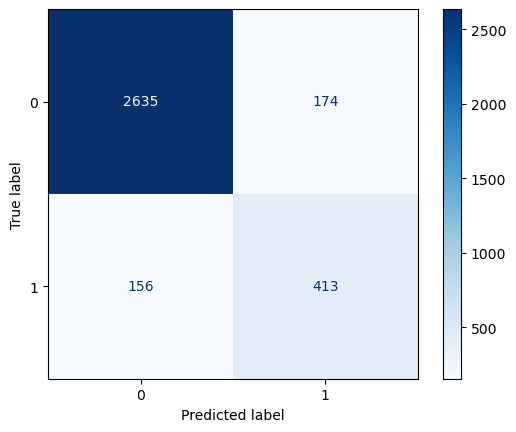

In [429]:
cm_test=confusion_matrix(y_test, y_test_pred_gb)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.show()

Gradient Boosting Test AUC-ROC Score: 0.9267825424304631


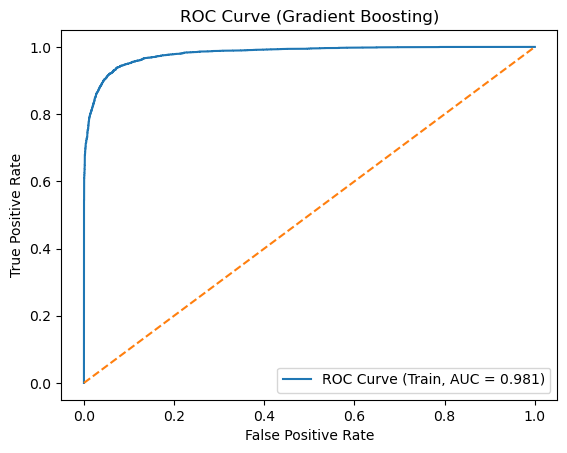

In [430]:
y_test_pred_proba_gb = gb.predict_proba(X_test)[:, 1]
auc_roc_test_gb = roc_auc_score(y_test, y_test_pred_proba_gb)
print("Gradient Boosting Test AUC-ROC Score:", auc_roc_test_gb)
fpr_train_gb, tpr_train_gb, thresholds_train_gb = roc_curve(y_train_res, y_train_pred_proba_gb)
plt.plot(fpr_train_gb, tpr_train_gb, label='ROC Curve (Train, AUC = {:.3f})'.format(auc_roc_train_gb))

plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Gradient Boosting)')
plt.legend()
plt.show()

In [431]:
print("cross validation scores for test dataset")
scores_gb_sm_test = cross_val_score(gb, X_test, y_test, cv=5)
scores_gb_sm_test

cross validation scores for test dataset


array([0.89053254, 0.90680473, 0.91863905, 0.8962963 , 0.89925926])

### XGBoost

In [432]:
# XGBoost
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

In [433]:
# Train the model on the entire training set
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

### XGBoost - Training Set

In [434]:
# Make predictions on the training set
y_train_pred = xgb.predict(X_train)

In [435]:
# Evaluate the model on the training set
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))
print("Training Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))

Training Accuracy: 0.9816036538949505
Training Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6555
           1       0.98      0.91      0.94      1327

    accuracy                           0.98      7882
   macro avg       0.98      0.95      0.97      7882
weighted avg       0.98      0.98      0.98      7882

Training Confusion Matrix:
[[6534   21]
 [ 124 1203]]


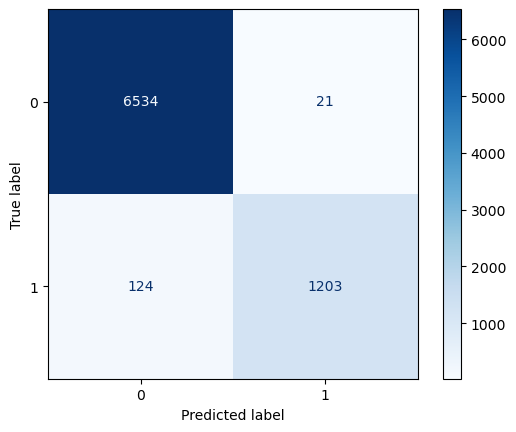

In [436]:
cm_train=confusion_matrix(y_train, y_train_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.show()

Training AUC-ROC Score: 0.9976567183825689


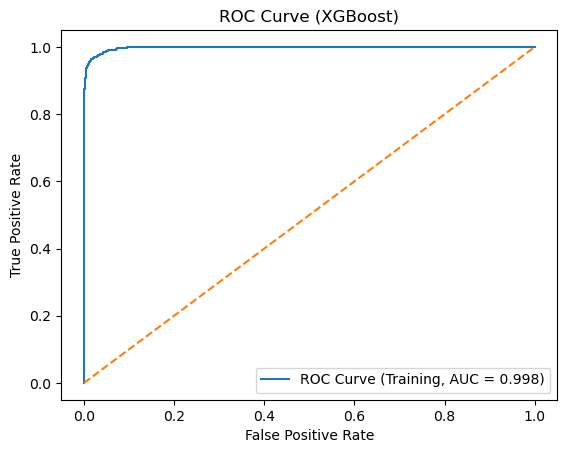

In [437]:
# Calculate the AUC-ROC score on the training set
y_train_pred_proba = xgb.predict_proba(X_train)[:, 1]
auc_roc_train = roc_auc_score(y_train, y_train_pred_proba)
print("Training AUC-ROC Score:", auc_roc_train)

# Plot the ROC curve on the training set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred_proba)
plt.plot(fpr_train, tpr_train, label='ROC Curve (Training, AUC = {:.3f})'.format(auc_roc_train))
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (XGBoost)')
plt.legend()
plt.show()

In [438]:
from sklearn.model_selection import cross_val_score, KFold
# Perform cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(xgb, X_train, y_train, cv=kf, scoring='accuracy')

print("Cross-Validation Scores:", scores)

Cross-Validation Scores: [0.94102727 0.94483196 0.93718274 0.94352792 0.94098985]


### XGBoost - Testing Set

In [439]:
# Make predictions on the test set
y_test_pred = xgb.predict(X_test)

In [440]:
# Evaluate the model on the test set
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Test Accuracy: 0.9476021314387212
Test Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2809
           1       0.90      0.77      0.83       569

    accuracy                           0.95      3378
   macro avg       0.93      0.88      0.90      3378
weighted avg       0.95      0.95      0.95      3378

Test Confusion Matrix:
[[2762   47]
 [ 130  439]]


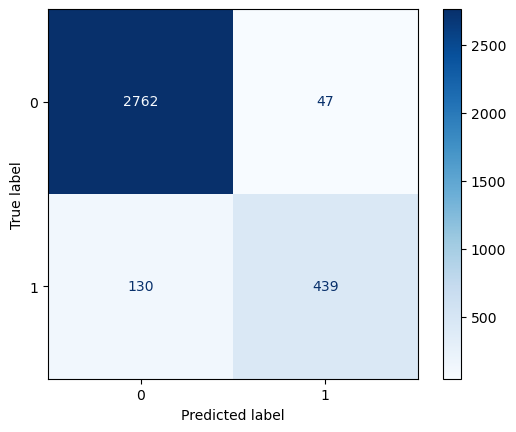

In [441]:
cm_test=confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.show()

Test AUC-ROC Score: 0.981217790418821


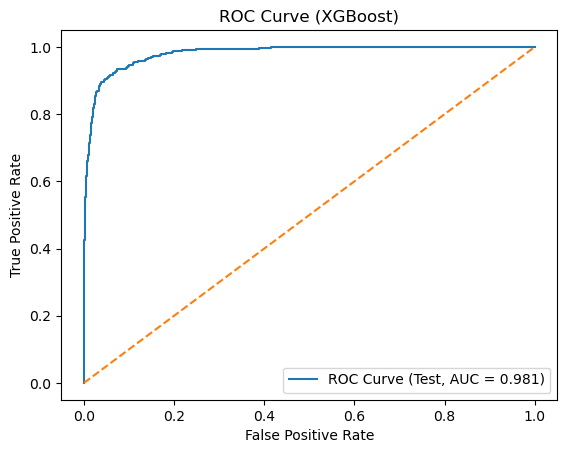

In [442]:
# Calculate the AUC-ROC score on the test set
y_test_pred_proba = xgb.predict_proba(X_test)[:, 1]
auc_roc_test = roc_auc_score(y_test, y_test_pred_proba)
print("Test AUC-ROC Score:", auc_roc_test)

# Plot the ROC curve on the test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred_proba)
plt.plot(fpr_test, tpr_test, label='ROC Curve (Test, AUC = {:.3f})'.format(auc_roc_test))
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (XGBoost)')
plt.legend()
plt.show()

In [443]:
from sklearn.model_selection import cross_val_score, KFold
# Perform cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(xgb, X_test, y_test, cv=kf, scoring='accuracy')

print("Cross-Validation Scores:", scores)

Cross-Validation Scores: [0.91568047 0.92899408 0.92307692 0.92888889 0.92      ]


### XGBoost on SMOTE dataset

In [444]:
# Train the model on the oversampled training set
xgb.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

### XGBoost on SMOTE dataset - Training Set

In [445]:
# Make predictions on the training set
y_train_pred = xgb.predict(X_train_res)

In [446]:
# Evaluate the model on the training set
print("Training Accuracy:", accuracy_score(y_train_res, y_train_pred))
print("Training Classification Report:")
print(classification_report(y_train_res, y_train_pred))
print("Training Confusion Matrix:")
print(confusion_matrix(y_train_res, y_train_pred))

Training Accuracy: 0.9800152555301297
Training Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      6555
           1       0.99      0.97      0.98      6555

    accuracy                           0.98     13110
   macro avg       0.98      0.98      0.98     13110
weighted avg       0.98      0.98      0.98     13110

Training Confusion Matrix:
[[6462   93]
 [ 169 6386]]


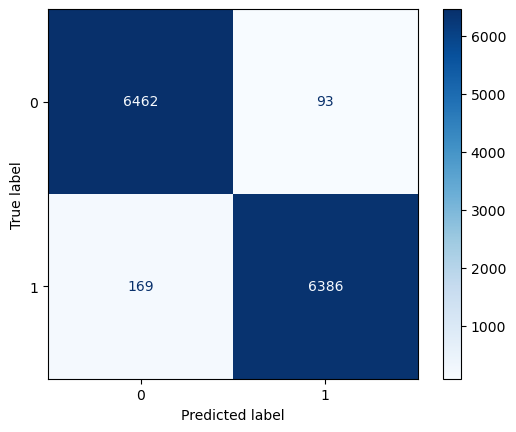

In [447]:
cm_train=confusion_matrix(y_train_res, y_train_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.show()

Training AUC-ROC Score: 0.9984688847113641


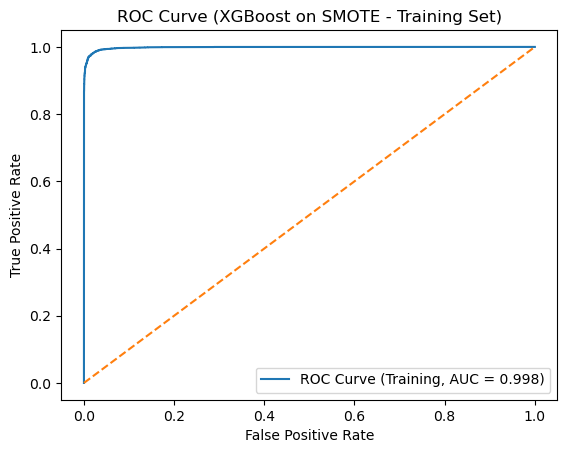

In [448]:
# Calculate the AUC-ROC score on the training set
y_train_pred_proba = xgb.predict_proba(X_train_res)[:, 1]
auc_roc_train = roc_auc_score(y_train_res, y_train_pred_proba)
print("Training AUC-ROC Score:", auc_roc_train)

# Plot the ROC curve on the training set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_res, y_train_pred_proba)
plt.plot(fpr_train, tpr_train, label='ROC Curve (Training, AUC = {:.3f})'.format(auc_roc_train))
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (XGBoost on SMOTE - Training Set)')
plt.legend()
plt.show()

In [449]:
# Perform cross-validation on the training set
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores_train = cross_val_score(xgb, X_train_res, y_train_res, cv=kf, scoring='accuracy')

print("Training Cross-Validation Scores:", scores_train)

Training Cross-Validation Scores: [0.95995423 0.96643783 0.96033562 0.95728452 0.9641495 ]


### XGBoost on SMOTE dataset - Testing Set

In [450]:
# Make predictions on the test set
y_test_pred = xgb.predict(X_test)

In [451]:
# Evaluate the model on the test set
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Test Accuracy: 0.9404973357015985
Test Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2809
           1       0.85      0.78      0.82       569

    accuracy                           0.94      3378
   macro avg       0.90      0.88      0.89      3378
weighted avg       0.94      0.94      0.94      3378

Test Confusion Matrix:
[[2732   77]
 [ 124  445]]


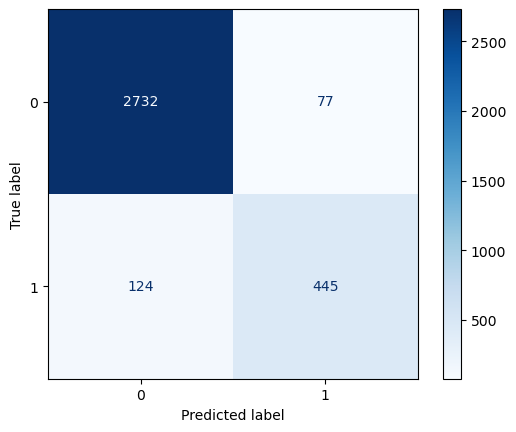

In [452]:
cm_test=confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.show()

Test AUC-ROC Score: 0.9720112543099915


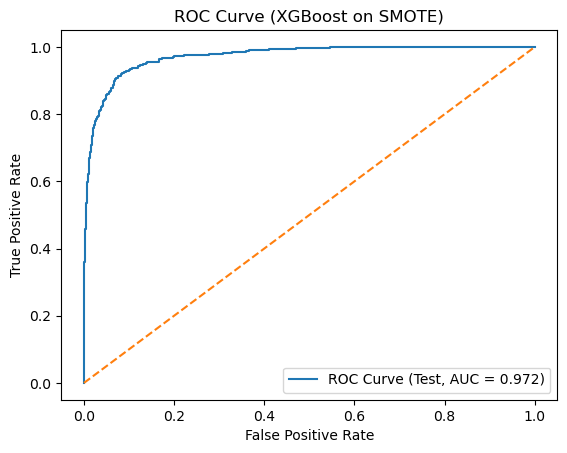

In [453]:
# Calculate the AUC-ROC score on the test set
y_test_pred_proba = xgb.predict_proba(X_test)[:, 1]
auc_roc_test = roc_auc_score(y_test, y_test_pred_proba)
print("Test AUC-ROC Score:", auc_roc_test)

# Plot the ROC curve on the test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred_proba)
plt.plot(fpr_test, tpr_test, label='ROC Curve (Test, AUC = {:.3f})'.format(auc_roc_test))
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (XGBoost on SMOTE)')
plt.legend()
plt.show()

In [454]:
# Perform cross-validation on the testing set
scores_test = cross_val_score(xgb, X_test, y_test, cv=kf, scoring='accuracy')

print("Testing Cross-Validation Scores:", scores_test)

Testing Cross-Validation Scores: [0.91568047 0.92899408 0.92307692 0.92888889 0.92      ]


### Ada-Boost

In [455]:
# Ada-Boost
ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

In [456]:
# Train the model on the training set
ada.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=42)

### Ada-Boost - Training Set

In [457]:
# Make predictions on the training set
y_train_pred = ada.predict(X_train)

In [458]:
# Evaluate the model on the training set
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))
print("Training Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))

Training Accuracy: 0.8875919817305252
Training Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      6555
           1       0.78      0.46      0.58      1327

    accuracy                           0.89      7882
   macro avg       0.84      0.72      0.76      7882
weighted avg       0.88      0.89      0.88      7882

Training Confusion Matrix:
[[6381  174]
 [ 712  615]]


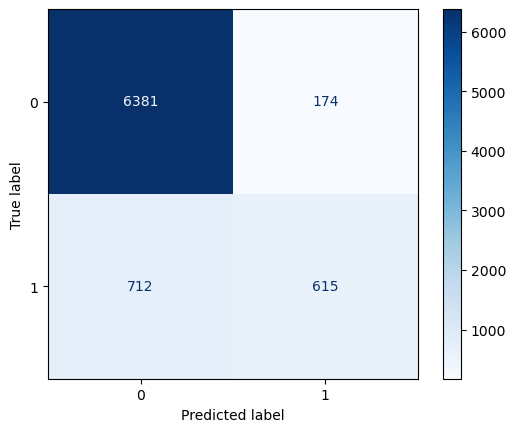

In [459]:
cm_train=confusion_matrix(y_train, y_train_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.show()

Training AUC-ROC Score: 0.8927817890126845


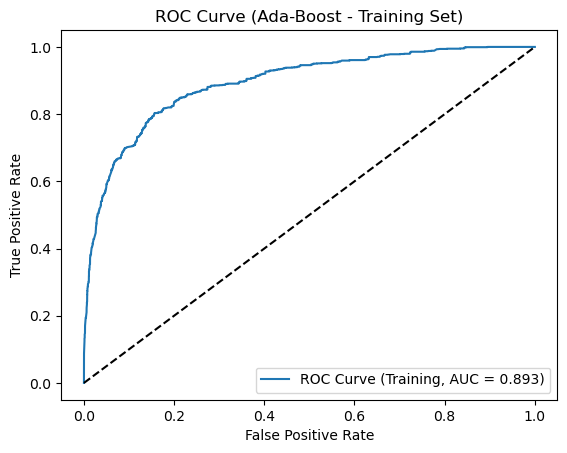

In [460]:
# Calculate the AUC-ROC score on the training set
y_train_pred_proba = ada.predict_proba(X_train)[:, 1]
auc_roc_train = roc_auc_score(y_train, y_train_pred_proba)
print("Training AUC-ROC Score:", auc_roc_train)

# Plot the ROC curve on the training set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred_proba)
plt.plot(fpr_train, tpr_train, label='ROC Curve (Training, AUC = {:.3f})'.format(auc_roc_train))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Ada-Boost - Training Set)')
plt.legend()
plt.show()

In [461]:
# Perform cross-validation on the training set
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores_train = cross_val_score(ada, X_train, y_train, cv=kf, scoring='accuracy')

print("Training Cross-Validation Scores:", scores_train)

Training Cross-Validation Scores: [0.89029803 0.89029803 0.89022843 0.88705584 0.88451777]


### Ada-Boost - Testing Set

In [462]:
# Make predictions on the testing set
y_test_pred = ada.predict(X_test)

In [463]:
# Evaluate the model on the testing set
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Testing Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Testing Accuracy: 0.8880994671403197
Testing Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      2809
           1       0.77      0.48      0.59       569

    accuracy                           0.89      3378
   macro avg       0.84      0.73      0.76      3378
weighted avg       0.88      0.89      0.88      3378

Testing Confusion Matrix:
[[2727   82]
 [ 296  273]]


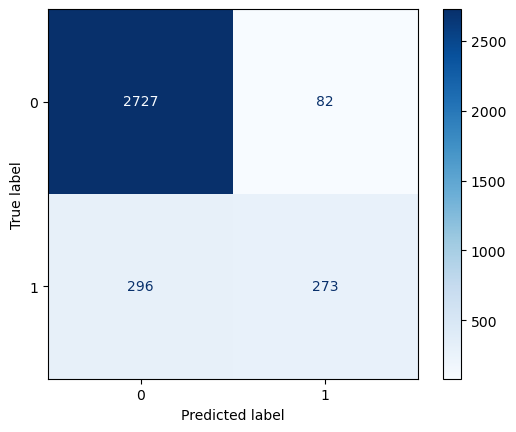

In [464]:
cm_test=confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.show()

Testing AUC-ROC Score: 0.8955241156188275


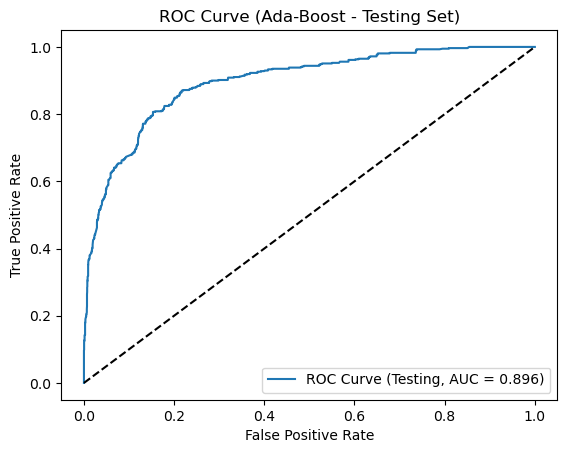

In [465]:
# Calculate the AUC-ROC score on the testing set
y_test_pred_proba = ada.predict_proba(X_test)[:, 1]
auc_roc_test = roc_auc_score(y_test, y_test_pred_proba)
print("Testing AUC-ROC Score:", auc_roc_test)

# Plot the ROC curve on the testing set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred_proba)
plt.plot(fpr_test, tpr_test, label='ROC Curve (Testing, AUC = {:.3f})'.format(auc_roc_test))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Ada-Boost - Testing Set)')
plt.legend()
plt.show()

In [466]:
# Perform cross-validation on the testing set
scores_test = cross_val_score(ada, X_test, y_test, cv=kf, scoring='accuracy')

print("Testing Cross-Validation Scores:", scores_test)

Testing Cross-Validation Scores: [0.86686391 0.89201183 0.87573964 0.89037037 0.89925926]


### Ada-Boost on SMOTE(balanced) dataset

In [467]:
ada.fit(X_train_res,y_train_res)

AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=42)

### Ada-Boost on SMOTE(balanced) dataset - Training

In [468]:
# Make predictions on the training set
y_train_pred = ada.predict(X_train_res)

In [469]:
# Evaluate the model on the training set
print("Training Accuracy:", accuracy_score(y_train_res, y_train_pred))
print("Training Classification Report:")
print(classification_report(y_train_res, y_train_pred))
print("Training Confusion Matrix:")
print(confusion_matrix(y_train_res, y_train_pred))

Training Accuracy: 0.8604881769641495
Training Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      6555
           1       0.86      0.86      0.86      6555

    accuracy                           0.86     13110
   macro avg       0.86      0.86      0.86     13110
weighted avg       0.86      0.86      0.86     13110

Training Confusion Matrix:
[[5668  887]
 [ 942 5613]]


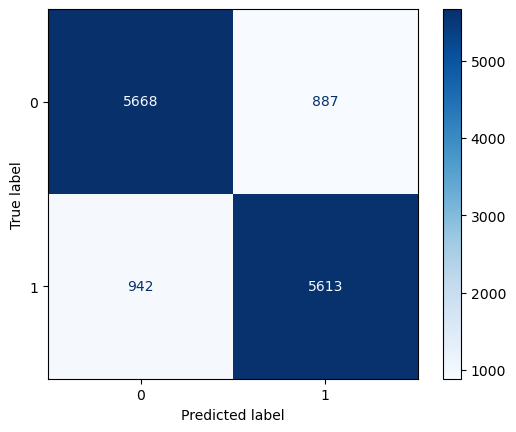

In [470]:
cm_train=confusion_matrix(y_train_res, y_train_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.show()

Training AUC-ROC Score: 0.9339689920586296


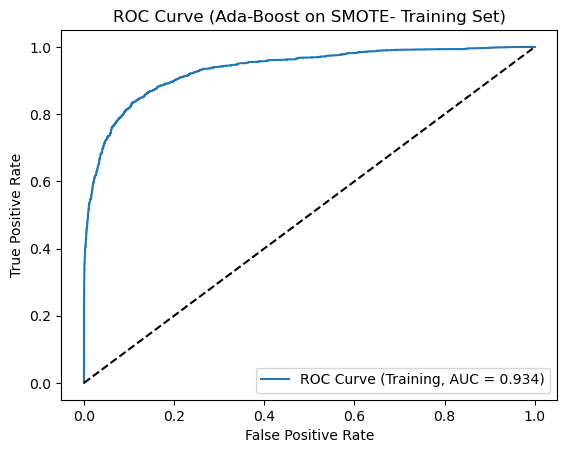

In [471]:
# Calculate the AUC-ROC score on the training set
y_train_pred_proba = ada.predict_proba(X_train_res)[:, 1]
auc_roc_train = roc_auc_score(y_train_res, y_train_pred_proba)
print("Training AUC-ROC Score:", auc_roc_train)


# Plot the ROC curve on the training set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_res, y_train_pred_proba)
plt.plot(fpr_train, tpr_train, label='ROC Curve (Training, AUC = {:.3f})'.format(auc_roc_train))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Ada-Boost on SMOTE- Training Set)')
plt.legend()
plt.show()

In [472]:
# Perform cross-validation on the training set
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores_train = cross_val_score(ada, X_train_res, y_train_res, cv=kf, scoring='accuracy')

print("Training Cross-Validation Scores:", scores_train)

Training Cross-Validation Scores: [0.85812357 0.87223494 0.85202136 0.85354691 0.86575133]


### Ada-Boost on SMOTE(balanced) dataset - Testing set

In [473]:
# Performance Matrix on test data set
ytest_predict_adbsm = ada.predict(X_test)
print("accuracy score for testing dataset:",ada.score(X_test, y_test))

print("confusion matrix for testing dataset")
print(metrics.confusion_matrix(y_test, ytest_predict_adbsm))

print("classification report for testing dataset")
print(metrics.classification_report(y_test, ytest_predict_adbsm))

accuracy score for testing dataset: 0.8525754884547069
confusion matrix for testing dataset
[[2439  370]
 [ 128  441]]
classification report for testing dataset
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      2809
           1       0.54      0.78      0.64       569

    accuracy                           0.85      3378
   macro avg       0.75      0.82      0.77      3378
weighted avg       0.88      0.85      0.86      3378



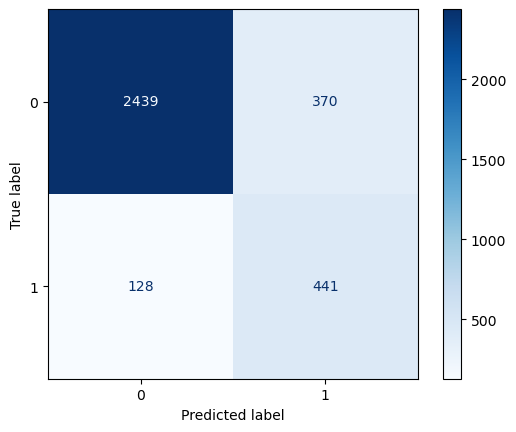

In [474]:
cm_test=metrics.confusion_matrix(y_test, ytest_predict_adbsm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.show()

AUC score and ROC curve for testing dataset
AUC: 0.894


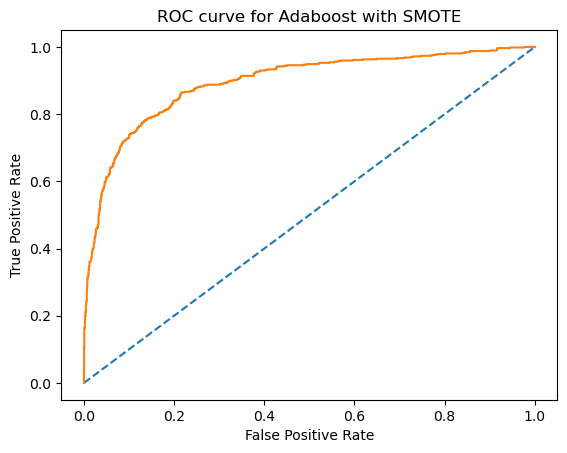

In [475]:
# predict probabilities
probs = ada.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
print("AUC score and ROC curve for testing dataset")
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
#plt.plot(test_fpr, test_fpr, label='ROC Curve (Training, AUC = {:.3f})'.format(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Adaboost with SMOTE')
plt.show()

In [476]:
# Perform cross-validation on the testing set
scores_test = cross_val_score(ada, X_test, y_test, cv=kf, scoring='accuracy')

print("Testing Cross-Validation Scores:", scores_test)

Testing Cross-Validation Scores: [0.86686391 0.89201183 0.87573964 0.89037037 0.89925926]


### Support Vector Machine

In [477]:
from sklearn.svm import SVC

In [478]:
# Train an SVM model
svm = SVC(kernel='linear', C=1)
svm.fit(X_train, y_train)

SVC(C=1, kernel='linear')

### Support Vector Machine - Training set

In [479]:
y_pred = svm.predict(X_train)

In [480]:
training_accuracy = accuracy_score(y_train, y_pred)
print("Training Accuracy:", training_accuracy)

Training Accuracy: 0.8859426541486932


In [481]:
# Print classification report
print("Classification Report:")
print(classification_report(y_train, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.93      6555
           1       0.79      0.44      0.57      1327

    accuracy                           0.89      7882
   macro avg       0.84      0.71      0.75      7882
weighted avg       0.88      0.89      0.87      7882



In [482]:
# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred))

Confusion Matrix:
[[6396  159]
 [ 740  587]]


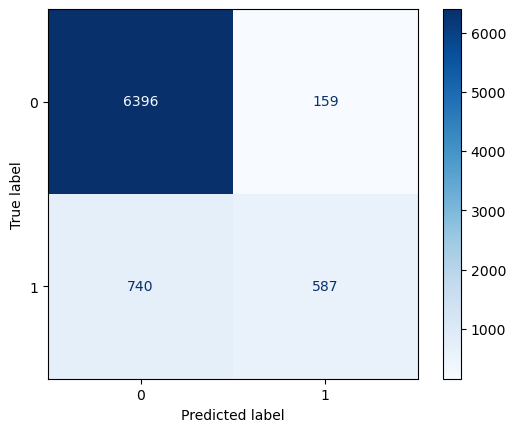

In [483]:
cm_train = confusion_matrix(y_train, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.show()

In [484]:
# Perform cross-validation
scores = cross_val_score(svm, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores for Training Set:",scores)

Cross-Validation Scores for Training Set: [0.8807863  0.8807863  0.88705584 0.88388325 0.89149746]


### Support Vector Machine - Testing set

In [485]:
# Get the testing accuracy
y_pred_test = svm.predict(X_test)

In [486]:
testing_accuracy = accuracy_score(y_test, y_pred_test)
print("Testing Accuracy:", testing_accuracy)

Testing Accuracy: 0.8892835997631735


In [487]:
# Print classification report for testing data
print("Testing Classification Report:")
print(classification_report(y_test, y_pred_test))

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      2809
           1       0.80      0.46      0.58       569

    accuracy                           0.89      3378
   macro avg       0.85      0.72      0.76      3378
weighted avg       0.88      0.89      0.88      3378



In [488]:
# Print confusion matrix for testing data
print("Testing Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))

Testing Confusion Matrix:
[[2743   66]
 [ 308  261]]


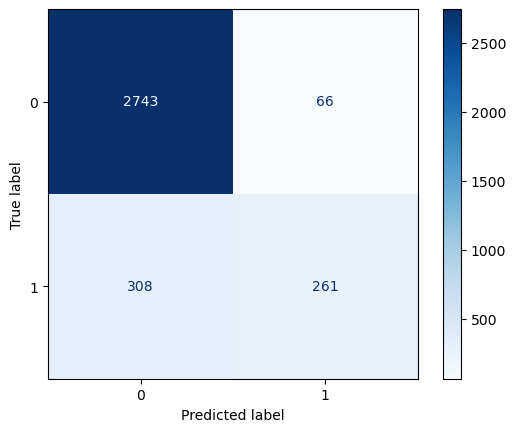

In [489]:
cm_test = confusion_matrix(y_test, y_pred_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.show()

In [490]:
# Perform cross-validation on testing data
scores_test = cross_val_score(svm, X_test, y_test, cv=5, scoring='accuracy')
print("Testing Cross-Validation Scores:", scores_test)

Testing Cross-Validation Scores: [0.88313609 0.87573964 0.88609467 0.88444444 0.89185185]


### Hypertuning SVM - grid search to tune the hyperparameters

In [491]:
param_grid = {'kernel': ['linear', 'rbf'], 'C': np.logspace(-2, 1, 5), 'gamma': [0.2, 0.5]}
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(C=1, kernel='linear'), n_jobs=-1,
             param_grid={'C': array([ 0.01      ,  0.05623413,  0.31622777,  1.77827941, 10.        ]),
                         'gamma': [0.2, 0.5], 'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [492]:
# getting best estimators
best_grid = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'C': 10.0, 'gamma': 0.2, 'kernel': 'linear'}
Best score: 0.8851833462624208


In [493]:
y_train_pred = best_grid.predict(X_train)
y_test_pred = best_grid.predict(X_test)

### Hyperparameter SVM - training set

In [494]:
# Evaluate the model
accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy: ",accuracy)

Training Accuracy:  0.8851814260340015


In [495]:
# getting classification report for train data set
print("Classification report for train dataset")
print(classification_report(y_train, y_train_pred))

Classification report for train dataset
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      6555
           1       0.77      0.46      0.57      1327

    accuracy                           0.89      7882
   macro avg       0.83      0.71      0.75      7882
weighted avg       0.88      0.89      0.87      7882



In [496]:
# confusion matrix for training data set
print("confusion matrix for training dataset")
confusion_matrix(y_train, y_train_pred)

confusion matrix for training dataset


array([[6372,  183],
       [ 722,  605]])

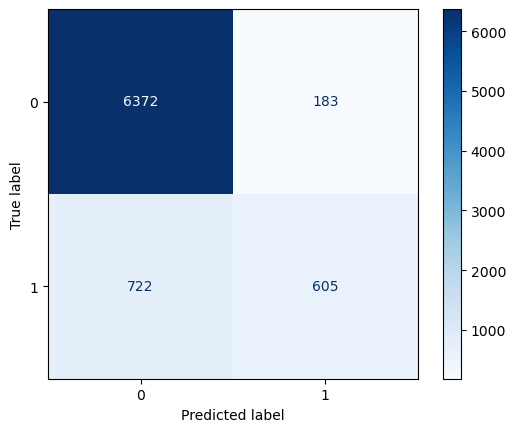

In [497]:
cm_train = confusion_matrix(y_train, y_train_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.show()

### Hyperparameter SVM - test set

In [498]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy: ",accuracy)

Testing Accuracy:  0.8857312018946122


In [499]:
# getting classification report for train data set
print("Classification report for test dataset")
print(classification_report(y_test, y_test_pred))

Classification report for test dataset
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2809
           1       0.75      0.48      0.59       569

    accuracy                           0.89      3378
   macro avg       0.83      0.72      0.76      3378
weighted avg       0.88      0.89      0.88      3378



In [500]:
# confusion matrix for testing data set
print("confusuon matrix for testing dataset")
confusion_matrix(y_test, y_test_pred)

confusuon matrix for testing dataset


array([[2719,   90],
       [ 296,  273]])

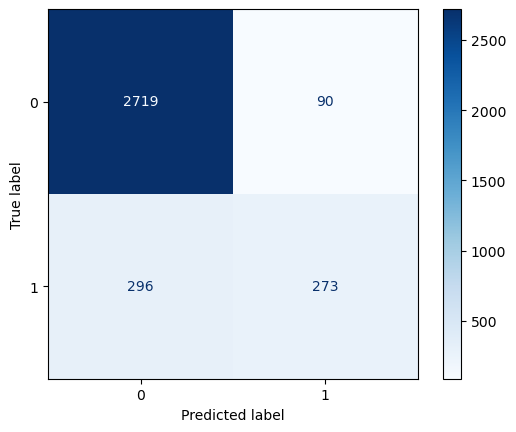

In [501]:
cm_train = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.show()

### Support Vector Machine on SMOTE(Balanced) Dataset

In [502]:
# Train the SVM classifier on the resampled training data
svm.fit(X_train_res, y_train_res)

SVC(C=1, kernel='linear')

### Support Vector Machine on SMOTE(Balanced) Dataset - Training Set

In [503]:
# Get the training accuracy
y_pred_train = svm.predict(X_train_res)
training_accuracy = accuracy_score(y_train_res, y_pred_train)
print("Training Accuracy:", training_accuracy)

Training Accuracy: 0.8164759725400458


In [504]:
# Print classification report for training data
print("Training Classification Report:")
print(classification_report(y_train_res, y_pred_train))

Training Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      6555
           1       0.80      0.84      0.82      6555

    accuracy                           0.82     13110
   macro avg       0.82      0.82      0.82     13110
weighted avg       0.82      0.82      0.82     13110



In [505]:
# Print confusion matrix for training data
print("Training Confusion Matrix:")
print(confusion_matrix(y_train_res, y_pred_train))

Training Confusion Matrix:
[[5209 1346]
 [1060 5495]]


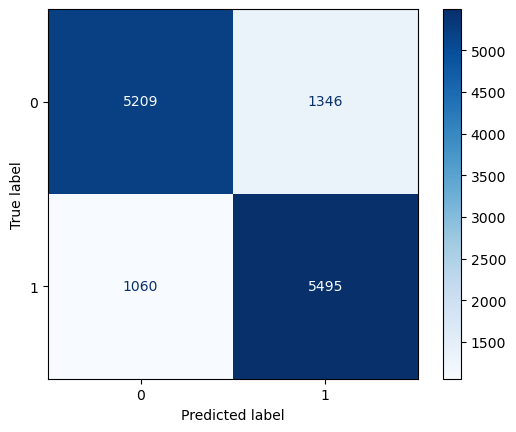

In [506]:
cm_train = confusion_matrix(y_train_res, y_pred_train)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.show()

In [507]:
# Perform cross-validation on training data
scores_train = cross_val_score(svm, X_train_res, y_train_res, cv=5, scoring='accuracy')
print("Training Cross-Validation Scores:", scores_train)

Training Cross-Validation Scores: [0.80625477 0.82189169 0.81617086 0.81350114 0.82303585]


### Support Vector Machine on SMOTE(Balanced) Dataset - Testing Set

In [508]:
# Get the testing accuracy
y_pred_test = svm.predict(X_test)
testing_accuracy = accuracy_score(y_test, y_pred_test)
print("Testing Accuracy:", testing_accuracy)

Testing Accuracy: 0.7927767910005921


In [509]:
# Print classification report for testing data
print("Testing Classification Report:")
print(classification_report(y_test, y_pred_test))

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.79      0.86      2809
           1       0.44      0.82      0.57       569

    accuracy                           0.79      3378
   macro avg       0.70      0.80      0.72      3378
weighted avg       0.87      0.79      0.81      3378



In [510]:
# Print confusion matrix for testing data
print("Testing Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))

Testing Confusion Matrix:
[[2213  596]
 [ 104  465]]


In [511]:
# Perform cross-validation on testing data
scores_test = cross_val_score(svm, X_test, y_test, cv=5, scoring='accuracy')
print("Testing Cross-Validation Scores:", scores_test)

Testing Cross-Validation Scores: [0.88313609 0.87573964 0.88609467 0.88444444 0.89185185]


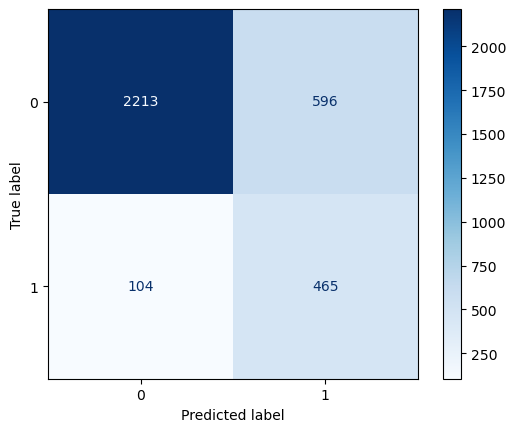

In [512]:
cm_test = confusion_matrix(y_test, y_pred_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.show()